In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
from tensorflow.keras.datasets import cifar10
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

# Test 1

In [2]:
num_test = 10
num_layers_list = [0,2,4,6,7]


for i in range(num_test):
    for layer_index in range(5):
        globals()['t{}_L{}_accumulated_weight'.format(i, layer_index)] = []
        globals()['t{}_L{}_accumulated_bias'.format(i, layer_index)] = []

        globals()['t{}_L{}_changes_weight'.format(i, layer_index)] = []
        globals()['t{}_L{}_changes_bias'.format(i, layer_index)] = []
        
        globals()['t{}_L{}_dist'.format(i, layer_index)] = []  #바로 전 점이랑 현재 점 거리
        
        globals()['t{}_L{}_distanc'.format(i, layer_index)] = []  #바로 전 점이랑 현재 점 거리
        
    globals()['t{}_acc'.format(i)] = []
    globals()['t{}_loss'.format(i)] = []


In [3]:
#Var Accumulate Weight
t0_L0_accumulated_weight = [0.0006879101, 0.001811316, 0.0035008963, 0.0048196614, 0.0058882306, 0.0068392805, 0.007892036, 0.008795053, 0.009703485, 0.010582681, 0.011371154, 0.01232497, 0.013198739, 0.013977147, 0.014620306, 0.015420801, 0.01621405, 0.016892523, 0.017558051, 0.018160362]
t0_L1_accumulated_weight = [0.0009066912, 0.00080145564, 0.0018934759, 0.0026189229, 0.0031931635, 0.0036928488, 0.0041503725, 0.0046130624, 0.0050400957, 0.005436798, 0.005804604, 0.0061770882, 0.0064999764, 0.00681307, 0.0070969793, 0.0073658954, 0.007628036, 0.007854801, 0.008068915, 0.008295892]
t0_L2_accumulated_weight = [0.0003829109, 0.00052395003, 0.00064201065, 0.0007954602, 0.0009619041, 0.0011422336, 0.001337345, 0.0015290757, 0.0017181677, 0.0018960956, 0.0020872746, 0.0022806013, 0.002462191, 0.002653156, 0.002843463, 0.0030317109, 0.0032003697, 0.0033646438, 0.0035266802, 0.003689881]
t0_L3_accumulated_weight = [0.00018194171, 0.00021051668, 0.00025828544, 0.00033332122, 0.00042718777, 0.00053599983, 0.0006545929, 0.0007787339, 0.0009070076, 0.0010369968, 0.0011735077, 0.0013152356, 0.0014548698, 0.0015989714, 0.0017390919, 0.0018817112, 0.002021754, 0.0021580209, 0.0022959441, 0.002430505]
t0_L4_accumulated_weight = [0.0017842918, 0.0020442111, 0.0024943382, 0.003160289, 0.0040599564, 0.00514249, 0.0064174607, 0.007851766, 0.009442928, 0.011197148, 0.013113471, 0.015156801, 0.017297888, 0.019400878, 0.021834347, 0.024215048, 0.026680812, 0.02913186, 0.031734467, 0.034436606]

#Var Accumulate Bias
t0_L0_accumulated_bias = [4.9715403e-05, 0.00020109874, 0.00053565553, 0.000717679, 0.0008454467, 0.00095889904, 0.0010319902, 0.0011433661, 0.0012919826, 0.0014547266, 0.0016212299, 0.0018021895, 0.001998845, 0.0021827475, 0.0023337693, 0.0024798932, 0.0026169175, 0.0026927162, 0.0027610427, 0.0028735388]
t0_L1_accumulated_bias = [4.7475645e-05, 5.6176574e-05, 0.00021424356, 0.0003384419, 0.000561382, 0.00087691494, 0.0013061871, 0.0018103616, 0.0023235579, 0.0030573145, 0.0038914988, 0.004809718, 0.0057257824, 0.006505148, 0.007125565, 0.0076586897, 0.008170828, 0.008580694, 0.009019239, 0.009490592]
t0_L2_accumulated_bias = [2.5307456e-05, 0.00010516921, 0.00024587705, 0.00033971522, 0.0004379716, 0.0005371815, 0.00069942273, 0.00093692605, 0.0011559515, 0.0013746417, 0.0016892087, 0.0018915148, 0.0021200795, 0.0023646683, 0.0025452145, 0.002676707, 0.0028640567, 0.00293106, 0.00305955, 0.0031809907]
t0_L3_accumulated_bias = [9.430483e-06, 0.00012409827, 0.000318031, 0.0004219558, 0.00056599535, 0.0007680914, 0.000996268, 0.0012904833, 0.0015472462, 0.0018337166, 0.0021485477, 0.0023894645, 0.0026138031, 0.0028271403, 0.002989198, 0.0031645182, 0.0033544614, 0.003513504, 0.0035754186, 0.0037467275]
t0_L4_accumulated_bias = [0.00012141416, 0.0014810704, 0.0031667245, 0.003921655, 0.00470232, 0.0055803135, 0.0065557593, 0.007714288, 0.008715835, 0.009671542, 0.010824934, 0.011590641, 0.012379533, 0.013070866, 0.013812637, 0.014411621, 0.015119369, 0.015594676, 0.015894372, 0.016444007]


#Var Changes Weight
t0_L0_changes_weight = [0.0006879101, 0.001811316, 0.0035008963, 0.0048196614, 0.0058882306, 0.0068392805, 0.007892036, 0.008795053, 0.009703485, 0.010582681, 0.011371154, 0.01232497, 0.013198739, 0.013977147, 0.014620306, 0.015420801, 0.01621405, 0.016892523, 0.017558051, 0.018160362]
t0_L1_changes_weight = [0.0009066912, 0.00080145564, 0.0018934759, 0.0026189229, 0.0031931635, 0.0036928488, 0.0041503725, 0.0046130624, 0.0050400957, 0.005436798, 0.005804604, 0.0061770882, 0.0064999764, 0.00681307, 0.0070969793, 0.0073658954, 0.007628036, 0.007854801, 0.008068915, 0.008295892]
t0_L2_changes_weight = [0.0003829109, 0.00052395003, 0.00064201065, 0.0007954602, 0.0009619041, 0.0011422336, 0.001337345, 0.0015290757, 0.0017181677, 0.0018960956, 0.0020872746, 0.0022806013, 0.002462191, 0.002653156, 0.002843463, 0.0030317109, 0.0032003697, 0.0033646438, 0.0035266802, 0.003689881]
t0_L3_changes_weight = [0.00018194171, 0.00021051668, 0.00025828544, 0.00033332122, 0.00042718777, 0.00053599983, 0.0006545929, 0.0007787339, 0.0009070076, 0.0010369968, 0.0011735077, 0.0013152356, 0.0014548698, 0.0015989714, 0.0017390919, 0.0018817112, 0.002021754, 0.0021580209, 0.0022959441, 0.002430505]
t0_L4_changes_weight = [0.0017842918, 0.0020442111, 0.0024943382, 0.003160289, 0.0040599564, 0.00514249, 0.0064174607, 0.007851766, 0.009442928, 0.011197148, 0.013113471, 0.015156801, 0.017297888, 0.019400878, 0.021834347, 0.024215048, 0.026680812, 0.02913186, 0.031734467, 0.034436606]

#Var Changes Bias
t0_L0_changes_bias = [0.00015138334, 0.0003345568, 0.00018202345, 0.00012776774, 0.00011345232, 7.309113e-05, 0.000111375935, 0.0001486165, 0.00016274396, 0.00016650336, 0.00018095959, 0.00019665551, 0.00018390245, 0.00015102187, 0.00014612381, 0.00013702433, 7.5798715e-05, 6.832648e-05, 0.00011249608]
t0_L1_changes_bias = [8.700928e-06, 0.00015806698, 0.00012419834, 0.00022294009, 0.00031553296, 0.0004292722, 0.0005041745, 0.0005131962, 0.0007337567, 0.00083418423, 0.00091821933, 0.00091606425, 0.00077936566, 0.00062041683, 0.0005331249, 0.0005121385, 0.00040986575, 0.0004385449, 0.00047135353]
t0_L2_changes_bias = [7.9861755e-05, 0.00014070784, 9.383817e-05, 9.8256394e-05, 9.9209894e-05, 0.00016224122, 0.00023750332, 0.00021902547, 0.00021869014, 0.000314567, 0.00020230608, 0.00022856472, 0.00024458882, 0.0001805462, 0.0001314925, 0.00018734974, 6.7003304e-05, 0.00012848992, 0.00012144074]
t0_L3_changes_bias = [0.00011466778, 0.00019393273, 0.0001039248, 0.00014403954, 0.00020209607, 0.00022817659, 0.00029421528, 0.00025676296, 0.0002864704, 0.00031483104, 0.00024091685, 0.00022433861, 0.00021333713, 0.00016205781, 0.00017532008, 0.00018994324, 0.00015904265, 6.191456e-05, 0.00017130887]
t0_L4_changes_bias = [0.0013596562, 0.001685654, 0.00075493054, 0.00078066485, 0.00087799365, 0.00097544584, 0.0011585285, 0.0010015476, 0.00095570646, 0.0011533918, 0.00076570734, 0.0007888917, 0.0006913338, 0.0007417705, 0.00059898384, 0.00070774835, 0.000475307, 0.00029969588, 0.0005496349]

In [4]:
#Distance Layer 0,2,4,6,7
t0_L0_dist = [0.027917296, 0.05170604, 0.070273966, 0.07757661, 0.07992009, 0.08154658, 0.08275051, 0.08204252, 0.08234968, 0.08350388, 0.08504888, 0.08791652, 0.09069528, 0.093425624, 0.095530115, 0.09790197, 0.100302614, 0.10208154, 0.10366363, 0.10551739]
t0_L1_dist = [0.027318083, 0.025306635, 0.039960165, 0.048850708, 0.05583529, 0.06265039, 0.06919747, 0.07429404, 0.079284035, 0.08474497, 0.09003587, 0.09551598, 0.10016524, 0.10432646, 0.10789793, 0.11082601, 0.11289796, 0.11518509, 0.11749715, 0.11970619]
t0_L2_dist = [0.01760766, 0.024612926, 0.035155587, 0.041759215, 0.047304254, 0.05346357, 0.058053203, 0.06375831, 0.06820628, 0.072487846, 0.076181404, 0.0798344, 0.082534365, 0.085303225, 0.08755614, 0.08941796, 0.09172526, 0.09276038, 0.09405283, 0.09528523]
t0_L3_dist = [0.011904361, 0.016567064, 0.02231643, 0.025679588, 0.029554874, 0.033927385, 0.038268283, 0.042729154, 0.04652655, 0.050250594, 0.05382107, 0.056883592, 0.05945926, 0.06181784, 0.063880034, 0.06593394, 0.067735404, 0.069184154, 0.07025641, 0.071657516]
t0_L4_dist = [0.037322454, 0.055005826, 0.070883006, 0.080190375, 0.089614674, 0.09944482, 0.109700166, 0.12091621, 0.13159713, 0.14189133, 0.15274508, 0.16222167, 0.17140087, 0.17968795, 0.1884568, 0.19660063, 0.20459214, 0.21182528, 0.21873295, 0.22606616] 

In [5]:
t0_ACC = [[0.7680000066757202, 0.7820000052452087, 0.8059999942779541, 0.7979999780654907, 0.7799999713897705, 0.7919999957084656, 0.7960000038146973, 0.7559999823570251, 0.8180000185966492, 0.7699999809265137, 0.7739999890327454, 0.7720000147819519, 0.75, 0.7739999890327454, 0.7540000081062317, 0.8059999942779541, 0.7720000147819519, 0.8119999766349792, 0.7760000228881836, 0.7580000162124634], [0.6899999976158142, 0.7319999933242798, 0.7480000257492065, 0.7039999961853027, 0.6880000233650208, 0.7480000257492065, 0.7120000123977661, 0.7120000123977661, 0.7919999957084656, 0.699999988079071, 0.6499999761581421, 0.699999988079071, 0.7200000286102295, 0.7300000190734863, 0.6679999828338623, 0.6740000247955322, 0.699999988079071, 0.7400000095367432, 0.7120000123977661, 0.734000027179718], [0.7739999890327454, 0.7319999933242798, 0.7300000190734863, 0.7680000066757202, 0.7639999985694885, 0.7580000162124634, 0.7200000286102295, 0.7179999947547913, 0.7519999742507935, 0.7540000081062317, 0.6899999976158142, 0.7360000014305115, 0.7139999866485596, 0.7639999985694885, 0.7559999823570251, 0.7379999756813049, 0.7580000162124634, 0.7760000228881836, 0.7419999837875366, 0.7059999704360962], [0.7799999713897705, 0.7459999918937683, 0.7319999933242798, 0.7699999809265137, 0.7480000257492065, 0.7699999809265137, 0.7680000066757202, 0.7639999985694885, 0.7919999957084656, 0.7839999794960022, 0.7680000066757202, 0.7860000133514404, 0.7720000147819519, 0.7760000228881836, 0.7720000147819519, 0.8199999928474426, 0.7760000228881836, 0.7599999904632568, 0.7540000081062317, 0.7860000133514404], [0.7960000038146973, 0.8100000023841858, 0.8119999766349792, 0.7639999985694885, 0.7580000162124634, 0.7879999876022339, 0.7799999713897705, 0.777999997138977, 0.7599999904632568, 0.8080000281333923, 0.7739999890327454, 0.7820000052452087, 0.8119999766349792, 0.765999972820282, 0.765999972820282, 0.7459999918937683, 0.8059999942779541, 0.7960000038146973, 0.7839999794960022, 0.8140000104904175], [0.7900000214576721, 0.7919999957084656, 0.8019999861717224, 0.8040000200271606, 0.7940000295639038, 0.777999997138977, 0.7699999809265137, 0.7739999890327454, 0.7979999780654907, 0.8379999995231628, 0.8080000281333923, 0.8140000104904175, 0.800000011920929, 0.7900000214576721, 0.7979999780654907, 0.7739999890327454, 0.8379999995231628, 0.7960000038146973, 0.8119999766349792, 0.8119999766349792], [0.7879999876022339, 0.8080000281333923, 0.7839999794960022, 0.7919999957084656, 0.8320000171661377, 0.8140000104904175, 0.8119999766349792, 0.8240000009536743, 0.8019999861717224, 0.800000011920929, 0.7960000038146973, 0.8159999847412109, 0.8100000023841858, 0.8180000185966492, 0.8119999766349792, 0.7919999957084656, 0.8299999833106995, 0.843999981880188, 0.777999997138977, 0.8059999942779541], [0.8080000281333923, 0.8299999833106995, 0.8140000104904175, 0.8259999752044678, 0.7919999957084656, 0.7979999780654907, 0.7799999713897705, 0.8180000185966492, 0.7940000295639038, 0.8100000023841858, 0.8299999833106995, 0.800000011920929, 0.8220000267028809, 0.8159999847412109, 0.8080000281333923, 0.7919999957084656, 0.8420000076293945, 0.843999981880188, 0.8059999942779541, 0.8040000200271606], [0.8379999995231628, 0.8379999995231628, 0.8040000200271606, 0.8320000171661377, 0.8299999833106995, 0.8100000023841858, 0.8080000281333923, 0.8019999861717224, 0.8240000009536743, 0.8320000171661377, 0.8140000104904175, 0.8059999942779541, 0.8339999914169312, 0.8259999752044678, 0.8040000200271606, 0.8220000267028809, 0.800000011920929, 0.8240000009536743, 0.8259999752044678, 0.800000011920929], [0.8199999928474426, 0.8320000171661377, 0.8479999899864197, 0.8460000157356262, 0.8100000023841858, 0.8199999928474426, 0.8240000009536743, 0.8339999914169312, 0.828000009059906, 0.8320000171661377, 0.8140000104904175, 0.8360000252723694, 0.8220000267028809, 0.8299999833106995, 0.8579999804496765, 0.8399999737739563, 0.8500000238418579, 0.8159999847412109, 0.8240000009536743, 0.8360000252723694], [0.8259999752044678, 0.8500000238418579, 0.8379999995231628, 0.828000009059906, 0.8360000252723694, 0.8479999899864197, 0.8579999804496765, 0.8320000171661377, 0.8159999847412109, 0.8199999928474426, 0.8339999914169312, 0.8560000061988831, 0.843999981880188, 0.8259999752044678, 0.8220000267028809, 0.8379999995231628, 0.8560000061988831, 0.8659999966621399, 0.8600000143051147, 0.7860000133514404], [0.8240000009536743, 0.843999981880188, 0.8460000157356262, 0.8240000009536743, 0.8420000076293945, 0.843999981880188, 0.8080000281333923, 0.8360000252723694, 0.8420000076293945, 0.8240000009536743, 0.8339999914169312, 0.8700000047683716, 0.8399999737739563, 0.8640000224113464, 0.8199999928474426, 0.8240000009536743, 0.8259999752044678, 0.8399999737739563, 0.8339999914169312, 0.8500000238418579], [0.8460000157356262, 0.8360000252723694, 0.8180000185966492, 0.8299999833106995, 0.8700000047683716, 0.8259999752044678, 0.8479999899864197, 0.8479999899864197, 0.8560000061988831, 0.871999979019165, 0.8679999709129333, 0.8500000238418579, 0.8500000238418579, 0.8659999966621399, 0.8859999775886536, 0.8579999804496765, 0.828000009059906, 0.8220000267028809, 0.8220000267028809, 0.8080000281333923], [0.8360000252723694, 0.828000009059906, 0.843999981880188, 0.8700000047683716, 0.8199999928474426, 0.8460000157356262, 0.8500000238418579, 0.8500000238418579, 0.8479999899864197, 0.8500000238418579, 0.843999981880188, 0.8519999980926514, 0.8220000267028809, 0.8360000252723694, 0.871999979019165, 0.8399999737739563, 0.8579999804496765, 0.8479999899864197, 0.8379999995231628, 0.8640000224113464], [0.8539999723434448, 0.8479999899864197, 0.8479999899864197, 0.8679999709129333, 0.828000009059906, 0.8539999723434448, 0.8600000143051147, 0.843999981880188, 0.878000020980835, 0.8560000061988831, 0.8339999914169312, 0.8619999885559082, 0.8320000171661377, 0.8700000047683716, 0.8519999980926514, 0.8360000252723694, 0.828000009059906, 0.8659999966621399, 0.871999979019165, 0.871999979019165], [0.8339999914169312, 0.8539999723434448, 0.8640000224113464, 0.8740000128746033, 0.8519999980926514, 0.8939999938011169, 0.8619999885559082, 0.8500000238418579, 0.8579999804496765, 0.871999979019165, 0.8600000143051147, 0.8899999856948853, 0.8399999737739563, 0.8299999833106995, 0.8560000061988831, 0.8640000224113464, 0.8500000238418579, 0.8820000290870667, 0.8600000143051147, 0.8640000224113464], [0.8479999899864197, 0.8679999709129333, 0.871999979019165, 0.8579999804496765, 0.843999981880188, 0.8679999709129333, 0.8420000076293945, 0.8560000061988831, 0.8600000143051147, 0.8460000157356262, 0.8519999980926514, 0.8600000143051147, 0.8579999804496765, 0.8640000224113464, 0.8740000128746033, 0.878000020980835, 0.8420000076293945, 0.8600000143051147, 0.843999981880188, 0.8560000061988831], [0.8519999980926514, 0.8759999871253967, 0.8460000157356262, 0.8500000238418579, 0.8659999966621399, 0.8600000143051147, 0.8500000238418579, 0.8460000157356262, 0.8700000047683716, 0.8600000143051147, 0.843999981880188, 0.8539999723434448, 0.8560000061988831, 0.8299999833106995, 0.8759999871253967, 0.8360000252723694, 0.8500000238418579, 0.8519999980926514, 0.8519999980926514, 0.8679999709129333], [0.8740000128746033, 0.8920000195503235, 0.8399999737739563, 0.8600000143051147, 0.8420000076293945, 0.8619999885559082, 0.8820000290870667, 0.8820000290870667, 0.8960000276565552, 0.8700000047683716, 0.8420000076293945, 0.8659999966621399, 0.8659999966621399, 0.8600000143051147, 0.8420000076293945, 0.8679999709129333, 0.8399999737739563, 0.8740000128746033, 0.8600000143051147, 0.8679999709129333], [0.8479999899864197, 0.8700000047683716, 0.8240000009536743, 0.8619999885559082, 0.8700000047683716, 0.8600000143051147, 0.871999979019165, 0.8560000061988831, 0.8579999804496765, 0.8820000290870667, 0.8399999737739563, 0.8840000033378601, 0.8880000114440918, 0.8539999723434448, 0.8759999871253967, 0.8740000128746033, 0.8539999723434448, 0.8519999980926514, 0.8960000276565552, 0.8799999952316284], [0.8700000047683716, 0.8539999723434448, 0.8740000128746033, 0.8820000290870667, 0.8880000114440918, 0.8679999709129333, 0.8320000171661377, 0.878000020980835, 0.8539999723434448, 0.8579999804496765, 0.8740000128746033, 0.8840000033378601, 0.8740000128746033, 0.8679999709129333, 0.8939999938011169, 0.8679999709129333, 0.8519999980926514, 0.8880000114440918, 0.8619999885559082, 0.878000020980835]]
t0_LOSS = [[0.5966527462005615, 0.5943061113357544, 0.5437604188919067, 0.5539196729660034, 0.6391934156417847, 0.5843120813369751, 0.5534648895263672, 0.6601099371910095, 0.5245026350021362, 0.6001649498939514, 0.602845311164856, 0.6129037737846375, 0.6280966401100159, 0.6397286653518677, 0.6012473702430725, 0.552325427532196, 0.5968576073646545, 0.5646024346351624, 0.6111441254615784, 0.6207054257392883], [0.7971605062484741, 0.7077291011810303, 0.7284855246543884, 0.7771551012992859, 0.7866269946098328, 0.762211263179779, 0.6901838183403015, 0.7731261849403381, 0.5582940578460693, 0.8093839883804321, 0.9170153737068176, 0.8227406740188599, 0.76393061876297, 0.8522741794586182, 0.9332118630409241, 0.9166448712348938, 0.7359669804573059, 0.68083655834198, 0.7483176589012146, 0.7119649648666382], [0.6555958390235901, 0.7181400656700134, 0.7122461199760437, 0.6268398761749268, 0.6494161486625671, 0.6441323161125183, 0.7488465309143066, 0.7535058259963989, 0.6345282793045044, 0.6270915269851685, 0.8266254663467407, 0.7745837569236755, 0.7083474397659302, 0.6155290603637695, 0.6698898673057556, 0.7436664700508118, 0.6867120265960693, 0.6066774725914001, 0.716702401638031, 0.7179761528968811], [0.6197007894515991, 0.6618218421936035, 0.7209581732749939, 0.5778563022613525, 0.6013113856315613, 0.5910634994506836, 0.6383115649223328, 0.6395303010940552, 0.5523385405540466, 0.5809930562973022, 0.6298012733459473, 0.6118974685668945, 0.6106806397438049, 0.6639180183410645, 0.6375102996826172, 0.551708459854126, 0.6052077412605286, 0.6148919463157654, 0.6278479099273682, 0.6029677391052246], [0.5449578762054443, 0.5827200412750244, 0.544521152973175, 0.5668249130249023, 0.6751815676689148, 0.6033649444580078, 0.5802215337753296, 0.6048616766929626, 0.5898120999336243, 0.5849133729934692, 0.5559898614883423, 0.5661144256591797, 0.5747421979904175, 0.6241705417633057, 0.6315808296203613, 0.6324713230133057, 0.5247188806533813, 0.5803678035736084, 0.5607593059539795, 0.5220292210578918], [0.5573720335960388, 0.5338493585586548, 0.5390846133232117, 0.5322228670120239, 0.5882641077041626, 0.6343587636947632, 0.6100620031356812, 0.5762532949447632, 0.5149616599082947, 0.5059394240379333, 0.5608463287353516, 0.5555514693260193, 0.5978676080703735, 0.5219255685806274, 0.5461401343345642, 0.5519742369651794, 0.4540991485118866, 0.5494292378425598, 0.5497018098831177, 0.5124510526657104], [0.5859060883522034, 0.5199944972991943, 0.5835668444633484, 0.6314287185668945, 0.5279267430305481, 0.5125177502632141, 0.5646383166313171, 0.4828009605407715, 0.5241199135780334, 0.5457648038864136, 0.5874963402748108, 0.5451889634132385, 0.49360185861587524, 0.4783579707145691, 0.5001236200332642, 0.5259765982627869, 0.5454320907592773, 0.46243178844451904, 0.6221222877502441, 0.5769083499908447], [0.4859341084957123, 0.5017549395561218, 0.4817407429218292, 0.5328168869018555, 0.5330437421798706, 0.5694452524185181, 0.5879775881767273, 0.5506660342216492, 0.5593219995498657, 0.49523621797561646, 0.4386598765850067, 0.5221529006958008, 0.4944021701812744, 0.4622080624103546, 0.5645678639411926, 0.5207958221435547, 0.423278272151947, 0.43533045053482056, 0.5694485902786255, 0.5062998533248901], [0.44614431262016296, 0.42415884137153625, 0.5491100549697876, 0.468516081571579, 0.4673030972480774, 0.48161518573760986, 0.5243321061134338, 0.539457380771637, 0.445087730884552, 0.4547651708126068, 0.47702762484550476, 0.5910287499427795, 0.46001356840133667, 0.5208719968795776, 0.5261750221252441, 0.5056954622268677, 0.5202721357345581, 0.446981817483902, 0.46322232484817505, 0.53183913230896], [0.471917062997818, 0.43437811732292175, 0.4472504258155823, 0.43440917134284973, 0.612119734287262, 0.504510223865509, 0.4634585976600647, 0.4934654235839844, 0.4705446660518646, 0.43998488783836365, 0.5066412091255188, 0.47613608837127686, 0.4348095655441284, 0.4606629014015198, 0.42541664838790894, 0.5162164568901062, 0.41912978887557983, 0.45739471912384033, 0.4421502351760864, 0.4462193548679352], [0.46950507164001465, 0.45833534002304077, 0.43336471915245056, 0.4882560968399048, 0.45269715785980225, 0.41650405526161194, 0.3943476378917694, 0.48053160309791565, 0.4575278162956238, 0.46962645649909973, 0.44672462344169617, 0.39595484733581543, 0.4676819145679474, 0.45720934867858887, 0.528390645980835, 0.4868248999118805, 0.4409746825695038, 0.36361512541770935, 0.421817809343338, 0.5613095760345459], [0.4427516460418701, 0.42188555002212524, 0.4456363916397095, 0.4284314811229706, 0.4514199197292328, 0.4205217659473419, 0.550665020942688, 0.49590638279914856, 0.394148051738739, 0.530421257019043, 0.4728236496448517, 0.35809680819511414, 0.4306199848651886, 0.41802743077278137, 0.5102823376655579, 0.4709917902946472, 0.5067394375801086, 0.45381978154182434, 0.44932976365089417, 0.44833847880363464], [0.47416409850120544, 0.45093458890914917, 0.4515070915222168, 0.5048506855964661, 0.43427327275276184, 0.4527668356895447, 0.4448203444480896, 0.44926148653030396, 0.4220738410949707, 0.3834228515625, 0.3573433756828308, 0.41465917229652405, 0.42270058393478394, 0.3941742777824402, 0.367180198431015, 0.3623088300228119, 0.503788411617279, 0.4662212133407593, 0.47150811553001404, 0.4612179100513458], [0.4600180387496948, 0.42508384585380554, 0.4414037764072418, 0.34707367420196533, 0.47069814801216125, 0.4356164038181305, 0.3966101109981537, 0.4455180764198303, 0.43127769231796265, 0.452583372592926, 0.4896039664745331, 0.3863232135772705, 0.44549572467803955, 0.4820671081542969, 0.33495599031448364, 0.4467453062534332, 0.4523209035396576, 0.4211629629135132, 0.4275592863559723, 0.37794020771980286], [0.42914944887161255, 0.4006783962249756, 0.37650251388549805, 0.4086436927318573, 0.47555363178253174, 0.39622822403907776, 0.35423731803894043, 0.43659767508506775, 0.3753754198551178, 0.41270336508750916, 0.4467554986476898, 0.40114879608154297, 0.45921167731285095, 0.34286001324653625, 0.4004545509815216, 0.4485575258731842, 0.5042445063591003, 0.40137770771980286, 0.43361514806747437, 0.3546586036682129], [0.4504043459892273, 0.42848244309425354, 0.35140395164489746, 0.4012565016746521, 0.4155825078487396, 0.3513234853744507, 0.4156596064567566, 0.45056524872779846, 0.4169236719608307, 0.3165566325187683, 0.42833253741264343, 0.332175612449646, 0.4499097168445587, 0.47597548365592957, 0.437035471200943, 0.46236932277679443, 0.43377813696861267, 0.3267410397529602, 0.3648940324783325, 0.4050702452659607], [0.42811205983161926, 0.4390624761581421, 0.371130108833313, 0.4163626730442047, 0.43483108282089233, 0.3950505256652832, 0.46745985746383667, 0.3937196433544159, 0.37547919154167175, 0.4346363842487335, 0.4130328595638275, 0.3812733292579651, 0.41816532611846924, 0.3954353332519531, 0.3935932219028473, 0.4886373281478882, 0.5301084518432617, 0.3856121003627777, 0.43843314051628113, 0.42027169466018677], [0.4511043131351471, 0.4095543622970581, 0.47844168543815613, 0.44282805919647217, 0.48829472064971924, 0.37385451793670654, 0.4368780851364136, 0.49845045804977417, 0.4242834448814392, 0.4950111210346222, 0.4893403649330139, 0.4125460982322693, 0.3352745771408081, 0.48740923404693604, 0.3393838107585907, 0.4366881847381592, 0.41836756467819214, 0.41839364171028137, 0.4046202003955841, 0.36899688839912415], [0.41071999073028564, 0.2954694330692291, 0.4761344790458679, 0.3924684226512909, 0.4558090567588806, 0.3968070149421692, 0.2906606197357178, 0.4443816840648651, 0.35593727231025696, 0.40927720069885254, 0.4520851969718933, 0.44303908944129944, 0.36639419198036194, 0.3748343586921692, 0.4646614193916321, 0.4515504539012909, 0.45879703760147095, 0.36167559027671814, 0.4053274393081665, 0.3745037317276001], [0.5577329397201538, 0.4162008464336395, 0.5605732798576355, 0.38078761100769043, 0.36350974440574646, 0.4855652451515198, 0.3658640682697296, 0.4183993935585022, 0.43157875537872314, 0.324815958738327, 0.4925616681575775, 0.28886130452156067, 0.32692185044288635, 0.39339902997016907, 0.36879801750183105, 0.41551512479782104, 0.42969024181365967, 0.45047271251678467, 0.3464340269565582, 0.33339282870292664], [0.36439746618270874, 0.48549702763557434, 0.3707399070262909, 0.37621238827705383, 0.3545919358730316, 0.43551385402679443, 0.4664091467857361, 0.35535508394241333, 0.41700679063796997, 0.4182477295398712, 0.401050865650177, 0.34389111399650574, 0.368626207113266, 0.3800513744354248, 0.3814670145511627, 0.4947311580181122, 0.42957672476768494, 0.37690725922584534, 0.4139908254146576, 0.3740661144256592]]

# Test2

In [6]:
#Var Accumulate Weight
t1_L0_accumulated_weight = [0.00057212653, 0.001244111, 0.0023595272, 0.0032217193, 0.0039283815, 0.0046385136, 0.005311528, 0.0060095335, 0.0066766967, 0.007297521, 0.0079063075, 0.008503939, 0.0090628695, 0.009564485, 0.010155082, 0.0107360715, 0.011224553, 0.011797617, 0.012247979, 0.01278704]
t1_L1_accumulated_weight = [0.00089576724, 0.0006328203, 0.001441482, 0.0019522336, 0.002335985, 0.0026850689, 0.0030107396, 0.003330954, 0.0036248586, 0.0039330428, 0.0042002737, 0.004450492, 0.0047041345, 0.004939298, 0.0051482893, 0.0053494927, 0.005521704, 0.0057050926, 0.005879452, 0.0060398183]
t1_L2_accumulated_weight = [0.0003474168, 0.00048101228, 0.00062429375, 0.00078773254, 0.000968383, 0.0011613512, 0.0013630814, 0.001567264, 0.0017763008, 0.0019815483, 0.002190895, 0.0023944278, 0.0025890316, 0.002792915, 0.0029661166, 0.0031419902, 0.0033169305, 0.0034773434, 0.0036450746, 0.0038052632]
t1_L3_accumulated_weight = [0.0002190327, 0.0002525996, 0.00030263874, 0.00036909536, 0.00044520738, 0.00052812416, 0.0006150657, 0.00070648507, 0.0008056962, 0.0009095533, 0.0010094122, 0.0011110711, 0.0012160939, 0.0013223042, 0.001432247, 0.0015377547, 0.0016419459, 0.0017494286, 0.0018561509, 0.00196544]
t1_L4_accumulated_weight = [0.0015829314, 0.0018629294, 0.0022533115, 0.0027782484, 0.003463819, 0.0042997813, 0.005204207, 0.0062554604, 0.007418434, 0.008745209, 0.010075288, 0.011605138, 0.013122855, 0.014817139, 0.016558105, 0.018471876, 0.020307269, 0.022299167, 0.02434207, 0.026505124]

#Var Accumulate Bias
t1_L0_accumulated_bias = [1.3557455e-05, 8.444449e-05, 0.00018052511, 0.00021183056, 0.00024018748, 0.00027020773, 0.00030574144, 0.00036412617, 0.00042927326, 0.000497465, 0.0005936794, 0.00071421266, 0.000789588, 0.0008586695, 0.0009274768, 0.0010116139, 0.0010872261, 0.0011263035, 0.0012192022, 0.001252461]
t1_L1_accumulated_bias = [3.5149802e-05, 9.6627424e-05, 0.0002859168, 0.00044924684, 0.0007672634, 0.0011812173, 0.0016425308, 0.0021959024, 0.0028690577, 0.0035462629, 0.004324717, 0.005042244, 0.0056642657, 0.0063540246, 0.006918083, 0.0074413884, 0.007940993, 0.008324295, 0.0086867465, 0.009015445]
t1_L2_accumulated_bias = [2.430346e-05, 0.000103599166, 0.00022785619, 0.00030503026, 0.00044134434, 0.00065255695, 0.00091652584, 0.0012253583, 0.0015669505, 0.0018917341, 0.00220947, 0.0024603568, 0.0026592815, 0.0028871302, 0.0030260491, 0.0031699466, 0.003352461, 0.0034761662, 0.0035728442, 0.0036171698]
t1_L3_accumulated_bias = [9.872917e-06, 0.00011242583, 0.00024009886, 0.00030415083, 0.0004252465, 0.0005818999, 0.00077759556, 0.0009796508, 0.0012172578, 0.0014344722, 0.0016620301, 0.0018306151, 0.0020420724, 0.0022405633, 0.0024314881, 0.002575559, 0.0027552117, 0.0028990284, 0.0029833587, 0.0031114137]
t1_L4_accumulated_bias = [0.00017089522, 0.0014780628, 0.003097788, 0.003974225, 0.004864292, 0.005869896, 0.006949725, 0.007952318, 0.00919002, 0.010198304, 0.011232127, 0.012221308, 0.01315734, 0.01400553, 0.014696327, 0.015492643, 0.016145665, 0.016736712, 0.017235087, 0.0176203]


#Var Changes Weight
t1_L0_changes_weight = [0.00057212653, 0.001244111, 0.0023595272, 0.0032217193, 0.0039283815, 0.0046385136, 0.005311528, 0.0060095335, 0.0066766967, 0.007297521, 0.0079063075, 0.008503939, 0.0090628695, 0.009564485, 0.010155082, 0.0107360715, 0.011224553, 0.011797617, 0.012247979, 0.01278704]
t1_L1_changes_weight = [0.00089576724, 0.0006328203, 0.001441482, 0.0019522336, 0.002335985, 0.0026850689, 0.0030107396, 0.003330954, 0.0036248586, 0.0039330428, 0.0042002737, 0.004450492, 0.0047041345, 0.004939298, 0.0051482893, 0.0053494927, 0.005521704, 0.0057050926, 0.005879452, 0.0060398183]
t1_L2_changes_weight = [0.0003474168, 0.00048101228, 0.00062429375, 0.00078773254, 0.000968383, 0.0011613512, 0.0013630814, 0.001567264, 0.0017763008, 0.0019815483, 0.002190895, 0.0023944278, 0.0025890316, 0.002792915, 0.0029661166, 0.0031419902, 0.0033169305, 0.0034773434, 0.0036450746, 0.0038052632]
t1_L3_changes_weight = [0.0002190327, 0.0002525996, 0.00030263874, 0.00036909536, 0.00044520738, 0.00052812416, 0.0006150657, 0.00070648507, 0.0008056962, 0.0009095533, 0.0010094122, 0.0011110711, 0.0012160939, 0.0013223042, 0.001432247, 0.0015377547, 0.0016419459, 0.0017494286, 0.0018561509, 0.00196544]
t1_L4_changes_weight = [0.0015829314, 0.0018629294, 0.0022533115, 0.0027782484, 0.003463819, 0.0042997813, 0.005204207, 0.0062554604, 0.007418434, 0.008745209, 0.010075288, 0.011605138, 0.013122855, 0.014817139, 0.016558105, 0.018471876, 0.020307269, 0.022299167, 0.02434207, 0.026505124]

#Var Changes Bias
t1_L0_changes_bias = [7.0887036e-05, 9.608062e-05, 3.1305448e-05, 2.8356924e-05, 3.0020252e-05, 3.553371e-05, 5.838473e-05, 6.514709e-05, 6.819176e-05, 9.621435e-05, 0.00012053328, 7.537537e-05, 6.908149e-05, 6.8807276e-05, 8.413708e-05, 7.561222e-05, 3.9077364e-05, 9.289873e-05, 3.325881e-05]
t1_L1_changes_bias = [6.147762e-05, 0.00018928936, 0.00016333006, 0.00031801657, 0.00041395385, 0.00046131352, 0.0005533716, 0.0006731553, 0.00067720516, 0.0007784541, 0.00071752723, 0.0006220215, 0.0006897589, 0.0005640583, 0.0005233055, 0.00049960427, 0.00038330257, 0.0003624512, 0.0003286982]
t1_L2_changes_bias = [7.929571e-05, 0.00012425703, 7.7174074e-05, 0.00013631408, 0.00021121261, 0.0002639689, 0.0003088325, 0.00034159212, 0.0003247836, 0.00031773583, 0.0002508869, 0.00019892468, 0.00022784877, 0.00013891887, 0.00014389749, 0.00018251431, 0.00012370525, 9.6678035e-05, 4.43256e-05]
t1_L3_changes_bias = [0.00010255291, 0.00012767303, 6.405197e-05, 0.000121095654, 0.0001566534, 0.00019569567, 0.0002020552, 0.00023760705, 0.00021721434, 0.00022755796, 0.00016858499, 0.00021145726, 0.00019849092, 0.00019092485, 0.00014407095, 0.00017965259, 0.0001438167, 8.433033e-05, 0.00012805499]
t1_L4_changes_bias = [0.0013071676, 0.0016197251, 0.00087643694, 0.0008900673, 0.0010056039, 0.001079829, 0.0010025925, 0.0012377026, 0.0010082843, 0.001033823, 0.000989181, 0.00093603134, 0.0008481899, 0.00069079734, 0.0007963162, 0.00065302197, 0.0005910471, 0.0004983749, 0.00038521364]

In [7]:
#Distance Layer 0,2,4,6,7
t1_L0_dist = [0.02639908, 0.04789775, 0.0605409, 0.06371559, 0.06581053, 0.06715294, 0.06753027, 0.06913221, 0.07079717, 0.07293093, 0.07537242, 0.07777087, 0.08000953, 0.082164854, 0.08437565, 0.086808525, 0.08866008, 0.09061171, 0.092646986, 0.09440034]
t1_L1_dist = [0.026496919, 0.024629747, 0.03670572, 0.044591736, 0.05213658, 0.059571113, 0.065844625, 0.071738444, 0.07751046, 0.08285141, 0.08817682, 0.092923686, 0.09683358, 0.10029671, 0.10307715, 0.1057384, 0.10854797, 0.11036916, 0.11187657, 0.112984985]
t1_L2_dist = [0.017039234, 0.023930065, 0.035170007, 0.041843448, 0.047835995, 0.053849425, 0.0597557, 0.06480226, 0.06963449, 0.073986165, 0.077601075, 0.08100679, 0.08316192, 0.08577602, 0.087666936, 0.08888214, 0.09019317, 0.091426864, 0.09281161, 0.093709566]
t1_L3_dist = [0.012599628, 0.017083926, 0.021643568, 0.02435724, 0.027428927, 0.031136045, 0.035104383, 0.03888704, 0.042493343, 0.04572749, 0.04884337, 0.051326673, 0.05402088, 0.05653821, 0.05896731, 0.060750477, 0.06262493, 0.06426235, 0.06547889, 0.06696543]
t1_L4_dist = [0.036804445, 0.054583747, 0.06965959, 0.07847635, 0.08736082, 0.096670255, 0.1061034, 0.11560643, 0.12618448, 0.1357439, 0.14479236, 0.15379098, 0.16218798, 0.17020023, 0.1778801, 0.18604697, 0.19343133, 0.20066103, 0.2078517, 0.21450302] 


In [8]:
t1_ACC = [[0.765999972820282, 0.8019999861717224, 0.7699999809265137, 0.7799999713897705, 0.8040000200271606, 0.8059999942779541, 0.7739999890327454, 0.7580000162124634, 0.8040000200271606, 0.800000011920929, 0.7960000038146973, 0.7459999918937683, 0.7839999794960022, 0.7860000133514404, 0.7739999890327454, 0.7799999713897705, 0.7940000295639038, 0.7900000214576721, 0.7680000066757202, 0.7900000214576721], [0.6600000262260437, 0.6899999976158142, 0.765999972820282, 0.6700000166893005, 0.699999988079071, 0.6899999976158142, 0.671999990940094, 0.7179999947547913, 0.7200000286102295, 0.6859999895095825, 0.7680000066757202, 0.7319999933242798, 0.7160000205039978, 0.7379999756813049, 0.7120000123977661, 0.7160000205039978, 0.6859999895095825, 0.7799999713897705, 0.671999990940094, 0.7120000123977661], [0.7200000286102295, 0.765999972820282, 0.7200000286102295, 0.7260000109672546, 0.7379999756813049, 0.7400000095367432, 0.7519999742507935, 0.7400000095367432, 0.7820000052452087, 0.7559999823570251, 0.7379999756813049, 0.7179999947547913, 0.7200000286102295, 0.75, 0.7179999947547913, 0.7639999985694885, 0.7020000219345093, 0.765999972820282, 0.7099999785423279, 0.7360000014305115], [0.7820000052452087, 0.7680000066757202, 0.7459999918937683, 0.7720000147819519, 0.777999997138977, 0.7900000214576721, 0.7639999985694885, 0.7820000052452087, 0.7860000133514404, 0.7799999713897705, 0.722000002861023, 0.7379999756813049, 0.7360000014305115, 0.7559999823570251, 0.7799999713897705, 0.7820000052452087, 0.7720000147819519, 0.7739999890327454, 0.7620000243186951, 0.777999997138977], [0.7739999890327454, 0.8199999928474426, 0.8019999861717224, 0.7839999794960022, 0.7799999713897705, 0.7639999985694885, 0.8040000200271606, 0.7639999985694885, 0.7900000214576721, 0.8119999766349792, 0.7839999794960022, 0.7979999780654907, 0.7940000295639038, 0.7900000214576721, 0.7919999957084656, 0.7739999890327454, 0.7860000133514404, 0.777999997138977, 0.8119999766349792, 0.7979999780654907], [0.7799999713897705, 0.7960000038146973, 0.7900000214576721, 0.7960000038146973, 0.7879999876022339, 0.8100000023841858, 0.7580000162124634, 0.800000011920929, 0.7760000228881836, 0.7940000295639038, 0.7720000147819519, 0.8220000267028809, 0.7879999876022339, 0.8220000267028809, 0.8059999942779541, 0.8019999861717224, 0.7739999890327454, 0.7879999876022339, 0.765999972820282, 0.8019999861717224], [0.8100000023841858, 0.7540000081062317, 0.8119999766349792, 0.8159999847412109, 0.800000011920929, 0.8100000023841858, 0.7879999876022339, 0.8119999766349792, 0.8159999847412109, 0.8080000281333923, 0.7839999794960022, 0.800000011920929, 0.8040000200271606, 0.7919999957084656, 0.8299999833106995, 0.8100000023841858, 0.7580000162124634, 0.8019999861717224, 0.8180000185966492, 0.8399999737739563], [0.8360000252723694, 0.7940000295639038, 0.7979999780654907, 0.8119999766349792, 0.8320000171661377, 0.8080000281333923, 0.8240000009536743, 0.8320000171661377, 0.8220000267028809, 0.828000009059906, 0.7919999957084656, 0.7979999780654907, 0.8360000252723694, 0.8259999752044678, 0.8299999833106995, 0.8220000267028809, 0.8059999942779541, 0.8339999914169312, 0.8180000185966492, 0.8220000267028809], [0.7979999780654907, 0.8240000009536743, 0.843999981880188, 0.8320000171661377, 0.843999981880188, 0.8080000281333923, 0.8159999847412109, 0.8420000076293945, 0.8339999914169312, 0.8299999833106995, 0.8579999804496765, 0.8199999928474426, 0.7979999780654907, 0.8560000061988831, 0.8080000281333923, 0.8360000252723694, 0.8159999847412109, 0.7940000295639038, 0.8379999995231628, 0.8220000267028809], [0.8379999995231628, 0.8600000143051147, 0.8199999928474426, 0.8199999928474426, 0.7879999876022339, 0.8019999861717224, 0.800000011920929, 0.8460000157356262, 0.8679999709129333, 0.8360000252723694, 0.8519999980926514, 0.8320000171661377, 0.8199999928474426, 0.8259999752044678, 0.8399999737739563, 0.8240000009536743, 0.8080000281333923, 0.8619999885559082, 0.8259999752044678, 0.8180000185966492], [0.8180000185966492, 0.8379999995231628, 0.8119999766349792, 0.8519999980926514, 0.7940000295639038, 0.8159999847412109, 0.8460000157356262, 0.8240000009536743, 0.8299999833106995, 0.8339999914169312, 0.8220000267028809, 0.8420000076293945, 0.8519999980926514, 0.8259999752044678, 0.8360000252723694, 0.8299999833106995, 0.8460000157356262, 0.8740000128746033, 0.8679999709129333, 0.8299999833106995], [0.8619999885559082, 0.8220000267028809, 0.8500000238418579, 0.8500000238418579, 0.8339999914169312, 0.8539999723434448, 0.8420000076293945, 0.8360000252723694, 0.8259999752044678, 0.8320000171661377, 0.8420000076293945, 0.8379999995231628, 0.828000009059906, 0.843999981880188, 0.8500000238418579, 0.8640000224113464, 0.8320000171661377, 0.8360000252723694, 0.8399999737739563, 0.8500000238418579], [0.843999981880188, 0.8619999885559082, 0.8360000252723694, 0.8379999995231628, 0.8659999966621399, 0.8560000061988831, 0.8479999899864197, 0.8399999737739563, 0.8399999737739563, 0.8420000076293945, 0.8360000252723694, 0.8320000171661377, 0.8240000009536743, 0.8460000157356262, 0.8180000185966492, 0.8560000061988831, 0.8240000009536743, 0.878000020980835, 0.8600000143051147, 0.8460000157356262], [0.8220000267028809, 0.8479999899864197, 0.8379999995231628, 0.8399999737739563, 0.8420000076293945, 0.843999981880188, 0.8659999966621399, 0.8339999914169312, 0.8700000047683716, 0.8640000224113464, 0.871999979019165, 0.8519999980926514, 0.8299999833106995, 0.8539999723434448, 0.8519999980926514, 0.8399999737739563, 0.8519999980926514, 0.8479999899864197, 0.8740000128746033, 0.8500000238418579], [0.8899999856948853, 0.8360000252723694, 0.8560000061988831, 0.871999979019165, 0.8299999833106995, 0.871999979019165, 0.8619999885559082, 0.8420000076293945, 0.8740000128746033, 0.8679999709129333, 0.8659999966621399, 0.8500000238418579, 0.8600000143051147, 0.8500000238418579, 0.8420000076293945, 0.8479999899864197, 0.8339999914169312, 0.8500000238418579, 0.8460000157356262, 0.8640000224113464], [0.8539999723434448, 0.8420000076293945, 0.8640000224113464, 0.8420000076293945, 0.8600000143051147, 0.8659999966621399, 0.828000009059906, 0.843999981880188, 0.8700000047683716, 0.871999979019165, 0.8320000171661377, 0.8600000143051147, 0.8080000281333923, 0.8560000061988831, 0.8600000143051147, 0.8640000224113464, 0.8600000143051147, 0.8619999885559082, 0.8500000238418579, 0.8640000224113464], [0.843999981880188, 0.8579999804496765, 0.8659999966621399, 0.8560000061988831, 0.8899999856948853, 0.8539999723434448, 0.843999981880188, 0.8420000076293945, 0.8659999966621399, 0.8579999804496765, 0.8659999966621399, 0.8679999709129333, 0.8539999723434448, 0.8399999737739563, 0.8519999980926514, 0.8500000238418579, 0.878000020980835, 0.871999979019165, 0.843999981880188, 0.828000009059906], [0.8679999709129333, 0.8080000281333923, 0.8759999871253967, 0.8659999966621399, 0.8379999995231628, 0.8379999995231628, 0.8500000238418579, 0.8519999980926514, 0.8560000061988831, 0.8679999709129333, 0.871999979019165, 0.8500000238418579, 0.8640000224113464, 0.8379999995231628, 0.871999979019165, 0.8539999723434448, 0.8859999775886536, 0.8700000047683716, 0.8799999952316284, 0.8500000238418579], [0.8840000033378601, 0.8600000143051147, 0.8899999856948853, 0.8539999723434448, 0.8519999980926514, 0.8659999966621399, 0.8420000076293945, 0.8579999804496765, 0.8500000238418579, 0.8659999966621399, 0.8740000128746033, 0.8640000224113464, 0.871999979019165, 0.8579999804496765, 0.8759999871253967, 0.8700000047683716, 0.8740000128746033, 0.878000020980835, 0.8740000128746033, 0.8960000276565552], [0.8579999804496765, 0.8460000157356262, 0.8640000224113464, 0.8500000238418579, 0.8759999871253967, 0.8899999856948853, 0.8560000061988831, 0.8619999885559082, 0.8579999804496765, 0.8700000047683716, 0.8759999871253967, 0.878000020980835, 0.8560000061988831, 0.8579999804496765, 0.871999979019165, 0.8679999709129333, 0.871999979019165, 0.8619999885559082, 0.8840000033378601, 0.8920000195503235], [0.8479999899864197, 0.8360000252723694, 0.8820000290870667, 0.8460000157356262, 0.8600000143051147, 0.8859999775886536, 0.8840000033378601, 0.8740000128746033, 0.8619999885559082, 0.8759999871253967, 0.8640000224113464, 0.8679999709129333, 0.8560000061988831, 0.871999979019165, 0.8799999952316284, 0.8840000033378601, 0.8579999804496765, 0.8880000114440918, 0.8519999980926514, 0.8640000224113464]]
t1_LOSS = [[0.6122698783874512, 0.5478022694587708, 0.6305287480354309, 0.5651670098304749, 0.5663772225379944, 0.5427466034889221, 0.5929813385009766, 0.6403099894523621, 0.5569532513618469, 0.5795599222183228, 0.5119559168815613, 0.6933251023292542, 0.6308352947235107, 0.5862037539482117, 0.5973408222198486, 0.5926450490951538, 0.5934227705001831, 0.567118763923645, 0.5956341028213501, 0.5540988445281982], [0.8652067184448242, 0.8101791143417358, 0.6521590948104858, 0.8920286297798157, 0.8098990321159363, 0.8350638747215271, 0.7695994973182678, 0.7168223857879639, 0.784928023815155, 0.7678122520446777, 0.6248604655265808, 0.7334159016609192, 0.7794713377952576, 0.7670016288757324, 0.7931505441665649, 0.7591452598571777, 0.921232283115387, 0.6566891670227051, 0.8830944299697876, 0.7853935360908508], [0.718254029750824, 0.6204947233200073, 0.6472727656364441, 0.7688659429550171, 0.696662425994873, 0.6803455948829651, 0.6645623445510864, 0.7155674695968628, 0.5892969369888306, 0.69212406873703, 0.7286103963851929, 0.6903875470161438, 0.7597277760505676, 0.6516304612159729, 0.7211201190948486, 0.703789234161377, 0.8013730049133301, 0.6485348343849182, 0.7518491744995117, 0.6912196278572083], [0.593900203704834, 0.5798391699790955, 0.6450533270835876, 0.627891480922699, 0.598347544670105, 0.5732787251472473, 0.6210618615150452, 0.6342187523841858, 0.6298255324363708, 0.6120203733444214, 0.711330235004425, 0.6686379909515381, 0.6576157808303833, 0.6528982520103455, 0.6571170687675476, 0.570927083492279, 0.6237453818321228, 0.6263373494148254, 0.5899636745452881, 0.6340575218200684], [0.585309624671936, 0.5071237087249756, 0.5215448141098022, 0.6244826912879944, 0.6053262948989868, 0.5955488681793213, 0.5339199900627136, 0.631203293800354, 0.5341191291809082, 0.4985455572605133, 0.6199096441268921, 0.5849600434303284, 0.5880571603775024, 0.5743643641471863, 0.5720600485801697, 0.5821239352226257, 0.6308807134628296, 0.6555377244949341, 0.5423155426979065, 0.5016908645629883], [0.6173933148384094, 0.5083363056182861, 0.5365841388702393, 0.5722505450248718, 0.5845291018486023, 0.49566248059272766, 0.6187083721160889, 0.5385528802871704, 0.554137647151947, 0.4631189703941345, 0.5900834202766418, 0.48396509885787964, 0.5447577834129333, 0.5497155785560608, 0.5561456680297852, 0.5317137837409973, 0.5903933644294739, 0.6155706644058228, 0.6439759731292725, 0.5450549721717834], [0.5257548689842224, 0.6203787326812744, 0.4728069603443146, 0.5227739214897156, 0.5287219285964966, 0.5505697131156921, 0.5363656282424927, 0.4927595555782318, 0.5534296035766602, 0.5518824458122253, 0.5720961689949036, 0.5651997923851013, 0.49574393033981323, 0.5898141860961914, 0.4782569110393524, 0.5147300362586975, 0.6686941385269165, 0.49999839067459106, 0.57060706615448, 0.45003706216812134], [0.47195887565612793, 0.5660343170166016, 0.543061375617981, 0.5014052391052246, 0.4427749514579773, 0.5440955758094788, 0.5906385779380798, 0.49290192127227783, 0.4895266592502594, 0.4648210406303406, 0.5533049702644348, 0.674811840057373, 0.4454270899295807, 0.5398602485656738, 0.4741485118865967, 0.5249001979827881, 0.4826206862926483, 0.5096129179000854, 0.51202392578125, 0.4781486988067627], [0.5145230889320374, 0.5290306210517883, 0.4711260199546814, 0.4437069892883301, 0.44422274827957153, 0.5275527834892273, 0.5392134189605713, 0.4826529920101166, 0.4871383309364319, 0.5360521078109741, 0.40158116817474365, 0.6114649772644043, 0.5579569339752197, 0.38528773188591003, 0.4483264088630676, 0.46242135763168335, 0.4745005667209625, 0.5346139669418335, 0.5384091734886169, 0.4741084575653076], [0.46818116307258606, 0.38195040822029114, 0.4928200840950012, 0.5072078704833984, 0.5911640524864197, 0.5339024662971497, 0.5498155355453491, 0.4148065745830536, 0.39051511883735657, 0.4126738905906677, 0.4445279836654663, 0.44062286615371704, 0.465772807598114, 0.483140230178833, 0.4647703170776367, 0.44914186000823975, 0.490681916475296, 0.3985733687877655, 0.5326846837997437, 0.4884026050567627], [0.504161536693573, 0.5215592980384827, 0.47611984610557556, 0.4242056906223297, 0.5548352003097534, 0.5324918627738953, 0.45403528213500977, 0.45731860399246216, 0.4848502278327942, 0.47762712836265564, 0.4934844374656677, 0.46647313237190247, 0.4441125988960266, 0.4663102626800537, 0.4333032965660095, 0.5161726474761963, 0.4675447344779968, 0.3824034631252289, 0.386371910572052, 0.4427347481250763], [0.3697883188724518, 0.5216635465621948, 0.43193939328193665, 0.4936603903770447, 0.43722784519195557, 0.3854941725730896, 0.46331238746643066, 0.45654305815696716, 0.4417482316493988, 0.4626012444496155, 0.44149458408355713, 0.46581894159317017, 0.457886278629303, 0.41228002309799194, 0.4316198229789734, 0.40465235710144043, 0.4854338467121124, 0.5178608298301697, 0.4143740236759186, 0.4242519438266754], [0.46383097767829895, 0.4052101969718933, 0.4691240191459656, 0.4796459972858429, 0.41628581285476685, 0.4111652970314026, 0.42413070797920227, 0.4732123017311096, 0.46813488006591797, 0.4892265796661377, 0.4918159544467926, 0.4210564196109772, 0.47487232089042664, 0.4405987560749054, 0.47488558292388916, 0.49980372190475464, 0.5016472935676575, 0.4000226855278015, 0.4245991110801697, 0.4293760359287262], [0.48617592453956604, 0.4295838177204132, 0.4873915910720825, 0.4691195785999298, 0.47989362478256226, 0.40850284695625305, 0.4141802489757538, 0.48669540882110596, 0.41717037558555603, 0.4159107506275177, 0.38041767477989197, 0.39372509717941284, 0.4597112834453583, 0.44861704111099243, 0.36857062578201294, 0.4468764364719391, 0.4344092905521393, 0.40768712759017944, 0.35067224502563477, 0.41975826025009155], [0.30225229263305664, 0.4763662815093994, 0.41105854511260986, 0.3809238374233246, 0.46001407504081726, 0.40337127447128296, 0.4881438910961151, 0.42802760004997253, 0.45868030190467834, 0.35258010029792786, 0.40185025334358215, 0.4248262643814087, 0.4031878411769867, 0.4060042202472687, 0.4472481608390808, 0.4125670790672302, 0.41912660002708435, 0.4763898253440857, 0.3868369162082672, 0.45417487621307373], [0.37899768352508545, 0.44694453477859497, 0.4265372157096863, 0.4530324339866638, 0.4134700894355774, 0.4461480677127838, 0.4463491141796112, 0.4570660889148712, 0.39329490065574646, 0.3385186493396759, 0.518808126449585, 0.4164828658103943, 0.4734364449977875, 0.46214887499809265, 0.45868101716041565, 0.4529602527618408, 0.4761217534542084, 0.4346790015697479, 0.4354897141456604, 0.36019736528396606], [0.40563055872917175, 0.404787540435791, 0.4424208998680115, 0.4213048219680786, 0.3804807960987091, 0.4498485326766968, 0.4269530773162842, 0.4248756766319275, 0.45881593227386475, 0.4485440254211426, 0.33669859170913696, 0.3955875039100647, 0.4115466773509979, 0.4527357518672943, 0.45873501896858215, 0.4537633955478668, 0.3316255211830139, 0.4014773666858673, 0.48613008856773376, 0.585766077041626], [0.44759929180145264, 0.5406949520111084, 0.3677462935447693, 0.3723220229148865, 0.5040813684463501, 0.4288841784000397, 0.4656975567340851, 0.45420506596565247, 0.4617197811603546, 0.39582082629203796, 0.35759732127189636, 0.4462764263153076, 0.3624602258205414, 0.4245740473270416, 0.3650681674480438, 0.411637544631958, 0.3250921666622162, 0.4087657630443573, 0.3627256453037262, 0.481664776802063], [0.34902527928352356, 0.38710126280784607, 0.3259834945201874, 0.4514254033565521, 0.4117281436920166, 0.43540555238723755, 0.6256782412528992, 0.39603063464164734, 0.45175498723983765, 0.44863277673721313, 0.40202561020851135, 0.3624699115753174, 0.3833431899547577, 0.5604592561721802, 0.3170926570892334, 0.37113457918167114, 0.3769605755805969, 0.3643827438354492, 0.3858592212200165, 0.30087611079216003], [0.4321364462375641, 0.499133825302124, 0.3746872842311859, 0.4739871025085449, 0.3400229811668396, 0.2925069332122803, 0.4307171702384949, 0.4321235120296478, 0.4229656457901001, 0.39779508113861084, 0.4749698042869568, 0.39611324667930603, 0.43288594484329224, 0.3822267949581146, 0.37086358666419983, 0.3994326889514923, 0.39271894097328186, 0.46866920590400696, 0.42656779289245605, 0.3850800096988678], [0.47567763924598694, 0.43703994154930115, 0.305059552192688, 0.48154863715171814, 0.44076836109161377, 0.37608829140663147, 0.36877211928367615, 0.3665560483932495, 0.4091337323188782, 0.3956054747104645, 0.44085806608200073, 0.44647276401519775, 0.43848854303359985, 0.39022505283355713, 0.38503143191337585, 0.3958410918712616, 0.40722137689590454, 0.3354945182800293, 0.4344489276409149, 0.42473113536834717]]

# Test 3

In [9]:
#Var Accumulate Weight
t2_L0_accumulated_weight = [0.0005696581, 0.0013596346, 0.0023729603, 0.0031533379, 0.0038208344, 0.0043297205, 0.0048674154, 0.005421105, 0.005988991, 0.0065275338, 0.0070450455, 0.0075379494, 0.007983755, 0.008364343, 0.008748312, 0.009099586, 0.009561118, 0.009904743, 0.010247505, 0.010593597]
t2_L1_accumulated_weight = [0.000875564, 0.00081203994, 0.0017586137, 0.0023808032, 0.002872895, 0.0032537153, 0.0036362596, 0.0040003103, 0.0043845917, 0.0047287, 0.005054686, 0.005366717, 0.005650251, 0.0058900323, 0.0061275084, 0.006335014, 0.0065549295, 0.0067633023, 0.006948432, 0.007133191]
t2_L2_accumulated_weight = [0.00033884536, 0.00047008393, 0.00059431774, 0.0007591958, 0.0009452594, 0.0011403915, 0.0013403023, 0.0015346057, 0.0017323983, 0.0019198199, 0.0021247778, 0.0023200987, 0.0025176473, 0.0027045044, 0.0028911934, 0.0030638976, 0.003235248, 0.0033959688, 0.0035453562, 0.0036989509]
t2_L3_accumulated_weight = [0.00019852555, 0.00022858374, 0.00027513213, 0.00033960323, 0.0004203404, 0.00051072106, 0.0006088664, 0.0007138007, 0.0008236765, 0.00093871885, 0.0010577551, 0.0011758306, 0.0012994198, 0.0014189822, 0.0015376264, 0.0016600505, 0.0017809342, 0.0019114316, 0.0020261894, 0.0021531938]
t2_L4_accumulated_weight = [0.0018414475, 0.0021141549, 0.0025281399, 0.0030415787, 0.0036841359, 0.0044809384, 0.0054501323, 0.006569297, 0.007801935, 0.009182027, 0.010723229, 0.012383981, 0.014140194, 0.015959516, 0.017935727, 0.01997448, 0.022025816, 0.024374124, 0.026693052, 0.029232502]

#Var Accumulate Bias
t2_L0_accumulated_bias = [2.0631098e-05, 0.00016612833, 0.00034652159, 0.00038335106, 0.00038905715, 0.00045102285, 0.0005084434, 0.0005899138, 0.00070154923, 0.00085696555, 0.0009845751, 0.0011193333, 0.0012347728, 0.00132694, 0.0013857764, 0.0014700096, 0.0014865578, 0.0015619274, 0.0015661708, 0.0016053906]
t2_L1_accumulated_bias = [4.0584193e-05, 8.094334e-05, 0.00025160125, 0.00037240045, 0.00057633617, 0.0008068694, 0.0011480056, 0.0015707972, 0.002191376, 0.0028926092, 0.0036572374, 0.0044954903, 0.005266806, 0.006022465, 0.0066289874, 0.0071853544, 0.007690984, 0.008260643, 0.008520189, 0.009014338]
t2_L2_accumulated_bias = [2.2195196e-05, 9.2488706e-05, 0.0001792617, 0.00024878967, 0.000322365, 0.0004147449, 0.0005516667, 0.0006809445, 0.00086225243, 0.0010842374, 0.0012413075, 0.001423034, 0.0015916347, 0.0017362303, 0.0018870101, 0.001977195, 0.0020878394, 0.0022284975, 0.0023153485, 0.0024818804]
t2_L3_accumulated_bias = [7.971383e-06, 0.00014092893, 0.0003862474, 0.00053230755, 0.0006987826, 0.0008631367, 0.0010822909, 0.0012761581, 0.0014773825, 0.0017282087, 0.0019303341, 0.0021523978, 0.002383732, 0.0025830313, 0.00278952, 0.0029815086, 0.00314102, 0.0032595238, 0.003394757, 0.003490693]
t2_L4_accumulated_bias = [0.0001202493, 0.0013829301, 0.002942448, 0.0037307397, 0.0044984967, 0.005248134, 0.0060347933, 0.006953054, 0.00776527, 0.008659577, 0.009414165, 0.010151339, 0.010877216, 0.011582333, 0.012075412, 0.012523815, 0.012924234, 0.0132280085, 0.013537693, 0.013674816]


#Var Changes Weight
t2_L0_changes_weight = [0.0005696581, 0.0013596346, 0.0023729603, 0.0031533379, 0.0038208344, 0.0043297205, 0.0048674154, 0.005421105, 0.005988991, 0.0065275338, 0.0070450455, 0.0075379494, 0.007983755, 0.008364343, 0.008748312, 0.009099586, 0.009561118, 0.009904743, 0.010247505, 0.010593597]
t2_L1_changes_weight = [0.000875564, 0.00081203994, 0.0017586137, 0.0023808032, 0.002872895, 0.0032537153, 0.0036362596, 0.0040003103, 0.0043845917, 0.0047287, 0.005054686, 0.005366717, 0.005650251, 0.0058900323, 0.0061275084, 0.006335014, 0.0065549295, 0.0067633023, 0.006948432, 0.007133191]
t2_L2_changes_weight = [0.00033884536, 0.00047008393, 0.00059431774, 0.0007591958, 0.0009452594, 0.0011403915, 0.0013403023, 0.0015346057, 0.0017323983, 0.0019198199, 0.0021247778, 0.0023200987, 0.0025176473, 0.0027045044, 0.0028911934, 0.0030638976, 0.003235248, 0.0033959688, 0.0035453562, 0.0036989509]
t2_L3_changes_weight = [0.00019852555, 0.00022858374, 0.00027513213, 0.00033960323, 0.0004203404, 0.00051072106, 0.0006088664, 0.0007138007, 0.0008236765, 0.00093871885, 0.0010577551, 0.0011758306, 0.0012994198, 0.0014189822, 0.0015376264, 0.0016600505, 0.0017809342, 0.0019114316, 0.0020261894, 0.0021531938]
t2_L4_changes_weight = [0.0018414475, 0.0021141549, 0.0025281399, 0.0030415787, 0.0036841359, 0.0044809384, 0.0054501323, 0.006569297, 0.007801935, 0.009182027, 0.010723229, 0.012383981, 0.014140194, 0.015959516, 0.017935727, 0.01997448, 0.022025816, 0.024374124, 0.026693052, 0.029232502]

#Var Changes Bias
t2_L0_changes_bias = [0.00014549724, 0.00018039325, 3.682947e-05, 5.706097e-06, 6.196569e-05, 5.7420548e-05, 8.147041e-05, 0.000111635425, 0.00015541632, 0.00012760959, 0.00013475819, 0.00011543953, 9.2167174e-05, 5.883642e-05, 8.423312e-05, 1.6548205e-05, 7.536961e-05, 4.243455e-06, 3.921974e-05]
t2_L1_changes_bias = [4.0359148e-05, 0.0001706579, 0.0001207992, 0.00020393572, 0.00023053325, 0.00034113618, 0.00042279158, 0.00062057876, 0.0007012333, 0.0007646282, 0.00083825295, 0.00077131577, 0.00075565884, 0.00060652243, 0.000556367, 0.00050562946, 0.0005696593, 0.00025954563, 0.0004941495]
t2_L2_changes_bias = [7.029351e-05, 8.677299e-05, 6.9527974e-05, 7.357533e-05, 9.2379894e-05, 0.00013692182, 0.00012927776, 0.00018130796, 0.00022198493, 0.00015707011, 0.00018172653, 0.0001686007, 0.00014459563, 0.00015077973, 9.018497e-05, 0.00011064438, 0.00014065811, 8.685095e-05, 0.00016653189]
t2_L3_changes_bias = [0.00013295755, 0.0002453185, 0.00014606013, 0.00016647507, 0.0001643541, 0.00021915417, 0.00019386725, 0.00020122435, 0.00025082624, 0.0002021254, 0.00022206362, 0.00023133424, 0.0001992993, 0.00020648865, 0.00019198866, 0.00015951134, 0.00011850381, 0.00013523316, 9.5936004e-05]
t2_L4_changes_bias = [0.0012626807, 0.0015595179, 0.0007882917, 0.00076775695, 0.0007496374, 0.0007866593, 0.0009182608, 0.00081221573, 0.00089430716, 0.0007545883, 0.0007371735, 0.0007258775, 0.0007051164, 0.0004930794, 0.00044840295, 0.00040041935, 0.00030377414, 0.0003096843, 0.00013712328]

In [10]:
#Distance Layer 0,2,4,6,7
t2_L0_dist = [0.025625268, 0.04991276, 0.062284138, 0.06704058, 0.07051889, 0.07081279, 0.070674434, 0.07020406, 0.07056522, 0.07158878, 0.0732921, 0.07504001, 0.076813295, 0.078320056, 0.07981678, 0.08148445, 0.08295259, 0.08423325, 0.085355915, 0.0867393]
t2_L1_dist = [0.026514385, 0.026316242, 0.039486706, 0.047730554, 0.055193767, 0.060357325, 0.065932356, 0.07073704, 0.0762942, 0.081379876, 0.08688082, 0.09198236, 0.09638095, 0.100207835, 0.1032809, 0.10569513, 0.10832885, 0.11064316, 0.111960545, 0.11443591]
t2_L2_dist = [0.016721638, 0.023487058, 0.035104632, 0.043625202, 0.050288815, 0.05642495, 0.06151998, 0.066520505, 0.0708407, 0.07453963, 0.07777122, 0.08087745, 0.083186656, 0.08522575, 0.08696401, 0.08871027, 0.090002015, 0.091198295, 0.09209472, 0.09298193]
t2_L3_dist = [0.01211316, 0.01753105, 0.024325103, 0.028060002, 0.031630162, 0.035013147, 0.038950622, 0.04283806, 0.04667346, 0.050516687, 0.05398938, 0.057390425, 0.060248725, 0.06318894, 0.06579043, 0.06826281, 0.070028014, 0.07153078, 0.073221594, 0.07447042]
t2_L4_dist = [0.037674356, 0.055127323, 0.070325956, 0.079796396, 0.0889914, 0.097442955, 0.106302045, 0.1159085, 0.12521836, 0.13495477, 0.14415604, 0.15290101, 0.16150343, 0.16977568, 0.17736775, 0.18463317, 0.1916228, 0.1987882, 0.20546027, 0.21206717] 


In [11]:
t2_ACC = [[0.7940000295639038, 0.7739999890327454, 0.7739999890327454, 0.7979999780654907, 0.8080000281333923, 0.8019999861717224, 0.8040000200271606, 0.7879999876022339, 0.828000009059906, 0.7919999957084656, 0.7279999852180481, 0.8100000023841858, 0.7860000133514404, 0.7879999876022339, 0.7760000228881836, 0.7979999780654907, 0.7699999809265137, 0.7879999876022339, 0.8080000281333923, 0.8240000009536743], [0.7480000257492065, 0.7160000205039978, 0.7639999985694885, 0.7260000109672546, 0.6600000262260437, 0.6919999718666077, 0.7200000286102295, 0.7160000205039978, 0.7179999947547913, 0.6759999990463257, 0.7099999785423279, 0.7139999866485596, 0.7020000219345093, 0.699999988079071, 0.7379999756813049, 0.7620000243186951, 0.7099999785423279, 0.671999990940094, 0.722000002861023, 0.7440000176429749], [0.6980000138282776, 0.7239999771118164, 0.7379999756813049, 0.7459999918937683, 0.75, 0.734000027179718, 0.7279999852180481, 0.7419999837875366, 0.7300000190734863, 0.7419999837875366, 0.7699999809265137, 0.7400000095367432, 0.7360000014305115, 0.7639999985694885, 0.7400000095367432, 0.7400000095367432, 0.6959999799728394, 0.7459999918937683, 0.7440000176429749, 0.7440000176429749], [0.7120000123977661, 0.7559999823570251, 0.7459999918937683, 0.7620000243186951, 0.777999997138977, 0.7559999823570251, 0.7580000162124634, 0.7839999794960022, 0.75, 0.7639999985694885, 0.7580000162124634, 0.7820000052452087, 0.734000027179718, 0.765999972820282, 0.800000011920929, 0.7680000066757202, 0.7839999794960022, 0.8059999942779541, 0.777999997138977, 0.7599999904632568], [0.7260000109672546, 0.7860000133514404, 0.734000027179718, 0.7760000228881836, 0.8080000281333923, 0.7720000147819519, 0.7599999904632568, 0.7839999794960022, 0.8040000200271606, 0.8080000281333923, 0.8259999752044678, 0.7620000243186951, 0.7960000038146973, 0.7860000133514404, 0.800000011920929, 0.7879999876022339, 0.7620000243186951, 0.7879999876022339, 0.7839999794960022, 0.7860000133514404], [0.7879999876022339, 0.7900000214576721, 0.7940000295639038, 0.8019999861717224, 0.7919999957084656, 0.8240000009536743, 0.800000011920929, 0.7799999713897705, 0.7739999890327454, 0.7820000052452087, 0.8140000104904175, 0.7919999957084656, 0.7440000176429749, 0.8080000281333923, 0.8119999766349792, 0.8059999942779541, 0.8220000267028809, 0.7799999713897705, 0.7720000147819519, 0.7979999780654907], [0.7900000214576721, 0.8140000104904175, 0.7940000295639038, 0.7900000214576721, 0.8059999942779541, 0.800000011920929, 0.7720000147819519, 0.8379999995231628, 0.8199999928474426, 0.7900000214576721, 0.8059999942779541, 0.828000009059906, 0.8059999942779541, 0.8040000200271606, 0.8119999766349792, 0.7799999713897705, 0.8220000267028809, 0.8140000104904175, 0.8140000104904175, 0.765999972820282], [0.8399999737739563, 0.7979999780654907, 0.8019999861717224, 0.8180000185966492, 0.8299999833106995, 0.8240000009536743, 0.8460000157356262, 0.8259999752044678, 0.7900000214576721, 0.8320000171661377, 0.8339999914169312, 0.8019999861717224, 0.828000009059906, 0.8159999847412109, 0.8320000171661377, 0.8159999847412109, 0.7979999780654907, 0.8220000267028809, 0.8059999942779541, 0.8360000252723694], [0.8399999737739563, 0.8080000281333923, 0.8379999995231628, 0.8180000185966492, 0.8220000267028809, 0.8180000185966492, 0.8080000281333923, 0.8579999804496765, 0.828000009059906, 0.8420000076293945, 0.8240000009536743, 0.8059999942779541, 0.8199999928474426, 0.7919999957084656, 0.8379999995231628, 0.8140000104904175, 0.7900000214576721, 0.8159999847412109, 0.8119999766349792, 0.8059999942779541], [0.8180000185966492, 0.7900000214576721, 0.8140000104904175, 0.8320000171661377, 0.8339999914169312, 0.8100000023841858, 0.8059999942779541, 0.8080000281333923, 0.8500000238418579, 0.8579999804496765, 0.8220000267028809, 0.8119999766349792, 0.8159999847412109, 0.8220000267028809, 0.8500000238418579, 0.8080000281333923, 0.8240000009536743, 0.8259999752044678, 0.8059999942779541, 0.8040000200271606], [0.8019999861717224, 0.8100000023841858, 0.8320000171661377, 0.8339999914169312, 0.8479999899864197, 0.8360000252723694, 0.8360000252723694, 0.8479999899864197, 0.8519999980926514, 0.8519999980926514, 0.8299999833106995, 0.8759999871253967, 0.7919999957084656, 0.8080000281333923, 0.8339999914169312, 0.8379999995231628, 0.8259999752044678, 0.8679999709129333, 0.7979999780654907, 0.8240000009536743], [0.8180000185966492, 0.8240000009536743, 0.8479999899864197, 0.8360000252723694, 0.8479999899864197, 0.8379999995231628, 0.8560000061988831, 0.8460000157356262, 0.8619999885559082, 0.8399999737739563, 0.8420000076293945, 0.8460000157356262, 0.8539999723434448, 0.8220000267028809, 0.8560000061988831, 0.8460000157356262, 0.8220000267028809, 0.8199999928474426, 0.8519999980926514, 0.843999981880188], [0.8199999928474426, 0.8379999995231628, 0.8500000238418579, 0.871999979019165, 0.8479999899864197, 0.8420000076293945, 0.8399999737739563, 0.8360000252723694, 0.8460000157356262, 0.8080000281333923, 0.8479999899864197, 0.8859999775886536, 0.8460000157356262, 0.8460000157356262, 0.8379999995231628, 0.8579999804496765, 0.8399999737739563, 0.8600000143051147, 0.8640000224113464, 0.8479999899864197], [0.8539999723434448, 0.8519999980926514, 0.8379999995231628, 0.8500000238418579, 0.8619999885559082, 0.8479999899864197, 0.8500000238418579, 0.8379999995231628, 0.8600000143051147, 0.8519999980926514, 0.8659999966621399, 0.8640000224113464, 0.8679999709129333, 0.8640000224113464, 0.8460000157356262, 0.8560000061988831, 0.8320000171661377, 0.8339999914169312, 0.843999981880188, 0.8479999899864197], [0.8560000061988831, 0.8460000157356262, 0.8460000157356262, 0.8320000171661377, 0.8539999723434448, 0.8379999995231628, 0.8759999871253967, 0.8640000224113464, 0.8700000047683716, 0.8420000076293945, 0.8360000252723694, 0.8320000171661377, 0.8379999995231628, 0.8460000157356262, 0.8479999899864197, 0.8339999914169312, 0.8399999737739563, 0.8619999885559082, 0.8479999899864197, 0.8339999914169312], [0.8320000171661377, 0.8199999928474426, 0.8539999723434448, 0.8399999737739563, 0.8640000224113464, 0.8700000047683716, 0.8859999775886536, 0.8320000171661377, 0.8320000171661377, 0.8360000252723694, 0.8220000267028809, 0.878000020980835, 0.8399999737739563, 0.8759999871253967, 0.8700000047683716, 0.8500000238418579, 0.8700000047683716, 0.828000009059906, 0.871999979019165, 0.8420000076293945], [0.8180000185966492, 0.8999999761581421, 0.8679999709129333, 0.8500000238418579, 0.8360000252723694, 0.8560000061988831, 0.8560000061988831, 0.8700000047683716, 0.8399999737739563, 0.8539999723434448, 0.8640000224113464, 0.8659999966621399, 0.8679999709129333, 0.8320000171661377, 0.8460000157356262, 0.8659999966621399, 0.8259999752044678, 0.8180000185966492, 0.8399999737739563, 0.8700000047683716], [0.8619999885559082, 0.8579999804496765, 0.8640000224113464, 0.8560000061988831, 0.8579999804496765, 0.8379999995231628, 0.8619999885559082, 0.8799999952316284, 0.8740000128746033, 0.8420000076293945, 0.8299999833106995, 0.8740000128746033, 0.8700000047683716, 0.8840000033378601, 0.8460000157356262, 0.8619999885559082, 0.8759999871253967, 0.8519999980926514, 0.8600000143051147, 0.8799999952316284], [0.8479999899864197, 0.8539999723434448, 0.8640000224113464, 0.8539999723434448, 0.8759999871253967, 0.8700000047683716, 0.8579999804496765, 0.8519999980926514, 0.8820000290870667, 0.8479999899864197, 0.8560000061988831, 0.8679999709129333, 0.8399999737739563, 0.8799999952316284, 0.8539999723434448, 0.8840000033378601, 0.8460000157356262, 0.8619999885559082, 0.8360000252723694, 0.8600000143051147], [0.8700000047683716, 0.8659999966621399, 0.8460000157356262, 0.8339999914169312, 0.8759999871253967, 0.8519999980926514, 0.8500000238418579, 0.8379999995231628, 0.8840000033378601, 0.8539999723434448, 0.8679999709129333, 0.8799999952316284, 0.8600000143051147, 0.8500000238418579, 0.871999979019165, 0.8740000128746033, 0.8560000061988831, 0.843999981880188, 0.828000009059906, 0.8679999709129333], [0.8679999709129333, 0.8840000033378601, 0.8859999775886536, 0.8479999899864197, 0.8479999899864197, 0.8240000009536743, 0.8640000224113464, 0.843999981880188, 0.8759999871253967, 0.8579999804496765, 0.8659999966621399, 0.8679999709129333, 0.8799999952316284, 0.8640000224113464, 0.8600000143051147, 0.8619999885559082, 0.878000020980835, 0.8840000033378601, 0.8519999980926514, 0.8820000290870667]]
t2_LOSS = [[0.5871589779853821, 0.578913152217865, 0.64122474193573, 0.5532824993133545, 0.5509891510009766, 0.529615581035614, 0.5613418817520142, 0.6226126551628113, 0.4882396161556244, 0.5574651956558228, 0.6420912146568298, 0.5730637311935425, 0.6374749541282654, 0.5429046750068665, 0.5823491811752319, 0.5201645493507385, 0.6265340447425842, 0.579271137714386, 0.518571674823761, 0.49246102571487427], [0.7125449180603027, 0.7520855665206909, 0.6121722459793091, 0.7013195753097534, 0.9139125347137451, 0.8059369921684265, 0.6891322135925293, 0.7901699542999268, 0.7506676912307739, 0.8749632835388184, 0.7361438870429993, 0.7692942023277283, 0.7979803681373596, 0.7172821164131165, 0.6864028573036194, 0.6975157260894775, 0.8305208683013916, 0.8004046678543091, 0.7239376306533813, 0.70693039894104], [0.7723074555397034, 0.7091856598854065, 0.7630226016044617, 0.6696528792381287, 0.7056883573532104, 0.7340666651725769, 0.6976134181022644, 0.6798412203788757, 0.6392704844474792, 0.6883413195610046, 0.6575028300285339, 0.6758712530136108, 0.7129911184310913, 0.656885027885437, 0.6588375568389893, 0.7099484205245972, 0.7609080672264099, 0.6594778299331665, 0.6850268840789795, 0.7146985530853271], [0.7206907272338867, 0.6268594861030579, 0.6640650629997253, 0.6227526664733887, 0.5974571704864502, 0.6353318095207214, 0.6634194254875183, 0.6007416844367981, 0.6373153328895569, 0.6511529684066772, 0.6510223150253296, 0.6305451989173889, 0.7350677251815796, 0.6230415105819702, 0.5820017457008362, 0.6194139719009399, 0.6442868709564209, 0.5928018689155579, 0.6333127617835999, 0.61850506067276], [0.7247176766395569, 0.6286624073982239, 0.694123387336731, 0.6238288283348083, 0.5351883769035339, 0.6393057107925415, 0.6194209456443787, 0.6156125664710999, 0.5355064868927002, 0.5525569915771484, 0.5159821510314941, 0.6438508033752441, 0.6035979986190796, 0.5149324536323547, 0.613537073135376, 0.583777666091919, 0.7361882328987122, 0.617867648601532, 0.5807411670684814, 0.5945669412612915], [0.5644140839576721, 0.5827485918998718, 0.5563497543334961, 0.5719365477561951, 0.5670291185379028, 0.5028411746025085, 0.5658435821533203, 0.5911191701889038, 0.5975198745727539, 0.6293871402740479, 0.4830894470214844, 0.5526244044303894, 0.6287328004837036, 0.5348888635635376, 0.4556264877319336, 0.556030809879303, 0.5501679182052612, 0.530535101890564, 0.5986890196800232, 0.5266810655593872], [0.5695654153823853, 0.5238732695579529, 0.5572608113288879, 0.5274654626846313, 0.5702797770500183, 0.5842393636703491, 0.5855715274810791, 0.44657182693481445, 0.5318576693534851, 0.5630788207054138, 0.577621579170227, 0.5162316560745239, 0.5366625785827637, 0.5437800884246826, 0.5093626976013184, 0.6460112929344177, 0.5293854475021362, 0.4918552339076996, 0.5429418087005615, 0.5780478715896606], [0.48842552304267883, 0.5861260294914246, 0.5354182124137878, 0.5477195382118225, 0.49376848340034485, 0.5232363939285278, 0.4575755298137665, 0.506573498249054, 0.503940761089325, 0.43414998054504395, 0.46059316396713257, 0.4979195296764374, 0.4859817922115326, 0.49150973558425903, 0.4580281674861908, 0.47712522745132446, 0.5849602222442627, 0.4966215193271637, 0.5735095739364624, 0.4195816218852997], [0.4783703088760376, 0.5964812636375427, 0.44658127427101135, 0.4671429991722107, 0.49505114555358887, 0.49471452832221985, 0.49662744998931885, 0.438602089881897, 0.4910524785518646, 0.4924162030220032, 0.4975231885910034, 0.5057077407836914, 0.4759960472583771, 0.499442458152771, 0.4740740656852722, 0.5504502654075623, 0.5521712303161621, 0.47400933504104614, 0.5359488129615784, 0.5448161363601685], [0.4755714237689972, 0.5954194664955139, 0.5332961678504944, 0.5916447043418884, 0.4515622556209564, 0.5445343852043152, 0.5382903218269348, 0.4725305140018463, 0.43574127554893494, 0.4191734790802002, 0.48560699820518494, 0.5133877992630005, 0.5175929665565491, 0.512138843536377, 0.42223116755485535, 0.4657182991504669, 0.4808932840824127, 0.46350452303886414, 0.5794359445571899, 0.526594340801239], [0.4951469898223877, 0.554145097732544, 0.44939717650413513, 0.41643866896629333, 0.45582902431488037, 0.5189691185951233, 0.43358945846557617, 0.46686750650405884, 0.4637102484703064, 0.4559768736362457, 0.5039119124412537, 0.42293277382850647, 0.5881798267364502, 0.5674933195114136, 0.46301087737083435, 0.42969968914985657, 0.4834570288658142, 0.4006957411766052, 0.6059486865997314, 0.4821258783340454], [0.5020184516906738, 0.4517178535461426, 0.4423188865184784, 0.43042248487472534, 0.4592130184173584, 0.4720606207847595, 0.4600892961025238, 0.40109121799468994, 0.38783037662506104, 0.44377440214157104, 0.4590711295604706, 0.42881983518600464, 0.3889975845813751, 0.510412335395813, 0.35777124762535095, 0.4538995325565338, 0.4708280861377716, 0.4916103184223175, 0.48683956265449524, 0.45569413900375366], [0.49472761154174805, 0.5048394203186035, 0.46065646409988403, 0.38152849674224854, 0.4375864267349243, 0.46819818019866943, 0.4792371690273285, 0.46415045857429504, 0.4315774440765381, 0.4891582727432251, 0.4423501491546631, 0.3786779046058655, 0.4587542414665222, 0.44000715017318726, 0.4017506539821625, 0.3910004794597626, 0.3917643427848816, 0.44122931361198425, 0.4249878227710724, 0.4266105890274048], [0.4628274440765381, 0.41334179043769836, 0.4778814911842346, 0.42519664764404297, 0.494355708360672, 0.45335590839385986, 0.38758549094200134, 0.4565355181694031, 0.45511582493782043, 0.4191804826259613, 0.3648775815963745, 0.4152250289916992, 0.4633568823337555, 0.3528597056865692, 0.4413447380065918, 0.4313913583755493, 0.4726526141166687, 0.4581047296524048, 0.46131667494773865, 0.4854751527309418], [0.4203192889690399, 0.44610539078712463, 0.43739983439445496, 0.4584313929080963, 0.4236310124397278, 0.4911649525165558, 0.39093610644340515, 0.3523567318916321, 0.3605858087539673, 0.4079262316226959, 0.48048269748687744, 0.5117713809013367, 0.47717344760894775, 0.46116524934768677, 0.4606090188026428, 0.4783746898174286, 0.4387013614177704, 0.3608265519142151, 0.43904849886894226, 0.47360607981681824], [0.43888014554977417, 0.5264071226119995, 0.4444141089916229, 0.4341422915458679, 0.4140520691871643, 0.35724151134490967, 0.31517595052719116, 0.4331912100315094, 0.48594698309898376, 0.4753834009170532, 0.467993825674057, 0.3615439832210541, 0.4062215983867645, 0.397671103477478, 0.3669835031032562, 0.43075665831565857, 0.47791588306427, 0.47447657585144043, 0.36258426308631897, 0.44611015915870667], [0.5399324893951416, 0.3183966875076294, 0.3501408100128174, 0.41380804777145386, 0.44940873980522156, 0.46324747800827026, 0.4056825637817383, 0.3798827826976776, 0.4841596484184265, 0.40108200907707214, 0.3872559368610382, 0.42208442091941833, 0.36325353384017944, 0.44658997654914856, 0.45754268765449524, 0.40240833163261414, 0.4343719482421875, 0.5154764652252197, 0.4181196093559265, 0.4437063932418823], [0.43629032373428345, 0.46498605608940125, 0.43898874521255493, 0.3462929427623749, 0.39606374502182007, 0.45612481236457825, 0.44896262884140015, 0.41772300004959106, 0.41561031341552734, 0.455539733171463, 0.5550684928894043, 0.38570523262023926, 0.38970041275024414, 0.41540253162384033, 0.49718859791755676, 0.3700575530529022, 0.47524333000183105, 0.43953531980514526, 0.4300402104854584, 0.37385743856430054], [0.42781734466552734, 0.3562852442264557, 0.4062637388706207, 0.437071293592453, 0.32941123843193054, 0.42351990938186646, 0.4649023115634918, 0.4852694869041443, 0.3432663381099701, 0.4517059624195099, 0.4395133852958679, 0.3859577775001526, 0.4681074917316437, 0.3354044556617737, 0.4319940507411957, 0.34855911135673523, 0.5024062395095825, 0.44699424505233765, 0.43762555718421936, 0.3906088173389435], [0.3666952848434448, 0.4157668650150299, 0.41753092408180237, 0.5075322985649109, 0.40527263283729553, 0.41038599610328674, 0.4929194152355194, 0.41897544264793396, 0.39345431327819824, 0.3850741386413574, 0.4227553606033325, 0.37799862027168274, 0.4372544288635254, 0.4489898383617401, 0.40583646297454834, 0.44858992099761963, 0.42899346351623535, 0.47814345359802246, 0.5269866585731506, 0.4327384829521179], [0.3447129428386688, 0.39744406938552856, 0.36330538988113403, 0.42446255683898926, 0.3753926455974579, 0.4805605411529541, 0.4650382697582245, 0.4884275197982788, 0.37273702025413513, 0.41703271865844727, 0.37731730937957764, 0.3829185962677002, 0.41181516647338867, 0.4171854555606842, 0.456358402967453, 0.41105133295059204, 0.4208090603351593, 0.3636814057826996, 0.44427308440208435, 0.38630589842796326]]

# Test 4

In [12]:
#Var Accumulate Weight
t3_L0_accumulated_weight = [0.0007015367, 0.0014953326, 0.002779693, 0.0037480998, 0.004679959, 0.0054931235, 0.0062984135, 0.0070122844, 0.0077854563, 0.00847239, 0.009157016, 0.009843932, 0.010528971, 0.01114904, 0.011765775, 0.01227515, 0.01277302, 0.013323221, 0.013853263, 0.014305411]
t3_L1_accumulated_weight = [0.0008975291, 0.0006887824, 0.0015738361, 0.0021653564, 0.0026186514, 0.003041284, 0.0034723626, 0.0038700753, 0.0042600874, 0.0046116356, 0.00498908, 0.0053198896, 0.0056686434, 0.0059674876, 0.0062456336, 0.0065165474, 0.006771501, 0.007027208, 0.007253239, 0.0075075543]
t3_L2_accumulated_weight = [0.00056094496, 0.00072245224, 0.00087721687, 0.0010399303, 0.0012154959, 0.0014009698, 0.0015955069, 0.0017798992, 0.0019600801, 0.0021421069, 0.0023417203, 0.0025132399, 0.0027176803, 0.0029073826, 0.0030947, 0.0032829065, 0.0034770481, 0.003646825, 0.0038120581, 0.0039917203]
t3_L3_accumulated_weight = [0.00022138665, 0.00024912963, 0.0002973646, 0.00036682302, 0.00045154395, 0.0005437417, 0.0006513582, 0.00076318026, 0.00087088294, 0.0009895092, 0.0011105238, 0.0012366385, 0.001355566, 0.0014816145, 0.0016126024, 0.001738588, 0.0018698855, 0.0019996003, 0.0021311822, 0.0022688094]
t3_L4_accumulated_weight = [0.0015178795, 0.0017425906, 0.0021569682, 0.0027550526, 0.0035662525, 0.0045505213, 0.005746927, 0.0070894733, 0.00852278, 0.010041904, 0.0116976155, 0.013355395, 0.01517185, 0.017020797, 0.018901724, 0.020984668, 0.023093704, 0.025157928, 0.027408725, 0.02966426]

#Var Accumulate Bias
t3_L0_accumulated_bias = [1.709837e-05, 0.00013513604, 0.00034775288, 0.00050442654, 0.00061800034, 0.0006760558, 0.0007569494, 0.0009162619, 0.0009584656, 0.0010525669, 0.0011529933, 0.0013085257, 0.0014473083, 0.0015126572, 0.0015522437, 0.001645, 0.0017415502, 0.0018009171, 0.0019284097, 0.001990052]
t3_L1_accumulated_bias = [3.287965e-05, 9.2469396e-05, 0.00042446025, 0.000638383, 0.0008136154, 0.0010385407, 0.001358293, 0.0017856766, 0.0022698184, 0.002792996, 0.0034397268, 0.0041957786, 0.004803091, 0.0052846195, 0.005760334, 0.0061938353, 0.006634866, 0.0070637977, 0.0075198123, 0.007921432]
t3_L2_accumulated_bias = [3.1652995e-05, 0.00018098028, 0.0003738762, 0.00046178227, 0.0006612707, 0.00085524505, 0.0010845095, 0.0013067788, 0.001563479, 0.001796448, 0.002061118, 0.0022483289, 0.002387382, 0.0024883724, 0.0025037301, 0.0026169587, 0.0026801962, 0.0027624997, 0.0028286513, 0.0028200014]
t3_L3_accumulated_bias = [8.514093e-06, 0.00013414094, 0.00030658144, 0.00041863296, 0.00055050274, 0.0007291484, 0.0009810342, 0.0012098742, 0.0014323001, 0.0016497314, 0.0018827784, 0.0020939256, 0.0023267795, 0.0025479454, 0.0027305475, 0.0029628165, 0.0031011605, 0.003153811, 0.0032858623, 0.0033789428]
t3_L4_accumulated_bias = [0.00014080424, 0.001391333, 0.002940409, 0.0037381102, 0.0043182787, 0.0049803397, 0.0058063585, 0.006638364, 0.007401834, 0.0081725065, 0.008997517, 0.009747861, 0.0103972135, 0.011162776, 0.011875769, 0.012552099, 0.013171574, 0.01350109, 0.0138911335, 0.014403284]


#Var Changes Weight
t3_L0_changes_weight = [0.0007015367, 0.0014953326, 0.002779693, 0.0037480998, 0.004679959, 0.0054931235, 0.0062984135, 0.0070122844, 0.0077854563, 0.00847239, 0.009157016, 0.009843932, 0.010528971, 0.01114904, 0.011765775, 0.01227515, 0.01277302, 0.013323221, 0.013853263, 0.014305411]
t3_L1_changes_weight = [0.0008975291, 0.0006887824, 0.0015738361, 0.0021653564, 0.0026186514, 0.003041284, 0.0034723626, 0.0038700753, 0.0042600874, 0.0046116356, 0.00498908, 0.0053198896, 0.0056686434, 0.0059674876, 0.0062456336, 0.0065165474, 0.006771501, 0.007027208, 0.007253239, 0.0075075543]
t3_L2_changes_weight = [0.00056094496, 0.00072245224, 0.00087721687, 0.0010399303, 0.0012154959, 0.0014009698, 0.0015955069, 0.0017798992, 0.0019600801, 0.0021421069, 0.0023417203, 0.0025132399, 0.0027176803, 0.0029073826, 0.0030947, 0.0032829065, 0.0034770481, 0.003646825, 0.0038120581, 0.0039917203]
t3_L3_changes_weight = [0.00022138665, 0.00024912963, 0.0002973646, 0.00036682302, 0.00045154395, 0.0005437417, 0.0006513582, 0.00076318026, 0.00087088294, 0.0009895092, 0.0011105238, 0.0012366385, 0.001355566, 0.0014816145, 0.0016126024, 0.001738588, 0.0018698855, 0.0019996003, 0.0021311822, 0.0022688094]
t3_L4_changes_weight = [0.0015178795, 0.0017425906, 0.0021569682, 0.0027550526, 0.0035662525, 0.0045505213, 0.005746927, 0.0070894733, 0.00852278, 0.010041904, 0.0116976155, 0.013355395, 0.01517185, 0.017020797, 0.018901724, 0.020984668, 0.023093704, 0.025157928, 0.027408725, 0.02966426]

#Var Changes Bias
t3_L0_changes_bias = [0.00011803767, 0.00021261684, 0.00015667366, 0.0001135738, 5.8055448e-05, 8.089363e-05, 0.0001593125, 4.2203697e-05, 9.41013e-05, 0.000100426376, 0.00015553238, 0.00013878266, 6.534881e-05, 3.9586565e-05, 9.2756236e-05, 9.655021e-05, 5.9366925e-05, 0.00012749259, 6.164226e-05]
t3_L1_changes_bias = [5.9589747e-05, 0.00033199086, 0.00021392273, 0.00017523242, 0.00022492534, 0.00031975226, 0.00042738358, 0.00048414187, 0.00052317744, 0.0006467309, 0.00075605186, 0.0006073122, 0.0004815287, 0.00047571445, 0.00043350132, 0.0004410306, 0.0004289318, 0.00045601465, 0.00040161982]
t3_L2_changes_bias = [0.00014932729, 0.00019289591, 8.790608e-05, 0.00019948842, 0.00019397435, 0.0002292645, 0.00022226921, 0.0002567002, 0.00023296906, 0.00026466988, 0.00018721097, 0.00013905321, 0.00010099029, 1.5357742e-05, 0.00011322857, 6.32375e-05, 8.230354e-05, 6.615161e-05, -8.649891e-06]
t3_L3_changes_bias = [0.00012562684, 0.0001724405, 0.00011205152, 0.00013186978, 0.00017864566, 0.00025188585, 0.00022883993, 0.00022242591, 0.00021743134, 0.00023304694, 0.00021114724, 0.00023285393, 0.00022116583, 0.00018260209, 0.00023226906, 0.00013834401, 5.265046e-05, 0.0001320513, 9.308057e-05]
t3_L4_changes_bias = [0.0012505287, 0.0015490759, 0.0007977013, 0.00058016856, 0.0006620609, 0.00082601886, 0.0008320054, 0.00076346984, 0.0007706727, 0.00082501024, 0.00075034425, 0.00064935256, 0.00076556206, 0.00071299355, 0.0006763302, 0.0006194748, 0.0003295159, 0.00039004348, 0.0005121501]

In [13]:
#Distance Layer 0,2,4,6,7
t3_L0_dist = [0.02869114, 0.05128847, 0.06465248, 0.07140983, 0.074766606, 0.07645315, 0.077622026, 0.078785606, 0.07955129, 0.08083187, 0.081980586, 0.08395019, 0.08658082, 0.08827524, 0.089920335, 0.0916546, 0.093559794, 0.095252186, 0.097123794, 0.09863208]
t3_L1_dist = [0.026866196, 0.024743687, 0.03871376, 0.046662312, 0.052946758, 0.059536986, 0.06606749, 0.072023235, 0.07814479, 0.08420068, 0.090264745, 0.095867276, 0.10090211, 0.10491497, 0.10835222, 0.11173329, 0.11473254, 0.11760095, 0.12064718, 0.12300474]
t3_L2_dist = [0.021045113, 0.029132435, 0.04022238, 0.046302684, 0.051709697, 0.056257546, 0.06102254, 0.065022685, 0.06910444, 0.072757415, 0.07649599, 0.07916964, 0.08205813, 0.08357344, 0.0847006, 0.08627313, 0.087878, 0.08871453, 0.08958062, 0.090576716]
t3_L3_dist = [0.012880356, 0.017364688, 0.02236529, 0.025998369, 0.029758284, 0.033734057, 0.038256273, 0.0420468, 0.045352504, 0.048418775, 0.0516346, 0.05449856, 0.057164233, 0.059637383, 0.061756365, 0.06416254, 0.066035114, 0.06724899, 0.06873732, 0.06983961]
t3_L4_dist = [0.035514303, 0.052805174, 0.0683869, 0.07736253, 0.085013054, 0.093245395, 0.10279234, 0.11278902, 0.121793434, 0.13060038, 0.13942125, 0.1476802, 0.15577932, 0.16392766, 0.17183852, 0.17973283, 0.18727228, 0.19372709, 0.20033184, 0.20713532] 


In [14]:
t3_ACC = [[0.7940000295639038, 0.8100000023841858, 0.7799999713897705, 0.7960000038146973, 0.7820000052452087, 0.7900000214576721, 0.7799999713897705, 0.7279999852180481, 0.800000011920929, 0.7820000052452087, 0.7839999794960022, 0.7639999985694885, 0.7979999780654907, 0.7919999957084656, 0.8199999928474426, 0.8080000281333923, 0.765999972820282, 0.8040000200271606, 0.7599999904632568, 0.7699999809265137], [0.7260000109672546, 0.7319999933242798, 0.7039999961853027, 0.722000002861023, 0.7279999852180481, 0.7300000190734863, 0.6899999976158142, 0.628000020980835, 0.7160000205039978, 0.7300000190734863, 0.7160000205039978, 0.7440000176429749, 0.7139999866485596, 0.699999988079071, 0.6840000152587891, 0.6840000152587891, 0.7379999756813049, 0.699999988079071, 0.6959999799728394, 0.7039999961853027], [0.7900000214576721, 0.7599999904632568, 0.7599999904632568, 0.7440000176429749, 0.7519999742507935, 0.7519999742507935, 0.7279999852180481, 0.7099999785423279, 0.7699999809265137, 0.7540000081062317, 0.75, 0.7419999837875366, 0.7440000176429749, 0.6399999856948853, 0.7540000081062317, 0.7239999771118164, 0.7799999713897705, 0.6959999799728394, 0.7459999918937683, 0.7239999771118164], [0.7559999823570251, 0.7940000295639038, 0.777999997138977, 0.7480000257492065, 0.7639999985694885, 0.7419999837875366, 0.7760000228881836, 0.7760000228881836, 0.7279999852180481, 0.7720000147819519, 0.7860000133514404, 0.7820000052452087, 0.7900000214576721, 0.7239999771118164, 0.7419999837875366, 0.7639999985694885, 0.7839999794960022, 0.7580000162124634, 0.7739999890327454, 0.7599999904632568], [0.7860000133514404, 0.7580000162124634, 0.7940000295639038, 0.777999997138977, 0.7879999876022339, 0.7559999823570251, 0.7559999823570251, 0.7860000133514404, 0.734000027179718, 0.7979999780654907, 0.7919999957084656, 0.7739999890327454, 0.8159999847412109, 0.7559999823570251, 0.7919999957084656, 0.765999972820282, 0.7960000038146973, 0.7900000214576721, 0.7820000052452087, 0.7540000081062317], [0.8100000023841858, 0.7799999713897705, 0.7960000038146973, 0.8040000200271606, 0.7760000228881836, 0.7699999809265137, 0.8180000185966492, 0.7839999794960022, 0.7820000052452087, 0.777999997138977, 0.800000011920929, 0.800000011920929, 0.7639999985694885, 0.8180000185966492, 0.7739999890327454, 0.8100000023841858, 0.8299999833106995, 0.7900000214576721, 0.8059999942779541, 0.7820000052452087], [0.7839999794960022, 0.8059999942779541, 0.8159999847412109, 0.7979999780654907, 0.8299999833106995, 0.8100000023841858, 0.8259999752044678, 0.8119999766349792, 0.8479999899864197, 0.7760000228881836, 0.8119999766349792, 0.7760000228881836, 0.8199999928474426, 0.7620000243186951, 0.8059999942779541, 0.7979999780654907, 0.8339999914169312, 0.8339999914169312, 0.8220000267028809, 0.7919999957084656], [0.8460000157356262, 0.8240000009536743, 0.8019999861717224, 0.8220000267028809, 0.828000009059906, 0.8119999766349792, 0.828000009059906, 0.7960000038146973, 0.843999981880188, 0.8140000104904175, 0.8360000252723694, 0.828000009059906, 0.7879999876022339, 0.8080000281333923, 0.8420000076293945, 0.8140000104904175, 0.7739999890327454, 0.8140000104904175, 0.765999972820282, 0.8019999861717224], [0.8119999766349792, 0.8040000200271606, 0.7900000214576721, 0.8299999833106995, 0.8339999914169312, 0.8100000023841858, 0.8240000009536743, 0.8040000200271606, 0.8040000200271606, 0.8220000267028809, 0.8259999752044678, 0.7960000038146973, 0.8339999914169312, 0.8019999861717224, 0.800000011920929, 0.8240000009536743, 0.8240000009536743, 0.8519999980926514, 0.7879999876022339, 0.8220000267028809], [0.8180000185966492, 0.8159999847412109, 0.8420000076293945, 0.8360000252723694, 0.8460000157356262, 0.8420000076293945, 0.8320000171661377, 0.8500000238418579, 0.777999997138977, 0.8140000104904175, 0.8360000252723694, 0.8399999737739563, 0.8059999942779541, 0.7699999809265137, 0.8420000076293945, 0.8420000076293945, 0.8360000252723694, 0.8220000267028809, 0.8640000224113464, 0.8299999833106995], [0.8320000171661377, 0.7960000038146973, 0.8040000200271606, 0.828000009059906, 0.8240000009536743, 0.8640000224113464, 0.8379999995231628, 0.8339999914169312, 0.8159999847412109, 0.8339999914169312, 0.8199999928474426, 0.8299999833106995, 0.8420000076293945, 0.8240000009536743, 0.8840000033378601, 0.8399999737739563, 0.8420000076293945, 0.8220000267028809, 0.8240000009536743, 0.8299999833106995], [0.8399999737739563, 0.8500000238418579, 0.8379999995231628, 0.8420000076293945, 0.8259999752044678, 0.8420000076293945, 0.8560000061988831, 0.8420000076293945, 0.8420000076293945, 0.8339999914169312, 0.8619999885559082, 0.8339999914169312, 0.8399999737739563, 0.8259999752044678, 0.8500000238418579, 0.8040000200271606, 0.8199999928474426, 0.828000009059906, 0.8460000157356262, 0.8600000143051147], [0.8600000143051147, 0.8460000157356262, 0.8640000224113464, 0.8399999737739563, 0.8199999928474426, 0.8539999723434448, 0.843999981880188, 0.8259999752044678, 0.8360000252723694, 0.8700000047683716, 0.8560000061988831, 0.8759999871253967, 0.8619999885559082, 0.8299999833106995, 0.8399999737739563, 0.843999981880188, 0.8320000171661377, 0.8159999847412109, 0.8579999804496765, 0.8259999752044678], [0.878000020980835, 0.8399999737739563, 0.8420000076293945, 0.7919999957084656, 0.871999979019165, 0.8299999833106995, 0.8519999980926514, 0.871999979019165, 0.8140000104904175, 0.8479999899864197, 0.8479999899864197, 0.8679999709129333, 0.8519999980926514, 0.8379999995231628, 0.8500000238418579, 0.8659999966621399, 0.8320000171661377, 0.828000009059906, 0.8299999833106995, 0.8379999995231628], [0.878000020980835, 0.8539999723434448, 0.8539999723434448, 0.8539999723434448, 0.8399999737739563, 0.843999981880188, 0.8659999966621399, 0.8619999885559082, 0.8579999804496765, 0.843999981880188, 0.8320000171661377, 0.8460000157356262, 0.828000009059906, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.843999981880188, 0.8619999885559082, 0.8320000171661377, 0.8500000238418579], [0.8159999847412109, 0.8460000157356262, 0.8840000033378601, 0.8539999723434448, 0.8519999980926514, 0.8519999980926514, 0.8519999980926514, 0.843999981880188, 0.8579999804496765, 0.8360000252723694, 0.8579999804496765, 0.8640000224113464, 0.8640000224113464, 0.8659999966621399, 0.8700000047683716, 0.8500000238418579, 0.8659999966621399, 0.8640000224113464, 0.8240000009536743, 0.8619999885559082], [0.8500000238418579, 0.8640000224113464, 0.8960000276565552, 0.8460000157356262, 0.8539999723434448, 0.8600000143051147, 0.8579999804496765, 0.8560000061988831, 0.8259999752044678, 0.8539999723434448, 0.8420000076293945, 0.8579999804496765, 0.8159999847412109, 0.8579999804496765, 0.8619999885559082, 0.878000020980835, 0.8500000238418579, 0.8679999709129333, 0.8159999847412109, 0.8759999871253967], [0.8479999899864197, 0.8659999966621399, 0.878000020980835, 0.8679999709129333, 0.8759999871253967, 0.8539999723434448, 0.8659999966621399, 0.8859999775886536, 0.8460000157356262, 0.8579999804496765, 0.8560000061988831, 0.8460000157356262, 0.871999979019165, 0.8700000047683716, 0.828000009059906, 0.8539999723434448, 0.878000020980835, 0.8379999995231628, 0.8560000061988831, 0.8420000076293945], [0.8560000061988831, 0.8700000047683716, 0.8500000238418579, 0.8420000076293945, 0.8460000157356262, 0.8700000047683716, 0.8339999914169312, 0.8700000047683716, 0.8619999885559082, 0.8579999804496765, 0.8759999871253967, 0.871999979019165, 0.8539999723434448, 0.8600000143051147, 0.8920000195503235, 0.8579999804496765, 0.8560000061988831, 0.8379999995231628, 0.8759999871253967, 0.8700000047683716], [0.8859999775886536, 0.8640000224113464, 0.871999979019165, 0.8659999966621399, 0.8920000195503235, 0.8640000224113464, 0.8700000047683716, 0.8679999709129333, 0.8759999871253967, 0.8220000267028809, 0.8759999871253967, 0.871999979019165, 0.8679999709129333, 0.8820000290870667, 0.8460000157356262, 0.8579999804496765, 0.8479999899864197, 0.8799999952316284, 0.8640000224113464, 0.8460000157356262], [0.8640000224113464, 0.8420000076293945, 0.9039999842643738, 0.8659999966621399, 0.8500000238418579, 0.8659999966621399, 0.8500000238418579, 0.8840000033378601, 0.8659999966621399, 0.8500000238418579, 0.8579999804496765, 0.8600000143051147, 0.8640000224113464, 0.8600000143051147, 0.8840000033378601, 0.8619999885559082, 0.8579999804496765, 0.871999979019165, 0.8899999856948853, 0.8579999804496765]]
t3_LOSS = [[0.6149541735649109, 0.5285143852233887, 0.5726227760314941, 0.6138637065887451, 0.6148004531860352, 0.554841160774231, 0.6324710249900818, 0.705859363079071, 0.537875235080719, 0.6180914044380188, 0.608328104019165, 0.6298456192016602, 0.5444338917732239, 0.6186071634292603, 0.5411813259124756, 0.5380417704582214, 0.5970311760902405, 0.5767897963523865, 0.6014469861984253, 0.5863465070724487], [0.7188394069671631, 0.8130510449409485, 0.7410762906074524, 0.8094243407249451, 0.743016242980957, 0.7394330501556396, 0.7879536747932434, 0.9212982654571533, 0.7464911937713623, 0.6743336319923401, 0.7701591849327087, 0.7152937650680542, 0.7560800909996033, 0.7932338118553162, 0.8690744042396545, 0.8359212279319763, 0.7155494093894958, 0.8681675791740417, 0.747763991355896, 0.7257388234138489], [0.5856539011001587, 0.5711743235588074, 0.6486407518386841, 0.710722029209137, 0.6941308975219727, 0.6807201504707336, 0.6660385727882385, 0.7216033935546875, 0.6625298261642456, 0.6218345165252686, 0.6570808291435242, 0.7130369544029236, 0.6933774352073669, 0.8737953305244446, 0.6909281015396118, 0.7028011679649353, 0.6016340851783752, 0.8497507572174072, 0.7255175113677979, 0.6982429027557373], [0.6284737586975098, 0.5314323902130127, 0.6211991906166077, 0.6525458097457886, 0.6040410995483398, 0.7150622010231018, 0.5921679139137268, 0.6135277152061462, 0.7174549102783203, 0.6256393790245056, 0.6088547110557556, 0.5793813467025757, 0.5534820556640625, 0.7229136228561401, 0.671143114566803, 0.7079245448112488, 0.5651395320892334, 0.5822474956512451, 0.6163216233253479, 0.6324124336242676], [0.6031890511512756, 0.6091986298561096, 0.5392640829086304, 0.6285033226013184, 0.6233775615692139, 0.6560054421424866, 0.6017610430717468, 0.6335561871528625, 0.7473903894424438, 0.5644294619560242, 0.5418322086334229, 0.6060459613800049, 0.5525732636451721, 0.6000627875328064, 0.5990283489227295, 0.5913456678390503, 0.5227471590042114, 0.5588958859443665, 0.5809347629547119, 0.5912280082702637], [0.49845507740974426, 0.583697497844696, 0.5289968252182007, 0.5605108141899109, 0.67473304271698, 0.60198575258255, 0.6045783758163452, 0.556623637676239, 0.5955703854560852, 0.5748412609100342, 0.5202663540840149, 0.5322876572608948, 0.5776013731956482, 0.5225132703781128, 0.6045435667037964, 0.516415536403656, 0.5078623294830322, 0.5063108205795288, 0.5540648698806763, 0.5678048729896545], [0.5647180676460266, 0.5627501606941223, 0.5552911162376404, 0.5173171758651733, 0.5281126499176025, 0.5069977641105652, 0.48606789112091064, 0.526534378528595, 0.44639208912849426, 0.7017958164215088, 0.52693772315979, 0.5733134150505066, 0.4736853241920471, 0.6132159233093262, 0.5211825966835022, 0.5614608526229858, 0.5085143446922302, 0.4479142725467682, 0.5073211193084717, 0.5797697901725769], [0.4103054702281952, 0.5126029253005981, 0.5793153643608093, 0.48896756768226624, 0.4312746822834015, 0.4793286621570587, 0.4829338788986206, 0.5884986519813538, 0.5039185881614685, 0.4998677968978882, 0.5520555377006531, 0.4955156743526459, 0.6293706297874451, 0.5439738631248474, 0.4882579445838928, 0.4890178143978119, 0.6050918102264404, 0.4964818060398102, 0.6327115297317505, 0.5241808891296387], [0.4933544397354126, 0.5614591240882874, 0.5928714275360107, 0.48474323749542236, 0.4628216326236725, 0.5161937475204468, 0.47969958186149597, 0.5200449824333191, 0.5459255576133728, 0.49560093879699707, 0.48499011993408203, 0.4833536744117737, 0.49470919370651245, 0.6445870399475098, 0.5265194177627563, 0.4629211127758026, 0.4885709583759308, 0.40977931022644043, 0.5386104583740234, 0.47302696108818054], [0.5033975839614868, 0.5422539114952087, 0.4701957106590271, 0.420038640499115, 0.4270864427089691, 0.436288058757782, 0.4654916822910309, 0.39653265476226807, 0.5688508152961731, 0.5362504720687866, 0.5109516382217407, 0.4267461895942688, 0.5508570671081543, 0.6058277487754822, 0.4582083821296692, 0.4742337763309479, 0.4505939781665802, 0.5328233242034912, 0.4135369062423706, 0.45649001002311707], [0.4290495812892914, 0.5583061575889587, 0.600242018699646, 0.4643212556838989, 0.46584808826446533, 0.4330173432826996, 0.51784348487854, 0.4276026487350464, 0.5543767809867859, 0.4420502185821533, 0.4896433353424072, 0.49764880537986755, 0.4357936382293701, 0.5160692930221558, 0.3806825578212738, 0.40617892146110535, 0.42192330956459045, 0.4787732660770416, 0.48942017555236816, 0.5347493290901184], [0.4842285215854645, 0.3825514316558838, 0.5716288089752197, 0.4656285047531128, 0.48323988914489746, 0.4873979091644287, 0.4262707233428955, 0.4560062885284424, 0.50013667345047, 0.48733600974082947, 0.4062731862068176, 0.45823198556900024, 0.41521933674812317, 0.4094015955924988, 0.455272376537323, 0.5372395515441895, 0.49016451835632324, 0.47731271386146545, 0.472554087638855, 0.40264591574668884], [0.41406959295272827, 0.4481460452079773, 0.38911566138267517, 0.4573662281036377, 0.532595694065094, 0.3982529938220978, 0.44900617003440857, 0.46338868141174316, 0.44170695543289185, 0.37448614835739136, 0.44625723361968994, 0.3440728187561035, 0.4276086390018463, 0.4455902874469757, 0.43852657079696655, 0.41868385672569275, 0.456278920173645, 0.4761810898780823, 0.45634543895721436, 0.4559484124183655], [0.332010418176651, 0.42904308438301086, 0.5513101816177368, 0.4814096987247467, 0.4043596386909485, 0.4968860149383545, 0.4189490079879761, 0.3749549090862274, 0.48908165097236633, 0.4448447823524475, 0.4166122078895569, 0.3618651032447815, 0.3988720774650574, 0.41488176584243774, 0.3932332396507263, 0.3660566806793213, 0.47176873683929443, 0.5434288382530212, 0.43411415815353394, 0.4522888958454132], [0.3800833225250244, 0.421654611825943, 0.42553719878196716, 0.38049694895744324, 0.46214014291763306, 0.481475293636322, 0.37933534383773804, 0.3943634629249573, 0.39094746112823486, 0.4266340732574463, 0.44675716757774353, 0.4552174210548401, 0.47130125761032104, 0.4291119873523712, 0.450587660074234, 0.3792189061641693, 0.4400095045566559, 0.36711207032203674, 0.5252419710159302, 0.45075055956840515], [0.5596469640731812, 0.42586636543273926, 0.32375568151474, 0.42886805534362793, 0.40367433428764343, 0.4723563492298126, 0.4060600996017456, 0.4168587923049927, 0.46325188875198364, 0.49074292182922363, 0.4598125219345093, 0.416230171918869, 0.38834649324417114, 0.4111720025539398, 0.4062034785747528, 0.4101901352405548, 0.39713066816329956, 0.3860916793346405, 0.5006728172302246, 0.4661405682563782], [0.47986364364624023, 0.4257948696613312, 0.30648571252822876, 0.42996037006378174, 0.4354128837585449, 0.4202551245689392, 0.4214986264705658, 0.4698941707611084, 0.48890140652656555, 0.42598506808280945, 0.46385690569877625, 0.3786965310573578, 0.5106198787689209, 0.43423596024513245, 0.4251987934112549, 0.334768146276474, 0.42064157128334045, 0.3535205125808716, 0.5385847091674805, 0.4332217872142792], [0.366231769323349, 0.4426427483558655, 0.40193086862564087, 0.3792533278465271, 0.4004155397415161, 0.44595324993133545, 0.39638522267341614, 0.3786506950855255, 0.41236090660095215, 0.4334510564804077, 0.3697448968887329, 0.4612688422203064, 0.44427403807640076, 0.37794435024261475, 0.4401577413082123, 0.3974033296108246, 0.3712897300720215, 0.5241219401359558, 0.4579576253890991, 0.41896313428878784], [0.422126829624176, 0.41957080364227295, 0.41271358728408813, 0.4219342768192291, 0.44429606199264526, 0.3905227482318878, 0.4300250709056854, 0.4010346233844757, 0.42220330238342285, 0.443651020526886, 0.4141400158405304, 0.34981364011764526, 0.4267336428165436, 0.3705989420413971, 0.36624154448509216, 0.3975341320037842, 0.42804697155952454, 0.46684595942497253, 0.3927043378353119, 0.4392322599887848], [0.37045133113861084, 0.39280620217323303, 0.40862536430358887, 0.4604673385620117, 0.3424093425273895, 0.3813944160938263, 0.40061095356941223, 0.4283934533596039, 0.39556288719177246, 0.5375492572784424, 0.36497753858566284, 0.4223211109638214, 0.41290485858917236, 0.3397938907146454, 0.5412002205848694, 0.5010926127433777, 0.4354898929595947, 0.3287774622440338, 0.38515186309814453, 0.47891560196876526], [0.3768337070941925, 0.4289238154888153, 0.3112843334674835, 0.4359075427055359, 0.4689989984035492, 0.42237693071365356, 0.47001883387565613, 0.41071292757987976, 0.39264070987701416, 0.43264535069465637, 0.4099092185497284, 0.4438367187976837, 0.39479851722717285, 0.42256152629852295, 0.3417661190032959, 0.41441094875335693, 0.4000638723373413, 0.43565043807029724, 0.34747567772865295, 0.4366750419139862]]

# Test 5

In [15]:
#Var Accumulate Weight
t4_L0_accumulated_weight = [0.0007645425, 0.0015369994, 0.0028347613, 0.004020139, 0.0049207276, 0.0056787166, 0.0063992506, 0.0070711947, 0.007803205, 0.00851096, 0.009140195, 0.009802226, 0.010450194, 0.011073987, 0.011651223, 0.012234614, 0.012798181, 0.0133275855, 0.01390403, 0.0144599015]
t4_L1_accumulated_weight = [0.0009077065, 0.0011810586, 0.002146678, 0.0028670195, 0.0033943353, 0.0038400043, 0.004223008, 0.0045810365, 0.004953672, 0.0052986694, 0.005665078, 0.005998394, 0.0063300957, 0.006657028, 0.0070082983, 0.0073241717, 0.007661691, 0.007964731, 0.008240804, 0.008516852]
t4_L2_accumulated_weight = [0.00055971346, 0.0006938466, 0.0008014076, 0.0009388433, 0.0010956259, 0.0012667809, 0.0014426974, 0.0016267181, 0.0018184528, 0.0020106924, 0.0022141996, 0.0024229116, 0.002637024, 0.002825481, 0.0030021924, 0.003206844, 0.0033834602, 0.003571803, 0.0037529485, 0.0039511556]
t4_L3_accumulated_weight = [0.00021739467, 0.00024321556, 0.0002882429, 0.00036538628, 0.00046149746, 0.0005745479, 0.00069731934, 0.0008352134, 0.0009781114, 0.0011183483, 0.001265486, 0.001419686, 0.0015806309, 0.0017317429, 0.0018829209, 0.0020461965, 0.0021988638, 0.0023636252, 0.0025136897, 0.0026711992]
t4_L4_accumulated_weight = [0.001569671, 0.0017273587, 0.0021160315, 0.002723361, 0.0035168156, 0.0044634445, 0.0056130243, 0.0069776587, 0.008520422, 0.010133517, 0.011796163, 0.013600908, 0.015572074, 0.017518062, 0.019545093, 0.021712596, 0.023826592, 0.026059264, 0.028349116, 0.030682236]

#Var Accumulate Bias
t4_L0_accumulated_bias = [3.4341185e-05, 0.00012783289, 0.0003391333, 0.00048256072, 0.00056996197, 0.00061263074, 0.0007152256, 0.0008240681, 0.0009117964, 0.0010054477, 0.0010890777, 0.001208121, 0.0013410139, 0.001459863, 0.0015959574, 0.0017078952, 0.0017933281, 0.0019948566, 0.002095617, 0.0022159142]
t4_L1_accumulated_bias = [4.191839e-05, 9.970067e-05, 0.00039484326, 0.0007153986, 0.00094884844, 0.0012072776, 0.0015313029, 0.0019442372, 0.002480845, 0.0031024558, 0.0039275656, 0.0046140226, 0.0054713544, 0.006145636, 0.006743489, 0.0071454276, 0.007648371, 0.00820449, 0.008763118, 0.00899456]
t4_L2_accumulated_bias = [3.4073542e-05, 0.00011986215, 0.00025230693, 0.00036832178, 0.0004318812, 0.0005239048, 0.0007147613, 0.0008870965, 0.0011035594, 0.0012937409, 0.0015724513, 0.0018362021, 0.0020748186, 0.0022394732, 0.0023809874, 0.0026573436, 0.002753646, 0.0029045334, 0.0029846923, 0.0030467454]
t4_L3_accumulated_bias = [1.03223065e-05, 0.00014702484, 0.00054267567, 0.0008100256, 0.00094864576, 0.0010853151, 0.0012890303, 0.0014979346, 0.0017649696, 0.0020126253, 0.0022609453, 0.0025118138, 0.0027304385, 0.0029557515, 0.003206158, 0.0033703756, 0.003566023, 0.0037397847, 0.0039398223, 0.0040343115]
t4_L4_accumulated_bias = [0.00014630957, 0.0015693046, 0.0041087354, 0.0053951214, 0.005938868, 0.0062698564, 0.0067686783, 0.0073693655, 0.008090044, 0.008774975, 0.009409898, 0.010108334, 0.01082268, 0.011332819, 0.012100753, 0.012770556, 0.013381377, 0.01372659, 0.014261879, 0.014619181]


#Var Changes Weight
t4_L0_changes_weight = [0.0007645425, 0.0015369994, 0.0028347613, 0.004020139, 0.0049207276, 0.0056787166, 0.0063992506, 0.0070711947, 0.007803205, 0.00851096, 0.009140195, 0.009802226, 0.010450194, 0.011073987, 0.011651223, 0.012234614, 0.012798181, 0.0133275855, 0.01390403, 0.0144599015]
t4_L1_changes_weight = [0.0009077065, 0.0011810586, 0.002146678, 0.0028670195, 0.0033943353, 0.0038400043, 0.004223008, 0.0045810365, 0.004953672, 0.0052986694, 0.005665078, 0.005998394, 0.0063300957, 0.006657028, 0.0070082983, 0.0073241717, 0.007661691, 0.007964731, 0.008240804, 0.008516852]
t4_L2_changes_weight = [0.00055971346, 0.0006938466, 0.0008014076, 0.0009388433, 0.0010956259, 0.0012667809, 0.0014426974, 0.0016267181, 0.0018184528, 0.0020106924, 0.0022141996, 0.0024229116, 0.002637024, 0.002825481, 0.0030021924, 0.003206844, 0.0033834602, 0.003571803, 0.0037529485, 0.0039511556]
t4_L3_changes_weight = [0.00021739467, 0.00024321556, 0.0002882429, 0.00036538628, 0.00046149746, 0.0005745479, 0.00069731934, 0.0008352134, 0.0009781114, 0.0011183483, 0.001265486, 0.001419686, 0.0015806309, 0.0017317429, 0.0018829209, 0.0020461965, 0.0021988638, 0.0023636252, 0.0025136897, 0.0026711992]
t4_L4_changes_weight = [0.001569671, 0.0017273587, 0.0021160315, 0.002723361, 0.0035168156, 0.0044634445, 0.0056130243, 0.0069776587, 0.008520422, 0.010133517, 0.011796163, 0.013600908, 0.015572074, 0.017518062, 0.019545093, 0.021712596, 0.023826592, 0.026059264, 0.028349116, 0.030682236]

#Var Changes Bias
t4_L0_changes_bias = [9.3491704e-05, 0.0002113004, 0.00014342743, 8.740125e-05, 4.2668777e-05, 0.000102594844, 0.000108842505, 8.772832e-05, 9.3651295e-05, 8.362997e-05, 0.00011904328, 0.00013289298, 0.0001188491, 0.0001360944, 0.000111937756, 8.54329e-05, 0.00020152854, 0.000100760255, 0.00012029731]
t4_L1_changes_bias = [5.7782283e-05, 0.00029514258, 0.00032055532, 0.00023344986, 0.0002584292, 0.00032402528, 0.00041293423, 0.0005366078, 0.0006216108, 0.0008251099, 0.0006864569, 0.0008573318, 0.00067428173, 0.00059785275, 0.0004019388, 0.0005029435, 0.0005561188, 0.00055862777, 0.00023144204]
t4_L2_changes_bias = [8.5788604e-05, 0.00013244478, 0.00011601485, 6.355942e-05, 9.2023605e-05, 0.00019085652, 0.00017233519, 0.00021646288, 0.00019018154, 0.0002787104, 0.0002637508, 0.00023861649, 0.00016465457, 0.00014151423, 0.00027635624, 9.630248e-05, 0.0001508873, 8.0158934e-05, 6.205309e-05]
t4_L3_changes_bias = [0.00013670253, 0.00039565083, 0.00026734994, 0.00013862015, 0.00013666938, 0.00020371517, 0.00020890427, 0.00026703498, 0.0002476558, 0.00024831994, 0.0002508685, 0.00021862471, 0.00022531301, 0.00025040656, 0.00016421755, 0.00019564736, 0.00017376174, 0.00020003761, 9.4489194e-05]
t4_L4_changes_bias = [0.001422995, 0.0025394307, 0.001286386, 0.00054374663, 0.00033098832, 0.00049882196, 0.0006006872, 0.0007206788, 0.00068493094, 0.00063492265, 0.00069843605, 0.00071434584, 0.0005101394, 0.00076793414, 0.00066980254, 0.00061082095, 0.00034521334, 0.0005352888, 0.0003573019]


In [16]:
#Distance Layer 0,2,4,6,7
t4_L0_dist = [0.029392289, 0.05216085, 0.06686562, 0.07161227, 0.07293471, 0.073766015, 0.0747642, 0.07596881, 0.077460155, 0.079117626, 0.080659986, 0.082816325, 0.08517664, 0.087439045, 0.089676805, 0.092216596, 0.094467826, 0.09736726, 0.099416874, 0.10125954]
t4_L1_dist = [0.027227303, 0.031347647, 0.04395741, 0.052753553, 0.05857661, 0.063131556, 0.06806844, 0.07263197, 0.078185014, 0.083583854, 0.08987964, 0.09486154, 0.0999399, 0.10465553, 0.108872645, 0.11172369, 0.11476411, 0.118292555, 0.121157035, 0.12301275]
t4_L2_dist = [0.020771919, 0.02610816, 0.036027927, 0.04458445, 0.05041446, 0.055571992, 0.061234057, 0.06498344, 0.06955924, 0.073570766, 0.077547446, 0.08100543, 0.08339152, 0.08578254, 0.087350026, 0.08907285, 0.09019424, 0.09128758, 0.09222531, 0.093236916]
t4_L3_dist = [0.012756211, 0.0175987, 0.026780155, 0.03245481, 0.036240473, 0.03968421, 0.043885704, 0.047903415, 0.05217843, 0.055845566, 0.059391934, 0.06281855, 0.06596722, 0.068738975, 0.07168146, 0.07390388, 0.07603624, 0.07802778, 0.08000428, 0.08120903]
t4_L4_dist = [0.03524781, 0.054567922, 0.075959966, 0.08819999, 0.096371815, 0.10346444, 0.11151688, 0.12027632, 0.12911375, 0.13783576, 0.14647116, 0.15543924, 0.16434205, 0.17222168, 0.18061137, 0.18883955, 0.19650516, 0.2035635, 0.21063893, 0.21741652] 

In [17]:
t4_ACC = [[0.7760000228881836, 0.7820000052452087, 0.7459999918937683, 0.7839999794960022, 0.777999997138977, 0.7599999904632568, 0.7879999876022339, 0.7620000243186951, 0.800000011920929, 0.7699999809265137, 0.7900000214576721, 0.7799999713897705, 0.7760000228881836, 0.7620000243186951, 0.8059999942779541, 0.7739999890327454, 0.7760000228881836, 0.7720000147819519, 0.800000011920929, 0.7960000038146973], [0.6639999747276306, 0.6959999799728394, 0.6520000100135803, 0.6919999718666077, 0.6980000138282776, 0.7059999704360962, 0.6399999856948853, 0.656000018119812, 0.7379999756813049, 0.6819999814033508, 0.7239999771118164, 0.7419999837875366, 0.6880000233650208, 0.6919999718666077, 0.6980000138282776, 0.7179999947547913, 0.75, 0.7360000014305115, 0.7379999756813049, 0.7519999742507935], [0.7319999933242798, 0.7360000014305115, 0.6919999718666077, 0.7200000286102295, 0.7360000014305115, 0.7200000286102295, 0.7179999947547913, 0.7279999852180481, 0.7419999837875366, 0.6980000138282776, 0.7080000042915344, 0.7760000228881836, 0.7680000066757202, 0.7919999957084656, 0.7419999837875366, 0.7580000162124634, 0.7799999713897705, 0.7400000095367432, 0.7519999742507935, 0.6859999895095825], [0.7699999809265137, 0.7620000243186951, 0.734000027179718, 0.7519999742507935, 0.7580000162124634, 0.7379999756813049, 0.7360000014305115, 0.7459999918937683, 0.7919999957084656, 0.765999972820282, 0.7379999756813049, 0.7360000014305115, 0.7839999794960022, 0.7459999918937683, 0.7480000257492065, 0.7480000257492065, 0.7720000147819519, 0.734000027179718, 0.7319999933242798, 0.7440000176429749], [0.7540000081062317, 0.7519999742507935, 0.7559999823570251, 0.7559999823570251, 0.7739999890327454, 0.7680000066757202, 0.7900000214576721, 0.7559999823570251, 0.7879999876022339, 0.7879999876022339, 0.7680000066757202, 0.7720000147819519, 0.7799999713897705, 0.7760000228881836, 0.7960000038146973, 0.7960000038146973, 0.7839999794960022, 0.7599999904632568, 0.777999997138977, 0.7720000147819519], [0.777999997138977, 0.7979999780654907, 0.7820000052452087, 0.7739999890327454, 0.7620000243186951, 0.7979999780654907, 0.7540000081062317, 0.800000011920929, 0.8140000104904175, 0.7680000066757202, 0.765999972820282, 0.7739999890327454, 0.7960000038146973, 0.8040000200271606, 0.7919999957084656, 0.7319999933242798, 0.7979999780654907, 0.7940000295639038, 0.7799999713897705, 0.7400000095367432], [0.8059999942779541, 0.8100000023841858, 0.800000011920929, 0.8180000185966492, 0.7940000295639038, 0.8299999833106995, 0.8479999899864197, 0.8159999847412109, 0.8140000104904175, 0.7960000038146973, 0.7839999794960022, 0.7879999876022339, 0.800000011920929, 0.8019999861717224, 0.8059999942779541, 0.7720000147819519, 0.8240000009536743, 0.7699999809265137, 0.7879999876022339, 0.7900000214576721], [0.7979999780654907, 0.7699999809265137, 0.7680000066757202, 0.8399999737739563, 0.7639999985694885, 0.8080000281333923, 0.8100000023841858, 0.8299999833106995, 0.7979999780654907, 0.8059999942779541, 0.8180000185966492, 0.8159999847412109, 0.8259999752044678, 0.8159999847412109, 0.8220000267028809, 0.800000011920929, 0.8040000200271606, 0.8080000281333923, 0.8339999914169312, 0.843999981880188], [0.8299999833106995, 0.8080000281333923, 0.8420000076293945, 0.8040000200271606, 0.7879999876022339, 0.8320000171661377, 0.8059999942779541, 0.8059999942779541, 0.8240000009536743, 0.800000011920929, 0.7879999876022339, 0.8119999766349792, 0.8240000009536743, 0.7820000052452087, 0.8420000076293945, 0.800000011920929, 0.8259999752044678, 0.8220000267028809, 0.8080000281333923, 0.8019999861717224], [0.8259999752044678, 0.8059999942779541, 0.8560000061988831, 0.8299999833106995, 0.8159999847412109, 0.8240000009536743, 0.8180000185966492, 0.8180000185966492, 0.8220000267028809, 0.828000009059906, 0.8140000104904175, 0.8159999847412109, 0.8180000185966492, 0.8199999928474426, 0.828000009059906, 0.7919999957084656, 0.8360000252723694, 0.8119999766349792, 0.8180000185966492, 0.8199999928474426], [0.8180000185966492, 0.8339999914169312, 0.8140000104904175, 0.828000009059906, 0.8119999766349792, 0.8399999737739563, 0.8339999914169312, 0.8339999914169312, 0.8119999766349792, 0.8399999737739563, 0.8180000185966492, 0.8500000238418579, 0.8320000171661377, 0.8040000200271606, 0.8199999928474426, 0.8600000143051147, 0.8320000171661377, 0.828000009059906, 0.8299999833106995, 0.7900000214576721], [0.8519999980926514, 0.8460000157356262, 0.8080000281333923, 0.8519999980926514, 0.8339999914169312, 0.8220000267028809, 0.828000009059906, 0.8519999980926514, 0.8679999709129333, 0.8399999737739563, 0.843999981880188, 0.8299999833106995, 0.8479999899864197, 0.8379999995231628, 0.8479999899864197, 0.8579999804496765, 0.8460000157356262, 0.8159999847412109, 0.8220000267028809, 0.843999981880188], [0.8519999980926514, 0.8560000061988831, 0.8399999737739563, 0.8360000252723694, 0.8579999804496765, 0.8479999899864197, 0.8299999833106995, 0.8360000252723694, 0.8460000157356262, 0.8399999737739563, 0.8399999737739563, 0.8299999833106995, 0.8460000157356262, 0.8299999833106995, 0.8799999952316284, 0.8579999804496765, 0.8460000157356262, 0.8420000076293945, 0.8299999833106995, 0.8220000267028809], [0.8420000076293945, 0.8180000185966492, 0.8640000224113464, 0.843999981880188, 0.8500000238418579, 0.8600000143051147, 0.8040000200271606, 0.8859999775886536, 0.8519999980926514, 0.871999979019165, 0.8659999966621399, 0.8619999885559082, 0.8519999980926514, 0.800000011920929, 0.8700000047683716, 0.8059999942779541, 0.8460000157356262, 0.843999981880188, 0.8700000047683716, 0.8519999980926514], [0.8519999980926514, 0.8500000238418579, 0.878000020980835, 0.8420000076293945, 0.8619999885559082, 0.843999981880188, 0.8320000171661377, 0.8379999995231628, 0.8420000076293945, 0.8399999737739563, 0.8339999914169312, 0.8500000238418579, 0.8519999980926514, 0.8539999723434448, 0.8560000061988831, 0.843999981880188, 0.8420000076293945, 0.8180000185966492, 0.8379999995231628, 0.8460000157356262], [0.8299999833106995, 0.8500000238418579, 0.871999979019165, 0.8740000128746033, 0.8360000252723694, 0.8659999966621399, 0.8320000171661377, 0.843999981880188, 0.8339999914169312, 0.8460000157356262, 0.8640000224113464, 0.871999979019165, 0.8320000171661377, 0.8539999723434448, 0.8740000128746033, 0.871999979019165, 0.8040000200271606, 0.8320000171661377, 0.8579999804496765, 0.843999981880188], [0.8420000076293945, 0.8579999804496765, 0.8799999952316284, 0.8399999737739563, 0.8360000252723694, 0.8700000047683716, 0.8619999885559082, 0.8519999980926514, 0.8840000033378601, 0.8420000076293945, 0.8619999885559082, 0.8199999928474426, 0.8479999899864197, 0.8600000143051147, 0.8659999966621399, 0.8379999995231628, 0.8180000185966492, 0.8500000238418579, 0.8579999804496765, 0.8600000143051147], [0.8880000114440918, 0.8339999914169312, 0.8640000224113464, 0.871999979019165, 0.8600000143051147, 0.8180000185966492, 0.8360000252723694, 0.8920000195503235, 0.8659999966621399, 0.8659999966621399, 0.8659999966621399, 0.843999981880188, 0.8360000252723694, 0.8759999871253967, 0.8619999885559082, 0.8740000128746033, 0.828000009059906, 0.8420000076293945, 0.871999979019165, 0.8659999966621399], [0.8619999885559082, 0.8640000224113464, 0.828000009059906, 0.8740000128746033, 0.8479999899864197, 0.8659999966621399, 0.8560000061988831, 0.8700000047683716, 0.8679999709129333, 0.8700000047683716, 0.8679999709129333, 0.8360000252723694, 0.878000020980835, 0.8619999885559082, 0.8519999980926514, 0.8360000252723694, 0.8600000143051147, 0.8519999980926514, 0.8360000252723694, 0.8519999980926514], [0.8600000143051147, 0.8700000047683716, 0.8420000076293945, 0.8679999709129333, 0.8920000195503235, 0.878000020980835, 0.8740000128746033, 0.8799999952316284, 0.871999979019165, 0.8679999709129333, 0.8560000061988831, 0.8519999980926514, 0.8820000290870667, 0.8799999952316284, 0.8859999775886536, 0.8619999885559082, 0.8360000252723694, 0.8679999709129333, 0.8500000238418579, 0.8399999737739563], [0.8640000224113464, 0.878000020980835, 0.8820000290870667, 0.8659999966621399, 0.878000020980835, 0.8519999980926514, 0.828000009059906, 0.8840000033378601, 0.878000020980835, 0.8500000238418579, 0.8700000047683716, 0.8659999966621399, 0.843999981880188, 0.8539999723434448, 0.8619999885559082, 0.8679999709129333, 0.8379999995231628, 0.8600000143051147, 0.8640000224113464, 0.8339999914169312]]
t4_LOSS = [[0.6000192761421204, 0.5649685859680176, 0.6456009149551392, 0.5865715146064758, 0.5822739601135254, 0.6300209164619446, 0.5865508913993835, 0.6267653107643127, 0.5517001152038574, 0.6510671973228455, 0.6403321623802185, 0.6147589683532715, 0.5935418009757996, 0.6219350099563599, 0.5370764136314392, 0.584837019443512, 0.5749174356460571, 0.5745883584022522, 0.6002022624015808, 0.553805947303772], [0.7958500385284424, 0.8103129863739014, 0.8524485230445862, 0.8225839138031006, 0.8201984167098999, 0.82242751121521, 0.9525174498558044, 0.8258646726608276, 0.6973734498023987, 0.8219584226608276, 0.7568067312240601, 0.7337716221809387, 0.8372608423233032, 0.8690040707588196, 0.7118880152702332, 0.7361866235733032, 0.7061057090759277, 0.6937353014945984, 0.7060970067977905, 0.6669692397117615], [0.6997140645980835, 0.8188028931617737, 0.7708650827407837, 0.7120533585548401, 0.736855685710907, 0.7421408891677856, 0.787797212600708, 0.7187738418579102, 0.6578794121742249, 0.8624001145362854, 0.7711896896362305, 0.6300026774406433, 0.6533703207969666, 0.6433608531951904, 0.6407495141029358, 0.6340246796607971, 0.6248636841773987, 0.6551998853683472, 0.5958619117736816, 0.7982690930366516], [0.675869345664978, 0.6455449461936951, 0.6714737415313721, 0.6371603012084961, 0.6711370944976807, 0.6615932583808899, 0.6414929032325745, 0.6967666149139404, 0.5041358470916748, 0.6465996503829956, 0.6966089606285095, 0.6357215642929077, 0.6359538435935974, 0.6686546802520752, 0.6878271698951721, 0.712202787399292, 0.6197016835212708, 0.7018651962280273, 0.7373219132423401, 0.650277853012085], [0.6177276372909546, 0.6575347781181335, 0.6895092129707336, 0.6491987705230713, 0.6087881326675415, 0.5842524766921997, 0.5536763668060303, 0.6560187935829163, 0.6024779081344604, 0.5803830623626709, 0.6145694255828857, 0.5863267779350281, 0.5554795861244202, 0.6184766888618469, 0.5900092124938965, 0.5792024731636047, 0.6112120747566223, 0.5956944823265076, 0.5562679767608643, 0.6028313040733337], [0.5873441696166992, 0.5760395526885986, 0.5518787503242493, 0.610564649105072, 0.5763747692108154, 0.5746860504150391, 0.7046445608139038, 0.6142021417617798, 0.5203098058700562, 0.5845855474472046, 0.6216666102409363, 0.6448029279708862, 0.5679604411125183, 0.5290409326553345, 0.573991596698761, 0.6453704237937927, 0.5386886596679688, 0.589165449142456, 0.5530882477760315, 0.7026574611663818], [0.5255764126777649, 0.4816054701805115, 0.5969266295433044, 0.5578525066375732, 0.5522586107254028, 0.480408251285553, 0.4684908986091614, 0.4860284924507141, 0.536025881767273, 0.5245558023452759, 0.6303950548171997, 0.5951653718948364, 0.526397705078125, 0.5216639041900635, 0.5234681367874146, 0.6326333284378052, 0.5259698033332825, 0.6367323994636536, 0.5544059872627258, 0.5547698736190796], [0.5181326866149902, 0.6086483001708984, 0.6132833361625671, 0.47458383440971375, 0.5716942548751831, 0.5468781590461731, 0.5339991450309753, 0.5119092464447021, 0.5112589001655579, 0.5096214413642883, 0.5413561463356018, 0.5276429653167725, 0.47797349095344543, 0.5649033188819885, 0.4963683784008026, 0.5613617897033691, 0.5731256008148193, 0.5964460968971252, 0.44160085916519165, 0.4548383355140686], [0.4365348517894745, 0.5248625874519348, 0.4460794925689697, 0.5258675813674927, 0.5444345474243164, 0.49698707461357117, 0.5226377248764038, 0.4620288908481598, 0.46876224875450134, 0.5298495888710022, 0.5814181566238403, 0.48378658294677734, 0.481653094291687, 0.529420018196106, 0.45490655303001404, 0.5520321130752563, 0.4809931516647339, 0.4340154826641083, 0.5095945000648499, 0.5631199479103088], [0.5243712067604065, 0.5003654956817627, 0.4549916386604309, 0.4246050715446472, 0.47629809379577637, 0.47362273931503296, 0.5389485359191895, 0.5804064869880676, 0.5397350192070007, 0.48841679096221924, 0.5943001508712769, 0.5682539939880371, 0.48065653443336487, 0.46416911482810974, 0.49160507321357727, 0.5413193702697754, 0.45213624835014343, 0.49381688237190247, 0.49637776613235474, 0.4913034439086914], [0.5082896947860718, 0.4295330345630646, 0.5142223834991455, 0.49696335196495056, 0.4502130448818207, 0.49796047806739807, 0.5112859606742859, 0.46006548404693604, 0.5608152151107788, 0.49298426508903503, 0.5232501029968262, 0.3965069055557251, 0.4686850309371948, 0.5079991817474365, 0.49527981877326965, 0.41418084502220154, 0.4554442763328552, 0.48028913140296936, 0.4495980441570282, 0.6213622689247131], [0.46777456998825073, 0.46752557158470154, 0.5217149257659912, 0.44604188203811646, 0.4468275010585785, 0.47592872381210327, 0.4392780065536499, 0.4666687250137329, 0.36813992261886597, 0.41993483901023865, 0.44177669286727905, 0.4663426876068115, 0.4101700186729431, 0.5252436995506287, 0.3913966715335846, 0.47077131271362305, 0.41195249557495117, 0.4967292845249176, 0.5160620212554932, 0.4702482521533966], [0.4516450762748718, 0.42170917987823486, 0.48414891958236694, 0.4484109878540039, 0.40487179160118103, 0.4274437725543976, 0.46490877866744995, 0.4403896629810333, 0.4032191038131714, 0.4153823256492615, 0.4914160370826721, 0.4539234936237335, 0.39627113938331604, 0.5132045149803162, 0.37133875489234924, 0.4237474203109741, 0.43334975838661194, 0.43653982877731323, 0.4810284674167633, 0.4909539520740509], [0.4900454878807068, 0.5409443974494934, 0.4605776071548462, 0.4273369610309601, 0.40948063135147095, 0.38373279571533203, 0.5351130366325378, 0.3236533999443054, 0.4257708191871643, 0.3860773742198944, 0.4519578516483307, 0.40587204694747925, 0.4075357913970947, 0.5049058198928833, 0.4051346480846405, 0.4933887720108032, 0.4391252100467682, 0.47744929790496826, 0.3776850402355194, 0.43874186277389526], [0.3726692795753479, 0.4204467236995697, 0.3479038178920746, 0.44394832849502563, 0.37983250617980957, 0.510502278804779, 0.47944876551628113, 0.4616502523422241, 0.47829023003578186, 0.4820258319377899, 0.5045189261436462, 0.5188388228416443, 0.42949792742729187, 0.3938320279121399, 0.4821988046169281, 0.5106784701347351, 0.4662478268146515, 0.5012100338935852, 0.49264001846313477, 0.4318758547306061], [0.4546199440956116, 0.4272012412548065, 0.3617156445980072, 0.4492899477481842, 0.48846209049224854, 0.44794827699661255, 0.4556746780872345, 0.4420611560344696, 0.5409064888954163, 0.4398614764213562, 0.4011646807193756, 0.4226066768169403, 0.4237554967403412, 0.41096439957618713, 0.37324172258377075, 0.40347978472709656, 0.5707178711891174, 0.48769691586494446, 0.44497305154800415, 0.449538916349411], [0.4391860365867615, 0.443881094455719, 0.4455485939979553, 0.40458944439888, 0.4559863805770874, 0.3887588381767273, 0.3912685513496399, 0.429330050945282, 0.3420265316963196, 0.43037763237953186, 0.449050635099411, 0.4884570240974426, 0.41230064630508423, 0.4324546158313751, 0.4054778814315796, 0.5244461894035339, 0.4841346740722656, 0.41440635919570923, 0.38267794251441956, 0.4142893850803375], [0.3478083312511444, 0.5633000135421753, 0.45331400632858276, 0.4785466492176056, 0.357029527425766, 0.5273805260658264, 0.5240435600280762, 0.35594168305397034, 0.39262765645980835, 0.4151119589805603, 0.4214259088039398, 0.4449607729911804, 0.49232664704322815, 0.2874241769313812, 0.40050068497657776, 0.4219869077205658, 0.48391449451446533, 0.39314568042755127, 0.3899689018726349, 0.4194276034832001], [0.3734041154384613, 0.4274287819862366, 0.48555949330329895, 0.3703770041465759, 0.4285155236721039, 0.47828784584999084, 0.42622166872024536, 0.35320669412612915, 0.379546195268631, 0.4114740192890167, 0.37763065099716187, 0.4657599925994873, 0.3739570081233978, 0.4920879304409027, 0.4290182888507843, 0.481155127286911, 0.4650886356830597, 0.3736380636692047, 0.4295233488082886, 0.42388975620269775], [0.4534722566604614, 0.3591448962688446, 0.49971261620521545, 0.3988625109195709, 0.3773866295814514, 0.39153510332107544, 0.3505634665489197, 0.42027273774147034, 0.39785251021385193, 0.3777463138103485, 0.4438823461532593, 0.44272491335868835, 0.3819270730018616, 0.3756905794143677, 0.3132334351539612, 0.39740344882011414, 0.47918835282325745, 0.41319870948791504, 0.5194281339645386, 0.4197011888027191], [0.46445441246032715, 0.4301770031452179, 0.37562456727027893, 0.37713369727134705, 0.4200071096420288, 0.39341476559638977, 0.4982268810272217, 0.3487970232963562, 0.3874457776546478, 0.42218831181526184, 0.40382635593414307, 0.4378846287727356, 0.46592462062835693, 0.5002636909484863, 0.40993547439575195, 0.42134442925453186, 0.48102807998657227, 0.3999665081501007, 0.4261903166770935, 0.397640585899353]]

# Test 6

In [ ]:
[144, 161, 115]

[142, 152, 126]

[183, 157, 80]

[142, 138, 140]

[169, 168, 83]

[144, 178, 98]

In [143]:
L0_label0 = [181, 142, 156, 141, 162, 160, 139, 134, 169, 151, 146, 167]
L0_label1 = [166, 155, 164, 143, 156, 186, 147, 156, 166, 173, 134, 180]
L0_label2 = [73, 123, 100, 136, 102,   74, 134, 130, 85, 96, 140, 73]

L1_label0 = [184, 165, 171, 143, 192, 161, 144, 156, 152, 154, 177, 187]
L1_label1 = [201, 178, 211, 143, 207, 214, 144, 143, 160, 161, 161, 205]
L1_label2 = [35, 77, 38, 134, 21, 45, 132, 121, 108, 105, 82, 28]

L2_label0 = [190, 152, 170, 282, 310, 296, 251, 310, 182, 198, 310, 327]
L2_label1 = [185, 156, 164, 96, 72, 84, 130, 72, 191, 186, 55, 64]
L2_label2 = [45, 112, 86, 42, 38, 40, 39, 38, 47, 36, 55, 29]

L3_label0 = [142, 194, 185, 194, 172, 148, 144, 176, 190, 148, 192, 327] 
L3_label1 = [145, 164, 157, 187, 160, 164, 153, 132, 141, 164, 160, 55] 
L3_label2 = [133, 62, 78, 39, 88, 108, 123, 112, 89, 108, 68, 38]

L4_label0 = [144, 142, 183, 142, 169, 144, 143, 152, 157, 239, 146, 145]
L4_label1 = [161, 152, 157, 138, 168, 178, 152, 160, 180, 118, 152, 165]
L4_label2 = [115, 126, 80, 140, 83, 98, 125, 108, 83, 63, 122, 110]

print(np.mean(L0_label0), np.mean(L0_label1), np.mean(L0_label2) )
print(np.mean(L1_label0), np.mean(L1_label1), np.mean(L1_label2) )
print(np.mean(L2_label0), np.mean(L2_label1), np.mean(L2_label2) )

print(np.mean(L3_label0), np.mean(L3_label1), np.mean(L3_label2) )
print(np.mean(L4_label0), np.mean(L4_label1), np.mean(L4_label2) )

print("-----------------------------------------------------------------------------")
print(np.max(L0_label0) - np.mean(L0_label0), np.max(L0_label1) - np.mean(L0_label1), np.max(L0_label2) - np.mean(L0_label2) )
print(np.max(L1_label0) - np.mean(L1_label0), np.max(L1_label1) - np.mean(L1_label1), np.max(L1_label2) - np.mean(L1_label2) )
print(np.max(L2_label0) - np.mean(L2_label0), np.max(L2_label1) - np.mean(L2_label1), np.max(L2_label2) - np.mean(L2_label2) )

print(np.max(L3_label0) - np.mean(L3_label0), np.max(L3_label1) - np.mean(L3_label1), np.max(L3_label2) - np.mean(L3_label2) )
print(np.max(L4_label0) - np.mean(L4_label0), np.max(L4_label1) - np.mean(L4_label1), np.max(L4_label2) - np.mean(L4_label2) )



154.0 160.5 105.5
165.5 177.33333333333334 77.16666666666667
248.16666666666666 121.25 50.583333333333336
184.33333333333334 148.5 87.16666666666667
158.83333333333334 156.75 104.41666666666667
-----------------------------------------------------------------------------
27.0 25.5 34.5
26.5 36.66666666666666 56.83333333333333
78.83333333333334 69.75 61.416666666666664
142.66666666666666 38.5 45.83333333333333
80.16666666666666 23.25 35.58333333333333


In [145]:

print(np.std(L0_label0), np.std(L0_label1), np.std(L0_label2) )
print(np.std(L1_label0), np.std(L1_label1), np.std(L1_label2) )
print(np.std(L2_label0), np.std(L2_label1), np.std(L2_label2) )

print(np.std(L3_label0), np.std(L3_label1), np.std(L3_label2) )
print(np.std(L4_label0), np.std(L4_label1), np.std(L4_label2) )


13.656500283747663 14.494251734164594 24.994999499899976
15.976545308670458 27.36583433569839 40.64651139875215
62.42439872001616 50.64274380402389 23.1028798108711
47.35738825381127 31.148836254345042 29.854740922599806
27.045743144203342 16.166451888607675 22.15648262297566


In [144]:
print(np.min(L0_label0) - np.mean(L0_label0), np.min(L0_label1) - np.mean(L0_label1), np.min(L0_label2) - np.mean(L0_label2) )
print(np.min(L1_label0) - np.mean(L1_label0), np.min(L1_label1) - np.mean(L1_label1), np.min(L1_label2) - np.mean(L1_label2) )
print(np.min(L2_label0) - np.mean(L2_label0), np.min(L2_label1) - np.mean(L2_label1), np.min(L2_label2) - np.mean(L2_label2) )

print(np.min(L3_label0) - np.mean(L3_label0), np.min(L3_label1) - np.mean(L3_label1), np.min(L3_label2) - np.mean(L3_label2) )
print(np.min(L4_label0) - np.mean(L4_label0), np.min(L4_label1) - np.mean(L4_label1), np.min(L4_label2) - np.mean(L4_label2) )


-20.0 -26.5 -32.5
-22.5 -34.33333333333334 -56.16666666666667
-96.16666666666666 -66.25 -21.583333333333336
-42.33333333333334 -93.5 -49.16666666666667
-16.833333333333343 -38.75 -41.41666666666667


In [18]:
#Layer 0  ==> label 0, 1, 2 갯수  
#Layer 2  ==> label 0, 1, 2 갯수  
#Layer 4  ==> label 0, 1, 2 갯수  
#Layer 6  ==> label 0, 1, 2 갯수 
#Layer 7  ==> label 0, 1, 2 갯수 순서

[143, 152, 125]

[152, 160, 108]

[157, 180, 83]

[239, 118, 63]

[146, 152, 122]

[145, 165, 110]

[145, 165, 110]

In [19]:
#Var Accumulate Weight
t5_L0_accumulated_weight = [0.0008966243, 0.0022166583, 0.004304742, 0.0063644266, 0.008227539, 0.009854413, 0.011500699, 0.013010438, 0.014619523, 0.016130941, 0.017513461, 0.018865963, 0.020305702, 0.02159383, 0.02291328, 0.024143219, 0.025148498, 0.026256945, 0.027337389, 0.02822481]
t5_L1_accumulated_weight = [0.00052578934, 0.0011245082, 0.0019841432, 0.0027290166, 0.0034823997, 0.004084465, 0.0047825207, 0.005393924, 0.0060041025, 0.0065580094, 0.007120192, 0.007630079, 0.008121485, 0.008556062, 0.008969476, 0.009387389, 0.009759428, 0.010117432, 0.010466273, 0.01080027]
t5_L2_accumulated_weight = [0.00033723263, 0.00045769243, 0.00057317136, 0.00069063564, 0.0008326177, 0.00097279437, 0.0011193817, 0.0012719196, 0.0014248205, 0.0015837216, 0.0017330295, 0.0018854137, 0.0020339426, 0.0021794387, 0.002320005, 0.002458826, 0.0025946577, 0.0027311963, 0.00286436, 0.0029969595]
t5_L3_accumulated_weight = [0.00017464069, 0.00020226045, 0.00024356603, 0.00030041614, 0.0003703341, 0.00044948375, 0.00053640833, 0.00063306786, 0.0007343216, 0.00083840615, 0.00094684586, 0.0010599808, 0.0011765959, 0.0012918436, 0.0014072818, 0.0015256485, 0.0016387494, 0.0017643453, 0.0018830845, 0.00200471]
t5_L4_accumulated_weight = [0.0017401706, 0.0020227556, 0.002467351, 0.0030189364, 0.0037090536, 0.0045096367, 0.0053936522, 0.0064018676, 0.0075316476, 0.008803824, 0.01014745, 0.011636622, 0.013322215, 0.015028134, 0.016836885, 0.018755553, 0.020628173, 0.022758787, 0.024820855, 0.026871776]

#Var Accumulate Bias
t5_L0_accumulated_bias = [2.8108883e-05, 0.00012281835, 0.00024660415, 0.0003515883, 0.00044649662, 0.000600628, 0.0007554628, 0.00090918044, 0.001090167, 0.0013031731, 0.0015790019, 0.0018599387, 0.0021308765, 0.0022817864, 0.0025053832, 0.0026920359, 0.0029542996, 0.0031281842, 0.003322774, 0.003607584]
t5_L1_accumulated_bias = [1.7427585e-05, 0.00013540077, 0.00022553137, 0.00035731075, 0.0006372261, 0.00089472893, 0.0012704674, 0.0018463003, 0.0024066286, 0.0029053194, 0.0036913534, 0.004429399, 0.0051071746, 0.005827818, 0.006533691, 0.007237455, 0.0077458816, 0.008464883, 0.009040471, 0.009739198]
t5_L2_accumulated_bias = [1.4525689e-05, 4.885909e-05, 0.00010767077, 0.00016123857, 0.00023978221, 0.0003465244, 0.00047609716, 0.000618356, 0.0007857331, 0.0009118259, 0.0010591738, 0.0012310807, 0.0013773538, 0.0014796656, 0.0015788006, 0.0016572089, 0.0017466971, 0.0018197063, 0.0019062858, 0.0019583052]
t5_L3_accumulated_bias = [9.183183e-06, 0.00010708085, 0.0002499168, 0.0003496311, 0.00047724857, 0.0006896184, 0.0009576912, 0.0012319542, 0.0015357615, 0.0018129098, 0.0020583519, 0.0023177383, 0.0025592344, 0.0027571013, 0.0029592686, 0.0031587472, 0.003354004, 0.0034942525, 0.0036644926, 0.0038741827]
t5_L4_accumulated_bias = [0.00014340764, 0.0009861153, 0.0020490433, 0.0026286263, 0.0031136, 0.0038336918, 0.0046731858, 0.005674588, 0.006588407, 0.0073872483, 0.008263179, 0.009200137, 0.010018206, 0.010619301, 0.011171761, 0.011846344, 0.012341728, 0.01260979, 0.013177137, 0.013829043]


#Var Changes Weight
t5_L0_changes_weight = [0.0008966243, 0.0022166583, 0.004304742, 0.0063644266, 0.008227539, 0.009854413, 0.011500699, 0.013010438, 0.014619523, 0.016130941, 0.017513461, 0.018865963, 0.020305702, 0.02159383, 0.02291328, 0.024143219, 0.025148498, 0.026256945, 0.027337389, 0.02822481]
t5_L1_changes_weight = [0.00052578934, 0.0011245082, 0.0019841432, 0.0027290166, 0.0034823997, 0.004084465, 0.0047825207, 0.005393924, 0.0060041025, 0.0065580094, 0.007120192, 0.007630079, 0.008121485, 0.008556062, 0.008969476, 0.009387389, 0.009759428, 0.010117432, 0.010466273, 0.01080027]
t5_L2_changes_weight = [0.00033723263, 0.00045769243, 0.00057317136, 0.00069063564, 0.0008326177, 0.00097279437, 0.0011193817, 0.0012719196, 0.0014248205, 0.0015837216, 0.0017330295, 0.0018854137, 0.0020339426, 0.0021794387, 0.002320005, 0.002458826, 0.0025946577, 0.0027311963, 0.00286436, 0.0029969595]
t5_L3_changes_weight = [0.00017464069, 0.00020226045, 0.00024356603, 0.00030041614, 0.0003703341, 0.00044948375, 0.00053640833, 0.00063306786, 0.0007343216, 0.00083840615, 0.00094684586, 0.0010599808, 0.0011765959, 0.0012918436, 0.0014072818, 0.0015256485, 0.0016387494, 0.0017643453, 0.0018830845, 0.00200471]
t5_L4_changes_weight = [0.0017401706, 0.0020227556, 0.002467351, 0.0030189364, 0.0037090536, 0.0045096367, 0.0053936522, 0.0064018676, 0.0075316476, 0.008803824, 0.01014745, 0.011636622, 0.013322215, 0.015028134, 0.016836885, 0.018755553, 0.020628173, 0.022758787, 0.024820855, 0.026871776]

#Var Changes Bias
t5_L0_changes_bias = [9.470947e-05, 0.0001237858, 0.00010498415, 9.490832e-05, 0.00015413135, 0.00015483482, 0.00015371764, 0.00018098654, 0.00021300616, 0.00027582876, 0.00028093683, 0.0002709378, 0.00015090988, 0.00022359681, 0.00018665264, 0.0002622637, 0.00017388468, 0.00019458984, 0.00028480985]
t5_L1_changes_bias = [0.000117973184, 9.0130605e-05, 0.00013177938, 0.00027991534, 0.00025750283, 0.00037573848, 0.0005758329, 0.00056032825, 0.0004986909, 0.0007860339, 0.00073804567, 0.0006777756, 0.00072064344, 0.0007058731, 0.0007037637, 0.0005084267, 0.0007190015, 0.0005755881, 0.0006987266]
t5_L2_changes_bias = [3.43334e-05, 5.881168e-05, 5.3567797e-05, 7.854364e-05, 0.0001067422, 0.00012957276, 0.00014225882, 0.00016737712, 0.00012609281, 0.00014734792, 0.0001719069, 0.00014627306, 0.00010231184, 9.913498e-05, 7.840828e-05, 8.9488225e-05, 7.300917e-05, 8.657947e-05, 5.2019488e-05]
t5_L3_changes_bias = [9.789767e-05, 0.00014283595, 9.971429e-05, 0.00012761747, 0.00021236984, 0.00026807282, 0.00027426297, 0.00030380732, 0.00027714833, 0.00024544203, 0.00025938638, 0.00024149613, 0.00019786693, 0.00020216731, 0.00019947859, 0.00019525667, 0.00014024857, 0.00017024018, 0.00020969007]
t5_L4_changes_bias = [0.0008427077, 0.001062928, 0.000579583, 0.00048497366, 0.00072009186, 0.00083949394, 0.0010014023, 0.00091381883, 0.0007988415, 0.00087593077, 0.000936958, 0.0008180691, 0.00060109515, 0.0005524596, 0.000674583, 0.00049538445, 0.00026806165, 0.0005673468, 0.00065190624]

In [20]:
#Distance Layer 0,2,4,6,7
t5_L0_dist = [0.029813759, 0.0546395, 0.070712484, 0.07884456, 0.084456846, 0.08881453, 0.09251576, 0.09690962, 0.100912705, 0.10456435, 0.10839018, 0.11177203, 0.11559582, 0.118172474, 0.12090257, 0.12351158, 0.12592883, 0.12821728, 0.13049582, 0.13294873]
t5_L1_dist = [0.020617036, 0.030815512, 0.040732168, 0.047318827, 0.05462404, 0.059579387, 0.06580552, 0.07232288, 0.07778016, 0.081922434, 0.08784578, 0.092832804, 0.09788724, 0.10229718, 0.10637614, 0.11068102, 0.113773, 0.11741825, 0.120751604, 0.12414765]
t5_L2_dist = [0.01645348, 0.021871472, 0.029496253, 0.034909472, 0.040855628, 0.04678701, 0.051888663, 0.056919925, 0.061489113, 0.065743946, 0.06923458, 0.07204836, 0.074264854, 0.07652442, 0.07823482, 0.0797525, 0.08178231, 0.08323561, 0.083951406, 0.0854197]
t5_L3_dist = [0.011507541, 0.015695866, 0.020407693, 0.023542533, 0.02692124, 0.031196691, 0.03562507, 0.039861273, 0.04406627, 0.04767275, 0.05106128, 0.05423468, 0.05724907, 0.059914477, 0.062193878, 0.06430008, 0.06637277, 0.067972966, 0.06967741, 0.07159048]
t5_L4_dist = [0.037226833, 0.051318884, 0.06400411, 0.07190322, 0.07958508, 0.08842107, 0.097707346, 0.107796475, 0.11710086, 0.12585571, 0.13457201, 0.14328894, 0.15181491, 0.15924934, 0.16664769, 0.17434962, 0.1810755, 0.18761882, 0.19450271, 0.20129888] 

In [21]:
t5_ACC = [[0.7559999823570251, 0.75, 0.7699999809265137, 0.7799999713897705, 0.7680000066757202, 0.7799999713897705, 0.7760000228881836, 0.7580000162124634, 0.7839999794960022, 0.7739999890327454, 0.7760000228881836, 0.8100000023841858, 0.7480000257492065, 0.7839999794960022, 0.7940000295639038, 0.7879999876022339, 0.765999972820282, 0.7839999794960022, 0.7940000295639038, 0.7680000066757202], [0.722000002861023, 0.7139999866485596, 0.7419999837875366, 0.734000027179718, 0.6840000152587891, 0.7260000109672546, 0.6940000057220459, 0.6980000138282776, 0.7300000190734863, 0.7200000286102295, 0.6340000033378601, 0.7179999947547913, 0.765999972820282, 0.7020000219345093, 0.7459999918937683, 0.7540000081062317, 0.6819999814033508, 0.7599999904632568, 0.6840000152587891, 0.7179999947547913], [0.7120000123977661, 0.7739999890327454, 0.7540000081062317, 0.7179999947547913, 0.7400000095367432, 0.7400000095367432, 0.7319999933242798, 0.7580000162124634, 0.7900000214576721, 0.7419999837875366, 0.7540000081062317, 0.7020000219345093, 0.7519999742507935, 0.7739999890327454, 0.7459999918937683, 0.7580000162124634, 0.777999997138977, 0.7799999713897705, 0.765999972820282, 0.7260000109672546], [0.7720000147819519, 0.7720000147819519, 0.7459999918937683, 0.765999972820282, 0.75, 0.7279999852180481, 0.7940000295639038, 0.7979999780654907, 0.7519999742507935, 0.7620000243186951, 0.7319999933242798, 0.7319999933242798, 0.7440000176429749, 0.75, 0.7680000066757202, 0.7960000038146973, 0.7620000243186951, 0.8119999766349792, 0.7419999837875366, 0.7739999890327454], [0.8100000023841858, 0.7480000257492065, 0.7720000147819519, 0.7940000295639038, 0.7699999809265137, 0.777999997138977, 0.7919999957084656, 0.7480000257492065, 0.7940000295639038, 0.7960000038146973, 0.7940000295639038, 0.7820000052452087, 0.800000011920929, 0.8339999914169312, 0.800000011920929, 0.7799999713897705, 0.7580000162124634, 0.7919999957084656, 0.7419999837875366, 0.7440000176429749], [0.7799999713897705, 0.8159999847412109, 0.765999972820282, 0.7720000147819519, 0.7739999890327454, 0.8159999847412109, 0.7940000295639038, 0.8100000023841858, 0.7680000066757202, 0.8119999766349792, 0.8220000267028809, 0.7860000133514404, 0.8040000200271606, 0.8140000104904175, 0.7720000147819519, 0.7760000228881836, 0.7739999890327454, 0.8299999833106995, 0.7559999823570251, 0.8159999847412109], [0.8180000185966492, 0.7839999794960022, 0.7940000295639038, 0.7820000052452087, 0.8100000023841858, 0.7900000214576721, 0.800000011920929, 0.800000011920929, 0.8059999942779541, 0.8019999861717224, 0.7639999985694885, 0.8100000023841858, 0.8040000200271606, 0.8199999928474426, 0.843999981880188, 0.7900000214576721, 0.7940000295639038, 0.800000011920929, 0.7799999713897705, 0.8019999861717224], [0.8320000171661377, 0.8259999752044678, 0.828000009059906, 0.8240000009536743, 0.800000011920929, 0.8119999766349792, 0.8140000104904175, 0.8399999737739563, 0.8019999861717224, 0.8379999995231628, 0.8299999833106995, 0.8059999942779541, 0.8100000023841858, 0.7860000133514404, 0.8259999752044678, 0.8100000023841858, 0.8360000252723694, 0.8100000023841858, 0.8220000267028809, 0.8040000200271606], [0.8360000252723694, 0.8119999766349792, 0.8259999752044678, 0.7979999780654907, 0.7960000038146973, 0.8299999833106995, 0.8180000185966492, 0.8080000281333923, 0.8500000238418579, 0.8100000023841858, 0.800000011920929, 0.8360000252723694, 0.8299999833106995, 0.8600000143051147, 0.8259999752044678, 0.8159999847412109, 0.8339999914169312, 0.8500000238418579, 0.7919999957084656, 0.7979999780654907], [0.8339999914169312, 0.8259999752044678, 0.8119999766349792, 0.843999981880188, 0.8420000076293945, 0.8199999928474426, 0.7940000295639038, 0.8240000009536743, 0.8420000076293945, 0.8140000104904175, 0.8240000009536743, 0.8199999928474426, 0.8320000171661377, 0.828000009059906, 0.8460000157356262, 0.8159999847412109, 0.8379999995231628, 0.8180000185966492, 0.8240000009536743, 0.7960000038146973], [0.8259999752044678, 0.828000009059906, 0.8320000171661377, 0.8420000076293945, 0.8180000185966492, 0.8579999804496765, 0.828000009059906, 0.7979999780654907, 0.828000009059906, 0.8360000252723694, 0.8100000023841858, 0.8700000047683716, 0.8460000157356262, 0.8299999833106995, 0.8360000252723694, 0.8199999928474426, 0.8379999995231628, 0.843999981880188, 0.8479999899864197, 0.828000009059906], [0.828000009059906, 0.8259999752044678, 0.8220000267028809, 0.8159999847412109, 0.8619999885559082, 0.8560000061988831, 0.8600000143051147, 0.8059999942779541, 0.8560000061988831, 0.8700000047683716, 0.8019999861717224, 0.8159999847412109, 0.8320000171661377, 0.8519999980926514, 0.8199999928474426, 0.8220000267028809, 0.8600000143051147, 0.8460000157356262, 0.8299999833106995, 0.8320000171661377], [0.843999981880188, 0.8420000076293945, 0.8659999966621399, 0.8159999847412109, 0.8740000128746033, 0.8600000143051147, 0.8159999847412109, 0.8399999737739563, 0.8360000252723694, 0.871999979019165, 0.8299999833106995, 0.8759999871253967, 0.8019999861717224, 0.8539999723434448, 0.8100000023841858, 0.8379999995231628, 0.8259999752044678, 0.8740000128746033, 0.843999981880188, 0.8579999804496765], [0.8460000157356262, 0.8320000171661377, 0.8320000171661377, 0.8560000061988831, 0.8640000224113464, 0.8640000224113464, 0.843999981880188, 0.8560000061988831, 0.8420000076293945, 0.828000009059906, 0.8700000047683716, 0.8579999804496765, 0.8500000238418579, 0.8460000157356262, 0.8519999980926514, 0.8220000267028809, 0.8460000157356262, 0.843999981880188, 0.8379999995231628, 0.843999981880188], [0.8320000171661377, 0.8080000281333923, 0.8460000157356262, 0.8579999804496765, 0.8519999980926514, 0.8379999995231628, 0.8820000290870667, 0.8339999914169312, 0.8679999709129333, 0.8259999752044678, 0.8199999928474426, 0.8479999899864197, 0.8500000238418579, 0.8659999966621399, 0.8519999980926514, 0.8420000076293945, 0.8460000157356262, 0.8519999980926514, 0.8700000047683716, 0.8759999871253967], [0.8539999723434448, 0.871999979019165, 0.871999979019165, 0.8500000238418579, 0.8399999737739563, 0.8399999737739563, 0.8799999952316284, 0.8659999966621399, 0.8360000252723694, 0.8519999980926514, 0.8339999914169312, 0.8740000128746033, 0.8600000143051147, 0.871999979019165, 0.8299999833106995, 0.8579999804496765, 0.8420000076293945, 0.8460000157356262, 0.8420000076293945, 0.8679999709129333], [0.8460000157356262, 0.8379999995231628, 0.8619999885559082, 0.878000020980835, 0.8460000157356262, 0.8519999980926514, 0.8579999804496765, 0.8320000171661377, 0.8679999709129333, 0.8519999980926514, 0.8759999871253967, 0.8700000047683716, 0.8659999966621399, 0.8479999899864197, 0.8679999709129333, 0.8619999885559082, 0.8299999833106995, 0.8479999899864197, 0.8460000157356262, 0.8519999980926514], [0.8840000033378601, 0.8460000157356262, 0.8820000290870667, 0.871999979019165, 0.843999981880188, 0.8379999995231628, 0.8560000061988831, 0.8820000290870667, 0.8519999980926514, 0.8700000047683716, 0.8759999871253967, 0.8700000047683716, 0.8299999833106995, 0.8740000128746033, 0.8700000047683716, 0.8579999804496765, 0.8759999871253967, 0.8299999833106995, 0.8500000238418579, 0.8659999966621399], [0.8740000128746033, 0.8700000047683716, 0.8759999871253967, 0.8420000076293945, 0.8519999980926514, 0.8799999952316284, 0.8519999980926514, 0.8399999737739563, 0.8519999980926514, 0.8299999833106995, 0.8420000076293945, 0.8619999885559082, 0.8820000290870667, 0.8799999952316284, 0.8679999709129333, 0.8460000157356262, 0.8560000061988831, 0.8420000076293945, 0.8399999737739563, 0.878000020980835], [0.8820000290870667, 0.8539999723434448, 0.8820000290870667, 0.8700000047683716, 0.8820000290870667, 0.8859999775886536, 0.8460000157356262, 0.8700000047683716, 0.8479999899864197, 0.8619999885559082, 0.8740000128746033, 0.8759999871253967, 0.8640000224113464, 0.878000020980835, 0.8679999709129333, 0.8759999871253967, 0.8939999938011169, 0.8539999723434448, 0.8859999775886536, 0.843999981880188], [0.8500000238418579, 0.8579999804496765, 0.8600000143051147, 0.8920000195503235, 0.8820000290870667, 0.878000020980835, 0.8799999952316284, 0.8659999966621399, 0.8740000128746033, 0.8740000128746033, 0.9039999842643738, 0.8820000290870667, 0.8339999914169312, 0.8420000076293945, 0.8420000076293945, 0.8820000290870667, 0.8679999709129333, 0.921999990940094, 0.8619999885559082, 0.8740000128746033]]
t5_LOSS = [[0.6449626684188843, 0.6592541933059692, 0.6358134150505066, 0.6024315357208252, 0.6139888167381287, 0.5519115328788757, 0.5992516875267029, 0.6402879953384399, 0.5749257802963257, 0.6529777646064758, 0.6148557662963867, 0.5348779559135437, 0.6206969618797302, 0.5285427570343018, 0.5467099547386169, 0.5573293566703796, 0.6279774308204651, 0.568138599395752, 0.5999197363853455, 0.6323910355567932], [0.7361855506896973, 0.751659631729126, 0.6941925883293152, 0.7154974937438965, 0.7687891721725464, 0.748324453830719, 0.7930857539176941, 0.810202419757843, 0.6604523658752441, 0.729519784450531, 0.9211960434913635, 0.689384400844574, 0.6107583045959473, 0.8095859289169312, 0.6734882593154907, 0.6711066365242004, 0.8891898393630981, 0.5908681154251099, 0.7797828316688538, 0.7452688217163086], [0.7334530353546143, 0.5948560833930969, 0.7022342085838318, 0.6694499254226685, 0.6299607157707214, 0.7305996417999268, 0.7371521592140198, 0.6440379023551941, 0.5530757904052734, 0.6632441282272339, 0.6667963862419128, 0.7475575804710388, 0.670386791229248, 0.6437010169029236, 0.689717710018158, 0.652485191822052, 0.6452305912971497, 0.5714441537857056, 0.6609013080596924, 0.7517987489700317], [0.6066535115242004, 0.6510322690010071, 0.665923535823822, 0.6246755719184875, 0.6436742544174194, 0.6764963865280151, 0.5947562456130981, 0.5682497024536133, 0.6737484335899353, 0.6630887389183044, 0.6838115453720093, 0.7142655849456787, 0.7085248827934265, 0.6912816166877747, 0.6079024076461792, 0.5855089426040649, 0.6715593934059143, 0.531546950340271, 0.5779592990875244, 0.6076174378395081], [0.5181372761726379, 0.6059145331382751, 0.6219141483306885, 0.5511027574539185, 0.636205792427063, 0.5429037809371948, 0.5945376753807068, 0.6689505577087402, 0.5317007899284363, 0.5393949151039124, 0.5513836145401001, 0.6000618934631348, 0.5171957015991211, 0.5072399973869324, 0.5094918608665466, 0.5862831473350525, 0.6276196241378784, 0.5282363295555115, 0.6887741684913635, 0.6357973217964172], [0.6052262783050537, 0.47919780015945435, 0.6735863089561462, 0.6274329423904419, 0.5641452670097351, 0.5449036955833435, 0.5619382858276367, 0.5412578582763672, 0.6125383377075195, 0.5633168816566467, 0.49721333384513855, 0.664143979549408, 0.558342456817627, 0.5334912538528442, 0.6015956997871399, 0.5962648391723633, 0.5669736862182617, 0.48729655146598816, 0.6132358312606812, 0.5231730341911316], [0.4801282584667206, 0.6220967769622803, 0.5866307616233826, 0.5901505351066589, 0.511017382144928, 0.5910643339157104, 0.5870773792266846, 0.5134502649307251, 0.5224595665931702, 0.5235847234725952, 0.6668155789375305, 0.5694239735603333, 0.5434434413909912, 0.48926424980163574, 0.4879281222820282, 0.5672538876533508, 0.5600364804267883, 0.5200689435005188, 0.614850640296936, 0.5424420237541199], [0.4747770130634308, 0.5481489896774292, 0.4928978681564331, 0.489287406206131, 0.5003830790519714, 0.5275996327400208, 0.5631663799285889, 0.48408761620521545, 0.5345847010612488, 0.4901290535926819, 0.469391793012619, 0.49033230543136597, 0.4896021783351898, 0.5570847988128662, 0.4837629795074463, 0.56132572889328, 0.4884148836135864, 0.4750552475452423, 0.48747310042381287, 0.5279822945594788], [0.42646387219429016, 0.5101318955421448, 0.5182593464851379, 0.5302026271820068, 0.556667685508728, 0.4712511897087097, 0.5448117852210999, 0.5212677717208862, 0.4293879568576813, 0.5386217832565308, 0.537289023399353, 0.47731322050094604, 0.44434505701065063, 0.4035041332244873, 0.45254629850387573, 0.5044791102409363, 0.484266072511673, 0.4427419900894165, 0.513376772403717, 0.5452516078948975], [0.4622778296470642, 0.4862707555294037, 0.5305296778678894, 0.46061375737190247, 0.45818963646888733, 0.48535487055778503, 0.49396100640296936, 0.4513067901134491, 0.5066139101982117, 0.4701327383518219, 0.4786536991596222, 0.4975771903991699, 0.47039347887039185, 0.47228506207466125, 0.44108450412750244, 0.48417943716049194, 0.47521570324897766, 0.5187749266624451, 0.47991177439689636, 0.567383885383606], [0.557507336139679, 0.45635807514190674, 0.4120386242866516, 0.4709571897983551, 0.4366177022457123, 0.39932987093925476, 0.5163158774375916, 0.5464138984680176, 0.4980654716491699, 0.48593273758888245, 0.4855141043663025, 0.4109846353530884, 0.45323023200035095, 0.41726651787757874, 0.5069037079811096, 0.49875983595848083, 0.41859883069992065, 0.44217175245285034, 0.4660564661026001, 0.47257307171821594], [0.4271681308746338, 0.47260582447052, 0.5208226442337036, 0.5465958118438721, 0.388893723487854, 0.40512481331825256, 0.3804243206977844, 0.5062903761863708, 0.39776456356048584, 0.3911650776863098, 0.5541080832481384, 0.5632842779159546, 0.48808643221855164, 0.39660412073135376, 0.46180659532546997, 0.48705151677131653, 0.3601849675178528, 0.44355514645576477, 0.4377307593822479, 0.4253939092159271], [0.40358778834342957, 0.4372105598449707, 0.4127487242221832, 0.4692506194114685, 0.38748252391815186, 0.42730724811553955, 0.5257681012153625, 0.3730953335762024, 0.4562649428844452, 0.35555532574653625, 0.48256736993789673, 0.35442352294921875, 0.5257591605186462, 0.4087378978729248, 0.5172459483146667, 0.418978214263916, 0.4406994581222534, 0.3784629702568054, 0.4724719524383545, 0.4000212550163269], [0.43577632308006287, 0.4536897540092468, 0.43837058544158936, 0.37889498472213745, 0.4141843318939209, 0.38891369104385376, 0.46457237005233765, 0.40383675694465637, 0.4607768952846527, 0.5200434327125549, 0.41730839014053345, 0.4119320511817932, 0.42403462529182434, 0.47773274779319763, 0.38768863677978516, 0.5469397306442261, 0.4887426197528839, 0.43237045407295227, 0.4785825312137604, 0.4435729682445526], [0.4278140068054199, 0.5766075849533081, 0.44387897849082947, 0.4158221185207367, 0.44720056653022766, 0.48909178376197815, 0.3771938681602478, 0.4354982376098633, 0.3475176990032196, 0.5104882717132568, 0.5185126662254333, 0.43566301465034485, 0.44295287132263184, 0.4712876081466675, 0.4271855652332306, 0.3958737254142761, 0.43579140305519104, 0.39942336082458496, 0.3684239685535431, 0.3551957905292511], [0.3955570459365845, 0.4051320254802704, 0.39383170008659363, 0.4237199127674103, 0.4726102352142334, 0.44997453689575195, 0.3658277988433838, 0.49114447832107544, 0.40107661485671997, 0.39030390977859497, 0.4858526885509491, 0.3998103141784668, 0.3963584005832672, 0.3995765149593353, 0.466067910194397, 0.4134405553340912, 0.4685857594013214, 0.41865724325180054, 0.47531789541244507, 0.41955697536468506], [0.45154792070388794, 0.42119109630584717, 0.3682395815849304, 0.36584118008613586, 0.5114695429801941, 0.3921924829483032, 0.4746122360229492, 0.43094635009765625, 0.4524623453617096, 0.4151877760887146, 0.38201722502708435, 0.3740416169166565, 0.406880259513855, 0.4160263240337372, 0.39075571298599243, 0.394859254360199, 0.5302428007125854, 0.3949015438556671, 0.43347084522247314, 0.3891339600086212], [0.34759724140167236, 0.41000452637672424, 0.37310564517974854, 0.453334242105484, 0.3776096999645233, 0.48480939865112305, 0.37823227047920227, 0.3515947461128235, 0.4554884731769562, 0.4080257713794708, 0.36703819036483765, 0.38376814126968384, 0.5004155039787292, 0.3372955620288849, 0.4004112780094147, 0.42875707149505615, 0.38776785135269165, 0.49350881576538086, 0.4175073802471161, 0.3367306590080261], [0.3635774254798889, 0.44929030537605286, 0.33020511269569397, 0.44385895133018494, 0.4230835735797882, 0.3726515769958496, 0.40703409910202026, 0.47361084818840027, 0.444502055644989, 0.48698389530181885, 0.4906138777732849, 0.416002482175827, 0.3233925998210907, 0.3246937096118927, 0.4163738787174225, 0.412712424993515, 0.416289359331131, 0.46506500244140625, 0.471423864364624, 0.33995482325553894], [0.3628024458885193, 0.45293089747428894, 0.359846293926239, 0.4184075891971588, 0.43139156699180603, 0.3468542993068695, 0.4871034026145935, 0.38779205083847046, 0.44171056151390076, 0.49655017256736755, 0.43725961446762085, 0.3926876187324524, 0.4097564220428467, 0.3837240934371948, 0.38598811626434326, 0.3869035840034485, 0.355997771024704, 0.42192110419273376, 0.33046478033065796, 0.4496924877166748], [0.42582955956459045, 0.4446295201778412, 0.443818598985672, 0.3208315372467041, 0.37910500168800354, 0.39043092727661133, 0.33857160806655884, 0.3329595625400543, 0.3487018048763275, 0.38298657536506653, 0.34370508790016174, 0.3996098041534424, 0.48612409830093384, 0.5006322860717773, 0.42374128103256226, 0.35656416416168213, 0.3778417408466339, 0.22998899221420288, 0.4328610897064209, 0.28877881169319153]]

# Test 7

In [22]:
#Var Accumulate Weight
t6_L0_accumulated_weight = [0.0005729938, 0.0015297295, 0.0032125255, 0.004694756, 0.006026685, 0.007253526, 0.008454964, 0.009554346, 0.010644189, 0.011718705, 0.012752242, 0.013767, 0.014704294, 0.01562535, 0.016473986, 0.01728814, 0.01810186, 0.018895367, 0.019626591, 0.020303547]
t6_L1_accumulated_weight = [0.000315573, 0.00074573123, 0.0016088915, 0.0023240787, 0.0029440538, 0.0035171642, 0.0040936596, 0.0045872927, 0.0050737793, 0.005521206, 0.0059583527, 0.0063731843, 0.0067528877, 0.0071203015, 0.0074651367, 0.0077787274, 0.008078637, 0.008375029, 0.008641346, 0.0088886125]
t6_L2_accumulated_weight = [0.00015365279, 0.00022822613, 0.00032060526, 0.00043401838, 0.00057235337, 0.0007232764, 0.00089077785, 0.0010515103, 0.0012228433, 0.0013788227, 0.0015380419, 0.0017029366, 0.0018550354, 0.0020074348, 0.0021560388, 0.0022916906, 0.002439254, 0.0025757055, 0.0026956282, 0.0028163118]
t6_L3_accumulated_weight = [0.00028318955, 0.00032316975, 0.0003693495, 0.00042999836, 0.0004954134, 0.0005690952, 0.0006488479, 0.000732955, 0.00081797026, 0.00090337254, 0.0009953337, 0.0010887033, 0.0011784908, 0.0012699491, 0.0013616465, 0.001456661, 0.0015512146, 0.0016481918, 0.0017444909, 0.0018436518]
t6_L4_accumulated_weight = [0.0015604893, 0.0018423632, 0.0022209077, 0.002687081, 0.0032227742, 0.0038810682, 0.0046650856, 0.005596993, 0.006624101, 0.0077780723, 0.009014425, 0.010355318, 0.011775354, 0.013383269, 0.014969721, 0.016638502, 0.018446263, 0.020353204, 0.0223145, 0.024320632]

#Var Accumulate Bias
t6_L0_accumulated_bias = [1.7252416e-05, 0.000115684226, 0.00026831223, 0.00036867577, 0.00044534454, 0.00051799783, 0.0005969496, 0.0006831538, 0.0008136487, 0.00093443086, 0.0010727028, 0.0012406021, 0.0013882231, 0.0015406952, 0.0016924334, 0.001796549, 0.0019509487, 0.002082135, 0.0021600677, 0.0023010813]
t6_L1_accumulated_bias = [1.568189e-05, 5.5620654e-05, 0.00014252031, 0.00026518886, 0.00044961373, 0.0006549099, 0.0009621931, 0.0013120819, 0.0017458629, 0.0023889882, 0.0031588909, 0.0038875046, 0.004675698, 0.005366098, 0.006087271, 0.0065834103, 0.007174628, 0.0076199244, 0.008121422, 0.00861874]
t6_L2_accumulated_bias = [1.1380076e-05, 4.215294e-05, 0.00012733579, 0.00022098662, 0.00031240977, 0.00044947802, 0.000606699, 0.0007903338, 0.0010183806, 0.0012653164, 0.0014755295, 0.0016623316, 0.0018245454, 0.0019814202, 0.0021049588, 0.002185649, 0.00231179, 0.00237029, 0.0024604455, 0.0025119758]
t6_L3_accumulated_bias = [1.3408104e-05, 9.258013e-05, 0.00023332381, 0.00035675752, 0.00049941835, 0.0006919171, 0.0008855161, 0.0011060906, 0.0013570737, 0.0016579346, 0.0018605262, 0.0021156184, 0.002348811, 0.0025675106, 0.0027693156, 0.0029020575, 0.0030113687, 0.003209521, 0.0033246048, 0.0034288324]
t6_L4_accumulated_bias = [0.0001680812, 0.0011685522, 0.0023750751, 0.0032058533, 0.004089975, 0.005018245, 0.005935625, 0.0068625943, 0.007963873, 0.008953432, 0.009817937, 0.0106716165, 0.011587067, 0.012444922, 0.013159352, 0.013705023, 0.014228778, 0.0146993045, 0.015300137, 0.01570912]


#Var Changes Weight
t6_L0_changes_weight = [0.0005729938, 0.0015297295, 0.0032125255, 0.004694756, 0.006026685, 0.007253526, 0.008454964, 0.009554346, 0.010644189, 0.011718705, 0.012752242, 0.013767, 0.014704294, 0.01562535, 0.016473986, 0.01728814, 0.01810186, 0.018895367, 0.019626591, 0.020303547]
t6_L1_changes_weight = [0.000315573, 0.00074573123, 0.0016088915, 0.0023240787, 0.0029440538, 0.0035171642, 0.0040936596, 0.0045872927, 0.0050737793, 0.005521206, 0.0059583527, 0.0063731843, 0.0067528877, 0.0071203015, 0.0074651367, 0.0077787274, 0.008078637, 0.008375029, 0.008641346, 0.0088886125]
t6_L2_changes_weight = [0.00015365279, 0.00022822613, 0.00032060526, 0.00043401838, 0.00057235337, 0.0007232764, 0.00089077785, 0.0010515103, 0.0012228433, 0.0013788227, 0.0015380419, 0.0017029366, 0.0018550354, 0.0020074348, 0.0021560388, 0.0022916906, 0.002439254, 0.0025757055, 0.0026956282, 0.0028163118]
t6_L3_changes_weight = [0.00028318955, 0.00032316975, 0.0003693495, 0.00042999836, 0.0004954134, 0.0005690952, 0.0006488479, 0.000732955, 0.00081797026, 0.00090337254, 0.0009953337, 0.0010887033, 0.0011784908, 0.0012699491, 0.0013616465, 0.001456661, 0.0015512146, 0.0016481918, 0.0017444909, 0.0018436518]
t6_L4_changes_weight = [0.0015604893, 0.0018423632, 0.0022209077, 0.002687081, 0.0032227742, 0.0038810682, 0.0046650856, 0.005596993, 0.006624101, 0.0077780723, 0.009014425, 0.010355318, 0.011775354, 0.013383269, 0.014969721, 0.016638502, 0.018446263, 0.020353204, 0.0223145, 0.024320632]

#Var Changes Bias
t6_L0_changes_bias = [9.843181e-05, 0.000152628, 0.00010036354, 7.666877e-05, 7.265329e-05, 7.8951765e-05, 8.620421e-05, 0.00013049488, 0.00012078218, 0.00013827195, 0.0001678993, 0.00014762103, 0.00015247206, 0.00015173818, 0.00010411558, 0.00015439978, 0.00013118633, 7.793261e-05, 0.00014101365]
t6_L1_changes_bias = [3.9938765e-05, 8.689966e-05, 0.00012266856, 0.00018442486, 0.00020529615, 0.00030728325, 0.0003498888, 0.00043378095, 0.00064312527, 0.0007699027, 0.0007286137, 0.0007881934, 0.00069040013, 0.0007211729, 0.0004961393, 0.00059121754, 0.00044529652, 0.0005014972, 0.0004973188]
t6_L2_changes_bias = [3.0772862e-05, 8.518285e-05, 9.365083e-05, 9.142315e-05, 0.00013706824, 0.00015722096, 0.00018363481, 0.00022804685, 0.00024693576, 0.00021021313, 0.00018680212, 0.00016221381, 0.00015687477, 0.00012353854, 8.069025e-05, 0.00012614089, 5.8500096e-05, 9.015552e-05, 5.153031e-05]
t6_L3_changes_bias = [7.917202e-05, 0.00014074368, 0.00012343371, 0.00014266084, 0.00019249873, 0.00019359903, 0.0002205745, 0.00025098305, 0.00030086096, 0.00020259153, 0.00025509228, 0.00023319246, 0.00021869969, 0.00020180503, 0.00013274187, 0.00010931119, 0.00019815238, 0.00011508376, 0.00010422757]
t6_L4_changes_bias = [0.001000471, 0.0012065229, 0.00083077815, 0.0008841215, 0.00092827016, 0.0009173802, 0.0009269691, 0.0011012792, 0.0009895582, 0.00086450577, 0.00085367914, 0.00091545004, 0.0008578552, 0.0007144306, 0.0005456703, 0.0005237553, 0.00047052652, 0.0006008325, 0.0004089838]


In [23]:
t6_L0_dist = [0.026326723, 0.050546333, 0.066820204, 0.074340545, 0.07907757, 0.08259152, 0.08515611, 0.08662379, 0.08867827, 0.091416925, 0.0942313, 0.09698232, 0.09962213, 0.10217357, 0.10460324, 0.106465995, 0.108895384, 0.1108884, 0.112549625, 0.1143964]
t6_L1_dist = [0.01744011, 0.026026191, 0.039688073, 0.049920928, 0.057828825, 0.06416401, 0.07090027, 0.07611044, 0.08087085, 0.08627898, 0.092438824, 0.097551115, 0.10251732, 0.10724258, 0.11153739, 0.11458226, 0.11761424, 0.12032269, 0.12293664, 0.1255309]
t6_L2_dist = [0.011594245, 0.017440451, 0.027684242, 0.035525348, 0.041422687, 0.046960607, 0.05225956, 0.056770258, 0.0614606, 0.06565002, 0.069562204, 0.073258266, 0.07628369, 0.07832505, 0.08031305, 0.081754416, 0.08355677, 0.08445287, 0.08536411, 0.08629915]
t6_L3_dist = [0.014588068, 0.018155728, 0.02260361, 0.026109759, 0.02963442, 0.033386007, 0.036798794, 0.040268183, 0.04361184, 0.047139797, 0.04975471, 0.052850988, 0.055655316, 0.05807915, 0.060083237, 0.06154899, 0.063065104, 0.06502912, 0.06665604, 0.06794376]
t6_L4_dist = [0.036059223, 0.051191874, 0.06417006, 0.07315783, 0.081673406, 0.09012814, 0.09876774, 0.10783875, 0.1173414, 0.12641083, 0.13476872, 0.14288516, 0.15123211, 0.15931204, 0.16680527, 0.17383905, 0.18076643, 0.18749231, 0.19453888, 0.20106748] 

In [24]:
t6_ACC = [[0.7979999780654907, 0.7879999876022339, 0.7860000133514404, 0.8220000267028809, 0.8059999942779541, 0.7599999904632568, 0.7960000038146973, 0.7739999890327454, 0.7960000038146973, 0.7760000228881836, 0.8080000281333923, 0.7879999876022339, 0.7639999985694885, 0.7540000081062317, 0.7639999985694885, 0.7900000214576721, 0.7799999713897705, 0.7940000295639038, 0.765999972820282, 0.7580000162124634], [0.7139999866485596, 0.7319999933242798, 0.6980000138282776, 0.7559999823570251, 0.699999988079071, 0.777999997138977, 0.7200000286102295, 0.7319999933242798, 0.7179999947547913, 0.6779999732971191, 0.7239999771118164, 0.6940000057220459, 0.7139999866485596, 0.7379999756813049, 0.7059999704360962, 0.7120000123977661, 0.75, 0.6480000019073486, 0.7200000286102295, 0.7699999809265137], [0.7419999837875366, 0.7699999809265137, 0.7279999852180481, 0.7519999742507935, 0.765999972820282, 0.7620000243186951, 0.7059999704360962, 0.7900000214576721, 0.7440000176429749, 0.7179999947547913, 0.7020000219345093, 0.7260000109672546, 0.7580000162124634, 0.7559999823570251, 0.7459999918937683, 0.7620000243186951, 0.765999972820282, 0.7080000042915344, 0.7580000162124634, 0.765999972820282], [0.7620000243186951, 0.75, 0.7799999713897705, 0.7440000176429749, 0.765999972820282, 0.7400000095367432, 0.7519999742507935, 0.8040000200271606, 0.7480000257492065, 0.7639999985694885, 0.7440000176429749, 0.7680000066757202, 0.7860000133514404, 0.7799999713897705, 0.75, 0.7960000038146973, 0.765999972820282, 0.75, 0.7760000228881836, 0.7799999713897705], [0.7919999957084656, 0.8199999928474426, 0.7900000214576721, 0.7839999794960022, 0.7820000052452087, 0.7580000162124634, 0.7639999985694885, 0.7360000014305115, 0.7940000295639038, 0.7680000066757202, 0.7680000066757202, 0.7599999904632568, 0.7540000081062317, 0.7820000052452087, 0.7459999918937683, 0.8140000104904175, 0.8040000200271606, 0.7799999713897705, 0.8240000009536743, 0.7620000243186951], [0.7839999794960022, 0.8159999847412109, 0.7940000295639038, 0.800000011920929, 0.8019999861717224, 0.7900000214576721, 0.7860000133514404, 0.8059999942779541, 0.7979999780654907, 0.8240000009536743, 0.7960000038146973, 0.7919999957084656, 0.8019999861717224, 0.7900000214576721, 0.8199999928474426, 0.7860000133514404, 0.7720000147819519, 0.8199999928474426, 0.7760000228881836, 0.7900000214576721], [0.8040000200271606, 0.8299999833106995, 0.7919999957084656, 0.7940000295639038, 0.8119999766349792, 0.8080000281333923, 0.8259999752044678, 0.7979999780654907, 0.8479999899864197, 0.7879999876022339, 0.8220000267028809, 0.7919999957084656, 0.8159999847412109, 0.7879999876022339, 0.7760000228881836, 0.800000011920929, 0.7979999780654907, 0.7860000133514404, 0.8360000252723694, 0.8399999737739563], [0.7720000147819519, 0.8479999899864197, 0.7620000243186951, 0.8040000200271606, 0.8259999752044678, 0.7900000214576721, 0.8259999752044678, 0.8339999914169312, 0.8159999847412109, 0.7860000133514404, 0.800000011920929, 0.8180000185966492, 0.8339999914169312, 0.8700000047683716, 0.7979999780654907, 0.8100000023841858, 0.8100000023841858, 0.828000009059906, 0.8140000104904175, 0.8920000195503235], [0.8119999766349792, 0.8100000023841858, 0.8519999980926514, 0.828000009059906, 0.8299999833106995, 0.8600000143051147, 0.7979999780654907, 0.8080000281333923, 0.8199999928474426, 0.8240000009536743, 0.8040000200271606, 0.828000009059906, 0.8259999752044678, 0.8159999847412109, 0.8259999752044678, 0.8080000281333923, 0.8460000157356262, 0.8080000281333923, 0.8199999928474426, 0.8100000023841858], [0.8140000104904175, 0.8019999861717224, 0.7960000038146973, 0.8360000252723694, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8159999847412109, 0.8199999928474426, 0.828000009059906, 0.8019999861717224, 0.843999981880188, 0.8460000157356262, 0.8040000200271606, 0.8339999914169312, 0.8379999995231628, 0.8299999833106995, 0.8140000104904175, 0.8100000023841858, 0.8080000281333923], [0.8740000128746033, 0.8479999899864197, 0.828000009059906, 0.8259999752044678, 0.843999981880188, 0.8259999752044678, 0.8360000252723694, 0.8259999752044678, 0.7940000295639038, 0.8259999752044678, 0.8320000171661377, 0.828000009059906, 0.8119999766349792, 0.8240000009536743, 0.8220000267028809, 0.8199999928474426, 0.8320000171661377, 0.8619999885559082, 0.8040000200271606, 0.8640000224113464], [0.8600000143051147, 0.8539999723434448, 0.8600000143051147, 0.8140000104904175, 0.8479999899864197, 0.8379999995231628, 0.7919999957084656, 0.8619999885559082, 0.8500000238418579, 0.8500000238418579, 0.8560000061988831, 0.8220000267028809, 0.8240000009536743, 0.8339999914169312, 0.8479999899864197, 0.8539999723434448, 0.8199999928474426, 0.8080000281333923, 0.8259999752044678, 0.8539999723434448], [0.843999981880188, 0.8519999980926514, 0.8640000224113464, 0.8339999914169312, 0.8619999885559082, 0.8519999980926514, 0.8399999737739563, 0.8360000252723694, 0.8299999833106995, 0.8500000238418579, 0.8460000157356262, 0.8659999966621399, 0.871999979019165, 0.828000009059906, 0.8379999995231628, 0.8600000143051147, 0.8519999980926514, 0.8360000252723694, 0.8500000238418579, 0.8299999833106995], [0.8619999885559082, 0.843999981880188, 0.9020000100135803, 0.8539999723434448, 0.8539999723434448, 0.8539999723434448, 0.8299999833106995, 0.8600000143051147, 0.8479999899864197, 0.8360000252723694, 0.8379999995231628, 0.8500000238418579, 0.8420000076293945, 0.8740000128746033, 0.8619999885559082, 0.8500000238418579, 0.8659999966621399, 0.8399999737739563, 0.8659999966621399, 0.8420000076293945], [0.8600000143051147, 0.8479999899864197, 0.8460000157356262, 0.878000020980835, 0.8299999833106995, 0.8460000157356262, 0.8519999980926514, 0.8539999723434448, 0.8939999938011169, 0.8379999995231628, 0.8740000128746033, 0.8519999980926514, 0.878000020980835, 0.8399999737739563, 0.8360000252723694, 0.8240000009536743, 0.8360000252723694, 0.8659999966621399, 0.8259999752044678, 0.843999981880188], [0.8500000238418579, 0.8479999899864197, 0.871999979019165, 0.8659999966621399, 0.8659999966621399, 0.8339999914169312, 0.8180000185966492, 0.8220000267028809, 0.8500000238418579, 0.8479999899864197, 0.8539999723434448, 0.8500000238418579, 0.8299999833106995, 0.8519999980926514, 0.8399999737739563, 0.843999981880188, 0.8460000157356262, 0.8420000076293945, 0.8740000128746033, 0.8880000114440918], [0.8199999928474426, 0.8539999723434448, 0.8479999899864197, 0.8759999871253967, 0.8560000061988831, 0.871999979019165, 0.8339999914169312, 0.8420000076293945, 0.8600000143051147, 0.8840000033378601, 0.8640000224113464, 0.8320000171661377, 0.8640000224113464, 0.8600000143051147, 0.8320000171661377, 0.8640000224113464, 0.8420000076293945, 0.8700000047683716, 0.8600000143051147, 0.8539999723434448], [0.8600000143051147, 0.843999981880188, 0.8659999966621399, 0.8799999952316284, 0.8560000061988831, 0.8619999885559082, 0.8579999804496765, 0.8679999709129333, 0.8640000224113464, 0.8980000019073486, 0.8500000238418579, 0.8799999952316284, 0.871999979019165, 0.8679999709129333, 0.871999979019165, 0.828000009059906, 0.8299999833106995, 0.8479999899864197, 0.878000020980835, 0.8619999885559082], [0.8679999709129333, 0.8579999804496765, 0.878000020980835, 0.8220000267028809, 0.8619999885559082, 0.8859999775886536, 0.8679999709129333, 0.8360000252723694, 0.8640000224113464, 0.8399999737739563, 0.8740000128746033, 0.8560000061988831, 0.8399999737739563, 0.8820000290870667, 0.8479999899864197, 0.8460000157356262, 0.843999981880188, 0.8619999885559082, 0.8339999914169312, 0.8920000195503235], [0.8539999723434448, 0.8700000047683716, 0.8659999966621399, 0.8820000290870667, 0.8840000033378601, 0.8759999871253967, 0.8460000157356262, 0.871999979019165, 0.8600000143051147, 0.8799999952316284, 0.8640000224113464, 0.8679999709129333, 0.8600000143051147, 0.8539999723434448, 0.8579999804496765, 0.8399999737739563, 0.8199999928474426, 0.8740000128746033, 0.8579999804496765, 0.8740000128746033], [0.843999981880188, 0.8600000143051147, 0.8579999804496765, 0.871999979019165, 0.8619999885559082, 0.8759999871253967, 0.8859999775886536, 0.8539999723434448, 0.8479999899864197, 0.8840000033378601, 0.8579999804496765, 0.8619999885559082, 0.8939999938011169, 0.8619999885559082, 0.8759999871253967, 0.8700000047683716, 0.8460000157356262, 0.8600000143051147, 0.8640000224113464, 0.8759999871253967]]
t6_LOSS = [[0.5622482895851135, 0.554741621017456, 0.5790103673934937, 0.49690261483192444, 0.5494104623794556, 0.6682350635528564, 0.5897383689880371, 0.5817069411277771, 0.5435022711753845, 0.5799713134765625, 0.5338733196258545, 0.6035420298576355, 0.6104874014854431, 0.6155486702919006, 0.617080807685852, 0.6131134629249573, 0.586551308631897, 0.5613785982131958, 0.6181839108467102, 0.6119246482849121], [0.7251461744308472, 0.763856053352356, 0.7433398962020874, 0.7211472988128662, 0.7665943503379822, 0.606999933719635, 0.7644442915916443, 0.6349325180053711, 0.6803514361381531, 0.8591924905776978, 0.7397199273109436, 0.8216207027435303, 0.75051349401474, 0.7093634009361267, 0.7546504139900208, 0.6563025712966919, 0.6547693014144897, 0.9275937676429749, 0.854927659034729, 0.6575652956962585], [0.6928659677505493, 0.6216103434562683, 0.7253081798553467, 0.6867309212684631, 0.6683028936386108, 0.6834790110588074, 0.739160418510437, 0.5629066228866577, 0.7102349400520325, 0.7603052854537964, 0.7066990733146667, 0.6690149307250977, 0.6516917943954468, 0.6910817623138428, 0.7480344772338867, 0.604824423789978, 0.6835933923721313, 0.7457913756370544, 0.648855984210968, 0.6312887072563171], [0.6905360221862793, 0.6300316452980042, 0.6683138608932495, 0.650755763053894, 0.6243414282798767, 0.7030559182167053, 0.648727536201477, 0.5888834595680237, 0.6937946677207947, 0.628682553768158, 0.6817045211791992, 0.5735538005828857, 0.5695571303367615, 0.5866925120353699, 0.6976397037506104, 0.5384082794189453, 0.6045772433280945, 0.6380012035369873, 0.6099869608879089, 0.6117925643920898], [0.5411487817764282, 0.4942821264266968, 0.5714487433433533, 0.6174885630607605, 0.5500689744949341, 0.6384787559509277, 0.660717785358429, 0.6014893651008606, 0.5654667615890503, 0.6481564044952393, 0.6201132535934448, 0.7001338005065918, 0.6396514177322388, 0.6150527000427246, 0.693195641040802, 0.5077027082443237, 0.5833649039268494, 0.6080957055091858, 0.5167171359062195, 0.623790979385376], [0.5460631251335144, 0.509503960609436, 0.588314950466156, 0.5266938805580139, 0.5543262362480164, 0.5854917764663696, 0.5933971405029297, 0.5167213082313538, 0.5349531173706055, 0.46382930874824524, 0.5456637144088745, 0.5398203730583191, 0.49262598156929016, 0.5725851655006409, 0.483961820602417, 0.5403438210487366, 0.548053503036499, 0.5267247557640076, 0.6644084453582764, 0.5987109541893005], [0.5337507128715515, 0.4915885329246521, 0.5571464896202087, 0.5424627065658569, 0.5544453263282776, 0.5361167192459106, 0.45189526677131653, 0.5827739238739014, 0.47741296887397766, 0.5600627660751343, 0.4470578730106354, 0.5726678371429443, 0.45752501487731934, 0.5821241736412048, 0.5192298293113708, 0.5587561726570129, 0.5907043218612671, 0.588597297668457, 0.44782835245132446, 0.43824145197868347], [0.5668589472770691, 0.42925262451171875, 0.5812192559242249, 0.5473330020904541, 0.49339544773101807, 0.5725206732749939, 0.5144102573394775, 0.5245768427848816, 0.5235348343849182, 0.5202994346618652, 0.48924580216407776, 0.4988477826118469, 0.4478400945663452, 0.4251883625984192, 0.5084599852561951, 0.4982295632362366, 0.5722619891166687, 0.46367600560188293, 0.5292189717292786, 0.35122665762901306], [0.5162547826766968, 0.5009289383888245, 0.4334181845188141, 0.5590429902076721, 0.4822464883327484, 0.3877294957637787, 0.5080072283744812, 0.5189841389656067, 0.44532594084739685, 0.4698870778083801, 0.48544493317604065, 0.4713228940963745, 0.503435492515564, 0.48645496368408203, 0.48002728819847107, 0.48532795906066895, 0.443232923746109, 0.5008957386016846, 0.45518046617507935, 0.4894355833530426], [0.5633530020713806, 0.5180937647819519, 0.5210577845573425, 0.47477754950523376, 0.42948269844055176, 0.5100599527359009, 0.4333982467651367, 0.4763904809951782, 0.45674678683280945, 0.50882488489151, 0.5392297506332397, 0.41700124740600586, 0.415272057056427, 0.5298675298690796, 0.46830514073371887, 0.4680326581001282, 0.45287764072418213, 0.46775758266448975, 0.5217956304550171, 0.5329548120498657], [0.39177531003952026, 0.4488070607185364, 0.5284846425056458, 0.4820253551006317, 0.4627228081226349, 0.5137619972229004, 0.47520020604133606, 0.4715113937854767, 0.5538873672485352, 0.47658979892730713, 0.4843849241733551, 0.47018003463745117, 0.4666222035884857, 0.5778893828392029, 0.535969078540802, 0.44634711742401123, 0.5041361451148987, 0.4294743835926056, 0.45787739753723145, 0.39034393429756165], [0.4055701792240143, 0.47303852438926697, 0.41678816080093384, 0.544158935546875, 0.47841233015060425, 0.462546169757843, 0.536321759223938, 0.44099631905555725, 0.41473904252052307, 0.4825413227081299, 0.4544561505317688, 0.46494024991989136, 0.4960502088069916, 0.4213252067565918, 0.42413148283958435, 0.4362088739871979, 0.5507059097290039, 0.5185800790786743, 0.5152706503868103, 0.4339457154273987], [0.463517963886261, 0.432182639837265, 0.3876229524612427, 0.47205615043640137, 0.39726027846336365, 0.41998201608657837, 0.41648054122924805, 0.4456441402435303, 0.4530702531337738, 0.41121476888656616, 0.39299219846725464, 0.378134161233902, 0.37537315487861633, 0.4726763367652893, 0.5210214257240295, 0.35608211159706116, 0.41949164867401123, 0.44464975595474243, 0.43817082047462463, 0.45151570439338684], [0.4051208794116974, 0.43046337366104126, 0.377334326505661, 0.42823025584220886, 0.43552011251449585, 0.40539199113845825, 0.43923768401145935, 0.39344367384910583, 0.36502605676651, 0.4628063142299652, 0.48208141326904297, 0.4473264217376709, 0.4743233919143677, 0.3860263526439667, 0.37085431814193726, 0.5198106169700623, 0.4138595759868622, 0.4654288589954376, 0.3455270826816559, 0.4513166546821594], [0.39813390374183655, 0.4946138262748718, 0.44791242480278015, 0.35790175199508667, 0.4359920024871826, 0.42941972613334656, 0.3810504376888275, 0.3868609666824341, 0.31109729409217834, 0.40824925899505615, 0.3821772336959839, 0.4580461084842682, 0.37009355425834656, 0.46257537603378296, 0.5305522680282593, 0.4868626296520233, 0.47975701093673706, 0.42182695865631104, 0.516785740852356, 0.49728500843048096], [0.4459912180900574, 0.4120546877384186, 0.31346002221107483, 0.38833460211753845, 0.4022456109523773, 0.4643542170524597, 0.46313217282295227, 0.4728829264640808, 0.4256957471370697, 0.3960750997066498, 0.4547789990901947, 0.4344089925289154, 0.4695837199687958, 0.407158762216568, 0.4147341549396515, 0.40510785579681396, 0.3928386867046356, 0.40672653913497925, 0.37958383560180664, 0.35866203904151917], [0.4778023958206177, 0.39270955324172974, 0.4612978994846344, 0.43422627449035645, 0.41937732696533203, 0.34093278646469116, 0.5407276153564453, 0.45684704184532166, 0.4139905571937561, 0.3408409357070923, 0.46448978781700134, 0.5089439749717712, 0.3913715183734894, 0.4169662892818451, 0.45206505060195923, 0.38396283984184265, 0.4973031282424927, 0.37730681896209717, 0.3785422444343567, 0.3992205858230591], [0.3779313862323761, 0.4706951677799225, 0.37167224287986755, 0.3400919437408447, 0.42222854495048523, 0.3816538155078888, 0.3635872006416321, 0.42458298802375793, 0.35239672660827637, 0.3009980320930481, 0.40766021609306335, 0.34256619215011597, 0.40968742966651917, 0.34832391142845154, 0.3709717094898224, 0.4838476777076721, 0.49180057644844055, 0.4150274693965912, 0.3724852204322815, 0.39755725860595703], [0.4434196650981903, 0.47898322343826294, 0.3604811429977417, 0.5403910875320435, 0.37351131439208984, 0.3286195695400238, 0.3490970730781555, 0.4584586024284363, 0.4319918155670166, 0.43030238151550293, 0.40962839126586914, 0.4285465478897095, 0.4487341344356537, 0.3719285726547241, 0.48782825469970703, 0.4770750105381012, 0.4301488697528839, 0.42208921909332275, 0.46787530183792114, 0.3841054141521454], [0.4158097207546234, 0.4299056828022003, 0.3772622048854828, 0.3365662693977356, 0.45506811141967773, 0.41882652044296265, 0.43963727355003357, 0.38545820116996765, 0.43017345666885376, 0.33585551381111145, 0.4149666428565979, 0.37270084023475647, 0.3852165937423706, 0.42561572790145874, 0.401700496673584, 0.5035157203674316, 0.45667609572410583, 0.38400253653526306, 0.4628165066242218, 0.4148176610469818], [0.41994839906692505, 0.4378717541694641, 0.3878100514411926, 0.4180106520652771, 0.43970200419425964, 0.3094398081302643, 0.33214136958122253, 0.452693909406662, 0.42116206884384155, 0.3598082661628723, 0.4289393424987793, 0.41371411085128784, 0.3619699478149414, 0.4641784727573395, 0.4711591899394989, 0.375254362821579, 0.41895371675491333, 0.38953307271003723, 0.36958563327789307, 0.32474955916404724]]

# Test 8

In [25]:
t7_L0_accumulated_weight = [0.0005487402, 0.0013841409, 0.0026428057, 0.0037265841, 0.004679479, 0.005504535, 0.006362092, 0.0071586915, 0.007987993, 0.008840409, 0.00970977, 0.010577434, 0.011380317, 0.012063291, 0.012801998, 0.013454865, 0.0141506195, 0.014893636, 0.015613635, 0.016309815]
t7_L1_accumulated_weight = [0.0008883785, 0.0011853084, 0.002051272, 0.0026658108, 0.0031093126, 0.003517643, 0.0039022835, 0.0042866394, 0.004653324, 0.005063409, 0.00546945, 0.005839936, 0.0061837733, 0.0064821425, 0.0068004187, 0.0070883865, 0.0073274374, 0.007568255, 0.007806383, 0.00805825]
t7_L2_accumulated_weight = [0.00016676291, 0.0002512678, 0.00036099905, 0.00049666496, 0.00067160063, 0.0008596498, 0.001058933, 0.0012505845, 0.0014491073, 0.0016500137, 0.001843974, 0.002051187, 0.0022339507, 0.0024212068, 0.0026009483, 0.002771244, 0.002943219, 0.0031073918, 0.0032720428, 0.0034269607]
t7_L3_accumulated_weight = [0.00022819509, 0.00026320457, 0.00031863, 0.0003902838, 0.00047603244, 0.0005718498, 0.0006712082, 0.0007808592, 0.00088776584, 0.0010059521, 0.0011246019, 0.001246974, 0.001365735, 0.0014939333, 0.0016239457, 0.0017526676, 0.0018851763, 0.0020118046, 0.0021406896, 0.0022710576]
t7_L4_accumulated_weight = [0.0019483868, 0.0021599657, 0.0025427802, 0.002999715, 0.0036011278, 0.0043620146, 0.005314078, 0.00637797, 0.007600197, 0.008943158, 0.0104909735, 0.0120970905, 0.013863558, 0.01584619, 0.017868336, 0.019979645, 0.022017168, 0.024097107, 0.026349057, 0.028849876]

#Var Accumulate Bias
t7_L0_accumulated_bias = [2.9243147e-05, 0.00014248588, 0.00041945965, 0.0005716305, 0.0005433026, 0.0005307704, 0.00057383114, 0.0006475959, 0.00074497913, 0.0008777528, 0.001069333, 0.0012989563, 0.0015828866, 0.0017719106, 0.0020870785, 0.0023248335, 0.0025566313, 0.002672586, 0.002876033, 0.0030631116]
t7_L1_accumulated_bias = [2.004271e-05, 0.00012733748, 0.0004202059, 0.0006859816, 0.0010128202, 0.0014041036, 0.0018093709, 0.002240242, 0.002864261, 0.0033631623, 0.0039136936, 0.0044851615, 0.0051597864, 0.005691948, 0.006230021, 0.0068527535, 0.007359883, 0.0077834586, 0.008381618, 0.008736679]
t7_L2_accumulated_bias = [9.707147e-06, 5.677547e-05, 0.00024311585, 0.00036481104, 0.0004640586, 0.0005810497, 0.0007452235, 0.0009283676, 0.0011479985, 0.0013281857, 0.0015434774, 0.0017434511, 0.0018970233, 0.0019791978, 0.002052858, 0.0021345036, 0.0021963397, 0.002229737, 0.0023003127, 0.0023410632]
t7_L3_accumulated_bias = [1.1825566e-05, 0.00021196881, 0.0006060758, 0.0008007103, 0.00095596485, 0.001171459, 0.0014423785, 0.0016937345, 0.0019309763, 0.002256999, 0.002540728, 0.002817613, 0.0029868758, 0.00320255, 0.0033680568, 0.003553837, 0.0036794005, 0.0038591402, 0.0040307054, 0.0041471682]
t7_L4_accumulated_bias = [0.0001347713, 0.0011687861, 0.0026675947, 0.003382147, 0.003951854, 0.0046327515, 0.005509454, 0.0064694374, 0.007273356, 0.008173604, 0.0090029, 0.009855949, 0.010639603, 0.011489397, 0.0122491075, 0.0130319325, 0.013453928, 0.013973271, 0.014604692, 0.014949121]


#Var Changes Weight
t7_L0_changes_weight = [0.0005487402, 0.0013841409, 0.0026428057, 0.0037265841, 0.004679479, 0.005504535, 0.006362092, 0.0071586915, 0.007987993, 0.008840409, 0.00970977, 0.010577434, 0.011380317, 0.012063291, 0.012801998, 0.013454865, 0.0141506195, 0.014893636, 0.015613635, 0.016309815]
t7_L1_changes_weight = [0.0008883785, 0.0011853084, 0.002051272, 0.0026658108, 0.0031093126, 0.003517643, 0.0039022835, 0.0042866394, 0.004653324, 0.005063409, 0.00546945, 0.005839936, 0.0061837733, 0.0064821425, 0.0068004187, 0.0070883865, 0.0073274374, 0.007568255, 0.007806383, 0.00805825]
t7_L2_changes_weight = [0.00016676291, 0.0002512678, 0.00036099905, 0.00049666496, 0.00067160063, 0.0008596498, 0.001058933, 0.0012505845, 0.0014491073, 0.0016500137, 0.001843974, 0.002051187, 0.0022339507, 0.0024212068, 0.0026009483, 0.002771244, 0.002943219, 0.0031073918, 0.0032720428, 0.0034269607]
t7_L3_changes_weight = [0.00022819509, 0.00026320457, 0.00031863, 0.0003902838, 0.00047603244, 0.0005718498, 0.0006712082, 0.0007808592, 0.00088776584, 0.0010059521, 0.0011246019, 0.001246974, 0.001365735, 0.0014939333, 0.0016239457, 0.0017526676, 0.0018851763, 0.0020118046, 0.0021406896, 0.0022710576]
t7_L4_changes_weight = [0.0019483868, 0.0021599657, 0.0025427802, 0.002999715, 0.0036011278, 0.0043620146, 0.005314078, 0.00637797, 0.007600197, 0.008943158, 0.0104909735, 0.0120970905, 0.013863558, 0.01584619, 0.017868336, 0.019979645, 0.022017168, 0.024097107, 0.026349057, 0.028849876]

#Var Changes Bias
t7_L0_changes_bias = [0.00011324273, 0.00027697376, 0.00015217083, -2.8327864e-05, -1.2532226e-05, 4.3060747e-05, 7.3764764e-05, 9.738322e-05, 0.00013277365, 0.00019158027, 0.00022962329, 0.00028393022, 0.00018902402, 0.00031516794, 0.00023775501, 0.0002317978, 0.00011595455, 0.00020344718, 0.00018707849]
t7_L1_changes_bias = [0.00010729477, 0.0002928684, 0.00026577568, 0.00032683858, 0.00039128342, 0.00040526735, 0.00043087103, 0.00062401895, 0.00049890135, 0.0005505313, 0.0005714679, 0.0006746249, 0.00053216144, 0.000538073, 0.00062273256, 0.00050712936, 0.00042357575, 0.0005981596, 0.00035506114]
t7_L2_changes_bias = [4.7068323e-05, 0.00018634039, 0.00012169519, 9.9247554e-05, 0.00011699111, 0.00016417378, 0.00018314412, 0.00021963089, 0.00018018717, 0.00021529174, 0.0001999737, 0.00015357218, 8.217455e-05, 7.3660165e-05, 8.164556e-05, 6.1836094e-05, 3.3397228e-05, 7.057586e-05, 4.0750485e-05]
t7_L3_changes_bias = [0.00020014324, 0.000394107, 0.00019463449, 0.00015525456, 0.00021549413, 0.00027091953, 0.00025135605, 0.00023724174, 0.00032602274, 0.00028372905, 0.000276885, 0.00016926276, 0.00021567428, 0.00016550673, 0.00018578023, 0.00012556347, 0.00017973967, 0.00017156522, 0.00011646282]
t7_L4_changes_bias = [0.0010340147, 0.0014988086, 0.00071455236, 0.000569707, 0.0006808974, 0.00087670237, 0.00095998356, 0.0008039186, 0.0009002476, 0.0008292962, 0.00085304957, 0.00078365393, 0.00084979367, 0.00075971056, 0.00078282505, 0.0004219953, 0.0005193427, 0.0006314218, 0.00034442823]

In [26]:
t7_L0_dist = [0.02694013, 0.049266614, 0.06434947, 0.06968374, 0.072927505, 0.07504444, 0.07638401, 0.07748674, 0.07903326, 0.08095374, 0.0829603, 0.0853203, 0.08838599, 0.09051786, 0.093486175, 0.09588202, 0.0984883, 0.10049062, 0.102798015, 0.10493207]
t7_L1_dist = [0.026360154, 0.031694543, 0.04318501, 0.050389342, 0.056815438, 0.06291013, 0.067804314, 0.07283149, 0.07853484, 0.08298851, 0.08762506, 0.09203617, 0.096640706, 0.09996927, 0.103132024, 0.10687051, 0.10967032, 0.11213708, 0.1150995, 0.117287755]
t7_L2_dist = [0.012315745, 0.019495305, 0.03395664, 0.043450095, 0.050923165, 0.056995407, 0.06262832, 0.06774762, 0.07260147, 0.07641347, 0.0805939, 0.083713, 0.08590802, 0.08763945, 0.089454, 0.09087561, 0.092364356, 0.093040735, 0.09408275, 0.09481373]
t7_L3_dist = [0.013099079, 0.019422127, 0.027551217, 0.03198121, 0.03565422, 0.039558373, 0.043743715, 0.04773597, 0.051355142, 0.055426832, 0.05908771, 0.06251176, 0.064846866, 0.067654006, 0.06989719, 0.07213735, 0.07393547, 0.076029204, 0.07774217, 0.07921597]
t7_L4_dist = [0.039282795, 0.05383849, 0.06910564, 0.07729975, 0.08399736, 0.091635324, 0.10049846, 0.109988764, 0.119439885, 0.1288241, 0.13822958, 0.14733835, 0.15637201, 0.16569872, 0.17472614, 0.18320084, 0.19054148, 0.19768944, 0.2050966, 0.21196893] 

In [27]:
t7_ACC = [[0.7979999780654907, 0.7699999809265137, 0.800000011920929, 0.7680000066757202, 0.7960000038146973, 0.777999997138977, 0.7839999794960022, 0.8240000009536743, 0.8140000104904175, 0.8240000009536743, 0.7620000243186951, 0.7699999809265137, 0.7680000066757202, 0.7319999933242798, 0.7879999876022339, 0.7760000228881836, 0.7580000162124634, 0.7599999904632568, 0.765999972820282, 0.75], [0.7559999823570251, 0.6660000085830688, 0.6959999799728394, 0.7319999933242798, 0.722000002861023, 0.7099999785423279, 0.6840000152587891, 0.7279999852180481, 0.7120000123977661, 0.7139999866485596, 0.7139999866485596, 0.656000018119812, 0.6819999814033508, 0.7279999852180481, 0.6899999976158142, 0.6480000019073486, 0.7020000219345093, 0.7120000123977661, 0.6759999990463257, 0.7080000042915344], [0.734000027179718, 0.7540000081062317, 0.7599999904632568, 0.7360000014305115, 0.7699999809265137, 0.7120000123977661, 0.7360000014305115, 0.7440000176429749, 0.7720000147819519, 0.7239999771118164, 0.7239999771118164, 0.6880000233650208, 0.7459999918937683, 0.7099999785423279, 0.7260000109672546, 0.7540000081062317, 0.734000027179718, 0.722000002861023, 0.7039999961853027, 0.7319999933242798], [0.7480000257492065, 0.7960000038146973, 0.7559999823570251, 0.7440000176429749, 0.7540000081062317, 0.7799999713897705, 0.7440000176429749, 0.7620000243186951, 0.7639999985694885, 0.7940000295639038, 0.7879999876022339, 0.7440000176429749, 0.7739999890327454, 0.7720000147819519, 0.7480000257492065, 0.777999997138977, 0.7540000081062317, 0.7379999756813049, 0.7760000228881836, 0.7739999890327454], [0.8159999847412109, 0.7419999837875366, 0.8220000267028809, 0.7799999713897705, 0.7540000081062317, 0.7839999794960022, 0.7680000066757202, 0.7559999823570251, 0.7599999904632568, 0.7799999713897705, 0.777999997138977, 0.7720000147819519, 0.75, 0.7919999957084656, 0.7680000066757202, 0.8080000281333923, 0.765999972820282, 0.7919999957084656, 0.7440000176429749, 0.7400000095367432], [0.8040000200271606, 0.8059999942779541, 0.7599999904632568, 0.8080000281333923, 0.7900000214576721, 0.8199999928474426, 0.8080000281333923, 0.8059999942779541, 0.8180000185966492, 0.8299999833106995, 0.8119999766349792, 0.7760000228881836, 0.7620000243186951, 0.8119999766349792, 0.8119999766349792, 0.7919999957084656, 0.8299999833106995, 0.7979999780654907, 0.7820000052452087, 0.7900000214576721], [0.8320000171661377, 0.8220000267028809, 0.7680000066757202, 0.8100000023841858, 0.7599999904632568, 0.8140000104904175, 0.8080000281333923, 0.7879999876022339, 0.7860000133514404, 0.8119999766349792, 0.8059999942779541, 0.800000011920929, 0.7879999876022339, 0.8199999928474426, 0.765999972820282, 0.7680000066757202, 0.7879999876022339, 0.7940000295639038, 0.8040000200271606, 0.8080000281333923], [0.8199999928474426, 0.8500000238418579, 0.8159999847412109, 0.828000009059906, 0.8299999833106995, 0.8059999942779541, 0.8159999847412109, 0.800000011920929, 0.828000009059906, 0.800000011920929, 0.800000011920929, 0.8100000023841858, 0.800000011920929, 0.7440000176429749, 0.8259999752044678, 0.8080000281333923, 0.8100000023841858, 0.8299999833106995, 0.8100000023841858, 0.8119999766349792], [0.8180000185966492, 0.8360000252723694, 0.8140000104904175, 0.8019999861717224, 0.8119999766349792, 0.8199999928474426, 0.8339999914169312, 0.828000009059906, 0.8579999804496765, 0.8040000200271606, 0.8240000009536743, 0.843999981880188, 0.8119999766349792, 0.8240000009536743, 0.828000009059906, 0.7960000038146973, 0.7839999794960022, 0.8180000185966492, 0.8199999928474426, 0.8619999885559082], [0.8360000252723694, 0.8259999752044678, 0.8259999752044678, 0.828000009059906, 0.8460000157356262, 0.8339999914169312, 0.8080000281333923, 0.800000011920929, 0.828000009059906, 0.7979999780654907, 0.8299999833106995, 0.8180000185966492, 0.8119999766349792, 0.8259999752044678, 0.8399999737739563, 0.8379999995231628, 0.8119999766349792, 0.8379999995231628, 0.8360000252723694, 0.8140000104904175], [0.8420000076293945, 0.8320000171661377, 0.8220000267028809, 0.8140000104904175, 0.8159999847412109, 0.8479999899864197, 0.8379999995231628, 0.8119999766349792, 0.7860000133514404, 0.8159999847412109, 0.8379999995231628, 0.8299999833106995, 0.8159999847412109, 0.8080000281333923, 0.8299999833106995, 0.8159999847412109, 0.8640000224113464, 0.8460000157356262, 0.8140000104904175, 0.8360000252723694], [0.828000009059906, 0.843999981880188, 0.8199999928474426, 0.8019999861717224, 0.8240000009536743, 0.8360000252723694, 0.8460000157356262, 0.8600000143051147, 0.8320000171661377, 0.8579999804496765, 0.8159999847412109, 0.8460000157356262, 0.8140000104904175, 0.8539999723434448, 0.8299999833106995, 0.8420000076293945, 0.8299999833106995, 0.8080000281333923, 0.843999981880188, 0.8180000185966492], [0.8579999804496765, 0.8360000252723694, 0.8560000061988831, 0.8519999980926514, 0.8259999752044678, 0.843999981880188, 0.8479999899864197, 0.8560000061988831, 0.8399999737739563, 0.8479999899864197, 0.8479999899864197, 0.8180000185966492, 0.8539999723434448, 0.8479999899864197, 0.871999979019165, 0.8479999899864197, 0.8259999752044678, 0.8320000171661377, 0.8339999914169312, 0.8679999709129333], [0.8460000157356262, 0.8119999766349792, 0.8619999885559082, 0.843999981880188, 0.8600000143051147, 0.8640000224113464, 0.8640000224113464, 0.8519999980926514, 0.843999981880188, 0.8539999723434448, 0.8220000267028809, 0.8679999709129333, 0.8259999752044678, 0.8560000061988831, 0.871999979019165, 0.8600000143051147, 0.8460000157356262, 0.8119999766349792, 0.8379999995231628, 0.8539999723434448], [0.8640000224113464, 0.8420000076293945, 0.8619999885559082, 0.8460000157356262, 0.8679999709129333, 0.8399999737739563, 0.8600000143051147, 0.8700000047683716, 0.8519999980926514, 0.8420000076293945, 0.8500000238418579, 0.871999979019165, 0.8820000290870667, 0.828000009059906, 0.878000020980835, 0.8460000157356262, 0.8420000076293945, 0.8500000238418579, 0.8360000252723694, 0.8700000047683716], [0.8360000252723694, 0.8519999980926514, 0.8600000143051147, 0.8659999966621399, 0.8560000061988831, 0.843999981880188, 0.8119999766349792, 0.8640000224113464, 0.8619999885559082, 0.8500000238418579, 0.871999979019165, 0.8579999804496765, 0.8659999966621399, 0.8759999871253967, 0.8479999899864197, 0.8199999928474426, 0.8820000290870667, 0.8500000238418579, 0.8420000076293945, 0.843999981880188], [0.8299999833106995, 0.8500000238418579, 0.843999981880188, 0.8759999871253967, 0.8740000128746033, 0.8379999995231628, 0.8519999980926514, 0.8740000128746033, 0.8519999980926514, 0.8259999752044678, 0.8679999709129333, 0.8560000061988831, 0.8700000047683716, 0.8679999709129333, 0.8460000157356262, 0.8659999966621399, 0.8460000157356262, 0.8519999980926514, 0.8339999914169312, 0.8579999804496765], [0.8579999804496765, 0.8619999885559082, 0.8939999938011169, 0.8640000224113464, 0.8560000061988831, 0.8320000171661377, 0.8640000224113464, 0.8619999885559082, 0.8500000238418579, 0.8640000224113464, 0.8560000061988831, 0.8799999952316284, 0.8619999885559082, 0.8619999885559082, 0.8539999723434448, 0.8700000047683716, 0.8759999871253967, 0.8939999938011169, 0.8579999804496765, 0.8640000224113464], [0.8460000157356262, 0.8600000143051147, 0.8539999723434448, 0.8479999899864197, 0.871999979019165, 0.8740000128746033, 0.8379999995231628, 0.8700000047683716, 0.8479999899864197, 0.8579999804496765, 0.8500000238418579, 0.8840000033378601, 0.871999979019165, 0.8479999899864197, 0.8379999995231628, 0.8679999709129333, 0.8619999885559082, 0.878000020980835, 0.8500000238418579, 0.871999979019165], [0.8799999952316284, 0.8939999938011169, 0.8820000290870667, 0.8399999737739563, 0.8640000224113464, 0.8420000076293945, 0.8700000047683716, 0.8659999966621399, 0.8679999709129333, 0.8659999966621399, 0.871999979019165, 0.8700000047683716, 0.8679999709129333, 0.8679999709129333, 0.8619999885559082, 0.8679999709129333, 0.878000020980835, 0.8840000033378601, 0.8579999804496765, 0.8539999723434448], [0.8740000128746033, 0.8799999952316284, 0.8740000128746033, 0.8679999709129333, 0.8840000033378601, 0.8700000047683716, 0.8899999856948853, 0.8740000128746033, 0.8679999709129333, 0.8899999856948853, 0.8600000143051147, 0.8759999871253967, 0.8700000047683716, 0.8299999833106995, 0.8159999847412109, 0.871999979019165, 0.8740000128746033, 0.8600000143051147, 0.8859999775886536, 0.8619999885559082]]
t7_LOSS = [[0.5496585965156555, 0.5613219141960144, 0.49251529574394226, 0.6003117561340332, 0.5473125576972961, 0.6521904468536377, 0.5377386808395386, 0.5238307118415833, 0.5465480089187622, 0.5362952351570129, 0.6013174653053284, 0.6263771653175354, 0.5831958651542664, 0.7176080942153931, 0.5787782669067383, 0.6143589019775391, 0.6060187220573425, 0.6073436737060547, 0.656038761138916, 0.6419164538383484], [0.6142802238464355, 0.8057237267494202, 0.8098130822181702, 0.7222573161125183, 0.7821474671363831, 0.7579835057258606, 0.8771941661834717, 0.7441536784172058, 0.7100726962089539, 0.7791503667831421, 0.7407942414283752, 0.9695947766304016, 0.8678361773490906, 0.7864805459976196, 0.8377392292022705, 0.924242377281189, 0.8150908350944519, 0.7440332174301147, 0.8798274993896484, 0.7586684823036194], [0.6678711771965027, 0.6917753219604492, 0.6915596127510071, 0.7309433221817017, 0.6373598575592041, 0.7053391337394714, 0.7434643507003784, 0.7590630054473877, 0.6207475066184998, 0.6711556315422058, 0.720238447189331, 0.837456464767456, 0.7333288192749023, 0.7751372456550598, 0.775164783000946, 0.6083842515945435, 0.7125838398933411, 0.7344127893447876, 0.7627917528152466, 0.7156133651733398], [0.6359925270080566, 0.5866583585739136, 0.6274689435958862, 0.693011999130249, 0.6629155874252319, 0.5565765500068665, 0.6602575778961182, 0.6270195841789246, 0.6341294050216675, 0.6265503764152527, 0.6072344779968262, 0.6004078388214111, 0.5691831707954407, 0.5864363312721252, 0.6331750750541687, 0.5926580429077148, 0.597486674785614, 0.7176452279090881, 0.5787477493286133, 0.6100152730941772], [0.4828231930732727, 0.6948203444480896, 0.4942896366119385, 0.6159794330596924, 0.6499885320663452, 0.5519367456436157, 0.6455801129341125, 0.6186788082122803, 0.6005887389183044, 0.5454204082489014, 0.6428542733192444, 0.6793325543403625, 0.6414692997932434, 0.5519725680351257, 0.6061506271362305, 0.5599170327186584, 0.6105374693870544, 0.5815888047218323, 0.5961111783981323, 0.6597722172737122], [0.5642279386520386, 0.5228782296180725, 0.6345211863517761, 0.5291258096694946, 0.5865232944488525, 0.5444966554641724, 0.5267547369003296, 0.5148736238479614, 0.4956774115562439, 0.49277445673942566, 0.5973424315452576, 0.6127302646636963, 0.658704936504364, 0.5767163634300232, 0.5269090533256531, 0.5762465000152588, 0.5300455093383789, 0.5822854042053223, 0.5321741700172424, 0.5460035800933838], [0.4594864249229431, 0.49860626459121704, 0.6645641922950745, 0.5492871999740601, 0.5766400694847107, 0.5295306444168091, 0.5321754217147827, 0.5912461280822754, 0.5201478004455566, 0.526226818561554, 0.5030708312988281, 0.5362993478775024, 0.5942668914794922, 0.5334535241127014, 0.5742858648300171, 0.6142840385437012, 0.6376809477806091, 0.5835136771202087, 0.5232836008071899, 0.5221680402755737], [0.4747161269187927, 0.41682279109954834, 0.5070353746414185, 0.4798704981803894, 0.4713740944862366, 0.5090036988258362, 0.47155049443244934, 0.5137366652488708, 0.44788607954978943, 0.5198186635971069, 0.5599424242973328, 0.4969341456890106, 0.56736159324646, 0.6829434037208557, 0.5337847471237183, 0.5077787637710571, 0.5503641963005066, 0.4997985363006592, 0.5232064723968506, 0.5059710144996643], [0.5165150165557861, 0.4684186577796936, 0.5022974014282227, 0.549365222454071, 0.5287014842033386, 0.5051151514053345, 0.46078816056251526, 0.48465514183044434, 0.42262133955955505, 0.5246850848197937, 0.5573819875717163, 0.47005289793014526, 0.5323684215545654, 0.49150213599205017, 0.4560863673686981, 0.5509913563728333, 0.5417345762252808, 0.4643580913543701, 0.5088514685630798, 0.4441535770893097], [0.5201631188392639, 0.5047218203544617, 0.5144652128219604, 0.5068630576133728, 0.45899710059165955, 0.4783937633037567, 0.503541886806488, 0.5281534194946289, 0.4208056628704071, 0.6560067534446716, 0.46957430243492126, 0.4984208941459656, 0.5107139348983765, 0.526427686214447, 0.5021969676017761, 0.4676777422428131, 0.5374511480331421, 0.45335206389427185, 0.4665380120277405, 0.49631327390670776], [0.4407598376274109, 0.48693716526031494, 0.5138540863990784, 0.47997286915779114, 0.5000652074813843, 0.39744991064071655, 0.46558094024658203, 0.5804966688156128, 0.5711910724639893, 0.48153793811798096, 0.44646787643432617, 0.5026938319206238, 0.5525232553482056, 0.5437341928482056, 0.4904772937297821, 0.5089768767356873, 0.4105696976184845, 0.3764053285121918, 0.4997313618659973, 0.4756263494491577], [0.5232028961181641, 0.4544106721878052, 0.46154290437698364, 0.456045538187027, 0.450579434633255, 0.49164849519729614, 0.4156996011734009, 0.41173049807548523, 0.5185804963111877, 0.4532787799835205, 0.5256025791168213, 0.43351104855537415, 0.4764447808265686, 0.4234696626663208, 0.5057994723320007, 0.4577102065086365, 0.5087820291519165, 0.5133326053619385, 0.3866335451602936, 0.4656761884689331], [0.42235735058784485, 0.4631020426750183, 0.39812207221984863, 0.4051673710346222, 0.4754179120063782, 0.42086705565452576, 0.38575392961502075, 0.43851470947265625, 0.4649139940738678, 0.47208172082901, 0.37617725133895874, 0.5045069456100464, 0.4091048538684845, 0.4865255653858185, 0.35273343324661255, 0.40419483184814453, 0.4749266803264618, 0.5354731678962708, 0.42743048071861267, 0.3690413534641266], [0.38327035307884216, 0.4744510054588318, 0.40636423230171204, 0.4475911855697632, 0.37505850195884705, 0.41146451234817505, 0.3950979709625244, 0.4197482466697693, 0.4787420630455017, 0.3888050615787506, 0.5397853255271912, 0.34201717376708984, 0.4851095676422119, 0.4349987506866455, 0.3575340807437897, 0.4187608063220978, 0.4192574620246887, 0.5117436051368713, 0.45853063464164734, 0.4185945987701416], [0.38347023725509644, 0.49560460448265076, 0.39604929089546204, 0.4619563817977905, 0.3929852247238159, 0.4575904905796051, 0.415470689535141, 0.4136195480823517, 0.42131397128105164, 0.42959290742874146, 0.5244542360305786, 0.33500176668167114, 0.3211377263069153, 0.5128555297851562, 0.39830684661865234, 0.44579827785491943, 0.45215749740600586, 0.4492717981338501, 0.4626658260822296, 0.38387563824653625], [0.4916325509548187, 0.4722830057144165, 0.40827545523643494, 0.42510610818862915, 0.4486151337623596, 0.4345380961894989, 0.49721792340278625, 0.3625257909297943, 0.403273344039917, 0.48012682795524597, 0.36222100257873535, 0.48224061727523804, 0.4155455529689789, 0.3757360577583313, 0.4126602113246918, 0.5126184225082397, 0.3628791868686676, 0.4663337469100952, 0.43449270725250244, 0.4503862261772156], [0.5197110772132874, 0.46872270107269287, 0.4269106984138489, 0.3894473910331726, 0.32120367884635925, 0.5416703820228577, 0.4281121790409088, 0.4030897319316864, 0.4939822852611542, 0.5074951648712158, 0.39546334743499756, 0.4128704369068146, 0.36962890625, 0.36093324422836304, 0.46893733739852905, 0.41662511229515076, 0.42906641960144043, 0.45896539092063904, 0.49143916368484497, 0.40052175521850586], [0.41212198138237, 0.4714672863483429, 0.349050372838974, 0.37354302406311035, 0.4287862181663513, 0.41924136877059937, 0.41451308131217957, 0.4351853132247925, 0.4312794506549835, 0.4904869496822357, 0.37819206714630127, 0.36247017979621887, 0.37622469663619995, 0.4562647044658661, 0.4425172209739685, 0.36951956152915955, 0.35814207792282104, 0.3056715726852417, 0.41891759634017944, 0.4717131555080414], [0.5075624585151672, 0.3971634805202484, 0.4043392539024353, 0.39699238538742065, 0.3801318407058716, 0.3917695879936218, 0.5431351661682129, 0.3638055920600891, 0.4645156264305115, 0.38233521580696106, 0.40426161885261536, 0.30530306696891785, 0.40226954221725464, 0.44926899671554565, 0.5122601389884949, 0.3970853090286255, 0.42785245180130005, 0.3517760634422302, 0.4498460590839386, 0.34824249148368835], [0.3459879755973816, 0.3933882713317871, 0.34303048253059387, 0.49006763100624084, 0.41936826705932617, 0.4634857773780823, 0.4351864457130432, 0.37636977434158325, 0.3701586425304413, 0.3894807994365692, 0.37999671697616577, 0.36658918857574463, 0.3774256408214569, 0.40406641364097595, 0.41787949204444885, 0.4033880829811096, 0.3255634605884552, 0.3491521179676056, 0.40903258323669434, 0.4392697215080261], [0.38131147623062134, 0.3827962279319763, 0.35957086086273193, 0.36148932576179504, 0.3619454503059387, 0.38788580894470215, 0.33430176973342896, 0.33341148495674133, 0.43104374408721924, 0.38814982771873474, 0.3803418278694153, 0.34042733907699585, 0.403693825006485, 0.46480053663253784, 0.5487692952156067, 0.39602333307266235, 0.36846837401390076, 0.45822638273239136, 0.35453155636787415, 0.3575536608695984]]

# Test 9

In [28]:
t8_L0_accumulated_weight = [0.0005199875, 0.0011576767, 0.0020326832, 0.00271299, 0.0033729214, 0.00410163, 0.0047599995, 0.005485376, 0.0061301244, 0.0067410204, 0.0073468834, 0.007941331, 0.0083778035, 0.008887238, 0.009297315, 0.009796267, 0.010189035, 0.010611443, 0.011040433, 0.011430572]
t8_L1_accumulated_weight = [0.00090038986, 0.0006905587, 0.0015454246, 0.0020841998, 0.0024989257, 0.0028798133, 0.0032093925, 0.0035190806, 0.0038319018, 0.0041120383, 0.0043625617, 0.0046249162, 0.0048700506, 0.00508718, 0.0052876663, 0.00550032, 0.0056992522, 0.005883297, 0.006051277, 0.0062287515]
t8_L2_accumulated_weight = [0.0003790021, 0.0005196263, 0.0006531464, 0.0007996281, 0.0009624089, 0.001129489, 0.0012992712, 0.0014654646, 0.0016255118, 0.0017833716, 0.0019412892, 0.0020942332, 0.0022317232, 0.0023814337, 0.0025242846, 0.0026697537, 0.00279422, 0.0029239133, 0.0030640555, 0.003190831]
t8_L3_accumulated_weight = [0.00048184427, 0.0005287483, 0.0005889554, 0.0006616728, 0.0007513217, 0.00084915856, 0.0009544086, 0.0010566863, 0.0011801589, 0.0012937882, 0.0014047466, 0.0015236498, 0.0016440836, 0.001772209, 0.0018920114, 0.002016687, 0.0021467705, 0.0022798053, 0.0024180445, 0.002559211]
t8_L4_accumulated_weight = [0.0014968434, 0.0017489744, 0.0021467453, 0.0026759498, 0.003322523, 0.0041339425, 0.0051007145, 0.0061239675, 0.0072800615, 0.008512193, 0.009916722, 0.011392744, 0.012947828, 0.014464458, 0.016095404, 0.017799754, 0.019594144, 0.021295372, 0.023057053, 0.024843555]

t8_L0_accumulated_bias = [2.5298013e-05, 0.00017962835, 0.00039936852, 0.0004336739, 0.0003942357, 0.0004407944, 0.00051168445, 0.0005867, 0.0007260486, 0.0008522099, 0.00095376384, 0.0010588029, 0.0011436803, 0.001208269, 0.0013142107, 0.0013673592, 0.0013941873, 0.0014939669, 0.0015847583, 0.0016157418]
t8_L1_accumulated_bias = [3.4178775e-05, 0.00012222189, 0.0005557389, 0.00068958185, 0.0007888516, 0.0009406364, 0.0012676924, 0.0016671676, 0.002218111, 0.0028345133, 0.0035085145, 0.0041473266, 0.0046377643, 0.0052744197, 0.005915427, 0.0064474, 0.006952826, 0.007525847, 0.007959126, 0.008336615]
t8_L2_accumulated_bias = [2.5884336e-05, 9.7415716e-05, 0.00019064272, 0.0002639014, 0.0003715905, 0.00049519964, 0.00065272045, 0.0008702018, 0.0010689872, 0.0012307122, 0.0014310214, 0.0016443492, 0.001742082, 0.0019051911, 0.0020765993, 0.0021803654, 0.0021942344, 0.0022577988, 0.0022975937, 0.0023646227]
t8_L3_accumulated_bias = [1.8175984e-05, 0.00013787916, 0.0003506568, 0.0005134374, 0.0006822329, 0.00091958186, 0.0011475829, 0.0013629349, 0.0015849167, 0.0017884606, 0.0020183008, 0.002159817, 0.002399693, 0.0025918963, 0.0027247486, 0.0028808513, 0.002953886, 0.0030109743, 0.0031153283, 0.0031647815]
t8_L4_accumulated_bias = [0.00014399143, 0.0013679399, 0.0028762151, 0.003539142, 0.0041399086, 0.0049231322, 0.0059126816, 0.006901453, 0.007935217, 0.009072424, 0.00998579, 0.010942077, 0.012124338, 0.013106039, 0.014137966, 0.014714005, 0.015668027, 0.016320648, 0.016968127, 0.017497066]


t8_L0_changes_weight = [0.0005199875, 0.0011576767, 0.0020326832, 0.00271299, 0.0033729214, 0.00410163, 0.0047599995, 0.005485376, 0.0061301244, 0.0067410204, 0.0073468834, 0.007941331, 0.0083778035, 0.008887238, 0.009297315, 0.009796267, 0.010189035, 0.010611443, 0.011040433, 0.011430572]
t8_L1_changes_weight = [0.00090038986, 0.0006905587, 0.0015454246, 0.0020841998, 0.0024989257, 0.0028798133, 0.0032093925, 0.0035190806, 0.0038319018, 0.0041120383, 0.0043625617, 0.0046249162, 0.0048700506, 0.00508718, 0.0052876663, 0.00550032, 0.0056992522, 0.005883297, 0.006051277, 0.0062287515]
t8_L2_changes_weight = [0.0003790021, 0.0005196263, 0.0006531464, 0.0007996281, 0.0009624089, 0.001129489, 0.0012992712, 0.0014654646, 0.0016255118, 0.0017833716, 0.0019412892, 0.0020942332, 0.0022317232, 0.0023814337, 0.0025242846, 0.0026697537, 0.00279422, 0.0029239133, 0.0030640555, 0.003190831]
t8_L3_changes_weight = [0.00048184427, 0.0005287483, 0.0005889554, 0.0006616728, 0.0007513217, 0.00084915856, 0.0009544086, 0.0010566863, 0.0011801589, 0.0012937882, 0.0014047466, 0.0015236498, 0.0016440836, 0.001772209, 0.0018920114, 0.002016687, 0.0021467705, 0.0022798053, 0.0024180445, 0.002559211]
t8_L4_changes_weight = [0.0014968434, 0.0017489744, 0.0021467453, 0.0026759498, 0.003322523, 0.0041339425, 0.0051007145, 0.0061239675, 0.0072800615, 0.008512193, 0.009916722, 0.011392744, 0.012947828, 0.014464458, 0.016095404, 0.017799754, 0.019594144, 0.021295372, 0.023057053, 0.024843555]

t8_L0_changes_bias = [0.00015433034, 0.00021974018, 3.4305383e-05, -3.9438193e-05, 4.6558678e-05, 7.089006e-05, 7.501553e-05, 0.00013934862, 0.00012616132, 0.00010155392, 0.0001050391, 8.487736e-05, 6.4588734e-05, 0.00010594167, 5.3148484e-05, 2.6828144e-05, 9.977957e-05, 9.079138e-05, 3.0983472e-05]
t8_L1_changes_bias = [8.804311e-05, 0.00043351704, 0.00013384293, 9.926973e-05, 0.0001517848, 0.00032705604, 0.00039947522, 0.0005509433, 0.00061640237, 0.0006740012, 0.0006388121, 0.0004904377, 0.0006366554, 0.00064100744, 0.00053197285, 0.00050542597, 0.0005730209, 0.00043327874, 0.00037748925]
t8_L2_changes_bias = [7.153138e-05, 9.3227005e-05, 7.325868e-05, 0.00010768909, 0.00012360915, 0.00015752082, 0.00021748134, 0.00019878539, 0.00016172498, 0.00020030921, 0.00021332782, 9.773276e-05, 0.00016310916, 0.00017140817, 0.0001037661, 1.3869023e-05, 6.3564396e-05, 3.9794948e-05, 6.7028916e-05]
t8_L3_changes_bias = [0.00011970318, 0.00021277764, 0.00016278058, 0.00016879552, 0.00023734896, 0.00022800104, 0.00021535205, 0.00022198178, 0.00020354392, 0.00022984017, 0.0001415161, 0.0002398761, 0.00019220333, 0.00013285223, 0.0001561027, 7.303478e-05, 5.708821e-05, 0.000104353996, 4.945323e-05]
t8_L4_changes_bias = [0.0012239484, 0.0015082753, 0.0006629268, 0.0006007666, 0.00078322366, 0.0009895493, 0.0009887712, 0.0010337639, 0.0011372073, 0.00091336574, 0.0009562876, 0.0011822609, 0.0009817006, 0.0010319268, 0.0005760398, 0.0009540217, 0.00065262057, 0.00064747967, 0.00052893907]


In [29]:
t8_L0_dist = [0.02621435, 0.048405588, 0.061571375, 0.06592471, 0.07058195, 0.07270113, 0.072552375, 0.07288366, 0.07339367, 0.074741416, 0.07650866, 0.0785507, 0.080062896, 0.08176333, 0.08367671, 0.085617155, 0.086885944, 0.08889674, 0.09076902, 0.09199958]
t8_L1_dist = [0.026857443, 0.025986856, 0.041343622, 0.049085535, 0.056893725, 0.06355621, 0.069886364, 0.07554141, 0.081771225, 0.08785717, 0.093643844, 0.09878721, 0.102438666, 0.1068829, 0.110834956, 0.113610454, 0.11619147, 0.118964896, 0.12084678, 0.12292215]
t8_L2_dist = [0.017791102, 0.023364257, 0.03235773, 0.038752243, 0.045034047, 0.050323606, 0.055001006, 0.059882384, 0.06422799, 0.06738654, 0.070953205, 0.07334837, 0.07591319, 0.078171864, 0.080409065, 0.082019135, 0.0829669, 0.083964236, 0.085143626, 0.08592761]
t8_L3_dist = [0.019265268, 0.023063846, 0.028130105, 0.031785186, 0.03512886, 0.038840633, 0.04253086, 0.045607284, 0.048894007, 0.051748086, 0.05450879, 0.05651166, 0.058865838, 0.061204724, 0.062514484, 0.064242974, 0.06581083, 0.0667258, 0.06778844, 0.068701595]
t8_L4_dist = [0.03450554, 0.05202558, 0.06719446, 0.07572763, 0.08355025, 0.09257138, 0.10236342, 0.112116635, 0.12236947, 0.13261227, 0.14215659, 0.1513728, 0.16080031, 0.16918525, 0.17763726, 0.18480149, 0.19261758, 0.19926609, 0.2059937, 0.21225777] 


In [30]:
t8_ACC = [[0.7860000133514404, 0.7839999794960022, 0.7720000147819519, 0.7919999957084656, 0.7699999809265137, 0.7820000052452087, 0.7639999985694885, 0.7400000095367432, 0.7720000147819519, 0.7639999985694885, 0.7799999713897705, 0.7400000095367432, 0.7860000133514404, 0.7680000066757202, 0.8040000200271606, 0.7900000214576721, 0.8040000200271606, 0.7440000176429749, 0.8040000200271606, 0.800000011920929], [0.6980000138282776, 0.7919999957084656, 0.6800000071525574, 0.6880000233650208, 0.7279999852180481, 0.6800000071525574, 0.7059999704360962, 0.6579999923706055, 0.6880000233650208, 0.6539999842643738, 0.7139999866485596, 0.7260000109672546, 0.7120000123977661, 0.6460000276565552, 0.7379999756813049, 0.6800000071525574, 0.7160000205039978, 0.6499999761581421, 0.6840000152587891, 0.7200000286102295], [0.7160000205039978, 0.7319999933242798, 0.6859999895095825, 0.7099999785423279, 0.7940000295639038, 0.7480000257492065, 0.7459999918937683, 0.6919999718666077, 0.7459999918937683, 0.7020000219345093, 0.671999990940094, 0.75, 0.7319999933242798, 0.7139999866485596, 0.7120000123977661, 0.6919999718666077, 0.7379999756813049, 0.7160000205039978, 0.7300000190734863, 0.7799999713897705], [0.7860000133514404, 0.8040000200271606, 0.7419999837875366, 0.7799999713897705, 0.7940000295639038, 0.7419999837875366, 0.7559999823570251, 0.765999972820282, 0.7599999904632568, 0.7480000257492065, 0.765999972820282, 0.7799999713897705, 0.7139999866485596, 0.7459999918937683, 0.734000027179718, 0.7680000066757202, 0.7760000228881836, 0.7680000066757202, 0.8080000281333923, 0.8199999928474426], [0.7720000147819519, 0.7839999794960022, 0.7879999876022339, 0.7540000081062317, 0.8339999914169312, 0.7799999713897705, 0.7860000133514404, 0.7940000295639038, 0.7979999780654907, 0.7699999809265137, 0.7599999904632568, 0.7879999876022339, 0.734000027179718, 0.7879999876022339, 0.7940000295639038, 0.765999972820282, 0.7799999713897705, 0.75, 0.7739999890327454, 0.8339999914169312], [0.7739999890327454, 0.7739999890327454, 0.7960000038146973, 0.8199999928474426, 0.7900000214576721, 0.800000011920929, 0.8339999914169312, 0.8159999847412109, 0.8059999942779541, 0.7979999780654907, 0.7739999890327454, 0.7879999876022339, 0.7960000038146973, 0.7960000038146973, 0.8080000281333923, 0.7820000052452087, 0.7799999713897705, 0.7599999904632568, 0.7979999780654907, 0.7940000295639038], [0.8320000171661377, 0.8199999928474426, 0.7919999957084656, 0.7879999876022339, 0.8240000009536743, 0.8180000185966492, 0.800000011920929, 0.8080000281333923, 0.8460000157356262, 0.7940000295639038, 0.7940000295639038, 0.7799999713897705, 0.7919999957084656, 0.777999997138977, 0.8320000171661377, 0.8040000200271606, 0.8119999766349792, 0.7919999957084656, 0.7979999780654907, 0.800000011920929], [0.8040000200271606, 0.8360000252723694, 0.7820000052452087, 0.8220000267028809, 0.8339999914169312, 0.8180000185966492, 0.8220000267028809, 0.8560000061988831, 0.8539999723434448, 0.8259999752044678, 0.8080000281333923, 0.8379999995231628, 0.8140000104904175, 0.8259999752044678, 0.8140000104904175, 0.8080000281333923, 0.8159999847412109, 0.7979999780654907, 0.8119999766349792, 0.8119999766349792], [0.8180000185966492, 0.8379999995231628, 0.8320000171661377, 0.8180000185966492, 0.843999981880188, 0.8080000281333923, 0.8019999861717224, 0.8119999766349792, 0.8240000009536743, 0.8519999980926514, 0.8360000252723694, 0.843999981880188, 0.7979999780654907, 0.800000011920929, 0.8159999847412109, 0.8180000185966492, 0.8240000009536743, 0.8180000185966492, 0.8640000224113464, 0.8420000076293945], [0.8420000076293945, 0.8259999752044678, 0.8259999752044678, 0.8500000238418579, 0.8519999980926514, 0.8519999980926514, 0.8500000238418579, 0.8579999804496765, 0.8299999833106995, 0.8479999899864197, 0.8220000267028809, 0.7979999780654907, 0.8159999847412109, 0.8059999942779541, 0.8159999847412109, 0.8299999833106995, 0.8460000157356262, 0.8159999847412109, 0.8180000185966492, 0.8539999723434448], [0.8220000267028809, 0.7940000295639038, 0.8479999899864197, 0.8320000171661377, 0.8059999942779541, 0.8220000267028809, 0.8379999995231628, 0.8040000200271606, 0.8220000267028809, 0.8339999914169312, 0.8539999723434448, 0.8600000143051147, 0.8640000224113464, 0.8420000076293945, 0.8360000252723694, 0.8259999752044678, 0.8420000076293945, 0.8059999942779541, 0.8399999737739563, 0.8640000224113464], [0.8299999833106995, 0.8339999914169312, 0.828000009059906, 0.8420000076293945, 0.8700000047683716, 0.7979999780654907, 0.8679999709129333, 0.8479999899864197, 0.8479999899864197, 0.8240000009536743, 0.8259999752044678, 0.843999981880188, 0.8399999737739563, 0.8259999752044678, 0.8659999966621399, 0.8100000023841858, 0.8460000157356262, 0.8479999899864197, 0.8339999914169312, 0.8360000252723694], [0.843999981880188, 0.8379999995231628, 0.8259999752044678, 0.843999981880188, 0.8560000061988831, 0.8579999804496765, 0.8560000061988831, 0.8240000009536743, 0.8519999980926514, 0.8299999833106995, 0.8199999928474426, 0.8479999899864197, 0.8519999980926514, 0.8360000252723694, 0.8799999952316284, 0.8140000104904175, 0.8539999723434448, 0.828000009059906, 0.8539999723434448, 0.8479999899864197], [0.8679999709129333, 0.8539999723434448, 0.8500000238418579, 0.8420000076293945, 0.8500000238418579, 0.8259999752044678, 0.8519999980926514, 0.8199999928474426, 0.843999981880188, 0.8659999966621399, 0.8479999899864197, 0.828000009059906, 0.8539999723434448, 0.8360000252723694, 0.843999981880188, 0.8600000143051147, 0.8859999775886536, 0.8560000061988831, 0.8640000224113464, 0.8539999723434448], [0.8619999885559082, 0.8339999914169312, 0.8339999914169312, 0.8539999723434448, 0.8619999885559082, 0.8740000128746033, 0.8399999737739563, 0.8320000171661377, 0.8500000238418579, 0.8560000061988831, 0.8579999804496765, 0.8679999709129333, 0.871999979019165, 0.871999979019165, 0.8399999737739563, 0.8180000185966492, 0.8320000171661377, 0.8360000252723694, 0.8679999709129333, 0.8539999723434448], [0.8759999871253967, 0.8100000023841858, 0.8619999885559082, 0.8679999709129333, 0.871999979019165, 0.8820000290870667, 0.8539999723434448, 0.8619999885559082, 0.8519999980926514, 0.878000020980835, 0.843999981880188, 0.8299999833106995, 0.8679999709129333, 0.8560000061988831, 0.8379999995231628, 0.8100000023841858, 0.8640000224113464, 0.8560000061988831, 0.843999981880188, 0.8199999928474426], [0.8519999980926514, 0.8700000047683716, 0.8360000252723694, 0.8659999966621399, 0.8519999980926514, 0.8759999871253967, 0.8259999752044678, 0.8460000157356262, 0.8399999737739563, 0.8420000076293945, 0.8479999899864197, 0.8420000076293945, 0.8399999737739563, 0.8759999871253967, 0.8560000061988831, 0.878000020980835, 0.8360000252723694, 0.8560000061988831, 0.843999981880188, 0.8539999723434448], [0.8840000033378601, 0.8519999980926514, 0.8519999980926514, 0.8539999723434448, 0.843999981880188, 0.8579999804496765, 0.8640000224113464, 0.871999979019165, 0.8820000290870667, 0.8659999966621399, 0.8399999737739563, 0.8740000128746033, 0.8799999952316284, 0.8560000061988831, 0.8799999952316284, 0.8460000157356262, 0.8579999804496765, 0.8880000114440918, 0.8759999871253967, 0.8399999737739563], [0.871999979019165, 0.8579999804496765, 0.8420000076293945, 0.843999981880188, 0.828000009059906, 0.8759999871253967, 0.8600000143051147, 0.8840000033378601, 0.8460000157356262, 0.8500000238418579, 0.8519999980926514, 0.8659999966621399, 0.8259999752044678, 0.8939999938011169, 0.8539999723434448, 0.8820000290870667, 0.8539999723434448, 0.8759999871253967, 0.8640000224113464, 0.8360000252723694], [0.8619999885559082, 0.843999981880188, 0.8759999871253967, 0.8560000061988831, 0.8539999723434448, 0.8360000252723694, 0.8360000252723694, 0.8479999899864197, 0.8659999966621399, 0.8519999980926514, 0.8640000224113464, 0.8640000224113464, 0.8759999871253967, 0.8659999966621399, 0.8679999709129333, 0.8519999980926514, 0.8880000114440918, 0.8619999885559082, 0.8640000224113464, 0.8640000224113464], [0.8700000047683716, 0.8600000143051147, 0.8399999737739563, 0.8560000061988831, 0.8619999885559082, 0.8519999980926514, 0.8700000047683716, 0.8659999966621399, 0.8519999980926514, 0.8460000157356262, 0.8659999966621399, 0.8880000114440918, 0.871999979019165, 0.871999979019165, 0.878000020980835, 0.8539999723434448, 0.8420000076293945, 0.8539999723434448, 0.871999979019165, 0.8759999871253967]]
t8_LOSS = [[0.534480094909668, 0.6161897778511047, 0.6113665103912354, 0.5545749068260193, 0.6154316663742065, 0.5791260600090027, 0.6132400631904602, 0.6497588753700256, 0.6151081919670105, 0.6748259663581848, 0.6197910904884338, 0.7150694131851196, 0.5821983814239502, 0.6305860280990601, 0.5203669667243958, 0.5951084494590759, 0.552141010761261, 0.6724667549133301, 0.5467327237129211, 0.5423689484596252], [0.8509131073951721, 0.5558204054832458, 0.8177556991577148, 0.8289140462875366, 0.7511444687843323, 0.8800855875015259, 0.7632261514663696, 0.9047611355781555, 0.8178333640098572, 0.8623048067092896, 0.766017735004425, 0.7461621761322021, 0.775958240032196, 0.8738765716552734, 0.6713985800743103, 0.7540436387062073, 0.7528384923934937, 0.8696796894073486, 0.8536380529403687, 0.7370521426200867], [0.7151554822921753, 0.7107673287391663, 0.8242523074150085, 0.7197709679603577, 0.5550946593284607, 0.6635493040084839, 0.6818400621414185, 0.7385749220848083, 0.6713991761207581, 0.7591844797134399, 0.8775505423545837, 0.7043397426605225, 0.7083495855331421, 0.7475922703742981, 0.7299068570137024, 0.8414474129676819, 0.699508011341095, 0.7348382472991943, 0.7111861109733582, 0.6094757318496704], [0.5603460669517517, 0.5593143105506897, 0.6694229245185852, 0.5858100652694702, 0.5398304462432861, 0.6414475440979004, 0.6701881885528564, 0.6660054326057434, 0.5619500875473022, 0.6765304803848267, 0.5924262404441833, 0.6050564050674438, 0.740656852722168, 0.717477023601532, 0.6467387676239014, 0.6257665753364563, 0.5917456150054932, 0.5394261479377747, 0.5327282547950745, 0.4920959174633026], [0.6439739465713501, 0.5575401782989502, 0.5752024054527283, 0.6472291350364685, 0.5122502446174622, 0.6508696675300598, 0.6233821511268616, 0.5631245970726013, 0.5699212551116943, 0.6254936456680298, 0.6265928149223328, 0.5307849049568176, 0.6733081936836243, 0.5809075236320496, 0.5693286657333374, 0.5944177508354187, 0.5749598741531372, 0.6641590595245361, 0.6599883437156677, 0.4788217544555664], [0.6194944977760315, 0.5861078500747681, 0.5510653257369995, 0.5100780129432678, 0.5480805039405823, 0.5550323724746704, 0.5408563613891602, 0.5289433002471924, 0.5258277654647827, 0.5416590571403503, 0.6016823053359985, 0.5735412836074829, 0.5353448987007141, 0.6076413989067078, 0.5008431673049927, 0.6007640957832336, 0.5864557027816772, 0.6604490280151367, 0.5299079418182373, 0.5712158679962158], [0.4755898416042328, 0.493106484413147, 0.5646882653236389, 0.5501032471656799, 0.49634942412376404, 0.5010010004043579, 0.5744982361793518, 0.5480937957763672, 0.42618876695632935, 0.5437345504760742, 0.5319863557815552, 0.5458404421806335, 0.6087880730628967, 0.5581154823303223, 0.5102267861366272, 0.5030516386032104, 0.5140548944473267, 0.5055639743804932, 0.5737490057945251, 0.528905987739563], [0.6310318112373352, 0.4509696960449219, 0.5661556720733643, 0.4812217056751251, 0.47871366143226624, 0.5112310647964478, 0.45957350730895996, 0.42270252108573914, 0.399240106344223, 0.44724732637405396, 0.4878450930118561, 0.4592960476875305, 0.5160226225852966, 0.5014289617538452, 0.6005561351776123, 0.5373798608779907, 0.49276232719421387, 0.5210310220718384, 0.5620213747024536, 0.5053136944770813], [0.5323336124420166, 0.49657151103019714, 0.47054213285446167, 0.5380054116249084, 0.4502057433128357, 0.5346326231956482, 0.5213443040847778, 0.5152486562728882, 0.5074936747550964, 0.40845543146133423, 0.44909656047821045, 0.46660152077674866, 0.5274021625518799, 0.5312702655792236, 0.5320027470588684, 0.4863819181919098, 0.48507407307624817, 0.45301932096481323, 0.42834100127220154, 0.4465496242046356], [0.41156521439552307, 0.558739423751831, 0.4688945710659027, 0.4308296740055084, 0.43808257579803467, 0.3990790843963623, 0.48085126280784607, 0.4281403124332428, 0.46364685893058777, 0.44084858894348145, 0.4643343389034271, 0.5773413777351379, 0.49807366728782654, 0.5139811635017395, 0.5038848519325256, 0.4588697850704193, 0.49982911348342896, 0.47071021795272827, 0.47801458835601807, 0.46148911118507385], [0.5061542987823486, 0.5747366547584534, 0.39345619082450867, 0.4331299662590027, 0.5230627655982971, 0.49681270122528076, 0.477291077375412, 0.5295243859291077, 0.4964664876461029, 0.44421446323394775, 0.39279571175575256, 0.41066867113113403, 0.42007991671562195, 0.4580530822277069, 0.4819849133491516, 0.5036545991897583, 0.4245296120643616, 0.4949953258037567, 0.40411508083343506, 0.4092066287994385], [0.5269078016281128, 0.4850548207759857, 0.4756903052330017, 0.4394410252571106, 0.3950973451137543, 0.540627658367157, 0.4272918999195099, 0.40875422954559326, 0.4502753019332886, 0.4706757366657257, 0.4434995651245117, 0.39703163504600525, 0.5204926133155823, 0.4495919942855835, 0.45040690898895264, 0.5393550992012024, 0.35209816694259644, 0.40526214241981506, 0.46340638399124146, 0.4477154016494751], [0.4459626376628876, 0.4575124680995941, 0.5053369998931885, 0.447759211063385, 0.37205028533935547, 0.4393465518951416, 0.4299454987049103, 0.5019398927688599, 0.44662585854530334, 0.4901737868785858, 0.5401118993759155, 0.399349182844162, 0.44566410779953003, 0.513120710849762, 0.39939141273498535, 0.5190735459327698, 0.4600295126438141, 0.47211259603500366, 0.37697187066078186, 0.4434383511543274], [0.3951181471347809, 0.42752376198768616, 0.4389965534210205, 0.4547457993030548, 0.44257670640945435, 0.4817625880241394, 0.4397564232349396, 0.513704240322113, 0.45343151688575745, 0.39931270480155945, 0.49293237924575806, 0.4808129072189331, 0.4135996699333191, 0.4533939063549042, 0.37625181674957275, 0.4142874777317047, 0.3410626947879791, 0.41760188341140747, 0.4650920033454895, 0.3591717481613159], [0.431114137172699, 0.44755372405052185, 0.4801088273525238, 0.43616798520088196, 0.408100962638855, 0.32917794585227966, 0.5000786185264587, 0.5766717195510864, 0.4432661831378937, 0.415907621383667, 0.47490593791007996, 0.40826231241226196, 0.3774925172328949, 0.36086219549179077, 0.4255388677120209, 0.5720799565315247, 0.47931721806526184, 0.42391109466552734, 0.3948512673377991, 0.4812096953392029], [0.3952098488807678, 0.5138354301452637, 0.37759631872177124, 0.36378899216651917, 0.3465367555618286, 0.3513466417789459, 0.44983819127082825, 0.4412170648574829, 0.4686014950275421, 0.3649277985095978, 0.4609677791595459, 0.4817572832107544, 0.342228502035141, 0.38916513323783875, 0.40169626474380493, 0.5481606721878052, 0.44214963912963867, 0.40991082787513733, 0.4163907468318939, 0.48389020562171936], [0.4262763559818268, 0.3487056791782379, 0.43348070979118347, 0.3981535732746124, 0.458755224943161, 0.3907769024372101, 0.49167805910110474, 0.41071271896362305, 0.5130552649497986, 0.43298840522766113, 0.4487374424934387, 0.4449377655982971, 0.512067973613739, 0.37901341915130615, 0.3639332950115204, 0.34328314661979675, 0.5474057793617249, 0.4027044475078583, 0.5467733144760132, 0.40196114778518677], [0.344752699136734, 0.4687778055667877, 0.42725685238838196, 0.47402748465538025, 0.5228012800216675, 0.386798620223999, 0.4334375560283661, 0.4119523763656616, 0.3471379578113556, 0.38626882433891296, 0.4843776226043701, 0.3889051079750061, 0.38058507442474365, 0.42554372549057007, 0.398823618888855, 0.49071967601776123, 0.4240799844264984, 0.41459453105926514, 0.3912808895111084, 0.43763467669487], [0.4265115261077881, 0.39520981907844543, 0.46449705958366394, 0.4999644160270691, 0.47433990240097046, 0.373895525932312, 0.3654063642024994, 0.34387123584747314, 0.5198692083358765, 0.43171367049217224, 0.4263719916343689, 0.35806676745414734, 0.4763754904270172, 0.3225265145301819, 0.4341059625148773, 0.37824341654777527, 0.39679715037345886, 0.4156538248062134, 0.38674017786979675, 0.43681013584136963], [0.36661213636398315, 0.49305394291877747, 0.41602975130081177, 0.44954797625541687, 0.48362815380096436, 0.46366190910339355, 0.48451265692710876, 0.4589473605155945, 0.3858446478843689, 0.3818698823451996, 0.397366464138031, 0.43950900435447693, 0.3417675793170929, 0.4010506272315979, 0.3650621175765991, 0.4752947986125946, 0.3746698200702667, 0.40019041299819946, 0.37815749645233154, 0.4160928726196289], [0.4382481276988983, 0.41590556502342224, 0.4320257604122162, 0.4709897041320801, 0.39392733573913574, 0.4724164307117462, 0.4307457208633423, 0.4331646263599396, 0.39753904938697815, 0.49358826875686646, 0.45845356583595276, 0.35171324014663696, 0.4448462128639221, 0.40465667843818665, 0.3916686773300171, 0.3938029706478119, 0.45571041107177734, 0.4347417652606964, 0.3701522648334503, 0.3447858393192291]]

# test 10

In [31]:
t9_L0_accumulated_weight = [0.0006308219, 0.0014385993, 0.0028425045, 0.004056915, 0.005084561, 0.0059686624, 0.006882876, 0.0077742105, 0.008673246, 0.009540899, 0.010418852, 0.011265113, 0.01193329, 0.012700245, 0.013478939, 0.014203406, 0.014879103, 0.015644137, 0.016277919, 0.017000206]
t9_L1_accumulated_weight = [0.00088383415, 0.0011104487, 0.0020613498, 0.0029205931, 0.0035996484, 0.004128509, 0.0046083457, 0.005072516, 0.005525849, 0.005924083, 0.0063258256, 0.0066843885, 0.0070621916, 0.0073806834, 0.0076620793, 0.007943922, 0.008265835, 0.008532739, 0.008819203, 0.009067353]
t9_L2_accumulated_weight = [0.0005602434, 0.0007414441, 0.00088887184, 0.0010474768, 0.0012234205, 0.0014403606, 0.0016468416, 0.0018735623, 0.0020980483, 0.0023155285, 0.0025443635, 0.0027491318, 0.0029658189, 0.0031975848, 0.0034153266, 0.0036235703, 0.0038158733, 0.0040106396, 0.0042001917, 0.004399633]
t9_L3_accumulated_weight = [0.00021836265, 0.00024701707, 0.0002993959, 0.00038018005, 0.00048608985, 0.000614035, 0.0007599664, 0.0009033324, 0.0010562591, 0.0012111103, 0.001369372, 0.0015342035, 0.0017027044, 0.0018703205, 0.0020350611, 0.0022020063, 0.002374364, 0.0025398897, 0.0027082195, 0.0028848648]
t9_L4_accumulated_weight = [0.0019319982, 0.0022160183, 0.0026618214, 0.0032576933, 0.004024624, 0.0049634012, 0.0060327323, 0.007292579, 0.008740408, 0.010379834, 0.012115481, 0.014024196, 0.016069332, 0.018106768, 0.020204466, 0.022382032, 0.024692595, 0.027149135, 0.029604873, 0.03212619]

t9_L0_accumulated_bias = [2.841785e-05, 0.00010001454, 0.00019964424, 0.00028616432, 0.00034194926, 0.00044711347, 0.00052288827, 0.00066135917, 0.00083566434, 0.0010448974, 0.0013241961, 0.0016118617, 0.0019023737, 0.0021184557, 0.00231556, 0.002555063, 0.0027854308, 0.002950319, 0.0031636793, 0.003297953]
t9_L1_accumulated_bias = [3.6935307e-05, 0.000100261146, 0.0003529763, 0.00058998086, 0.0009601689, 0.0013259486, 0.0016904434, 0.0021536504, 0.002673503, 0.0033040168, 0.004171781, 0.004967169, 0.005657402, 0.006276688, 0.0066939085, 0.0072576557, 0.00784703, 0.008202742, 0.008773223, 0.009221907]
t9_L2_accumulated_bias = [2.7844717e-05, 0.00012152414, 0.000295555, 0.00044817515, 0.00053993857, 0.0006253348, 0.0007490065, 0.0009299062, 0.0010901298, 0.0012413545, 0.0014215887, 0.0014868309, 0.0016254797, 0.0016888124, 0.0017643828, 0.0018231552, 0.0018645093, 0.0018398644, 0.0018847733, 0.001986106]
t9_L3_accumulated_bias = [1.0188105e-05, 0.00011879337, 0.00044378117, 0.00066154124, 0.0008301343, 0.0010402501, 0.0012694518, 0.0014676382, 0.0017443981, 0.0019624853, 0.0021608504, 0.002384092, 0.0025702445, 0.0027562228, 0.0029075937, 0.0030038024, 0.0031529642, 0.0032551866, 0.0033862751, 0.0034880675]
t9_L4_accumulated_bias = [0.00012800499, 0.0014931585, 0.003930478, 0.0053250124, 0.0060372585, 0.0066605634, 0.0073826043, 0.007807374, 0.008380521, 0.008834777, 0.009180894, 0.00958961, 0.009762055, 0.00992894, 0.010050892, 0.010108399, 0.010335005, 0.010492567, 0.010785514, 0.011130556]

t9_L0_changes_weight = [0.0006308219, 0.0014385993, 0.0028425045, 0.004056915, 0.005084561, 0.0059686624, 0.006882876, 0.0077742105, 0.008673246, 0.009540899, 0.010418852, 0.011265113, 0.01193329, 0.012700245, 0.013478939, 0.014203406, 0.014879103, 0.015644137, 0.016277919, 0.017000206]
t9_L1_changes_weight = [0.00088383415, 0.0011104487, 0.0020613498, 0.0029205931, 0.0035996484, 0.004128509, 0.0046083457, 0.005072516, 0.005525849, 0.005924083, 0.0063258256, 0.0066843885, 0.0070621916, 0.0073806834, 0.0076620793, 0.007943922, 0.008265835, 0.008532739, 0.008819203, 0.009067353]
t9_L2_changes_weight = [0.0005602434, 0.0007414441, 0.00088887184, 0.0010474768, 0.0012234205, 0.0014403606, 0.0016468416, 0.0018735623, 0.0020980483, 0.0023155285, 0.0025443635, 0.0027491318, 0.0029658189, 0.0031975848, 0.0034153266, 0.0036235703, 0.0038158733, 0.0040106396, 0.0042001917, 0.004399633]
t9_L3_changes_weight = [0.00021836265, 0.00024701707, 0.0002993959, 0.00038018005, 0.00048608985, 0.000614035, 0.0007599664, 0.0009033324, 0.0010562591, 0.0012111103, 0.001369372, 0.0015342035, 0.0017027044, 0.0018703205, 0.0020350611, 0.0022020063, 0.002374364, 0.0025398897, 0.0027082195, 0.0028848648]
t9_L4_changes_weight = [0.0019319982, 0.0022160183, 0.0026618214, 0.0032576933, 0.004024624, 0.0049634012, 0.0060327323, 0.007292579, 0.008740408, 0.010379834, 0.012115481, 0.014024196, 0.016069332, 0.018106768, 0.020204466, 0.022382032, 0.024692595, 0.027149135, 0.029604873, 0.03212619]

t9_L0_changes_bias = [7.159669e-05, 9.96297e-05, 8.652007e-05, 5.578494e-05, 0.00010516422, 7.577479e-05, 0.0001384709, 0.00017430517, 0.00020923303, 0.00027929875, 0.00028766564, 0.000290512, 0.00021608197, 0.00019710418, 0.0002395031, 0.00023036776, 0.00016488833, 0.00021336018, 0.00013427367]
t9_L1_changes_bias = [6.332584e-05, 0.00025271514, 0.00023700457, 0.00037018803, 0.00036577974, 0.00036449474, 0.00046320702, 0.0005198526, 0.00063051376, 0.000867764, 0.0007953881, 0.00069023296, 0.0006192862, 0.0004172204, 0.00056374725, 0.000589374, 0.00035571214, 0.0005704807, 0.0004486842]
t9_L2_changes_bias = [9.3679424e-05, 0.00017403084, 0.00015262017, 9.176342e-05, 8.539623e-05, 0.00012367172, 0.00018089969, 0.00016022363, 0.00015122467, 0.0001802342, 6.524217e-05, 0.00013864879, 6.333273e-05, 7.5570424e-05, 5.877239e-05, 4.13541e-05, -2.464489e-05, 4.490884e-05, 0.00010133267]
t9_L3_changes_bias = [0.000108605265, 0.0003249878, 0.00021776007, 0.00016859308, 0.00021011574, 0.00022920175, 0.00019818638, 0.00027675997, 0.00021808711, 0.00019836519, 0.00022324151, 0.00018615252, 0.00018597837, 0.00015137088, 9.620865e-05, 0.00014916179, 0.00010222243, 0.00013108854, 0.00010179239]
t9_L4_changes_bias = [0.0013651536, 0.0024373194, 0.0013945345, 0.00071224617, 0.00062330486, 0.0007220409, 0.0004247697, 0.0005731471, 0.0004542563, 0.00034611672, 0.00040871557, 0.00017244555, 0.00016688462, 0.000121952035, 5.7507306e-05, 0.00022660568, 0.00015756208, 0.00029294658, 0.0003450429]


In [32]:
t9_L0_dist = [0.027889917, 0.04932386, 0.06440612, 0.06956765, 0.072093576, 0.07326982, 0.07482811, 0.07612328, 0.07803767, 0.08034992, 0.0831925, 0.086148076, 0.088910416, 0.09181409, 0.09445821, 0.09709537, 0.099606246, 0.10215747, 0.104611605, 0.10691793]
t9_L1_dist = [0.026835136, 0.030143235, 0.04299301, 0.051331144, 0.058879614, 0.06433707, 0.07012776, 0.075156, 0.08076063, 0.08585664, 0.09209347, 0.09723038, 0.10181375, 0.105383575, 0.10777671, 0.11061162, 0.113939084, 0.115944654, 0.11847014, 0.12109302]
t9_L2_dist = [0.020744184, 0.02715137, 0.0390828, 0.048840117, 0.055378925, 0.061571922, 0.06577102, 0.07104042, 0.07508824, 0.0782195, 0.080410704, 0.0817337, 0.08425023, 0.0859096, 0.08747769, 0.08906589, 0.08954343, 0.0901383, 0.0912576, 0.092433676]
t9_L3_dist = [0.012704507, 0.0174115, 0.026792325, 0.032519862, 0.036465425, 0.040363476, 0.044148453, 0.04754943, 0.05146336, 0.05467647, 0.057481725, 0.060234733, 0.062746234, 0.06511646, 0.06719576, 0.06858252, 0.070389114, 0.07192117, 0.07346997, 0.07492483]
t9_L4_dist = [0.038885612, 0.056840472, 0.076927304, 0.08898012, 0.097345196, 0.10563874, 0.11374056, 0.12089783, 0.12899427, 0.13719416, 0.14472592, 0.15283696, 0.16041066, 0.1677012, 0.17466086, 0.18145165, 0.18864536, 0.19539699, 0.20250204, 0.20985027] 


In [33]:
t9_ACC = [[0.7540000081062317, 0.7879999876022339, 0.7799999713897705, 0.7559999823570251, 0.7820000052452087, 0.7979999780654907, 0.7680000066757202, 0.7400000095367432, 0.7580000162124634, 0.7820000052452087, 0.7680000066757202, 0.7799999713897705, 0.8180000185966492, 0.7440000176429749, 0.765999972820282, 0.7300000190734863, 0.777999997138977, 0.7979999780654907, 0.765999972820282, 0.7979999780654907], [0.6859999895095825, 0.6899999976158142, 0.7360000014305115, 0.6940000057220459, 0.6859999895095825, 0.6740000247955322, 0.6800000071525574, 0.671999990940094, 0.628000020980835, 0.6700000166893005, 0.7639999985694885, 0.7300000190734863, 0.7319999933242798, 0.7080000042915344, 0.6499999761581421, 0.6919999718666077, 0.6980000138282776, 0.6679999828338623, 0.7300000190734863, 0.7300000190734863], [0.7139999866485596, 0.7979999780654907, 0.7799999713897705, 0.6800000071525574, 0.7459999918937683, 0.7699999809265137, 0.7300000190734863, 0.7200000286102295, 0.7519999742507935, 0.7260000109672546, 0.7799999713897705, 0.7260000109672546, 0.7300000190734863, 0.6959999799728394, 0.7200000286102295, 0.7360000014305115, 0.7200000286102295, 0.7059999704360962, 0.7639999985694885, 0.6940000057220459], [0.75, 0.7720000147819519, 0.7580000162124634, 0.7540000081062317, 0.7639999985694885, 0.8059999942779541, 0.7799999713897705, 0.7639999985694885, 0.7239999771118164, 0.7179999947547913, 0.7580000162124634, 0.7540000081062317, 0.7839999794960022, 0.7680000066757202, 0.7720000147819519, 0.7839999794960022, 0.7139999866485596, 0.7480000257492065, 0.7839999794960022, 0.7059999704360962], [0.7820000052452087, 0.7739999890327454, 0.7720000147819519, 0.7940000295639038, 0.7799999713897705, 0.8080000281333923, 0.7960000038146973, 0.7760000228881836, 0.800000011920929, 0.7900000214576721, 0.7900000214576721, 0.7699999809265137, 0.7519999742507935, 0.7839999794960022, 0.7699999809265137, 0.7699999809265137, 0.7900000214576721, 0.7960000038146973, 0.8100000023841858, 0.7720000147819519], [0.765999972820282, 0.765999972820282, 0.8259999752044678, 0.8019999861717224, 0.777999997138977, 0.7480000257492065, 0.7820000052452087, 0.8019999861717224, 0.7839999794960022, 0.7900000214576721, 0.7799999713897705, 0.7839999794960022, 0.7940000295639038, 0.7699999809265137, 0.8199999928474426, 0.8320000171661377, 0.800000011920929, 0.7720000147819519, 0.7820000052452087, 0.7839999794960022], [0.7620000243186951, 0.8240000009536743, 0.7760000228881836, 0.7860000133514404, 0.7979999780654907, 0.7940000295639038, 0.8220000267028809, 0.828000009059906, 0.8080000281333923, 0.7940000295639038, 0.8199999928474426, 0.8059999942779541, 0.7839999794960022, 0.8040000200271606, 0.8240000009536743, 0.8180000185966492, 0.7860000133514404, 0.7860000133514404, 0.7860000133514404, 0.8259999752044678], [0.8199999928474426, 0.8259999752044678, 0.8100000023841858, 0.8339999914169312, 0.8100000023841858, 0.8399999737739563, 0.8119999766349792, 0.8199999928474426, 0.7960000038146973, 0.7960000038146973, 0.8059999942779541, 0.8479999899864197, 0.8080000281333923, 0.8339999914169312, 0.8240000009536743, 0.8199999928474426, 0.7879999876022339, 0.8119999766349792, 0.8339999914169312, 0.8100000023841858], [0.8180000185966492, 0.8360000252723694, 0.8560000061988831, 0.8080000281333923, 0.8199999928474426, 0.8119999766349792, 0.8299999833106995, 0.8320000171661377, 0.7960000038146973, 0.8040000200271606, 0.7900000214576721, 0.8119999766349792, 0.7979999780654907, 0.8180000185966492, 0.8119999766349792, 0.8560000061988831, 0.7900000214576721, 0.7979999780654907, 0.8059999942779541, 0.8140000104904175], [0.8460000157356262, 0.8100000023841858, 0.8059999942779541, 0.8059999942779541, 0.8299999833106995, 0.8420000076293945, 0.7979999780654907, 0.8339999914169312, 0.7760000228881836, 0.8180000185966492, 0.8360000252723694, 0.8220000267028809, 0.8240000009536743, 0.8080000281333923, 0.8199999928474426, 0.8119999766349792, 0.8320000171661377, 0.8299999833106995, 0.8059999942779541, 0.8519999980926514], [0.828000009059906, 0.8560000061988831, 0.8500000238418579, 0.8299999833106995, 0.8360000252723694, 0.8619999885559082, 0.7900000214576721, 0.8220000267028809, 0.8379999995231628, 0.843999981880188, 0.8299999833106995, 0.8019999861717224, 0.8059999942779541, 0.8379999995231628, 0.843999981880188, 0.8240000009536743, 0.8299999833106995, 0.8240000009536743, 0.828000009059906, 0.8240000009536743], [0.8519999980926514, 0.8320000171661377, 0.8320000171661377, 0.8460000157356262, 0.8579999804496765, 0.8240000009536743, 0.8159999847412109, 0.8479999899864197, 0.8299999833106995, 0.8299999833106995, 0.8299999833106995, 0.8560000061988831, 0.8240000009536743, 0.8420000076293945, 0.8500000238418579, 0.8420000076293945, 0.8240000009536743, 0.8399999737739563, 0.8360000252723694, 0.8140000104904175], [0.843999981880188, 0.8479999899864197, 0.843999981880188, 0.8659999966621399, 0.8379999995231628, 0.8820000290870667, 0.8420000076293945, 0.8360000252723694, 0.8320000171661377, 0.8360000252723694, 0.8560000061988831, 0.8759999871253967, 0.8360000252723694, 0.8579999804496765, 0.8420000076293945, 0.8320000171661377, 0.8399999737739563, 0.8259999752044678, 0.8460000157356262, 0.8500000238418579], [0.8479999899864197, 0.8640000224113464, 0.843999981880188, 0.8379999995231628, 0.8579999804496765, 0.8640000224113464, 0.8600000143051147, 0.8579999804496765, 0.8759999871253967, 0.843999981880188, 0.8379999995231628, 0.8519999980926514, 0.8619999885559082, 0.8640000224113464, 0.8299999833106995, 0.8659999966621399, 0.8240000009536743, 0.8420000076293945, 0.8579999804496765, 0.8640000224113464], [0.8399999737739563, 0.871999979019165, 0.8539999723434448, 0.8519999980926514, 0.8360000252723694, 0.8539999723434448, 0.8299999833106995, 0.8600000143051147, 0.8579999804496765, 0.8420000076293945, 0.8579999804496765, 0.8420000076293945, 0.8320000171661377, 0.8600000143051147, 0.8259999752044678, 0.8479999899864197, 0.8339999914169312, 0.8700000047683716, 0.8899999856948853, 0.8339999914169312], [0.8579999804496765, 0.8399999737739563, 0.8519999980926514, 0.843999981880188, 0.8420000076293945, 0.8339999914169312, 0.8299999833106995, 0.8740000128746033, 0.8519999980926514, 0.8579999804496765, 0.8519999980926514, 0.8939999938011169, 0.8500000238418579, 0.8460000157356262, 0.8820000290870667, 0.8920000195503235, 0.8479999899864197, 0.8600000143051147, 0.8579999804496765, 0.8479999899864197], [0.8679999709129333, 0.8479999899864197, 0.8679999709129333, 0.843999981880188, 0.8299999833106995, 0.8460000157356262, 0.8539999723434448, 0.8360000252723694, 0.8619999885559082, 0.8679999709129333, 0.871999979019165, 0.8640000224113464, 0.8259999752044678, 0.8479999899864197, 0.8519999980926514, 0.8579999804496765, 0.8420000076293945, 0.8640000224113464, 0.8560000061988831, 0.8339999914169312], [0.8619999885559082, 0.9100000262260437, 0.8759999871253967, 0.8759999871253967, 0.8560000061988831, 0.8600000143051147, 0.8500000238418579, 0.8640000224113464, 0.8640000224113464, 0.8399999737739563, 0.8500000238418579, 0.8880000114440918, 0.843999981880188, 0.8579999804496765, 0.8600000143051147, 0.8759999871253967, 0.8519999980926514, 0.843999981880188, 0.8539999723434448, 0.8640000224113464], [0.8659999966621399, 0.8460000157356262, 0.8519999980926514, 0.8539999723434448, 0.8759999871253967, 0.8619999885559082, 0.8820000290870667, 0.8659999966621399, 0.8619999885559082, 0.8759999871253967, 0.8759999871253967, 0.8479999899864197, 0.8899999856948853, 0.8759999871253967, 0.8579999804496765, 0.8579999804496765, 0.878000020980835, 0.8820000290870667, 0.8920000195503235, 0.8640000224113464], [0.878000020980835, 0.878000020980835, 0.8640000224113464, 0.8579999804496765, 0.878000020980835, 0.8859999775886536, 0.8740000128746033, 0.8479999899864197, 0.8619999885559082, 0.878000020980835, 0.8600000143051147, 0.8560000061988831, 0.8759999871253967, 0.8799999952316284, 0.871999979019165, 0.8920000195503235, 0.8840000033378601, 0.8460000157356262, 0.8420000076293945, 0.8740000128746033], [0.878000020980835, 0.8640000224113464, 0.8600000143051147, 0.8619999885559082, 0.8619999885559082, 0.8560000061988831, 0.8659999966621399, 0.8759999871253967, 0.8560000061988831, 0.8619999885559082, 0.8859999775886536, 0.843999981880188, 0.8799999952316284, 0.8880000114440918, 0.871999979019165, 0.8700000047683716, 0.8840000033378601, 0.8880000114440918, 0.878000020980835, 0.8899999856948853]]
t9_LOSS = [[0.6115649938583374, 0.5717856287956238, 0.5714693069458008, 0.6607765555381775, 0.5979452729225159, 0.6164320111274719, 0.6258305311203003, 0.6422113180160522, 0.6328627467155457, 0.6154075860977173, 0.5964819192886353, 0.6146673560142517, 0.5209001898765564, 0.662841260433197, 0.6045848727226257, 0.5903483033180237, 0.5749844312667847, 0.5412930250167847, 0.5984962582588196, 0.5322296619415283], [0.7913709878921509, 0.8672621846199036, 0.7112182378768921, 0.8397189974784851, 0.776290774345398, 0.8677088618278503, 0.8516035676002502, 0.7932398915290833, 0.9720545411109924, 0.8414553999900818, 0.6204961538314819, 0.7864687442779541, 0.689781129360199, 0.8302746415138245, 0.8894805312156677, 0.8384976983070374, 0.8106019496917725, 0.8769292831420898, 0.753349781036377, 0.8594712018966675], [0.7396417260169983, 0.6047016978263855, 0.6085408926010132, 0.7857591509819031, 0.6786086559295654, 0.6521090865135193, 0.6604408621788025, 0.711820125579834, 0.6947709321975708, 0.6970844268798828, 0.6134175062179565, 0.825485348701477, 0.7311604619026184, 0.9423871636390686, 0.7787629961967468, 0.7229933738708496, 0.8110145330429077, 0.7751897573471069, 0.6146929264068604, 0.8575164675712585], [0.6705094575881958, 0.6579927206039429, 0.6596779227256775, 0.6441962122917175, 0.6149227023124695, 0.5475875735282898, 0.6332444548606873, 0.6279811263084412, 0.7369558215141296, 0.7299191355705261, 0.59450763463974, 0.6646365523338318, 0.6079386472702026, 0.6160658001899719, 0.6945794820785522, 0.6186904907226562, 0.7470487356185913, 0.7299891114234924, 0.563220202922821, 0.8032289147377014], [0.5597110986709595, 0.5829946994781494, 0.6249304413795471, 0.5815703868865967, 0.6319711208343506, 0.5986893773078918, 0.5883610248565674, 0.6527555584907532, 0.551531970500946, 0.5984491109848022, 0.5784940719604492, 0.5785968899726868, 0.6925762891769409, 0.5757143497467041, 0.6494054198265076, 0.609844446182251, 0.5516809821128845, 0.538582444190979, 0.5381625890731812, 0.6387357711791992], [0.6212197542190552, 0.6564334630966187, 0.5132455825805664, 0.5064405798912048, 0.5640519261360168, 0.6958409547805786, 0.6356960535049438, 0.540334939956665, 0.5480847358703613, 0.5530843138694763, 0.6048002243041992, 0.5988596081733704, 0.5661714673042297, 0.6450832486152649, 0.49347203969955444, 0.42775189876556396, 0.5546053647994995, 0.62431401014328, 0.5796542167663574, 0.5767703652381897], [0.6203084588050842, 0.46627891063690186, 0.507860004901886, 0.5437437295913696, 0.5487203001976013, 0.5275867581367493, 0.5087392330169678, 0.4863194227218628, 0.5349706411361694, 0.5544546842575073, 0.5431950092315674, 0.5472346544265747, 0.5725775957107544, 0.5668871402740479, 0.47879675030708313, 0.5261256694793701, 0.6117832660675049, 0.6071279048919678, 0.5642746686935425, 0.45230939984321594], [0.47776365280151367, 0.4282921552658081, 0.47098809480667114, 0.4671396017074585, 0.6177792549133301, 0.4971862733364105, 0.572807788848877, 0.47279492020606995, 0.5291866660118103, 0.5490309000015259, 0.5340150594711304, 0.5035014748573303, 0.57044517993927, 0.4658639430999756, 0.43830499053001404, 0.5240113735198975, 0.5931026339530945, 0.5413838028907776, 0.4671751856803894, 0.5573403239250183], [0.5188378691673279, 0.4757412374019623, 0.44861918687820435, 0.5124585032463074, 0.5544260740280151, 0.5214951634407043, 0.45190924406051636, 0.5431563258171082, 0.5573622584342957, 0.5405120849609375, 0.6102343797683716, 0.5425142645835876, 0.5079473257064819, 0.5713833570480347, 0.5707604289054871, 0.4592032730579376, 0.5431708097457886, 0.5840114951133728, 0.5445854067802429, 0.5557281374931335], [0.40566039085388184, 0.5273527503013611, 0.5293522477149963, 0.5877962708473206, 0.5028505921363831, 0.4519852101802826, 0.6025397777557373, 0.49563732743263245, 0.555951714515686, 0.492858350276947, 0.43171390891075134, 0.5021033883094788, 0.44279178977012634, 0.5636581182479858, 0.5395029187202454, 0.504470944404602, 0.4453170597553253, 0.47002801299095154, 0.5058730840682983, 0.4363674223423004], [0.5335545539855957, 0.439608097076416, 0.4367169141769409, 0.5006261467933655, 0.47794562578201294, 0.3613453507423401, 0.5614107847213745, 0.49591442942619324, 0.4229743778705597, 0.4718838930130005, 0.48028892278671265, 0.46523764729499817, 0.5272091031074524, 0.416714608669281, 0.46791961789131165, 0.5041804313659668, 0.46373841166496277, 0.5373033285140991, 0.475669264793396, 0.5252403020858765], [0.4599994421005249, 0.4842853844165802, 0.4322483539581299, 0.413311243057251, 0.43840140104293823, 0.44506776332855225, 0.48609939217567444, 0.4755176901817322, 0.4810051918029785, 0.4779312312602997, 0.4605006277561188, 0.426224946975708, 0.4527985751628876, 0.4226825535297394, 0.3767355978488922, 0.43751829862594604, 0.4669371545314789, 0.4736505150794983, 0.5123733282089233, 0.4477963149547577], [0.41055676341056824, 0.41747409105300903, 0.41935494542121887, 0.427708238363266, 0.4166564345359802, 0.3490584194660187, 0.46446919441223145, 0.49046802520751953, 0.5445544719696045, 0.46353164315223694, 0.4272250235080719, 0.40473997592926025, 0.4786028563976288, 0.3848433792591095, 0.42992156744003296, 0.45987334847450256, 0.523471474647522, 0.4705354571342468, 0.4710484743118286, 0.41919398307800293], [0.4540156424045563, 0.3448590040206909, 0.42971178889274597, 0.41920214891433716, 0.3829502761363983, 0.40864992141723633, 0.44088226556777954, 0.4197518527507782, 0.38002440333366394, 0.3866983652114868, 0.4434569776058197, 0.48559144139289856, 0.3496764004230499, 0.40129727125167847, 0.48511672019958496, 0.3791205585002899, 0.52860426902771, 0.44674602150917053, 0.3870704472064972, 0.3588803708553314], [0.4501138925552368, 0.3581927418708801, 0.4426485002040863, 0.4063250720500946, 0.4952909052371979, 0.4393841028213501, 0.47707638144493103, 0.3968125283718109, 0.42182183265686035, 0.4531981647014618, 0.433431476354599, 0.46057018637657166, 0.4552454948425293, 0.4453909397125244, 0.46693548560142517, 0.43571174144744873, 0.47797587513923645, 0.41209885478019714, 0.3637900948524475, 0.39760497212409973], [0.36113348603248596, 0.46811774373054504, 0.4151979982852936, 0.45858433842658997, 0.42733120918273926, 0.5014410018920898, 0.4607330858707428, 0.39222875237464905, 0.39106181263923645, 0.3891807496547699, 0.3699710965156555, 0.3335787355899811, 0.4075773060321808, 0.46806594729423523, 0.3900901675224304, 0.3532527983188629, 0.4580956995487213, 0.4819607138633728, 0.38975563645362854, 0.47109654545783997], [0.47264835238456726, 0.43575456738471985, 0.3869483470916748, 0.4191311001777649, 0.4932476282119751, 0.460416704416275, 0.4358876645565033, 0.4810037910938263, 0.4704940915107727, 0.36750537157058716, 0.45536571741104126, 0.4069555103778839, 0.43580394983291626, 0.47253432869911194, 0.46755412220954895, 0.4501676559448242, 0.42749905586242676, 0.39099833369255066, 0.4257938861846924, 0.3941795527935028], [0.3436115086078644, 0.30720382928848267, 0.3506162762641907, 0.37682053446769714, 0.4343624413013458, 0.4073769748210907, 0.4268251955509186, 0.44170892238616943, 0.3844364285469055, 0.4698215126991272, 0.4087015390396118, 0.3640313148498535, 0.43936970829963684, 0.3973602056503296, 0.4111757278442383, 0.37767493724823, 0.4092992842197418, 0.47432848811149597, 0.46819600462913513, 0.4398716688156128], [0.38659101724624634, 0.504797101020813, 0.41405439376831055, 0.3642970621585846, 0.41446608304977417, 0.39744120836257935, 0.34836074709892273, 0.37599584460258484, 0.36674636602401733, 0.3586551547050476, 0.363705575466156, 0.48532265424728394, 0.3041232228279114, 0.3856508433818817, 0.39604148268699646, 0.411468505859375, 0.428276389837265, 0.3453334867954254, 0.3122522830963135, 0.378540575504303], [0.3902758061885834, 0.4210759997367859, 0.4115217626094818, 0.43996119499206543, 0.40503188967704773, 0.30798062682151794, 0.3640788197517395, 0.43352630734443665, 0.3534866273403168, 0.3905985951423645, 0.42980191111564636, 0.4175553023815155, 0.3436693847179413, 0.36787667870521545, 0.40425363183021545, 0.35874706506729126, 0.36718714237213135, 0.49733221530914307, 0.4161348342895508, 0.3438715636730194], [0.34505322575569153, 0.46781545877456665, 0.3924292027950287, 0.38821762800216675, 0.47278255224227905, 0.42763835191726685, 0.4532826244831085, 0.3697028160095215, 0.4560391902923584, 0.4422643184661865, 0.34228992462158203, 0.3973689377307892, 0.36096519231796265, 0.3781907260417938, 0.3941538631916046, 0.42067745327949524, 0.4075731635093689, 0.34314295649528503, 0.30548548698425293, 0.31838366389274597]]

# Test 11

In [34]:
t10_L0_accumulated_weight = [0.0008358732, 0.001667486, 0.002903978, 0.0039735977, 0.0050114086, 0.0059600826, 0.006906983, 0.007823797, 0.00878242, 0.009718802, 0.010540335, 0.011411923, 0.012171398, 0.013053392, 0.013878878, 0.014502357, 0.015287167, 0.015999204, 0.016690418, 0.01738554]
t10_L1_accumulated_weight = [0.0009173586, 0.0011756399, 0.0021914935, 0.0028940486, 0.003440869, 0.0038451415, 0.0042071044, 0.004520229, 0.0048079235, 0.0050533544, 0.005310569, 0.005591815, 0.005812338, 0.006051843, 0.006261181, 0.0064915996, 0.006678942, 0.0068590883, 0.007047383, 0.00720829]
t10_L2_accumulated_weight = [0.00042469028, 0.0005389182, 0.00064720586, 0.0007583593, 0.0008844531, 0.00101472, 0.0011562486, 0.0012995894, 0.0014407805, 0.0015802652, 0.0017310759, 0.0018724102, 0.0020172158, 0.0021552348, 0.002298272, 0.0024279545, 0.0025713677, 0.002698541, 0.0028218129, 0.002946848]
t10_L3_accumulated_weight = [0.00019181873, 0.00022107402, 0.00026970563, 0.00033917773, 0.00042893353, 0.00052893715, 0.0006414399, 0.0007611802, 0.000887634, 0.0010152407, 0.0011469645, 0.0012773299, 0.0014051128, 0.0015348108, 0.0016641555, 0.0017875717, 0.0019160107, 0.0020400498, 0.002166224, 0.0022959905]
t10_L4_accumulated_weight = [0.001840904, 0.0021327904, 0.002552433, 0.0030834964, 0.0037818267, 0.0047752615, 0.0059714774, 0.007397848, 0.008955039, 0.010669411, 0.012596896, 0.01463076, 0.016626792, 0.018878572, 0.021177454, 0.02345131, 0.0259206, 0.02837041, 0.031168055, 0.033772014]

t10_L0_accumulated_bias = [2.9593743e-05, 0.00014645042, 0.00033703994, 0.0004480075, 0.00050758425, 0.0005674082, 0.0006336173, 0.0007273605, 0.0008234699, 0.0008966136, 0.0010036258, 0.0010930141, 0.0011479122, 0.0011841862, 0.0012651418, 0.0013486431, 0.001390886, 0.0014509384, 0.0014437515, 0.0015284766]
t10_L1_accumulated_bias = [4.177491e-05, 6.3721774e-05, 0.00020726136, 0.0004209993, 0.0006770371, 0.0009459482, 0.0012246149, 0.0015306578, 0.0020425487, 0.002604294, 0.0030810395, 0.0036755428, 0.0041682776, 0.0047475356, 0.0052845217, 0.0057418216, 0.00606759, 0.0066320724, 0.0070621297, 0.00747669]
t10_L2_accumulated_bias = [3.1581247e-05, 9.682149e-05, 0.00020649924, 0.00032832738, 0.00045401877, 0.00059941877, 0.0007801147, 0.0009965447, 0.0012593886, 0.0014910875, 0.0017207016, 0.0020039126, 0.0021483744, 0.002334131, 0.002431104, 0.0025962654, 0.0028677727, 0.002971142, 0.003070163, 0.003092746]
t10_L3_accumulated_bias = [8.423743e-06, 0.00015130878, 0.00038825278, 0.00051247183, 0.00066133734, 0.0008742871, 0.0011322185, 0.0014273644, 0.0017233395, 0.0020238562, 0.0022960708, 0.0025329522, 0.0027717738, 0.0029893368, 0.0031694472, 0.003258197, 0.0033853725, 0.003521164, 0.0036496809, 0.0037244586]
t10_L4_accumulated_bias = [0.00017358123, 0.0012696714, 0.002620807, 0.003063328, 0.003607172, 0.0043041334, 0.00498342, 0.005888686, 0.00673131, 0.0075516202, 0.008323865, 0.008902689, 0.009432997, 0.010066635, 0.010522521, 0.011013059, 0.0113941105, 0.011840731, 0.012370814, 0.012732823]

t10_L0_changes_weight = [0.0008358732, 0.001667486, 0.002903978, 0.0039735977, 0.0050114086, 0.0059600826, 0.006906983, 0.007823797, 0.00878242, 0.009718802, 0.010540335, 0.011411923, 0.012171398, 0.013053392, 0.013878878, 0.014502357, 0.015287167, 0.015999204, 0.016690418, 0.01738554]
t10_L1_changes_weight = [0.0009173586, 0.0011756399, 0.0021914935, 0.0028940486, 0.003440869, 0.0038451415, 0.0042071044, 0.004520229, 0.0048079235, 0.0050533544, 0.005310569, 0.005591815, 0.005812338, 0.006051843, 0.006261181, 0.0064915996, 0.006678942, 0.0068590883, 0.007047383, 0.00720829]
t10_L2_changes_weight = [0.00042469028, 0.0005389182, 0.00064720586, 0.0007583593, 0.0008844531, 0.00101472, 0.0011562486, 0.0012995894, 0.0014407805, 0.0015802652, 0.0017310759, 0.0018724102, 0.0020172158, 0.0021552348, 0.002298272, 0.0024279545, 0.0025713677, 0.002698541, 0.0028218129, 0.002946848]
t10_L3_changes_weight = [0.00019181873, 0.00022107402, 0.00026970563, 0.00033917773, 0.00042893353, 0.00052893715, 0.0006414399, 0.0007611802, 0.000887634, 0.0010152407, 0.0011469645, 0.0012773299, 0.0014051128, 0.0015348108, 0.0016641555, 0.0017875717, 0.0019160107, 0.0020400498, 0.002166224, 0.0022959905]
t10_L4_changes_weight = [0.001840904, 0.0021327904, 0.002552433, 0.0030834964, 0.0037818267, 0.0047752615, 0.0059714774, 0.007397848, 0.008955039, 0.010669411, 0.012596896, 0.01463076, 0.016626792, 0.018878572, 0.021177454, 0.02345131, 0.0259206, 0.02837041, 0.031168055, 0.033772014]

t10_L0_changes_bias = [0.000116856674, 0.00019058952, 0.00011096755, 5.9576763e-05, 5.982397e-05, 6.620906e-05, 9.3743205e-05, 9.6109405e-05, 7.314369e-05, 0.00010701222, 8.938834e-05, 5.489809e-05, 3.6273967e-05, 8.0955564e-05, 8.3501334e-05, 4.224293e-05, 6.0052378e-05, -7.1869e-06, 8.472509e-05]
t10_L1_changes_bias = [2.1946864e-05, 0.00014353958, 0.00021373795, 0.0002560378, 0.00026891107, 0.00027866673, 0.00030604284, 0.000511891, 0.0005617454, 0.00047674542, 0.00059450325, 0.00049273483, 0.00057925796, 0.00053698616, 0.00045729987, 0.00032576825, 0.0005644825, 0.0004300573, 0.00041456055]
t10_L2_changes_bias = [6.524024e-05, 0.000109677756, 0.00012182814, 0.00012569138, 0.0001454, 0.0001806959, 0.00021643005, 0.0002628439, 0.00023169885, 0.00022961409, 0.000283211, 0.00014446187, 0.00018575648, 9.697303e-05, 0.00016516144, 0.0002715073, 0.000103369355, 9.902101e-05, 2.2582943e-05]
t10_L3_changes_bias = [0.00014288504, 0.000236944, 0.00012421905, 0.00014886551, 0.00021294976, 0.00025793142, 0.0002951459, 0.00029597513, 0.0003005166, 0.00027221465, 0.00023688143, 0.00023882161, 0.000217563, 0.00018011034, 8.874992e-05, 0.00012717536, 0.00013579149, 0.00012851693, 7.477775e-05]
t10_L4_changes_bias = [0.0010960902, 0.0013511356, 0.00044252118, 0.00054384395, 0.0006969613, 0.00067928666, 0.00090526603, 0.0008426239, 0.0008203103, 0.00077224476, 0.00057882443, 0.0005303072, 0.00063363835, 0.00045588613, 0.00049053784, 0.00038105156, 0.0004466204, 0.00053008273, 0.00036200974]

In [35]:
t10_L0_dist = [0.030065617, 0.048116222, 0.06386217, 0.0717065, 0.07699222, 0.08071071, 0.08260066, 0.084008686, 0.08622974, 0.08859309, 0.09037112, 0.0924794, 0.09440877, 0.09644976, 0.098809615, 0.10056857, 0.10262378, 0.10459752, 0.10604843, 0.10791454]
t10_L1_dist = [0.027182166, 0.030402072, 0.042952485, 0.05131343, 0.057745643, 0.0630384, 0.06707256, 0.07076342, 0.07579119, 0.08083359, 0.084762834, 0.08901456, 0.092692785, 0.09662148, 0.09982165, 0.10243445, 0.10453588, 0.1070582, 0.109422155, 0.1114527]
t10_L2_dist = [0.018384168, 0.02290236, 0.029959712, 0.035515826, 0.040443256, 0.04461321, 0.049208604, 0.053749286, 0.05787156, 0.061667256, 0.06489983, 0.06769134, 0.06984505, 0.072037034, 0.07352248, 0.07520312, 0.077084236, 0.078191884, 0.07930208, 0.08002204]
t10_L3_dist = [0.011926717, 0.01711411, 0.022917056, 0.02666483, 0.030595697, 0.035026822, 0.039473157, 0.04396428, 0.048142444, 0.05193135, 0.055239923, 0.05812241, 0.060820207, 0.06341386, 0.06537784, 0.06660468, 0.06822729, 0.069623746, 0.07105742, 0.07233884]
t10_L4_dist = [0.03927251, 0.054261755, 0.067888714, 0.07470069, 0.08268635, 0.09192695, 0.10102673, 0.111585714, 0.12153494, 0.13121429, 0.14065248, 0.14923029, 0.15710741, 0.1654253, 0.17301194, 0.18043125, 0.18759498, 0.1946252, 0.20229514, 0.20906894]

In [36]:
t10_ACC = [[0.7360000014305115, 0.7720000147819519, 0.7839999794960022, 0.7699999809265137, 0.7940000295639038, 0.7919999957084656, 0.8040000200271606, 0.7799999713897705, 0.777999997138977, 0.7900000214576721, 0.8040000200271606, 0.7699999809265137, 0.7639999985694885, 0.8040000200271606, 0.7879999876022339, 0.7919999957084656, 0.7860000133514404, 0.8140000104904175, 0.7799999713897705, 0.7839999794960022], [0.7440000176429749, 0.7200000286102295, 0.7580000162124634, 0.7039999961853027, 0.6819999814033508, 0.7239999771118164, 0.6980000138282776, 0.6660000085830688, 0.7580000162124634, 0.7059999704360962, 0.6980000138282776, 0.7139999866485596, 0.7699999809265137, 0.7020000219345093, 0.6819999814033508, 0.7279999852180481, 0.6639999747276306, 0.7720000147819519, 0.7319999933242798, 0.6660000085830688], [0.7419999837875366, 0.734000027179718, 0.7820000052452087, 0.7620000243186951, 0.734000027179718, 0.7059999704360962, 0.7639999985694885, 0.7419999837875366, 0.7559999823570251, 0.7699999809265137, 0.722000002861023, 0.7160000205039978, 0.7860000133514404, 0.7580000162124634, 0.7480000257492065, 0.7059999704360962, 0.7519999742507935, 0.8040000200271606, 0.722000002861023, 0.7039999961853027], [0.7379999756813049, 0.7699999809265137, 0.7580000162124634, 0.8019999861717224, 0.7519999742507935, 0.7379999756813049, 0.7639999985694885, 0.7080000042915344, 0.7580000162124634, 0.765999972820282, 0.7900000214576721, 0.777999997138977, 0.7919999957084656, 0.7279999852180481, 0.7239999771118164, 0.7360000014305115, 0.7319999933242798, 0.7919999957084656, 0.7839999794960022, 0.7720000147819519], [0.7599999904632568, 0.777999997138977, 0.7919999957084656, 0.8100000023841858, 0.7839999794960022, 0.7680000066757202, 0.7960000038146973, 0.7720000147819519, 0.7639999985694885, 0.7900000214576721, 0.7879999876022339, 0.7820000052452087, 0.828000009059906, 0.7319999933242798, 0.7620000243186951, 0.8220000267028809, 0.7960000038146973, 0.7720000147819519, 0.7799999713897705, 0.8180000185966492], [0.8140000104904175, 0.7620000243186951, 0.7860000133514404, 0.7940000295639038, 0.7720000147819519, 0.8299999833106995, 0.8019999861717224, 0.7559999823570251, 0.7919999957084656, 0.7900000214576721, 0.8140000104904175, 0.7620000243186951, 0.8019999861717224, 0.7960000038146973, 0.8199999928474426, 0.8100000023841858, 0.8140000104904175, 0.8040000200271606, 0.8019999861717224, 0.8119999766349792], [0.7900000214576721, 0.777999997138977, 0.8119999766349792, 0.7839999794960022, 0.8119999766349792, 0.8059999942779541, 0.7960000038146973, 0.8059999942779541, 0.8240000009536743, 0.7860000133514404, 0.7979999780654907, 0.7620000243186951, 0.8299999833106995, 0.8240000009536743, 0.7839999794960022, 0.8199999928474426, 0.8140000104904175, 0.8220000267028809, 0.8080000281333923, 0.8180000185966492], [0.8140000104904175, 0.7879999876022339, 0.8199999928474426, 0.8259999752044678, 0.8059999942779541, 0.7839999794960022, 0.7940000295639038, 0.8259999752044678, 0.777999997138977, 0.8199999928474426, 0.8220000267028809, 0.8019999861717224, 0.8560000061988831, 0.8420000076293945, 0.8119999766349792, 0.7879999876022339, 0.8140000104904175, 0.7940000295639038, 0.8040000200271606, 0.8500000238418579], [0.8119999766349792, 0.8399999737739563, 0.8159999847412109, 0.8100000023841858, 0.8159999847412109, 0.8040000200271606, 0.8259999752044678, 0.8460000157356262, 0.8119999766349792, 0.8040000200271606, 0.800000011920929, 0.828000009059906, 0.800000011920929, 0.8159999847412109, 0.828000009059906, 0.8399999737739563, 0.8100000023841858, 0.8320000171661377, 0.8560000061988831, 0.8119999766349792], [0.8420000076293945, 0.8299999833106995, 0.8240000009536743, 0.843999981880188, 0.8399999737739563, 0.8399999737739563, 0.8460000157356262, 0.8220000267028809, 0.8420000076293945, 0.8360000252723694, 0.7960000038146973, 0.8159999847412109, 0.8259999752044678, 0.8320000171661377, 0.8080000281333923, 0.8700000047683716, 0.8659999966621399, 0.8140000104904175, 0.8240000009536743, 0.7960000038146973], [0.8080000281333923, 0.8500000238418579, 0.8579999804496765, 0.8479999899864197, 0.843999981880188, 0.8619999885559082, 0.8259999752044678, 0.8460000157356262, 0.8100000023841858, 0.8320000171661377, 0.8220000267028809, 0.8240000009536743, 0.8659999966621399, 0.8379999995231628, 0.8360000252723694, 0.8460000157356262, 0.8339999914169312, 0.8299999833106995, 0.8159999847412109, 0.8600000143051147], [0.8420000076293945, 0.8560000061988831, 0.8360000252723694, 0.8199999928474426, 0.8399999737739563, 0.8560000061988831, 0.8460000157356262, 0.8360000252723694, 0.8539999723434448, 0.8519999980926514, 0.8399999737739563, 0.8159999847412109, 0.8320000171661377, 0.8379999995231628, 0.8460000157356262, 0.8259999752044678, 0.8119999766349792, 0.8379999995231628, 0.8299999833106995, 0.8560000061988831], [0.8479999899864197, 0.871999979019165, 0.828000009059906, 0.8320000171661377, 0.8659999966621399, 0.8399999737739563, 0.8539999723434448, 0.8679999709129333, 0.8539999723434448, 0.828000009059906, 0.8460000157356262, 0.8240000009536743, 0.8539999723434448, 0.8320000171661377, 0.8460000157356262, 0.843999981880188, 0.8379999995231628, 0.8339999914169312, 0.8360000252723694, 0.8220000267028809], [0.8759999871253967, 0.8659999966621399, 0.8600000143051147, 0.8500000238418579, 0.8659999966621399, 0.8579999804496765, 0.8240000009536743, 0.8579999804496765, 0.8479999899864197, 0.8460000157356262, 0.8600000143051147, 0.8240000009536743, 0.8579999804496765, 0.8479999899864197, 0.8420000076293945, 0.8679999709129333, 0.843999981880188, 0.8479999899864197, 0.8420000076293945, 0.8360000252723694], [0.8539999723434448, 0.8600000143051147, 0.8519999980926514, 0.8379999995231628, 0.8519999980926514, 0.8560000061988831, 0.8299999833106995, 0.8360000252723694, 0.843999981880188, 0.843999981880188, 0.8600000143051147, 0.8659999966621399, 0.8560000061988831, 0.8659999966621399, 0.8379999995231628, 0.8379999995231628, 0.8579999804496765, 0.8659999966621399, 0.8500000238418579, 0.8420000076293945], [0.8460000157356262, 0.878000020980835, 0.8619999885559082, 0.8460000157356262, 0.871999979019165, 0.8659999966621399, 0.8659999966621399, 0.8420000076293945, 0.8700000047683716, 0.8560000061988831, 0.8619999885559082, 0.8220000267028809, 0.8600000143051147, 0.8820000290870667, 0.8339999914169312, 0.8659999966621399, 0.8539999723434448, 0.8579999804496765, 0.8619999885559082, 0.8180000185966492], [0.8679999709129333, 0.8379999995231628, 0.8579999804496765, 0.8500000238418579, 0.8859999775886536, 0.8339999914169312, 0.8420000076293945, 0.8539999723434448, 0.8479999899864197, 0.8740000128746033, 0.8579999804496765, 0.8640000224113464, 0.8659999966621399, 0.8659999966621399, 0.8920000195503235, 0.8420000076293945, 0.8560000061988831, 0.8339999914169312, 0.8299999833106995, 0.8700000047683716], [0.871999979019165, 0.8799999952316284, 0.8679999709129333, 0.8859999775886536, 0.8460000157356262, 0.8740000128746033, 0.8479999899864197, 0.8180000185966492, 0.8519999980926514, 0.8299999833106995, 0.8479999899864197, 0.8360000252723694, 0.8799999952316284, 0.871999979019165, 0.8460000157356262, 0.8500000238418579, 0.8600000143051147, 0.843999981880188, 0.8600000143051147, 0.8700000047683716], [0.8460000157356262, 0.8579999804496765, 0.8619999885559082, 0.8579999804496765, 0.8560000061988831, 0.8920000195503235, 0.8679999709129333, 0.871999979019165, 0.8840000033378601, 0.8600000143051147, 0.8700000047683716, 0.878000020980835, 0.8640000224113464, 0.871999979019165, 0.8460000157356262, 0.8640000224113464, 0.8700000047683716, 0.8479999899864197, 0.8539999723434448, 0.8640000224113464], [0.8519999980926514, 0.8920000195503235, 0.8740000128746033, 0.8579999804496765, 0.8700000047683716, 0.8479999899864197, 0.8379999995231628, 0.8560000061988831, 0.8600000143051147, 0.8600000143051147, 0.843999981880188, 0.8799999952316284, 0.8539999723434448, 0.8560000061988831, 0.8539999723434448, 0.8759999871253967, 0.8700000047683716, 0.8619999885559082, 0.871999979019165, 0.8619999885559082], [0.906000018119812, 0.8579999804496765, 0.8740000128746033, 0.8659999966621399, 0.8640000224113464, 0.8799999952316284, 0.8579999804496765, 0.8640000224113464, 0.878000020980835, 0.8820000290870667, 0.871999979019165, 0.8740000128746033, 0.8640000224113464, 0.8740000128746033, 0.8799999952316284, 0.8759999871253967, 0.8500000238418579, 0.8619999885559082, 0.8740000128746033, 0.8799999952316284]]
t10_LOSS = [[0.6656372547149658, 0.6152448654174805, 0.6133264303207397, 0.6105833053588867, 0.5506425499916077, 0.5885668396949768, 0.5335416793823242, 0.5980360507965088, 0.5610101222991943, 0.6019942164421082, 0.5004494786262512, 0.6326980590820312, 0.5762908458709717, 0.5278229117393494, 0.5904906988143921, 0.5819457769393921, 0.5321484208106995, 0.5051411390304565, 0.5492671132087708, 0.5892585515975952], [0.6151012778282166, 0.7439070343971252, 0.6758251190185547, 0.7665666341781616, 0.7827199101448059, 0.7249981760978699, 0.8362192511558533, 0.9557159543037415, 0.7174504995346069, 0.8134031295776367, 0.7594478130340576, 0.7899829745292664, 0.6334512829780579, 0.8077908158302307, 0.7902325391769409, 0.7859965562820435, 0.8912819027900696, 0.5955511927604675, 0.734444260597229, 0.8078765869140625], [0.6947199106216431, 0.6630942225456238, 0.5807655453681946, 0.6598261594772339, 0.7578846216201782, 0.7506072521209717, 0.6990246772766113, 0.6995105147361755, 0.6504955887794495, 0.5811619758605957, 0.71235191822052, 0.7398849725723267, 0.5804569125175476, 0.6788257956504822, 0.6990442276000977, 0.7414475083351135, 0.644716203212738, 0.5209493041038513, 0.7109699249267578, 0.7384750247001648], [0.7251167893409729, 0.6196348071098328, 0.5749139189720154, 0.5950794219970703, 0.6871225833892822, 0.6561991572380066, 0.6674803495407104, 0.7067135572433472, 0.6448381543159485, 0.6163301467895508, 0.5871458053588867, 0.6136568784713745, 0.5561901330947876, 0.6923792958259583, 0.7016931176185608, 0.6926836371421814, 0.6918608546257019, 0.5813083648681641, 0.5898727178573608, 0.6416705250740051], [0.6659891605377197, 0.5929355025291443, 0.5446889400482178, 0.5676670074462891, 0.5764185786247253, 0.648183286190033, 0.5698227286338806, 0.6018903851509094, 0.725084662437439, 0.56341952085495, 0.5676894187927246, 0.5711095929145813, 0.4749094247817993, 0.7673195600509644, 0.6981542706489563, 0.498351514339447, 0.6148110032081604, 0.6208505630493164, 0.6074739694595337, 0.4904101490974426], [0.5388571619987488, 0.5811920166015625, 0.5280183553695679, 0.5508768558502197, 0.537484347820282, 0.48085081577301025, 0.5369830131530762, 0.7063745260238647, 0.5557781457901001, 0.5964227914810181, 0.4759019613265991, 0.6527132987976074, 0.49279600381851196, 0.5053879618644714, 0.46468159556388855, 0.49731069803237915, 0.5364139080047607, 0.5214274525642395, 0.4817197918891907, 0.5304040312767029], [0.6136624813079834, 0.5609983801841736, 0.5188259482383728, 0.5578618049621582, 0.5808875560760498, 0.5168473124504089, 0.5871825218200684, 0.5248131155967712, 0.5394283533096313, 0.5638062953948975, 0.5372090935707092, 0.5881872773170471, 0.489499032497406, 0.4702777564525604, 0.6108701229095459, 0.5160927772521973, 0.5253854990005493, 0.49733030796051025, 0.5298280119895935, 0.5085864663124084], [0.5248711109161377, 0.5248416662216187, 0.4654368758201599, 0.49167051911354065, 0.5280246734619141, 0.526796817779541, 0.5432062149047852, 0.4777468740940094, 0.5277020335197449, 0.550324022769928, 0.4773273169994354, 0.5399110317230225, 0.4105899930000305, 0.4819551706314087, 0.595146656036377, 0.6059349775314331, 0.4899592995643616, 0.5130105018615723, 0.5458810329437256, 0.42289403080940247], [0.5626173615455627, 0.399832159280777, 0.48523563146591187, 0.5161641836166382, 0.5034186244010925, 0.5453982353210449, 0.5036898851394653, 0.48730191588401794, 0.5634939074516296, 0.4682786166667938, 0.5096023678779602, 0.4253919720649719, 0.4924904704093933, 0.507081925868988, 0.48868051171302795, 0.47275349497795105, 0.49665331840515137, 0.44503074884414673, 0.41845548152923584, 0.5179080367088318], [0.4842926263809204, 0.49858933687210083, 0.482810914516449, 0.4576267600059509, 0.4429839551448822, 0.48396000266075134, 0.4394000768661499, 0.46514540910720825, 0.41973334550857544, 0.4689013659954071, 0.5561160445213318, 0.5156223177909851, 0.48292288184165955, 0.4987036883831024, 0.5124772787094116, 0.4195675551891327, 0.39755672216415405, 0.5318281054496765, 0.46458688378334045, 0.5943804979324341], [0.501322329044342, 0.4330231547355652, 0.3863133192062378, 0.39837646484375, 0.49146294593811035, 0.3371522128582001, 0.5025894641876221, 0.4425308406352997, 0.5192155241966248, 0.4758947491645813, 0.5007948279380798, 0.46671947836875916, 0.380636990070343, 0.42387354373931885, 0.4326322376728058, 0.44955798983573914, 0.46181994676589966, 0.4493850767612457, 0.4843430817127228, 0.38539886474609375], [0.4860297441482544, 0.33660733699798584, 0.4593273103237152, 0.4450991451740265, 0.42872434854507446, 0.4170159697532654, 0.46432167291641235, 0.44156116247177124, 0.38213178515434265, 0.4525543451309204, 0.45685553550720215, 0.526576042175293, 0.5035470724105835, 0.4835869073867798, 0.4511476755142212, 0.5284464359283447, 0.5421772599220276, 0.5250691175460815, 0.4644785225391388, 0.4576680064201355], [0.43194669485092163, 0.3726077675819397, 0.4371834099292755, 0.4437296390533447, 0.41658735275268555, 0.4264802634716034, 0.4014516770839691, 0.354239821434021, 0.4401378333568573, 0.5221937894821167, 0.46322664618492126, 0.4458152949810028, 0.4274083077907562, 0.42954540252685547, 0.46116048097610474, 0.3646673560142517, 0.46343427896499634, 0.46173593401908875, 0.39256295561790466, 0.5301153063774109], [0.36641550064086914, 0.36602094769477844, 0.4026228189468384, 0.41684871912002563, 0.37846729159355164, 0.4283570945262909, 0.4566928446292877, 0.3816184401512146, 0.3704197108745575, 0.45465826988220215, 0.3885324001312256, 0.4988808035850525, 0.41879165172576904, 0.40745487809181213, 0.3999912440776825, 0.4187973439693451, 0.4043014943599701, 0.4009871780872345, 0.4269888997077942, 0.47995755076408386], [0.42113614082336426, 0.503304123878479, 0.4569711983203888, 0.4132779538631439, 0.46861207485198975, 0.44627198576927185, 0.5640026926994324, 0.4075479507446289, 0.45014920830726624, 0.49066999554634094, 0.4525996446609497, 0.37301889061927795, 0.46143752336502075, 0.37903469800949097, 0.46681109070777893, 0.43556883931159973, 0.44758540391921997, 0.4251670837402344, 0.4368414282798767, 0.43615105748176575], [0.4064207673072815, 0.3741723597049713, 0.3712931275367737, 0.43543604016304016, 0.37411096692085266, 0.4679638743400574, 0.36135560274124146, 0.45442211627960205, 0.3685370981693268, 0.44603344798088074, 0.3836275339126587, 0.5243014693260193, 0.43360358476638794, 0.3609776198863983, 0.5212315917015076, 0.39848601818084717, 0.44179701805114746, 0.4469376504421234, 0.4274640381336212, 0.5351514220237732], [0.3751320242881775, 0.45331305265426636, 0.49568215012550354, 0.4459797739982605, 0.3528384566307068, 0.41739994287490845, 0.43941423296928406, 0.38536757230758667, 0.4274815022945404, 0.40299972891807556, 0.3738488256931305, 0.3561585545539856, 0.4983389973640442, 0.4781463146209717, 0.32588931918144226, 0.4947228729724884, 0.43108069896698, 0.5649198889732361, 0.45257407426834106, 0.37525978684425354], [0.39689213037490845, 0.36172768473625183, 0.3971767723560333, 0.30664220452308655, 0.392721951007843, 0.3982665538787842, 0.44778972864151, 0.46320298314094543, 0.44148653745651245, 0.5747776627540588, 0.4572831988334656, 0.48924893140792847, 0.3274522125720978, 0.4214453399181366, 0.4536431133747101, 0.46695849299430847, 0.337169885635376, 0.4238117039203644, 0.4265868663787842, 0.34906405210494995], [0.41236138343811035, 0.4148944318294525, 0.35281527042388916, 0.4348510205745697, 0.3866221308708191, 0.3404935300350189, 0.3437487781047821, 0.3514217138290405, 0.3800613284111023, 0.45773956179618835, 0.37485697865486145, 0.34272605180740356, 0.3580889403820038, 0.45093825459480286, 0.47918739914894104, 0.3736715316772461, 0.4784240126609802, 0.4372278153896332, 0.4182082414627075, 0.44892606139183044], [0.4085582196712494, 0.36882275342941284, 0.3370104432106018, 0.4249570369720459, 0.3501664400100708, 0.4260200262069702, 0.44501593708992004, 0.45765528082847595, 0.3973786532878876, 0.41502881050109863, 0.5140789151191711, 0.4057800769805908, 0.39971181750297546, 0.43984177708625793, 0.39436328411102295, 0.34571367502212524, 0.38954073190689087, 0.4673749506473541, 0.36911940574645996, 0.4490213096141815], [0.3294665217399597, 0.41497910022735596, 0.38347378373146057, 0.47166207432746887, 0.36014628410339355, 0.3643546998500824, 0.3832190930843353, 0.3647105097770691, 0.3796215355396271, 0.37230387330055237, 0.45311322808265686, 0.3398958742618561, 0.37603721022605896, 0.35776397585868835, 0.3397512435913086, 0.3824750483036041, 0.4409012496471405, 0.4450634717941284, 0.3878594636917114, 0.37034744024276733]]

# Test 12

<AxesSubplot:>

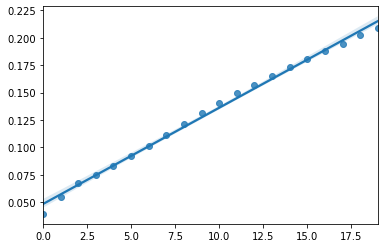

In [37]:
sns.regplot(x=np.arange(len(t1_L2_dist)), y=t10_L4_dist)

In [38]:
t11_L0_accumulated_weight = [0.00050218747, 0.0010685255, 0.0021260825, 0.003194553, 0.004211084, 0.0050869663, 0.0059149982, 0.0067530964, 0.0075134835, 0.008363689, 0.009111887, 0.009883975, 0.010609995, 0.011313837, 0.012088094, 0.012858463, 0.013490294, 0.0142075075, 0.014836377, 0.015581927]
t11_L1_accumulated_weight = [0.00019302353, 0.0005386057, 0.0011734818, 0.0017213472, 0.0022177522, 0.002672183, 0.0031220247, 0.0035574143, 0.004005624, 0.004439793, 0.0048770327, 0.005284827, 0.0057003926, 0.006099293, 0.006445946, 0.0067795296, 0.0071031475, 0.0074250307, 0.0077395034, 0.008008186]
t11_L2_accumulated_weight = [0.00042922015, 0.00056369, 0.00068301597, 0.000808399, 0.0009436727, 0.0010747104, 0.0012151373, 0.0013585101, 0.0014984084, 0.0016340578, 0.0017709227, 0.0018982544, 0.0020443425, 0.0021734817, 0.0023021614, 0.0024277654, 0.002565435, 0.0026999007, 0.0028336984, 0.002956309]
t11_L3_accumulated_weight = [0.00017994946, 0.00020764144, 0.00025286607, 0.00031295285, 0.00038414184, 0.00046193242, 0.0005466436, 0.00063287764, 0.00071915094, 0.00081317883, 0.00090706185, 0.0010035778, 0.0011040271, 0.0012027358, 0.0013007147, 0.0014002513, 0.0014985383, 0.00159613, 0.0016967901, 0.0017978711]
t11_L4_accumulated_weight = [0.0014893037, 0.001725664, 0.002088019, 0.0025584742, 0.0031298553, 0.003814477, 0.004610415, 0.005511271, 0.0065471926, 0.007669563, 0.008899279, 0.01030159, 0.011766618, 0.013268712, 0.014835833, 0.016484395, 0.018318417, 0.020222034, 0.022007087, 0.023981381]

t11_L0_accumulated_bias = [1.1263942e-05, 0.000113840826, 0.00025432662, 0.00036645692, 0.00040161755, 0.00042692255, 0.00046382376, 0.0005206008, 0.0005710413, 0.0006422356, 0.00072389864, 0.0008162683, 0.0008903803, 0.0010231738, 0.0011117415, 0.0012131229, 0.0013675806, 0.0014867425, 0.0016146102, 0.0017445195]
t11_L1_accumulated_bias = [7.894958e-06, 6.530633e-05, 0.00021567271, 0.000393486, 0.0006391405, 0.00095443387, 0.0013398, 0.0017824667, 0.0022994536, 0.002915945, 0.0035849132, 0.0041837273, 0.0048710257, 0.0054753697, 0.0060630077, 0.0065960633, 0.0072612674, 0.008008406, 0.008650471, 0.0092109665]
t11_L2_accumulated_bias = [2.4307294e-05, 0.000109889035, 0.00018477885, 0.00029016403, 0.00041508104, 0.0005790651, 0.00082407973, 0.0010549439, 0.0013168618, 0.0016390224, 0.0019117524, 0.0021591387, 0.0024057804, 0.002557733, 0.0027009498, 0.0028257095, 0.0030300615, 0.0031378476, 0.0033520488, 0.0034329172]
t11_L3_accumulated_bias = [9.469263e-06, 0.00011934231, 0.0002682415, 0.00039425583, 0.00051739236, 0.00065222284, 0.0008187902, 0.0010041504, 0.0011913572, 0.0013869194, 0.0016099014, 0.0018429026, 0.0020202696, 0.0022232367, 0.002415259, 0.0025871987, 0.002777738, 0.0029937974, 0.003104728, 0.0032210152]
t11_L4_accumulated_bias = [0.0001341899, 0.0008759925, 0.0016956953, 0.0022757396, 0.002903026, 0.0036339618, 0.0045344597, 0.0055272225, 0.0065018795, 0.007549564, 0.00874033, 0.009898107, 0.01083491, 0.011715804, 0.012648079, 0.013592082, 0.014622064, 0.015553119, 0.016220672, 0.01676031]


t11_L0_changes_weight = [0.00050218747, 0.0010685255, 0.0021260825, 0.003194553, 0.004211084, 0.0050869663, 0.0059149982, 0.0067530964, 0.0075134835, 0.008363689, 0.009111887, 0.009883975, 0.010609995, 0.011313837, 0.012088094, 0.012858463, 0.013490294, 0.0142075075, 0.014836377, 0.015581927]
t11_L1_changes_weight = [0.00019302353, 0.0005386057, 0.0011734818, 0.0017213472, 0.0022177522, 0.002672183, 0.0031220247, 0.0035574143, 0.004005624, 0.004439793, 0.0048770327, 0.005284827, 0.0057003926, 0.006099293, 0.006445946, 0.0067795296, 0.0071031475, 0.0074250307, 0.0077395034, 0.008008186]
t11_L2_changes_weight = [0.00042922015, 0.00056369, 0.00068301597, 0.000808399, 0.0009436727, 0.0010747104, 0.0012151373, 0.0013585101, 0.0014984084, 0.0016340578, 0.0017709227, 0.0018982544, 0.0020443425, 0.0021734817, 0.0023021614, 0.0024277654, 0.002565435, 0.0026999007, 0.0028336984, 0.002956309]
t11_L3_changes_weight = [0.00017994946, 0.00020764144, 0.00025286607, 0.00031295285, 0.00038414184, 0.00046193242, 0.0005466436, 0.00063287764, 0.00071915094, 0.00081317883, 0.00090706185, 0.0010035778, 0.0011040271, 0.0012027358, 0.0013007147, 0.0014002513, 0.0014985383, 0.00159613, 0.0016967901, 0.0017978711]
t11_L4_changes_weight = [0.0014893037, 0.001725664, 0.002088019, 0.0025584742, 0.0031298553, 0.003814477, 0.004610415, 0.005511271, 0.0065471926, 0.007669563, 0.008899279, 0.01030159, 0.011766618, 0.013268712, 0.014835833, 0.016484395, 0.018318417, 0.020222034, 0.022007087, 0.023981381]

t11_L0_changes_bias =[0.00010257689, 0.00014048579, 0.00011213031, 3.516063e-05, 2.5304995e-05, 3.6901212e-05, 5.6777062e-05, 5.044049e-05, 7.1194314e-05, 8.166302e-05, 9.236968e-05, 7.411197e-05, 0.0001327935, 8.856773e-05, 0.00010138133, 0.00015445775, 0.00011916191, 0.00012786768, 0.00012990925]
t11_L1_changes_bias =[5.7411373e-05, 0.00015036638, 0.00017781329, 0.0002456545, 0.00031529338, 0.0003853661, 0.0004426667, 0.00051698694, 0.0006164913, 0.0006689683, 0.0005988141, 0.00068729836, 0.00060434407, 0.000587638, 0.0005330555, 0.00066520413, 0.00074713817, 0.0006420659, 0.0005604951]
t11_L2_changes_bias =[8.558174e-05, 7.488982e-05, 0.000105385174, 0.00012491702, 0.00016398408, 0.0002450146, 0.00023086416, 0.00026191794, 0.00032216054, 0.00027273002, 0.00024738628, 0.0002466417, 0.00015195273, 0.00014321669, 0.00012475974, 0.00020435196, 0.00010778615, 0.00021420117, 8.086837e-05]
t11_L3_changes_bias =[0.00010987304, 0.0001488992, 0.00012601432, 0.00012313653, 0.00013483048, 0.00016656739, 0.00018536014, 0.00018720678, 0.00019556226, 0.00022298202, 0.00023300119, 0.00017736701, 0.00020296709, 0.00019202218, 0.00017193984, 0.00019053929, 0.00021605939, 0.00011093053, 0.000116287265]
t11_L4_changes_bias = [0.0007418026, 0.0008197028, 0.00058004423, 0.0006272865, 0.0007309357, 0.0009004979, 0.0009927629, 0.000974657, 0.0010476843, 0.0011907662, 0.0011577765, 0.0009368034, 0.00088089425, 0.0009322744, 0.00094400346, 0.0010299822, 0.00093105435, 0.0006675534, 0.0005396381]

In [39]:
t11_L0_dist = [0.025806576, 0.048700854, 0.062085908, 0.06774318, 0.07097894, 0.072691195, 0.07398148, 0.07575205, 0.07698206, 0.07883121, 0.08018053, 0.08190666, 0.0837298, 0.086054936, 0.08810392, 0.09017119, 0.09265111, 0.094897866, 0.09685469, 0.09918675]
t11_L1_dist = [0.014881053, 0.022788905, 0.032929514, 0.039741784, 0.04594675, 0.051926002, 0.05815502, 0.064256735, 0.07039183, 0.07645002, 0.08228698, 0.08714882, 0.092149645, 0.09634665, 0.10007784, 0.10328559, 0.10692196, 0.110857725, 0.11415741, 0.11694185]
t11_L2_dist = [0.01859364, 0.025075683, 0.031882726, 0.037547257, 0.042338118, 0.047290847, 0.052264664, 0.056354146, 0.060908694, 0.06475784, 0.06826558, 0.07178848, 0.07481843, 0.07693717, 0.07966892, 0.08144488, 0.08345996, 0.084986836, 0.086624384, 0.08775176]
t11_L3_dist = [0.01157594, 0.016207185, 0.021131596, 0.024512703, 0.027475636, 0.030267047, 0.033409134, 0.036544766, 0.03973939, 0.04282646, 0.045880396, 0.04913403, 0.05181666, 0.054494437, 0.056849346, 0.058964774, 0.061207965, 0.0633374, 0.064725, 0.066195376]
t11_L4_dist = [0.034178667, 0.0466101, 0.057240892, 0.06470863, 0.072450906, 0.08082545, 0.09073967, 0.10044652, 0.110124364, 0.11983998, 0.12988079, 0.13986072, 0.14865418, 0.15693375, 0.16529074, 0.17331395, 0.18177173, 0.18979481, 0.19672272, 0.20333514] 

In [40]:
t11_ACC = [[0.7839999794960022, 0.7760000228881836, 0.7760000228881836, 0.7739999890327454, 0.7519999742507935, 0.7940000295639038, 0.7860000133514404, 0.7860000133514404, 0.7639999985694885, 0.7519999742507935, 0.75, 0.7839999794960022, 0.7540000081062317, 0.8119999766349792, 0.7720000147819519, 0.7620000243186951, 0.765999972820282, 0.8140000104904175, 0.8059999942779541, 0.7540000081062317], [0.7400000095367432, 0.7300000190734863, 0.7300000190734863, 0.7319999933242798, 0.7419999837875366, 0.7080000042915344, 0.7379999756813049, 0.6980000138282776, 0.7360000014305115, 0.7179999947547913, 0.7279999852180481, 0.7099999785423279, 0.7160000205039978, 0.7160000205039978, 0.7480000257492065, 0.7099999785423279, 0.7279999852180481, 0.7239999771118164, 0.6899999976158142, 0.722000002861023], [0.75, 0.7440000176429749, 0.7739999890327454, 0.7699999809265137, 0.7419999837875366, 0.7239999771118164, 0.7300000190734863, 0.7559999823570251, 0.7139999866485596, 0.777999997138977, 0.734000027179718, 0.7419999837875366, 0.734000027179718, 0.7459999918937683, 0.765999972820282, 0.7519999742507935, 0.7419999837875366, 0.7200000286102295, 0.7319999933242798, 0.7400000095367432], [0.7319999933242798, 0.7879999876022339, 0.7960000038146973, 0.7400000095367432, 0.777999997138977, 0.7480000257492065, 0.7860000133514404, 0.7960000038146973, 0.765999972820282, 0.7620000243186951, 0.7839999794960022, 0.75, 0.7860000133514404, 0.7760000228881836, 0.7400000095367432, 0.7879999876022339, 0.7799999713897705, 0.7799999713897705, 0.7440000176429749, 0.7799999713897705], [0.7680000066757202, 0.800000011920929, 0.8159999847412109, 0.7739999890327454, 0.777999997138977, 0.7820000052452087, 0.7839999794960022, 0.765999972820282, 0.75, 0.7720000147819519, 0.8119999766349792, 0.777999997138977, 0.7559999823570251, 0.7739999890327454, 0.7960000038146973, 0.7739999890327454, 0.7940000295639038, 0.7559999823570251, 0.7620000243186951, 0.7820000052452087], [0.765999972820282, 0.8159999847412109, 0.7900000214576721, 0.7960000038146973, 0.7820000052452087, 0.7760000228881836, 0.7960000038146973, 0.7699999809265137, 0.7900000214576721, 0.765999972820282, 0.7879999876022339, 0.7519999742507935, 0.8100000023841858, 0.8080000281333923, 0.8379999995231628, 0.8080000281333923, 0.800000011920929, 0.7940000295639038, 0.7919999957084656, 0.7979999780654907], [0.7860000133514404, 0.8119999766349792, 0.7879999876022339, 0.8460000157356262, 0.8199999928474426, 0.7879999876022339, 0.8119999766349792, 0.7820000052452087, 0.7860000133514404, 0.8479999899864197, 0.7699999809265137, 0.8100000023841858, 0.7720000147819519, 0.7820000052452087, 0.7820000052452087, 0.8180000185966492, 0.7940000295639038, 0.8019999861717224, 0.800000011920929, 0.8100000023841858], [0.8059999942779541, 0.8240000009536743, 0.7940000295639038, 0.7979999780654907, 0.8360000252723694, 0.8399999737739563, 0.7839999794960022, 0.8019999861717224, 0.7879999876022339, 0.7739999890327454, 0.7940000295639038, 0.800000011920929, 0.8040000200271606, 0.8360000252723694, 0.8100000023841858, 0.7940000295639038, 0.7979999780654907, 0.7699999809265137, 0.7979999780654907, 0.8360000252723694], [0.8119999766349792, 0.8399999737739563, 0.8320000171661377, 0.8080000281333923, 0.8360000252723694, 0.8100000023841858, 0.8159999847412109, 0.828000009059906, 0.8259999752044678, 0.8140000104904175, 0.8240000009536743, 0.8159999847412109, 0.8399999737739563, 0.7960000038146973, 0.8240000009536743, 0.828000009059906, 0.8479999899864197, 0.7860000133514404, 0.8159999847412109, 0.8560000061988831], [0.8460000157356262, 0.8159999847412109, 0.8399999737739563, 0.8560000061988831, 0.8299999833106995, 0.8140000104904175, 0.8040000200271606, 0.8420000076293945, 0.828000009059906, 0.8199999928474426, 0.8479999899864197, 0.843999981880188, 0.800000011920929, 0.8080000281333923, 0.8159999847412109, 0.8259999752044678, 0.828000009059906, 0.8240000009536743, 0.8259999752044678, 0.8479999899864197], [0.7860000133514404, 0.800000011920929, 0.8320000171661377, 0.8320000171661377, 0.828000009059906, 0.8379999995231628, 0.8140000104904175, 0.8420000076293945, 0.7839999794960022, 0.8399999737739563, 0.8040000200271606, 0.8240000009536743, 0.8059999942779541, 0.8119999766349792, 0.8240000009536743, 0.7879999876022339, 0.8220000267028809, 0.8460000157356262, 0.8259999752044678, 0.8659999966621399], [0.7979999780654907, 0.8519999980926514, 0.8600000143051147, 0.8100000023841858, 0.8600000143051147, 0.8740000128746033, 0.8180000185966492, 0.8140000104904175, 0.8320000171661377, 0.8199999928474426, 0.8560000061988831, 0.8299999833106995, 0.8460000157356262, 0.8379999995231628, 0.8479999899864197, 0.7860000133514404, 0.7919999957084656, 0.8080000281333923, 0.8600000143051147, 0.8320000171661377], [0.8360000252723694, 0.8379999995231628, 0.8299999833106995, 0.8259999752044678, 0.8479999899864197, 0.8360000252723694, 0.8460000157356262, 0.8399999737739563, 0.828000009059906, 0.8560000061988831, 0.843999981880188, 0.8519999980926514, 0.828000009059906, 0.8199999928474426, 0.878000020980835, 0.8460000157356262, 0.843999981880188, 0.8299999833106995, 0.8679999709129333, 0.8100000023841858], [0.8579999804496765, 0.8640000224113464, 0.8759999871253967, 0.8299999833106995, 0.8519999980926514, 0.8360000252723694, 0.8159999847412109, 0.8399999737739563, 0.8299999833106995, 0.871999979019165, 0.8360000252723694, 0.843999981880188, 0.8299999833106995, 0.8700000047683716, 0.8360000252723694, 0.8360000252723694, 0.8519999980926514, 0.8360000252723694, 0.8619999885559082, 0.8180000185966492], [0.8579999804496765, 0.8759999871253967, 0.8679999709129333, 0.8460000157356262, 0.8579999804496765, 0.8420000076293945, 0.8600000143051147, 0.8640000224113464, 0.828000009059906, 0.8339999914169312, 0.8759999871253967, 0.8659999966621399, 0.828000009059906, 0.8479999899864197, 0.871999979019165, 0.8259999752044678, 0.8360000252723694, 0.8259999752044678, 0.8339999914169312, 0.8659999966621399], [0.8519999980926514, 0.8420000076293945, 0.8320000171661377, 0.8519999980926514, 0.8379999995231628, 0.8600000143051147, 0.8479999899864197, 0.8500000238418579, 0.8460000157356262, 0.8420000076293945, 0.8640000224113464, 0.8619999885559082, 0.878000020980835, 0.8500000238418579, 0.8159999847412109, 0.878000020980835, 0.8479999899864197, 0.8740000128746033, 0.8560000061988831, 0.8360000252723694], [0.8460000157356262, 0.8700000047683716, 0.8619999885559082, 0.8360000252723694, 0.8579999804496765, 0.8899999856948853, 0.8379999995231628, 0.8640000224113464, 0.8519999980926514, 0.843999981880188, 0.871999979019165, 0.871999979019165, 0.871999979019165, 0.8579999804496765, 0.8299999833106995, 0.8619999885559082, 0.8600000143051147, 0.8460000157356262, 0.8460000157356262, 0.8659999966621399], [0.8560000061988831, 0.8679999709129333, 0.8679999709129333, 0.871999979019165, 0.828000009059906, 0.8199999928474426, 0.8360000252723694, 0.843999981880188, 0.8679999709129333, 0.8579999804496765, 0.8299999833106995, 0.8640000224113464, 0.8500000238418579, 0.8700000047683716, 0.8500000238418579, 0.8619999885559082, 0.8579999804496765, 0.8820000290870667, 0.8539999723434448, 0.8579999804496765], [0.8700000047683716, 0.8759999871253967, 0.8460000157356262, 0.8619999885559082, 0.8659999966621399, 0.8740000128746033, 0.8080000281333923, 0.8679999709129333, 0.843999981880188, 0.8479999899864197, 0.843999981880188, 0.8560000061988831, 0.8519999980926514, 0.8539999723434448, 0.8640000224113464, 0.8600000143051147, 0.8519999980926514, 0.8579999804496765, 0.8539999723434448, 0.8859999775886536], [0.8479999899864197, 0.8700000047683716, 0.8619999885559082, 0.8619999885559082, 0.8700000047683716, 0.8619999885559082, 0.8539999723434448, 0.8460000157356262, 0.8140000104904175, 0.8859999775886536, 0.8399999737739563, 0.8619999885559082, 0.8479999899864197, 0.8679999709129333, 0.8759999871253967, 0.871999979019165, 0.8700000047683716, 0.8560000061988831, 0.8479999899864197, 0.8799999952316284], [0.8240000009536743, 0.8920000195503235, 0.8479999899864197, 0.878000020980835, 0.8640000224113464, 0.8799999952316284, 0.8759999871253967, 0.8539999723434448, 0.843999981880188, 0.8759999871253967, 0.8899999856948853, 0.8939999938011169, 0.878000020980835, 0.8519999980926514, 0.8619999885559082, 0.8600000143051147, 0.8519999980926514, 0.8700000047683716, 0.8840000033378601, 0.8840000033378601]]
t11_LOSS = [[0.5670444965362549, 0.5971160531044006, 0.5738993287086487, 0.5893198847770691, 0.612860918045044, 0.5366395711898804, 0.5953559279441833, 0.5697469115257263, 0.624125599861145, 0.6039415597915649, 0.6815305948257446, 0.6102793216705322, 0.6532814502716064, 0.5266452431678772, 0.6546263098716736, 0.6531987190246582, 0.5963347554206848, 0.5478020310401917, 0.5118416547775269, 0.6606792211532593], [0.6986751556396484, 0.7222683429718018, 0.7475466132164001, 0.727542519569397, 0.6409353017807007, 0.8684810996055603, 0.717075526714325, 0.7466726899147034, 0.7597545981407166, 0.7776041626930237, 0.7830548286437988, 0.7631776928901672, 0.7276323437690735, 0.7581945657730103, 0.7411583662033081, 0.8562560081481934, 0.7114351391792297, 0.7890915870666504, 0.9001088738441467, 0.7141761183738708], [0.6643375158309937, 0.683567225933075, 0.632542073726654, 0.6459999680519104, 0.6461144089698792, 0.6626354455947876, 0.6888653635978699, 0.6386703252792358, 0.7338984608650208, 0.6044396162033081, 0.749494731426239, 0.6876646876335144, 0.6603385806083679, 0.6794906854629517, 0.6462755799293518, 0.6885854601860046, 0.7150934934616089, 0.6997644305229187, 0.7248515486717224, 0.6647251844406128], [0.6969364881515503, 0.5943859219551086, 0.546403706073761, 0.664673388004303, 0.5570268630981445, 0.6376063227653503, 0.555351734161377, 0.5569060444831848, 0.6079829335212708, 0.6144278645515442, 0.5970046520233154, 0.6486366987228394, 0.6066015362739563, 0.6127081513404846, 0.6731858253479004, 0.5749847888946533, 0.5919764637947083, 0.6016343832015991, 0.6673629283905029, 0.6254594326019287], [0.6356445550918579, 0.536179780960083, 0.5910665988922119, 0.6065933704376221, 0.5585272908210754, 0.5959615707397461, 0.6348305940628052, 0.6125630736351013, 0.6556631326675415, 0.6482344269752502, 0.5111216902732849, 0.596415102481842, 0.5790340900421143, 0.6239978075027466, 0.60185706615448, 0.6725758910179138, 0.5529540777206421, 0.5688658952713013, 0.6053061485290527, 0.5682838559150696], [0.5885115265846252, 0.5575534701347351, 0.5794019103050232, 0.5561753511428833, 0.5902502536773682, 0.5568472146987915, 0.5657197833061218, 0.5772928595542908, 0.5528758764266968, 0.5890583395957947, 0.5589313507080078, 0.6210341453552246, 0.5124292969703674, 0.5239482522010803, 0.47165295481681824, 0.5386656522750854, 0.5203226804733276, 0.5538831353187561, 0.5665152072906494, 0.5340242981910706], [0.5722662806510925, 0.6123653650283813, 0.600199818611145, 0.4898449182510376, 0.4599466919898987, 0.5974669456481934, 0.5535643696784973, 0.545723557472229, 0.5264024138450623, 0.4684247076511383, 0.6218407154083252, 0.5078584551811218, 0.519182562828064, 0.6392821073532104, 0.534898579120636, 0.490392804145813, 0.5566663146018982, 0.5404176712036133, 0.5506016612052917, 0.5804726481437683], [0.5166640877723694, 0.4844592213630676, 0.5592815279960632, 0.5839874148368835, 0.4814518094062805, 0.47564706206321716, 0.5766085386276245, 0.5747319459915161, 0.564685046672821, 0.5657914280891418, 0.4918532371520996, 0.5487855076789856, 0.4949001967906952, 0.46910354495048523, 0.50384122133255, 0.49651432037353516, 0.5209923386573792, 0.5758894085884094, 0.6253223419189453, 0.4625411331653595], [0.4895341992378235, 0.43313440680503845, 0.4680124521255493, 0.5329417586326599, 0.43378180265426636, 0.542237401008606, 0.4834648668766022, 0.4473187327384949, 0.4812670648097992, 0.5100060701370239, 0.5717002749443054, 0.5122690200805664, 0.4643564224243164, 0.5499469041824341, 0.44700196385383606, 0.4425470530986786, 0.44497764110565186, 0.5693904757499695, 0.498258113861084, 0.37838679552078247], [0.43338125944137573, 0.48255911469459534, 0.4532128572463989, 0.38206812739372253, 0.4103698134422302, 0.5436736345291138, 0.4947526454925537, 0.42190492153167725, 0.48058027029037476, 0.43540334701538086, 0.412661075592041, 0.4377169907093048, 0.5747121572494507, 0.5077506899833679, 0.46198394894599915, 0.5125699043273926, 0.4485812783241272, 0.501914918422699, 0.47306981682777405, 0.4280291199684143], [0.5703437328338623, 0.5491058230400085, 0.4601108133792877, 0.4159395694732666, 0.49382734298706055, 0.4785541594028473, 0.5364130735397339, 0.4365381598472595, 0.5852633714675903, 0.45805737376213074, 0.4808906316757202, 0.5184938907623291, 0.5198649168014526, 0.47628968954086304, 0.45370587706565857, 0.6129492521286011, 0.5231167674064636, 0.44417086243629456, 0.4404841363430023, 0.39961084723472595], [0.5116692185401917, 0.4546329379081726, 0.3861733376979828, 0.5153360962867737, 0.40021467208862305, 0.36794960498809814, 0.46254000067710876, 0.4917854368686676, 0.43229901790618896, 0.47128209471702576, 0.40632620453834534, 0.4780089259147644, 0.40477389097213745, 0.47207111120224, 0.42748719453811646, 0.5296394228935242, 0.6044007539749146, 0.5378538966178894, 0.34516552090644836, 0.4854535460472107], [0.4975997805595398, 0.44482454657554626, 0.4709404408931732, 0.5306909084320068, 0.40829306840896606, 0.44855383038520813, 0.4056342840194702, 0.5078963041305542, 0.4952533543109894, 0.3835658133029938, 0.41751936078071594, 0.38343915343284607, 0.4838428199291229, 0.5311121344566345, 0.38795745372772217, 0.42132672667503357, 0.42782750725746155, 0.4801042675971985, 0.4098469018936157, 0.5504447221755981], [0.44967538118362427, 0.39773082733154297, 0.36035287380218506, 0.44913074374198914, 0.3919042944908142, 0.48387610912323, 0.526120662689209, 0.4250340163707733, 0.5337657928466797, 0.3635651469230652, 0.440010130405426, 0.4576507806777954, 0.4967968165874481, 0.39447346329689026, 0.46425265073776245, 0.4929072856903076, 0.4531709551811218, 0.48399609327316284, 0.4075242877006531, 0.46821892261505127], [0.43711143732070923, 0.4144361913204193, 0.3690713942050934, 0.43378356099128723, 0.4295143187046051, 0.4137142300605774, 0.414201945066452, 0.40463316440582275, 0.48854634165763855, 0.47011199593544006, 0.33762335777282715, 0.3981797695159912, 0.5255168676376343, 0.3859885334968567, 0.42151719331741333, 0.5038207769393921, 0.5200515985488892, 0.4775952100753784, 0.46908900141716003, 0.37683212757110596], [0.41351601481437683, 0.3906277120113373, 0.430205374956131, 0.38627251982688904, 0.41225913166999817, 0.46513622999191284, 0.48591747879981995, 0.3691582977771759, 0.38899490237236023, 0.43290430307388306, 0.39326953887939453, 0.38902732729911804, 0.3540460169315338, 0.4009769558906555, 0.5463528633117676, 0.3988993465900421, 0.399082750082016, 0.38867542147636414, 0.4044197201728821, 0.48398450016975403], [0.44008705019950867, 0.36005136370658875, 0.4151718318462372, 0.4184967875480652, 0.4363367557525635, 0.32519054412841797, 0.4657130539417267, 0.3872908353805542, 0.4182087779045105, 0.48300468921661377, 0.4156797230243683, 0.3826516270637512, 0.3791118264198303, 0.4308328330516815, 0.5031176209449768, 0.3999781608581543, 0.45674633979797363, 0.44996243715286255, 0.4280625581741333, 0.42642736434936523], [0.38834789395332336, 0.3812360465526581, 0.36197546124458313, 0.37076839804649353, 0.5378738641738892, 0.5752136707305908, 0.4377681612968445, 0.42563289403915405, 0.37989696860313416, 0.43080592155456543, 0.5158931612968445, 0.38394853472709656, 0.4068751633167267, 0.3700549602508545, 0.38569021224975586, 0.4194430112838745, 0.352548748254776, 0.38961341977119446, 0.3938956558704376, 0.42171263694763184], [0.3613961935043335, 0.3413354754447937, 0.41082555055618286, 0.3691040575504303, 0.420133501291275, 0.3994810879230499, 0.5930061936378479, 0.38712653517723083, 0.44406989216804504, 0.4441136419773102, 0.48093026876449585, 0.37671077251434326, 0.38143178820610046, 0.4431307017803192, 0.3528679311275482, 0.4043497145175934, 0.42610296607017517, 0.4571076035499573, 0.3744199573993683, 0.36850705742836], [0.4024931788444519, 0.4033445119857788, 0.3581557869911194, 0.3942304253578186, 0.36450523138046265, 0.43673181533813477, 0.4156825542449951, 0.40102770924568176, 0.5027047395706177, 0.38299059867858887, 0.4959990680217743, 0.3382425308227539, 0.3734283447265625, 0.3846655786037445, 0.37210598587989807, 0.3715728223323822, 0.36263608932495117, 0.4450076222419739, 0.44927650690078735, 0.3450581729412079], [0.4956687390804291, 0.30329445004463196, 0.40704625844955444, 0.3770720362663269, 0.3860642910003662, 0.3634781837463379, 0.34459832310676575, 0.4318455159664154, 0.4640533924102783, 0.36490994691848755, 0.3341521918773651, 0.2961186170578003, 0.3689964711666107, 0.4362446665763855, 0.37603795528411865, 0.4487251043319702, 0.40603047609329224, 0.3954744338989258, 0.3366442322731018, 0.41908401250839233]]

# Test 13

In [41]:
t12_L0_accumulated_weight = [0.0005238669, 0.0016402116, 0.003131026, 0.004230077, 0.0051557133, 0.006080823, 0.0069740256, 0.007828881, 0.008632876, 0.00936235, 0.010100214, 0.010724934, 0.011373063, 0.01195014, 0.012595255, 0.013230508, 0.013798173, 0.014308985, 0.014822851, 0.015298433]
t12_L1_accumulated_weight = [0.0008996886, 0.00085602194, 0.0018864692, 0.0024821267, 0.0029418403, 0.0033360454, 0.0037203867, 0.0040681222, 0.004388407, 0.0046810787, 0.005002593, 0.0053080744, 0.0055620614, 0.0058320933, 0.00603516, 0.006242963, 0.0064309863, 0.0066086072, 0.006779533, 0.006940074]
t12_L2_accumulated_weight = [0.00057175284, 0.00073609524, 0.000840783, 0.0009686353, 0.0011034722, 0.0012547912, 0.0014273738, 0.0016018673, 0.0017826793, 0.0019508244, 0.002127909, 0.0023029489, 0.002459578, 0.0026404352, 0.0028070696, 0.0029668335, 0.0031274403, 0.003268483, 0.0034206489, 0.0035677764]
t12_L3_accumulated_weight = [0.00019913955, 0.0002259649, 0.0002656675, 0.00032197373, 0.00039373495, 0.00047192362, 0.00055839797, 0.0006535876, 0.0007489093, 0.0008448819, 0.00094813586, 0.0010519858, 0.001154151, 0.001263664, 0.0013729562, 0.0014812456, 0.0015973246, 0.0017114797, 0.0018266396, 0.0019411495]
t12_L4_accumulated_weight = [0.0016488712, 0.0019039133, 0.0023286755, 0.0028871312, 0.0036166937, 0.0044906763, 0.005523704, 0.006685561, 0.007891129, 0.009217506, 0.010627141, 0.012087939, 0.013720766, 0.015525045, 0.017334279, 0.019221177, 0.021303618, 0.023405423, 0.025627336, 0.027857546]

t12_L0_accumulated_bias = [2.5255747e-05, 0.00014321315, 0.0003819426, 0.00051580055, 0.0006323324, 0.00068956555, 0.0007724586, 0.0009125006, 0.0010493667, 0.0012262331, 0.0014650272, 0.0016260808, 0.0017779132, 0.0019041456, 0.0020353275, 0.0021259864, 0.0022386084, 0.002285029, 0.0023417857, 0.0024357052]
t12_L1_accumulated_bias = [2.797232e-05, 9.215416e-05, 0.00037882858, 0.00060564186, 0.0008945087, 0.001270293, 0.0017336567, 0.002299175, 0.0031522117, 0.0039740303, 0.004687028, 0.005347445, 0.0060545234, 0.0064546405, 0.006950476, 0.007424915, 0.007817594, 0.008206045, 0.008434868, 0.008684288]
t12_L2_accumulated_bias = [3.1789183e-05, 9.362915e-05, 0.00017887019, 0.0002661418, 0.00032429735, 0.0004393647, 0.00058409874, 0.0007844634, 0.0009943014, 0.0012341919, 0.0014398705, 0.0016578846, 0.0018605806, 0.0020326595, 0.0022241636, 0.0023063074, 0.0023773445, 0.0024171756, 0.0025501864, 0.002606512]
t12_L3_accumulated_bias = [1.01967335e-05, 0.0001050109, 0.00027586723, 0.00044468808, 0.0005793322, 0.00074074237, 0.0009394278, 0.0011445954, 0.0013946097, 0.0016400521, 0.0018569948, 0.0020804096, 0.002222403, 0.0024075396, 0.0025371388, 0.0026984338, 0.0028106791, 0.0029376443, 0.0029941485, 0.003088873]
t12_L4_accumulated_bias = [0.00014391643, 0.0012802021, 0.0026060164, 0.0033591702, 0.0038425054, 0.004426688, 0.0051456355, 0.0059282826, 0.006692459, 0.007575276, 0.008194735, 0.0090269195, 0.009554496, 0.010162394, 0.010571934, 0.011046863, 0.011237683, 0.011731977, 0.011949089, 0.012288799]

t12_L0_changes_weight = [0.0005238669, 0.0016402116, 0.003131026, 0.004230077, 0.0051557133, 0.006080823, 0.0069740256, 0.007828881, 0.008632876, 0.00936235, 0.010100214, 0.010724934, 0.011373063, 0.01195014, 0.012595255, 0.013230508, 0.013798173, 0.014308985, 0.014822851, 0.015298433]
t12_L1_changes_weight = [0.0008996886, 0.00085602194, 0.0018864692, 0.0024821267, 0.0029418403, 0.0033360454, 0.0037203867, 0.0040681222, 0.004388407, 0.0046810787, 0.005002593, 0.0053080744, 0.0055620614, 0.0058320933, 0.00603516, 0.006242963, 0.0064309863, 0.0066086072, 0.006779533, 0.006940074]
t12_L2_changes_weight = [0.00057175284, 0.00073609524, 0.000840783, 0.0009686353, 0.0011034722, 0.0012547912, 0.0014273738, 0.0016018673, 0.0017826793, 0.0019508244, 0.002127909, 0.0023029489, 0.002459578, 0.0026404352, 0.0028070696, 0.0029668335, 0.0031274403, 0.003268483, 0.0034206489, 0.0035677764]
t12_L3_changes_weight = [0.00019913955, 0.0002259649, 0.0002656675, 0.00032197373, 0.00039373495, 0.00047192362, 0.00055839797, 0.0006535876, 0.0007489093, 0.0008448819, 0.00094813586, 0.0010519858, 0.001154151, 0.001263664, 0.0013729562, 0.0014812456, 0.0015973246, 0.0017114797, 0.0018266396, 0.0019411495]
t12_L4_changes_weight = [0.0016488712, 0.0019039133, 0.0023286755, 0.0028871312, 0.0036166937, 0.0044906763, 0.005523704, 0.006685561, 0.007891129, 0.009217506, 0.010627141, 0.012087939, 0.013720766, 0.015525045, 0.017334279, 0.019221177, 0.021303618, 0.023405423, 0.025627336, 0.027857546]

t12_L0_changes_bias = [0.0001179574, 0.00023872945, 0.00013385795, 0.00011653185, 5.723315e-05, 8.2893064e-05, 0.00014004199, 0.00013686606, 0.00017686642, 0.00023879413, 0.00016105361, 0.00015183236, 0.0001262324, 0.0001311819, 9.06589e-05, 0.000112622045, 4.642061e-05, 5.675666e-05, 9.391946e-05]
t12_L1_changes_bias = [6.418183e-05, 0.00028667442, 0.00022681328, 0.0002888668, 0.00037578435, 0.0004633637, 0.00056551816, 0.00085303676, 0.0008218186, 0.00071299775, 0.00066041714, 0.00070707826, 0.00040011713, 0.0004958357, 0.000474439, 0.00039267913, 0.00038845092, 0.00022882316, 0.00024941936]
t12_L2_changes_bias = [6.1839964e-05, 8.5241045e-05, 8.727162e-05, 5.8155536e-05, 0.00011506735, 0.00014473405, 0.00020036468, 0.00020983798, 0.00023989053, 0.00020567852, 0.00021801412, 0.00020269607, 0.00017207884, 0.00019150414, 8.2143815e-05, 7.1037095e-05, 3.9831037e-05, 0.00013301079, 5.632569e-05]
t12_L3_changes_bias = [9.481417e-05, 0.00017085634, 0.00016882084, 0.0001346441, 0.0001614102, 0.00019868545, 0.00020516763, 0.00025001424, 0.00024544238, 0.00021694275, 0.00022341474, 0.0001419934, 0.00018513668, 0.00012959912, 0.00016129506, 0.000112245325, 0.00012696511, 5.6504272e-05, 9.4724586e-05]
t12_L4_changes_bias = [0.0011362856, 0.0013258143, 0.0007531538, 0.00048333523, 0.00058418256, 0.0007189475, 0.00078264717, 0.00076417625, 0.00088281697, 0.00061945943, 0.0008321842, 0.00052757654, 0.0006078975, 0.00040954072, 0.00047492888, 0.00019081961, 0.00049429387, 0.00021711271, 0.00033970922]

In [42]:
t12_L0_dist = [0.026199073, 0.052935865, 0.0704858, 0.07698646, 0.080456614, 0.082034595, 0.0815234, 0.082602054, 0.08307259, 0.08414864, 0.086221494, 0.08804242, 0.08981339, 0.091404095, 0.0932223, 0.09466841, 0.09628288, 0.09754034, 0.09892149, 0.10024318]
t12_L1_dist = [0.026735412, 0.02730217, 0.04328163, 0.051253464, 0.05741242, 0.06261253, 0.06777936, 0.07334096, 0.07967617, 0.085437305, 0.09048745, 0.094986856, 0.09915907, 0.102009796, 0.10504038, 0.107687026, 0.11000785, 0.11230976, 0.11373541, 0.115175046]
t12_L2_dist = [0.021195332, 0.026269343, 0.031689096, 0.036717698, 0.040673096, 0.045214914, 0.05016542, 0.05507446, 0.05939402, 0.06334987, 0.06684533, 0.06996322, 0.07220873, 0.074125916, 0.076549344, 0.07741541, 0.07834486, 0.07961044, 0.08059795, 0.081432916]
t12_L3_dist = [0.012167877, 0.016290613, 0.021346215, 0.02506912, 0.028203888, 0.031393435, 0.034862522, 0.038281005, 0.041651234, 0.044718802, 0.047609042, 0.05022811, 0.052290283, 0.054537978, 0.05631782, 0.057901368, 0.059361883, 0.060850248, 0.061844926, 0.0632378]
t12_L4_dist = [0.03577844, 0.05181838, 0.06565229, 0.07421245, 0.08162991, 0.08976023, 0.09878995, 0.10873835, 0.118441425, 0.12805657, 0.13654146, 0.14534864, 0.15333347, 0.16163184, 0.16905889, 0.17668052, 0.18370894, 0.1913597, 0.19804576, 0.20508459] 

In [43]:
t12_ACC = [[0.7559999823570251, 0.7639999985694885, 0.7839999794960022, 0.7820000052452087, 0.777999997138977, 0.7919999957084656, 0.8220000267028809, 0.7680000066757202, 0.7900000214576721, 0.7820000052452087, 0.777999997138977, 0.7860000133514404, 0.7919999957084656, 0.7839999794960022, 0.7799999713897705, 0.7879999876022339, 0.7760000228881836, 0.7879999876022339, 0.7639999985694885, 0.7979999780654907], [0.6980000138282776, 0.7300000190734863, 0.6880000233650208, 0.734000027179718, 0.6919999718666077, 0.7020000219345093, 0.6859999895095825, 0.7360000014305115, 0.8479999899864197, 0.7080000042915344, 0.6819999814033508, 0.7139999866485596, 0.6779999732971191, 0.722000002861023, 0.7400000095367432, 0.7080000042915344, 0.699999988079071, 0.6660000085830688, 0.7580000162124634, 0.7239999771118164], [0.7400000095367432, 0.7559999823570251, 0.7260000109672546, 0.7799999713897705, 0.7480000257492065, 0.7440000176429749, 0.7039999961853027, 0.7680000066757202, 0.7760000228881836, 0.7260000109672546, 0.7319999933242798, 0.7599999904632568, 0.7400000095367432, 0.7400000095367432, 0.7680000066757202, 0.7639999985694885, 0.7580000162124634, 0.7459999918937683, 0.75, 0.7820000052452087], [0.7519999742507935, 0.777999997138977, 0.722000002861023, 0.7680000066757202, 0.7459999918937683, 0.7820000052452087, 0.7260000109672546, 0.8199999928474426, 0.777999997138977, 0.7580000162124634, 0.7319999933242798, 0.7940000295639038, 0.7540000081062317, 0.7620000243186951, 0.7900000214576721, 0.8140000104904175, 0.7239999771118164, 0.7680000066757202, 0.7720000147819519, 0.7599999904632568], [0.7400000095367432, 0.7739999890327454, 0.7860000133514404, 0.7459999918937683, 0.800000011920929, 0.7540000081062317, 0.7940000295639038, 0.7860000133514404, 0.7799999713897705, 0.7720000147819519, 0.800000011920929, 0.7179999947547913, 0.7860000133514404, 0.7680000066757202, 0.800000011920929, 0.8019999861717224, 0.7860000133514404, 0.7860000133514404, 0.8140000104904175, 0.7919999957084656], [0.7919999957084656, 0.8180000185966492, 0.7879999876022339, 0.8199999928474426, 0.7820000052452087, 0.8080000281333923, 0.7760000228881836, 0.8180000185966492, 0.7720000147819519, 0.7879999876022339, 0.7919999957084656, 0.7919999957084656, 0.7900000214576721, 0.8080000281333923, 0.8159999847412109, 0.7879999876022339, 0.7839999794960022, 0.7760000228881836, 0.7919999957084656, 0.7940000295639038], [0.8059999942779541, 0.8119999766349792, 0.8420000076293945, 0.8119999766349792, 0.8059999942779541, 0.8460000157356262, 0.7879999876022339, 0.7820000052452087, 0.8119999766349792, 0.7820000052452087, 0.8259999752044678, 0.7919999957084656, 0.8240000009536743, 0.8119999766349792, 0.8040000200271606, 0.828000009059906, 0.765999972820282, 0.8180000185966492, 0.7979999780654907, 0.7900000214576721], [0.8519999980926514, 0.8080000281333923, 0.8040000200271606, 0.8199999928474426, 0.8360000252723694, 0.8159999847412109, 0.8080000281333923, 0.8500000238418579, 0.8180000185966492, 0.7799999713897705, 0.8240000009536743, 0.8080000281333923, 0.8080000281333923, 0.800000011920929, 0.8299999833106995, 0.8240000009536743, 0.8180000185966492, 0.8040000200271606, 0.8159999847412109, 0.7960000038146973], [0.7919999957084656, 0.8299999833106995, 0.8299999833106995, 0.828000009059906, 0.8320000171661377, 0.8100000023841858, 0.828000009059906, 0.828000009059906, 0.8460000157356262, 0.8560000061988831, 0.828000009059906, 0.7680000066757202, 0.8199999928474426, 0.7940000295639038, 0.8140000104904175, 0.8159999847412109, 0.8119999766349792, 0.8159999847412109, 0.8059999942779541, 0.8199999928474426], [0.7940000295639038, 0.8299999833106995, 0.8159999847412109, 0.8180000185966492, 0.8740000128746033, 0.8479999899864197, 0.8379999995231628, 0.8500000238418579, 0.8080000281333923, 0.8399999737739563, 0.8080000281333923, 0.8119999766349792, 0.8199999928474426, 0.8119999766349792, 0.8240000009536743, 0.8360000252723694, 0.8119999766349792, 0.828000009059906, 0.8479999899864197, 0.8240000009536743], [0.828000009059906, 0.8299999833106995, 0.8220000267028809, 0.8140000104904175, 0.8240000009536743, 0.8460000157356262, 0.828000009059906, 0.8420000076293945, 0.8379999995231628, 0.8379999995231628, 0.8360000252723694, 0.8560000061988831, 0.8619999885559082, 0.8479999899864197, 0.828000009059906, 0.8159999847412109, 0.8299999833106995, 0.8259999752044678, 0.878000020980835, 0.8539999723434448], [0.828000009059906, 0.8500000238418579, 0.7860000133514404, 0.8259999752044678, 0.8659999966621399, 0.8500000238418579, 0.8320000171661377, 0.8240000009536743, 0.7839999794960022, 0.8799999952316284, 0.8159999847412109, 0.8339999914169312, 0.8360000252723694, 0.8500000238418579, 0.8399999737739563, 0.8519999980926514, 0.8859999775886536, 0.8379999995231628, 0.8379999995231628, 0.8059999942779541], [0.8220000267028809, 0.8299999833106995, 0.8600000143051147, 0.8360000252723694, 0.8619999885559082, 0.8500000238418579, 0.8299999833106995, 0.8500000238418579, 0.8479999899864197, 0.843999981880188, 0.8600000143051147, 0.8379999995231628, 0.8579999804496765, 0.878000020980835, 0.8600000143051147, 0.8519999980926514, 0.8640000224113464, 0.8600000143051147, 0.8460000157356262, 0.8220000267028809], [0.8220000267028809, 0.8700000047683716, 0.8420000076293945, 0.8539999723434448, 0.8479999899864197, 0.8880000114440918, 0.8479999899864197, 0.8659999966621399, 0.8360000252723694, 0.8519999980926514, 0.8640000224113464, 0.8560000061988831, 0.8360000252723694, 0.8479999899864197, 0.8500000238418579, 0.8600000143051147, 0.8659999966621399, 0.8479999899864197, 0.8679999709129333, 0.8619999885559082], [0.8399999737739563, 0.8579999804496765, 0.8759999871253967, 0.8619999885559082, 0.8700000047683716, 0.871999979019165, 0.8700000047683716, 0.8140000104904175, 0.8259999752044678, 0.8460000157356262, 0.8460000157356262, 0.8539999723434448, 0.8679999709129333, 0.8640000224113464, 0.8740000128746033, 0.8500000238418579, 0.843999981880188, 0.8579999804496765, 0.8259999752044678, 0.8700000047683716], [0.8379999995231628, 0.8640000224113464, 0.8320000171661377, 0.843999981880188, 0.8519999980926514, 0.8679999709129333, 0.8759999871253967, 0.8299999833106995, 0.8360000252723694, 0.8379999995231628, 0.8539999723434448, 0.8360000252723694, 0.8579999804496765, 0.8740000128746033, 0.8460000157356262, 0.8479999899864197, 0.8679999709129333, 0.8220000267028809, 0.8640000224113464, 0.8460000157356262], [0.8420000076293945, 0.843999981880188, 0.843999981880188, 0.8600000143051147, 0.8659999966621399, 0.8659999966621399, 0.871999979019165, 0.8299999833106995, 0.8500000238418579, 0.8379999995231628, 0.843999981880188, 0.8360000252723694, 0.8339999914169312, 0.8920000195503235, 0.8579999804496765, 0.8619999885559082, 0.8460000157356262, 0.8759999871253967, 0.8519999980926514, 0.8500000238418579], [0.8700000047683716, 0.8640000224113464, 0.871999979019165, 0.8820000290870667, 0.8659999966621399, 0.8519999980926514, 0.8539999723434448, 0.8579999804496765, 0.8560000061988831, 0.906000018119812, 0.8640000224113464, 0.843999981880188, 0.8679999709129333, 0.8840000033378601, 0.8960000276565552, 0.871999979019165, 0.8579999804496765, 0.8600000143051147, 0.8640000224113464, 0.8799999952316284], [0.8799999952316284, 0.8519999980926514, 0.8399999737739563, 0.843999981880188, 0.8679999709129333, 0.8500000238418579, 0.8619999885559082, 0.8500000238418579, 0.8339999914169312, 0.8659999966621399, 0.8619999885559082, 0.8640000224113464, 0.8479999899864197, 0.8840000033378601, 0.8700000047683716, 0.8899999856948853, 0.8700000047683716, 0.843999981880188, 0.8880000114440918, 0.8640000224113464], [0.8579999804496765, 0.8899999856948853, 0.8759999871253967, 0.8859999775886536, 0.878000020980835, 0.8640000224113464, 0.8820000290870667, 0.828000009059906, 0.8560000061988831, 0.9120000004768372, 0.8679999709129333, 0.8759999871253967, 0.8659999966621399, 0.8460000157356262, 0.8859999775886536, 0.8999999761581421, 0.8539999723434448, 0.8679999709129333, 0.8679999709129333, 0.8299999833106995], [0.8799999952316284, 0.8619999885559082, 0.8700000047683716, 0.8740000128746033, 0.8679999709129333, 0.8379999995231628, 0.8740000128746033, 0.871999979019165, 0.8399999737739563, 0.8880000114440918, 0.8820000290870667, 0.8759999871253967, 0.8960000276565552, 0.8460000157356262, 0.8460000157356262, 0.8960000276565552, 0.8600000143051147, 0.8820000290870667, 0.8299999833106995, 0.8700000047683716]]
t12_LOSS = [[0.6507254242897034, 0.6082172393798828, 0.545211136341095, 0.547514796257019, 0.5640701651573181, 0.5628020167350769, 0.5524623394012451, 0.5695935487747192, 0.5675001740455627, 0.6162722706794739, 0.6021523475646973, 0.5856767296791077, 0.5328541398048401, 0.5726282596588135, 0.5731016993522644, 0.5790542364120483, 0.5580685138702393, 0.5676567554473877, 0.6268115639686584, 0.5446199178695679], [0.7719701528549194, 0.7714547514915466, 0.8309850692749023, 0.746748685836792, 0.8339768052101135, 0.7674396634101868, 0.8323643803596497, 0.7391928434371948, 0.522992730140686, 0.8337092399597168, 0.8197936415672302, 0.7479192614555359, 0.7939461469650269, 0.7231922745704651, 0.776221752166748, 0.7660112380981445, 0.7802903652191162, 0.909246563911438, 0.6468665599822998, 0.7597545385360718], [0.6696426272392273, 0.6411582827568054, 0.7050614953041077, 0.593108057975769, 0.6706914305686951, 0.6575155258178711, 0.7967616319656372, 0.5751689672470093, 0.6281542181968689, 0.709420919418335, 0.6971172094345093, 0.6239969730377197, 0.6951923370361328, 0.6214467287063599, 0.582925021648407, 0.6472964882850647, 0.6517582535743713, 0.7114565968513489, 0.6393906474113464, 0.5857762098312378], [0.7260253429412842, 0.6194120645523071, 0.6938138604164124, 0.6457908749580383, 0.630056619644165, 0.5786525011062622, 0.6717090606689453, 0.5092759132385254, 0.5857619643211365, 0.6111010909080505, 0.6772177219390869, 0.5692607164382935, 0.6326692700386047, 0.6434215903282166, 0.5634850859642029, 0.5788507461547852, 0.7429612874984741, 0.6777266263961792, 0.6125539541244507, 0.6163502931594849], [0.6172833442687988, 0.6279709935188293, 0.5553058385848999, 0.6879938840866089, 0.5312246084213257, 0.6605925559997559, 0.5322058200836182, 0.5180585384368896, 0.5646359920501709, 0.5713527202606201, 0.5631434917449951, 0.7711514234542847, 0.5872741937637329, 0.6843818426132202, 0.6065775752067566, 0.5672287344932556, 0.5865284204483032, 0.6063662767410278, 0.5339952707290649, 0.5844987630844116], [0.557883083820343, 0.5110909342765808, 0.5331928133964539, 0.4786730408668518, 0.6067903637886047, 0.5374773144721985, 0.6089916229248047, 0.552447497844696, 0.6208520531654358, 0.5754314661026001, 0.5640890002250671, 0.5462648272514343, 0.565589964389801, 0.49564269185066223, 0.4509051442146301, 0.542034924030304, 0.5950117111206055, 0.6121244430541992, 0.5638616681098938, 0.6046242117881775], [0.49809983372688293, 0.528642475605011, 0.4701332449913025, 0.5024512410163879, 0.46411725878715515, 0.4485183656215668, 0.5887355804443359, 0.5343971848487854, 0.5385603308677673, 0.5704486966133118, 0.49283331632614136, 0.540892481803894, 0.48854249715805054, 0.49655917286872864, 0.5107148885726929, 0.5305498242378235, 0.5847925543785095, 0.5171767473220825, 0.5614917278289795, 0.5096355080604553], [0.43608105182647705, 0.501593828201294, 0.5243259072303772, 0.4957164525985718, 0.5045294761657715, 0.5198084712028503, 0.5240252017974854, 0.5077501535415649, 0.5077093243598938, 0.575055718421936, 0.5161325335502625, 0.4927529990673065, 0.5275157690048218, 0.5397999882698059, 0.5186870098114014, 0.5070073008537292, 0.4907812774181366, 0.567764937877655, 0.5180009603500366, 0.5613003373146057], [0.5919119119644165, 0.4599774181842804, 0.44384995102882385, 0.45468661189079285, 0.4807246923446655, 0.4702521860599518, 0.5113440752029419, 0.48148831725120544, 0.4869609475135803, 0.38755303621292114, 0.49233192205429077, 0.6650549173355103, 0.5011604428291321, 0.49166208505630493, 0.5130853652954102, 0.45648738741874695, 0.5329546332359314, 0.4939398169517517, 0.5232760906219482, 0.5023818016052246], [0.5339781641960144, 0.4563456177711487, 0.5452066659927368, 0.46745115518569946, 0.3974882960319519, 0.4148467183113098, 0.4535331428050995, 0.4045693874359131, 0.5602964758872986, 0.49586212635040283, 0.5600220561027527, 0.5456639528274536, 0.5048868060112, 0.5015789866447449, 0.46139606833457947, 0.5056560039520264, 0.5014901757240295, 0.49009713530540466, 0.37748077511787415, 0.46652236580848694], [0.4844024181365967, 0.48945724964141846, 0.49598294496536255, 0.5024495124816895, 0.5088868737220764, 0.421457976102829, 0.5398373603820801, 0.44576919078826904, 0.4723590314388275, 0.4673543870449066, 0.4723846912384033, 0.4491965174674988, 0.42436483502388, 0.4413398206233978, 0.49227380752563477, 0.46750444173812866, 0.5085992813110352, 0.5093237161636353, 0.3822471797466278, 0.44875767827033997], [0.4509868919849396, 0.44177529215812683, 0.5266599655151367, 0.5062842965126038, 0.3870275914669037, 0.426824152469635, 0.4693011939525604, 0.49912816286087036, 0.6428109407424927, 0.3555004894733429, 0.5945611000061035, 0.5036020278930664, 0.4131302833557129, 0.4389442205429077, 0.5138058066368103, 0.3947628140449524, 0.3115966320037842, 0.48984649777412415, 0.3949441909790039, 0.5022290349006653], [0.46704429388046265, 0.4491181969642639, 0.4589976370334625, 0.4693443477153778, 0.4306066632270813, 0.4177245795726776, 0.504663348197937, 0.42431849241256714, 0.4471582770347595, 0.42148393392562866, 0.4451749622821808, 0.4287243187427521, 0.40524980425834656, 0.39484280347824097, 0.39731866121292114, 0.4217255413532257, 0.40233245491981506, 0.42875537276268005, 0.41251733899116516, 0.510248064994812], [0.49658507108688354, 0.45683911442756653, 0.41480278968811035, 0.4020153880119324, 0.4715597927570343, 0.30756843090057373, 0.42146924138069153, 0.38791561126708984, 0.4169245958328247, 0.4242821931838989, 0.41735562682151794, 0.38517722487449646, 0.498773992061615, 0.46343934535980225, 0.4864193797111511, 0.41168418526649475, 0.41699689626693726, 0.4333965480327606, 0.37243202328681946, 0.45578494668006897], [0.4768875241279602, 0.41857779026031494, 0.41376787424087524, 0.4098276197910309, 0.41492918133735657, 0.330786794424057, 0.39271897077560425, 0.5381764769554138, 0.4775885045528412, 0.47071129083633423, 0.4068918526172638, 0.4224742352962494, 0.42013004422187805, 0.40731072425842285, 0.36453378200531006, 0.4190623462200165, 0.4988512694835663, 0.4008490741252899, 0.44243907928466797, 0.40914660692214966], [0.45996153354644775, 0.41403400897979736, 0.4228791296482086, 0.46310165524482727, 0.439538836479187, 0.37696436047554016, 0.3516850173473358, 0.4548989236354828, 0.4331461191177368, 0.4611724317073822, 0.48338261246681213, 0.4251694083213806, 0.40654444694519043, 0.400850772857666, 0.5061116218566895, 0.4461950957775116, 0.38726264238357544, 0.5031442642211914, 0.4295487403869629, 0.38632065057754517], [0.44463396072387695, 0.5314808487892151, 0.5538513660430908, 0.42348089814186096, 0.39142072200775146, 0.3809278607368469, 0.37221387028694153, 0.5041232109069824, 0.4123822748661041, 0.5066874623298645, 0.47637176513671875, 0.433623343706131, 0.4937187433242798, 0.37507152557373047, 0.4345227777957916, 0.4602701961994171, 0.4767600893974304, 0.33659645915031433, 0.39054957032203674, 0.408424437046051], [0.3467893898487091, 0.40098363161087036, 0.35889285802841187, 0.37112924456596375, 0.38762348890304565, 0.3674008846282959, 0.43742290139198303, 0.39620891213417053, 0.41160815954208374, 0.3574524521827698, 0.4764220118522644, 0.4423183500766754, 0.3965533375740051, 0.39625394344329834, 0.36190328001976013, 0.4091508686542511, 0.41484740376472473, 0.4209215044975281, 0.45265233516693115, 0.38675135374069214], [0.35577625036239624, 0.47440144419670105, 0.395577609539032, 0.4310717284679413, 0.43806979060173035, 0.4719043970108032, 0.3531877398490906, 0.408263236284256, 0.4205949604511261, 0.41468071937561035, 0.3888072371482849, 0.35844048857688904, 0.444573312997818, 0.3402214050292969, 0.4341854453086853, 0.3584856390953064, 0.3720719814300537, 0.49261489510536194, 0.31226828694343567, 0.37262940406799316], [0.38592952489852905, 0.39271080493927, 0.3937717080116272, 0.3546433448791504, 0.4278304874897003, 0.36657410860061646, 0.4004018306732178, 0.5284120440483093, 0.4112721085548401, 0.30948859453201294, 0.4315590262413025, 0.3795394003391266, 0.33654889464378357, 0.4563811719417572, 0.3867132365703583, 0.29231005907058716, 0.39518532156944275, 0.3803788423538208, 0.38180774450302124, 0.513017475605011], [0.3782363831996918, 0.44733232259750366, 0.35817834734916687, 0.33980047702789307, 0.38657164573669434, 0.4838639795780182, 0.47808167338371277, 0.4108027517795563, 0.509891927242279, 0.3916036784648895, 0.3342902660369873, 0.4560151994228363, 0.35942426323890686, 0.4891095757484436, 0.42925694584846497, 0.31292814016342163, 0.4271070659160614, 0.4002971947193146, 0.48090529441833496, 0.4106985032558441]]

# test 14

In [44]:
t13_L0_accumulated_weight = [0.000731781, 0.0015114947, 0.0026058485, 0.0035733145, 0.0045301947, 0.0054437597, 0.0064355163, 0.0073722624, 0.008306674, 0.009233205, 0.0100687975, 0.0109232925, 0.011872814, 0.012653085, 0.013375667, 0.014198429, 0.014945671, 0.01573514, 0.016370587, 0.016943641]
t13_L1_accumulated_weight = [0.00088714156, 0.0005693971, 0.0012337735, 0.0017693056, 0.0021834662, 0.0025528849, 0.0028907873, 0.003219842, 0.003542508, 0.003860676, 0.004184787, 0.0044996184, 0.0048199682, 0.0051342426, 0.00543113, 0.0056870356, 0.0059678466, 0.006232753, 0.006468744, 0.0066958712]
t13_L2_accumulated_weight = [0.00020245231, 0.0002876732, 0.00039877242, 0.0005436598, 0.0007151834, 0.00089582975, 0.0010806706, 0.0012697101, 0.001460014, 0.0016482307, 0.0018337717, 0.0020201097, 0.0021967425, 0.0023810966, 0.002556502, 0.0027267071, 0.002894737, 0.0030627048, 0.0032110927, 0.003360466]
t13_L3_accumulated_weight = [0.00022931537, 0.00026098083, 0.0003065763, 0.00037136476, 0.00044818496, 0.00053733797, 0.00063254987, 0.00073155906, 0.0008345885, 0.00094070635, 0.0010427372, 0.0011546446, 0.0012653791, 0.0013837595, 0.0014987795, 0.0016143105, 0.0017283703, 0.0018529785, 0.001970334, 0.0020955282]
t13_L4_accumulated_weight = [0.0020309868, 0.002254938, 0.002663677, 0.0031885724, 0.0038425506, 0.004628866, 0.0055557145, 0.0066723498, 0.007823971, 0.009134455, 0.010532411, 0.01204779, 0.0135882525, 0.015170267, 0.01681868, 0.018479463, 0.020154694, 0.021952122, 0.023820097, 0.025818046]

t13_L0_accumulated_bias = [2.5025483e-05, 0.00016759327, 0.00037009592, 0.0004451352, 0.0005096518, 0.00061204704, 0.0007210972, 0.0008264242, 0.0010100447, 0.0011446658, 0.0013471753, 0.0015544319, 0.0017222414, 0.001943846, 0.0020656714, 0.0022166758, 0.0023203846, 0.002497749, 0.002612121, 0.002760287]
t13_L1_accumulated_bias = [2.876933e-05, 0.000105713596, 0.00046695967, 0.00063488353, 0.0008347529, 0.0011331646, 0.0014776776, 0.0019449564, 0.002495375, 0.0030484346, 0.0036947872, 0.0042773914, 0.004795189, 0.0053363373, 0.0058319033, 0.0063406825, 0.006757207, 0.0070585306, 0.007328623, 0.007618743]
t13_L2_accumulated_bias = [1.2458191e-05, 8.498819e-05, 0.00021031353, 0.00028122624, 0.00038932916, 0.00054580445, 0.00076273654, 0.0010435388, 0.0013652946, 0.0017039971, 0.0020143916, 0.0022873783, 0.0025197247, 0.0027018436, 0.0029109903, 0.0030779284, 0.003222962, 0.0033129663, 0.0033765007, 0.0034742067]
t13_L3_accumulated_bias = [8.91122e-06, 0.0001458473, 0.00040253508, 0.00055530504, 0.00069852325, 0.0008552304, 0.0010346142, 0.0012791425, 0.0015491934, 0.0017581496, 0.001982164, 0.0022152746, 0.002430812, 0.002614906, 0.002748432, 0.002901155, 0.0030653598, 0.0032018865, 0.0032963557, 0.003390287]
t13_L4_accumulated_bias = [0.00016186966, 0.0014496631, 0.0028372486, 0.0034932035, 0.004133345, 0.0048359116, 0.0055391183, 0.006462137, 0.0073265783, 0.008151332, 0.009084772, 0.009855622, 0.010655407, 0.011571935, 0.012244273, 0.0129024405, 0.013436444, 0.013887061, 0.014272252, 0.014815098]

t13_L0_changes_weight = [0.000731781, 0.0015114947, 0.0026058485, 0.0035733145, 0.0045301947, 0.0054437597, 0.0064355163, 0.0073722624, 0.008306674, 0.009233205, 0.0100687975, 0.0109232925, 0.011872814, 0.012653085, 0.013375667, 0.014198429, 0.014945671, 0.01573514, 0.016370587, 0.016943641]
t13_L1_changes_weight = [0.00088714156, 0.0005693971, 0.0012337735, 0.0017693056, 0.0021834662, 0.0025528849, 0.0028907873, 0.003219842, 0.003542508, 0.003860676, 0.004184787, 0.0044996184, 0.0048199682, 0.0051342426, 0.00543113, 0.0056870356, 0.0059678466, 0.006232753, 0.006468744, 0.0066958712]
t13_L2_changes_weight = [0.00020245231, 0.0002876732, 0.00039877242, 0.0005436598, 0.0007151834, 0.00089582975, 0.0010806706, 0.0012697101, 0.001460014, 0.0016482307, 0.0018337717, 0.0020201097, 0.0021967425, 0.0023810966, 0.002556502, 0.0027267071, 0.002894737, 0.0030627048, 0.0032110927, 0.003360466]
t13_L3_changes_weight = [0.00022931537, 0.00026098083, 0.0003065763, 0.00037136476, 0.00044818496, 0.00053733797, 0.00063254987, 0.00073155906, 0.0008345885, 0.00094070635, 0.0010427372, 0.0011546446, 0.0012653791, 0.0013837595, 0.0014987795, 0.0016143105, 0.0017283703, 0.0018529785, 0.001970334, 0.0020955282]
t13_L4_changes_weight = [0.0020309868, 0.002254938, 0.002663677, 0.0031885724, 0.0038425506, 0.004628866, 0.0055557145, 0.0066723498, 0.007823971, 0.009134455, 0.010532411, 0.01204779, 0.0135882525, 0.015170267, 0.01681868, 0.018479463, 0.020154694, 0.021952122, 0.023820097, 0.025818046]

t13_L0_changes_bias = [0.00014256779, 0.00020250265, 7.503928e-05, 6.4516586e-05, 0.00010239525, 0.00010905019, 0.000105326995, 0.00018362049, 0.00013462105, 0.00020250957, 0.00020725653, 0.00016780954, 0.0002216046, 0.000121825375, 0.00015100441, 0.00010370882, 0.00017736433, 0.000114372, 0.00014816597]
t13_L1_changes_bias = [7.694427e-05, 0.00036124606, 0.00016792386, 0.00019986939, 0.0002984117, 0.00034451298, 0.00046727876, 0.0005504186, 0.0005530596, 0.00064635254, 0.0005826042, 0.00051779766, 0.00054114824, 0.00049556606, 0.0005087792, 0.0004165247, 0.00030132337, 0.0002700924, 0.00029012002]
t13_L2_changes_bias = [7.253e-05, 0.00012532534, 7.0912705e-05, 0.00010810292, 0.00015647529, 0.0002169321, 0.00028080225, 0.00032175577, 0.00033870258, 0.00031039445, 0.0002729867, 0.00023234636, 0.00018211897, 0.00020914664, 0.00016693817, 0.00014503347, 9.000441e-05, 6.353436e-05, 9.770598e-05]
t13_L3_changes_bias = [0.00013693608, 0.00025668778, 0.00015276996, 0.0001432182, 0.00015670713, 0.00017938379, 0.0002445283, 0.00027005095, 0.00020895619, 0.00022401451, 0.0002331105, 0.00021553738, 0.00018409407, 0.00013352605, 0.00015272293, 0.00016420474, 0.00013652677, 9.446917e-05, 9.393133e-05]
t13_L4_changes_bias = [0.0012877934, 0.0013875855, 0.00065595494, 0.00064014154, 0.00070256647, 0.00070320675, 0.0009230189, 0.00086444104, 0.00082475366, 0.0009334404, 0.0007708501, 0.00079978444, 0.0009165285, 0.0006723376, 0.0006581675, 0.0005340036, 0.0004506167, 0.0003851913, 0.0005428456]

In [45]:
t13_L0_dist = [0.028947154, 0.051752355, 0.06531983, 0.069711, 0.071884, 0.07377451, 0.07583095, 0.078674465, 0.08195391, 0.08494875, 0.08787653, 0.091246724, 0.09455169, 0.097643934, 0.09991259, 0.10256595, 0.1047761, 0.10739822, 0.109234296, 0.11115536]
t13_L1_dist = [0.026447859, 0.024019107, 0.036682066, 0.043403607, 0.04902012, 0.055075478, 0.06055116, 0.06629234, 0.07198759, 0.07704156, 0.08256895, 0.08733889, 0.091408126, 0.09554282, 0.09886578, 0.10253255, 0.10542625, 0.107890695, 0.10977945, 0.11209759]
t13_L2_dist = [0.01312444, 0.020448375, 0.033188894, 0.04194935, 0.04815255, 0.053343374, 0.058602784, 0.063199274, 0.06827825, 0.072843865, 0.07657095, 0.08027738, 0.08389345, 0.086386405, 0.08861552, 0.09064945, 0.09226494, 0.09344436, 0.09472561, 0.09579742]
t13_L3_dist = [0.012960452, 0.017768417, 0.023941185, 0.02766534, 0.031346455, 0.035393313, 0.03943122, 0.043830648, 0.048111323, 0.05179186, 0.055113323, 0.058401007, 0.06146253, 0.06431909, 0.0663373, 0.06859358, 0.07082595, 0.07256844, 0.07420328, 0.07560658]
t13_L4_dist = [0.03981387, 0.056493677, 0.0697306, 0.07691609, 0.083676614, 0.09117025, 0.09889863, 0.10775243, 0.11639935, 0.12510586, 0.13379076, 0.14168264, 0.14964618, 0.15777537, 0.16491883, 0.17177963, 0.17844284, 0.18497567, 0.1914197, 0.19813475] 


In [46]:
t13_ACC = [[0.7419999837875366, 0.7239999771118164, 0.7919999957084656, 0.7540000081062317, 0.7860000133514404, 0.7480000257492065, 0.7979999780654907, 0.800000011920929, 0.7319999933242798, 0.7540000081062317, 0.7799999713897705, 0.7919999957084656, 0.777999997138977, 0.7860000133514404, 0.7639999985694885, 0.734000027179718, 0.7820000052452087, 0.734000027179718, 0.7760000228881836, 0.7940000295639038], [0.7099999785423279, 0.699999988079071, 0.7360000014305115, 0.6800000071525574, 0.7020000219345093, 0.7940000295639038, 0.7099999785423279, 0.7480000257492065, 0.6819999814033508, 0.7379999756813049, 0.6919999718666077, 0.6940000057220459, 0.6460000276565552, 0.7160000205039978, 0.6740000247955322, 0.6759999990463257, 0.7179999947547913, 0.7279999852180481, 0.7799999713897705, 0.6679999828338623], [0.722000002861023, 0.7540000081062317, 0.7239999771118164, 0.7379999756813049, 0.7599999904632568, 0.7879999876022339, 0.7599999904632568, 0.734000027179718, 0.7260000109672546, 0.7139999866485596, 0.722000002861023, 0.7200000286102295, 0.734000027179718, 0.7699999809265137, 0.7059999704360962, 0.7039999961853027, 0.7540000081062317, 0.7120000123977661, 0.7440000176429749, 0.7480000257492065], [0.7379999756813049, 0.7639999985694885, 0.7279999852180481, 0.7059999704360962, 0.7839999794960022, 0.7839999794960022, 0.7720000147819519, 0.7860000133514404, 0.75, 0.7459999918937683, 0.7699999809265137, 0.7459999918937683, 0.75, 0.7599999904632568, 0.7300000190734863, 0.7580000162124634, 0.7919999957084656, 0.734000027179718, 0.7699999809265137, 0.7720000147819519], [0.7039999961853027, 0.7360000014305115, 0.7680000066757202, 0.7739999890327454, 0.7540000081062317, 0.7879999876022339, 0.8019999861717224, 0.7960000038146973, 0.8119999766349792, 0.7860000133514404, 0.8059999942779541, 0.7559999823570251, 0.7680000066757202, 0.7680000066757202, 0.777999997138977, 0.7760000228881836, 0.7799999713897705, 0.7739999890327454, 0.7599999904632568, 0.7580000162124634], [0.75, 0.7760000228881836, 0.7820000052452087, 0.8119999766349792, 0.8220000267028809, 0.7960000038146973, 0.7960000038146973, 0.8119999766349792, 0.8119999766349792, 0.8040000200271606, 0.7879999876022339, 0.7979999780654907, 0.7900000214576721, 0.800000011920929, 0.777999997138977, 0.7760000228881836, 0.7879999876022339, 0.7879999876022339, 0.8040000200271606, 0.8100000023841858], [0.7739999890327454, 0.8180000185966492, 0.7979999780654907, 0.8159999847412109, 0.7900000214576721, 0.7599999904632568, 0.7820000052452087, 0.7879999876022339, 0.8100000023841858, 0.7900000214576721, 0.8119999766349792, 0.7820000052452087, 0.8140000104904175, 0.7559999823570251, 0.8199999928474426, 0.7940000295639038, 0.8019999861717224, 0.8259999752044678, 0.8500000238418579, 0.8080000281333923], [0.8040000200271606, 0.8159999847412109, 0.8080000281333923, 0.7960000038146973, 0.8119999766349792, 0.8019999861717224, 0.7900000214576721, 0.7820000052452087, 0.8140000104904175, 0.8119999766349792, 0.8379999995231628, 0.8339999914169312, 0.8119999766349792, 0.8199999928474426, 0.8140000104904175, 0.8320000171661377, 0.7900000214576721, 0.8140000104904175, 0.8299999833106995, 0.7680000066757202], [0.7879999876022339, 0.828000009059906, 0.7960000038146973, 0.8019999861717224, 0.7760000228881836, 0.7699999809265137, 0.8140000104904175, 0.8199999928474426, 0.7879999876022339, 0.7979999780654907, 0.8140000104904175, 0.8299999833106995, 0.7979999780654907, 0.8259999752044678, 0.8259999752044678, 0.8299999833106995, 0.8019999861717224, 0.8019999861717224, 0.8220000267028809, 0.8360000252723694], [0.8320000171661377, 0.8320000171661377, 0.843999981880188, 0.8080000281333923, 0.843999981880188, 0.8240000009536743, 0.8299999833106995, 0.8299999833106995, 0.8080000281333923, 0.8059999942779541, 0.8259999752044678, 0.8080000281333923, 0.8199999928474426, 0.7839999794960022, 0.8199999928474426, 0.8140000104904175, 0.8080000281333923, 0.8519999980926514, 0.8539999723434448, 0.8420000076293945], [0.828000009059906, 0.8320000171661377, 0.8659999966621399, 0.8339999914169312, 0.8240000009536743, 0.8180000185966492, 0.777999997138977, 0.8199999928474426, 0.8560000061988831, 0.843999981880188, 0.8619999885559082, 0.8479999899864197, 0.8240000009536743, 0.8399999737739563, 0.8399999737739563, 0.8119999766349792, 0.8579999804496765, 0.8360000252723694, 0.8119999766349792, 0.8460000157356262], [0.8119999766349792, 0.8240000009536743, 0.843999981880188, 0.8479999899864197, 0.8640000224113464, 0.8560000061988831, 0.8560000061988831, 0.843999981880188, 0.8420000076293945, 0.8420000076293945, 0.8339999914169312, 0.8379999995231628, 0.8080000281333923, 0.8360000252723694, 0.8339999914169312, 0.8320000171661377, 0.8519999980926514, 0.8159999847412109, 0.828000009059906, 0.8339999914169312], [0.8479999899864197, 0.8560000061988831, 0.8759999871253967, 0.8240000009536743, 0.8679999709129333, 0.8460000157356262, 0.8339999914169312, 0.8399999737739563, 0.8679999709129333, 0.8399999737739563, 0.8140000104904175, 0.8299999833106995, 0.8240000009536743, 0.8220000267028809, 0.8339999914169312, 0.871999979019165, 0.8519999980926514, 0.843999981880188, 0.8240000009536743, 0.8420000076293945], [0.8519999980926514, 0.828000009059906, 0.8560000061988831, 0.8339999914169312, 0.8460000157356262, 0.8500000238418579, 0.8619999885559082, 0.828000009059906, 0.8379999995231628, 0.871999979019165, 0.8759999871253967, 0.8259999752044678, 0.8360000252723694, 0.8180000185966492, 0.8320000171661377, 0.8579999804496765, 0.8560000061988831, 0.8600000143051147, 0.8460000157356262, 0.8640000224113464], [0.8539999723434448, 0.8180000185966492, 0.8240000009536743, 0.8399999737739563, 0.8320000171661377, 0.8460000157356262, 0.871999979019165, 0.8460000157356262, 0.8339999914169312, 0.8560000061988831, 0.8479999899864197, 0.843999981880188, 0.8119999766349792, 0.8539999723434448, 0.8659999966621399, 0.8659999966621399, 0.871999979019165, 0.8299999833106995, 0.8600000143051147, 0.8460000157356262], [0.8679999709129333, 0.8519999980926514, 0.871999979019165, 0.8560000061988831, 0.8859999775886536, 0.8539999723434448, 0.843999981880188, 0.8299999833106995, 0.8339999914169312, 0.8560000061988831, 0.878000020980835, 0.8659999966621399, 0.8240000009536743, 0.8420000076293945, 0.8920000195503235, 0.8600000143051147, 0.8519999980926514, 0.871999979019165, 0.8220000267028809, 0.8640000224113464], [0.8619999885559082, 0.8379999995231628, 0.8560000061988831, 0.8619999885559082, 0.8519999980926514, 0.8339999914169312, 0.8740000128746033, 0.8600000143051147, 0.8579999804496765, 0.8500000238418579, 0.8560000061988831, 0.8519999980926514, 0.8199999928474426, 0.8180000185966492, 0.8600000143051147, 0.8640000224113464, 0.8840000033378601, 0.8539999723434448, 0.8379999995231628, 0.8539999723434448], [0.8479999899864197, 0.8500000238418579, 0.8600000143051147, 0.8539999723434448, 0.8379999995231628, 0.8640000224113464, 0.8500000238418579, 0.871999979019165, 0.878000020980835, 0.8579999804496765, 0.871999979019165, 0.8539999723434448, 0.8420000076293945, 0.8560000061988831, 0.8740000128746033, 0.8640000224113464, 0.8659999966621399, 0.8379999995231628, 0.8320000171661377, 0.8519999980926514], [0.8700000047683716, 0.8659999966621399, 0.8360000252723694, 0.8759999871253967, 0.8519999980926514, 0.8560000061988831, 0.8579999804496765, 0.8619999885559082, 0.8460000157356262, 0.8399999737739563, 0.8519999980926514, 0.871999979019165, 0.878000020980835, 0.8579999804496765, 0.8399999737739563, 0.8820000290870667, 0.8700000047683716, 0.8560000061988831, 0.8379999995231628, 0.8700000047683716], [0.8659999966621399, 0.8500000238418579, 0.8460000157356262, 0.8640000224113464, 0.8740000128746033, 0.878000020980835, 0.8659999966621399, 0.8420000076293945, 0.8619999885559082, 0.8600000143051147, 0.8659999966621399, 0.8820000290870667, 0.8579999804496765, 0.8799999952316284, 0.8519999980926514, 0.8500000238418579, 0.878000020980835, 0.871999979019165, 0.8600000143051147, 0.8640000224113464], [0.8679999709129333, 0.8659999966621399, 0.8640000224113464, 0.8519999980926514, 0.8500000238418579, 0.828000009059906, 0.8659999966621399, 0.8619999885559082, 0.8899999856948853, 0.8820000290870667, 0.8799999952316284, 0.8619999885559082, 0.8840000033378601, 0.8379999995231628, 0.8740000128746033, 0.8740000128746033, 0.8479999899864197, 0.8600000143051147, 0.871999979019165, 0.8880000114440918]]
t13_LOSS = [[0.6478235721588135, 0.6658300161361694, 0.5862406492233276, 0.6855080127716064, 0.5620901584625244, 0.6428632736206055, 0.5213014483451843, 0.6122496128082275, 0.6932195425033569, 0.5650440454483032, 0.5753012895584106, 0.5473024845123291, 0.6371013522148132, 0.562333345413208, 0.6254079341888428, 0.7243419289588928, 0.5809018611907959, 0.653649091720581, 0.5926212072372437, 0.634255051612854], [0.8553025126457214, 0.7507851123809814, 0.7976251244544983, 0.8309310674667358, 0.786582350730896, 0.5785929560661316, 0.8048440217971802, 0.6942416429519653, 0.8798573017120361, 0.7141160368919373, 0.7897464632987976, 0.798111081123352, 0.9037486910820007, 0.7611050009727478, 0.8768350481987, 0.8461269736289978, 0.788303792476654, 0.6901134848594666, 0.5803183913230896, 0.8163382411003113], [0.740455687046051, 0.6697596907615662, 0.7857297658920288, 0.7490911483764648, 0.610137403011322, 0.5982739925384521, 0.6384811997413635, 0.6881707310676575, 0.6692171096801758, 0.804240345954895, 0.741864800453186, 0.7838592529296875, 0.6630774140357971, 0.6572505831718445, 0.7840128540992737, 0.7536932826042175, 0.7221431136131287, 0.7453404068946838, 0.6319732069969177, 0.656869649887085], [0.69491046667099, 0.6433290243148804, 0.729405403137207, 0.7640831470489502, 0.6029471158981323, 0.6403000950813293, 0.5989314913749695, 0.6054756045341492, 0.7163298726081848, 0.7139527201652527, 0.6427072882652283, 0.6561037302017212, 0.6492936015129089, 0.6617003679275513, 0.7013339400291443, 0.6015149354934692, 0.5772378444671631, 0.6906213164329529, 0.5875552892684937, 0.6341286301612854], [0.7628563642501831, 0.721219003200531, 0.5934147238731384, 0.6014302968978882, 0.5883244276046753, 0.561728835105896, 0.5764287710189819, 0.6164127588272095, 0.5473018884658813, 0.6096271872520447, 0.5331025719642639, 0.6081159710884094, 0.6146840453147888, 0.591235339641571, 0.5830880999565125, 0.5733811855316162, 0.5732539892196655, 0.6210882663726807, 0.6072198152542114, 0.6283921599388123], [0.6190215945243835, 0.5942511558532715, 0.5162294507026672, 0.4921322762966156, 0.5024809837341309, 0.5944008827209473, 0.5712296962738037, 0.5272082090377808, 0.5123419761657715, 0.5697367191314697, 0.5749818086624146, 0.6334349513053894, 0.5896651148796082, 0.5240203738212585, 0.6144371628761292, 0.560761570930481, 0.5516173839569092, 0.5716586709022522, 0.5442971587181091, 0.525617778301239], [0.5760331153869629, 0.5337023138999939, 0.5472605228424072, 0.47540226578712463, 0.533322274684906, 0.6219824552536011, 0.6021571159362793, 0.5235220193862915, 0.5462663173675537, 0.5527642369270325, 0.5126073360443115, 0.5905522108078003, 0.5232170820236206, 0.6123464703559875, 0.507817268371582, 0.5878626108169556, 0.6068023443222046, 0.5077946186065674, 0.4346469044685364, 0.5547670125961304], [0.5560182332992554, 0.4821585714817047, 0.5506580471992493, 0.5739054083824158, 0.48500701785087585, 0.5770217180252075, 0.6322879791259766, 0.5445573329925537, 0.554604709148407, 0.459839403629303, 0.45619451999664307, 0.45181402564048767, 0.48415035009384155, 0.4827532172203064, 0.44251954555511475, 0.43571892380714417, 0.5588005185127258, 0.5682670474052429, 0.4671744406223297, 0.5889110565185547], [0.5722226500511169, 0.5116438269615173, 0.5180779695510864, 0.5249561667442322, 0.5734964609146118, 0.5742277503013611, 0.4709404408931732, 0.4845258891582489, 0.5520100593566895, 0.5154432058334351, 0.49005603790283203, 0.4656508266925812, 0.5348113775253296, 0.449258416891098, 0.47802644968032837, 0.49132785201072693, 0.5390837788581848, 0.5266262888908386, 0.45930013060569763, 0.4461781680583954], [0.49303457140922546, 0.47955968976020813, 0.4429498314857483, 0.5211148858070374, 0.41513434052467346, 0.5048852562904358, 0.5228047370910645, 0.4793776571750641, 0.53972327709198, 0.5260410904884338, 0.4790278673171997, 0.5264643430709839, 0.47164368629455566, 0.6124758720397949, 0.5229979157447815, 0.5427038669586182, 0.5180698037147522, 0.42838677763938904, 0.4365302622318268, 0.47255969047546387], [0.48050734400749207, 0.5000926852226257, 0.3652292490005493, 0.41216763854026794, 0.4769912660121918, 0.48707616329193115, 0.5659158229827881, 0.5001864433288574, 0.42900556325912476, 0.4575355648994446, 0.39505454897880554, 0.40978145599365234, 0.4847296178340912, 0.48069047927856445, 0.43019601702690125, 0.5263959765434265, 0.4693462550640106, 0.4803413152694702, 0.5210558176040649, 0.44747307896614075], [0.48698076605796814, 0.4900849163532257, 0.4532834589481354, 0.390593022108078, 0.4207453727722168, 0.4480655789375305, 0.43428242206573486, 0.4317057728767395, 0.46181821823120117, 0.42972487211227417, 0.500723123550415, 0.4872826039791107, 0.5072146058082581, 0.3868560492992401, 0.45053279399871826, 0.4661751985549927, 0.4344256818294525, 0.5373261570930481, 0.48818981647491455, 0.5202605724334717], [0.42648181319236755, 0.43314090371131897, 0.39579156041145325, 0.48729974031448364, 0.41163212060928345, 0.42902112007141113, 0.5374950766563416, 0.5044582486152649, 0.3688522279262543, 0.4656546115875244, 0.5483523607254028, 0.47610142827033997, 0.5143849849700928, 0.5129431486129761, 0.4783272445201874, 0.4018344283103943, 0.48877617716789246, 0.4444878101348877, 0.5147379040718079, 0.45677635073661804], [0.4759713411331177, 0.4674031436443329, 0.4419708847999573, 0.48911145329475403, 0.42240723967552185, 0.40505892038345337, 0.42905089259147644, 0.47836753726005554, 0.4422961473464966, 0.3661420941352844, 0.3425627052783966, 0.5322911143302917, 0.4582946300506592, 0.5561460852622986, 0.43737202882766724, 0.40012121200561523, 0.43970584869384766, 0.5698182582855225, 0.4361668825149536, 0.38132917881011963], [0.42968839406967163, 0.44566938281059265, 0.47666987776756287, 0.4442755877971649, 0.5092164278030396, 0.45602500438690186, 0.35836634039878845, 0.39583253860473633, 0.4874764680862427, 0.42481061816215515, 0.4418366551399231, 0.4378798007965088, 0.4730777442455292, 0.44342461228370667, 0.5112144351005554, 0.365524560213089, 0.34273168444633484, 0.45227599143981934, 0.45174887776374817, 0.4878533184528351], [0.42446812987327576, 0.4113661050796509, 0.4133971929550171, 0.4595300853252411, 0.4119322896003723, 0.3900007903575897, 0.4175466299057007, 0.4871404767036438, 0.5162966251373291, 0.41758519411087036, 0.41005149483680725, 0.40418708324432373, 0.4445848762989044, 0.4488569498062134, 0.295475572347641, 0.4420514404773712, 0.4277256429195404, 0.36169561743736267, 0.5011301040649414, 0.44475728273391724], [0.3662790060043335, 0.48228272795677185, 0.36700788140296936, 0.4470544457435608, 0.4121790826320648, 0.5431567430496216, 0.38717731833457947, 0.4127735197544098, 0.41392946243286133, 0.489309161901474, 0.43128642439842224, 0.4065628945827484, 0.4987434446811676, 0.5125148892402649, 0.4092167019844055, 0.42470884323120117, 0.3182707726955414, 0.41046473383903503, 0.4080395996570587, 0.38518452644348145], [0.3850099444389343, 0.4182535707950592, 0.40638959407806396, 0.4148731827735901, 0.5156933665275574, 0.36708325147628784, 0.46151185035705566, 0.3788028955459595, 0.4273628294467926, 0.4521319270133972, 0.3566412627696991, 0.4277084469795227, 0.4085139334201813, 0.48414668440818787, 0.5406222343444824, 0.3794389069080353, 0.4777773916721344, 0.46252182126045227, 0.5050983428955078, 0.46505898237228394], [0.4414152503013611, 0.4018651843070984, 0.43561553955078125, 0.3771176040172577, 0.48259297013282776, 0.3715289235115051, 0.43403545022010803, 0.43432968854904175, 0.4032551646232605, 0.43773311376571655, 0.39567890763282776, 0.38299161195755005, 0.40230467915534973, 0.4256085157394409, 0.4001499116420746, 0.4000340700149536, 0.3770938217639923, 0.3991554379463196, 0.48937365412712097, 0.33182138204574585], [0.36553990840911865, 0.45253217220306396, 0.5150154232978821, 0.4490349292755127, 0.4056997001171112, 0.43967846035957336, 0.4086712598800659, 0.471096396446228, 0.3683367669582367, 0.44948720932006836, 0.39812999963760376, 0.3516516387462616, 0.36879754066467285, 0.3648569881916046, 0.4566994607448578, 0.42595386505126953, 0.34921884536743164, 0.45002806186676025, 0.3584643602371216, 0.4482422471046448], [0.4015185236930847, 0.39793866872787476, 0.38913223147392273, 0.4341059923171997, 0.4833929240703583, 0.47131550312042236, 0.3738299012184143, 0.4486424922943115, 0.37638166546821594, 0.44659224152565, 0.4337778389453888, 0.41256529092788696, 0.4253029227256775, 0.4601551294326782, 0.35775887966156006, 0.3715246617794037, 0.46341508626937866, 0.43600529432296753, 0.41223567724227905, 0.38499823212623596]]

#  Test 15

In [47]:
t14_L0_accumulated_weight =[0.00065233343, 0.0016790226, 0.0032108633, 0.0041865665, 0.0050850566, 0.0059309504, 0.0067048795, 0.007391984, 0.008050646, 0.008735976, 0.009404873, 0.009954695, 0.010504673, 0.010981573, 0.011478997, 0.012097199, 0.012672435, 0.013212118, 0.013673804, 0.014167666]
t14_L1_accumulated_weight =[0.0005947768, 0.00074235746, 0.0017504363, 0.002360475, 0.0028296188, 0.0032635613, 0.0036681178, 0.0040179687, 0.004338934, 0.004645294, 0.0049632806, 0.0052416995, 0.005474038, 0.0057262504, 0.0059870314, 0.0062204325, 0.0064614173, 0.006681055, 0.00687871, 0.0070716566]
t14_L2_accumulated_weight =[0.00034176224, 0.00048991817, 0.00061079476, 0.0007592442, 0.00093380664, 0.0011370968, 0.0013427921, 0.0015537405, 0.0017578515, 0.0019774984, 0.0021839966, 0.0023873348, 0.0025715493, 0.00276635, 0.0029695074, 0.0031671827, 0.0033601124, 0.0035399413, 0.003706103, 0.0038898902]
t14_L3_accumulated_weight =[0.00019474786, 0.00022908187, 0.00028174443, 0.00035961746, 0.00045607265, 0.0005607388, 0.0006719248, 0.0007887262, 0.00091105036, 0.001031299, 0.0011540739, 0.0012876635, 0.0014202527, 0.0015521225, 0.0016802386, 0.0018186333, 0.001959812, 0.0020990802, 0.0022400953, 0.002384239]
t14_L4_accumulated_weight =[0.0025962093, 0.0029037423, 0.0033210001, 0.0038235008, 0.004410593, 0.005181769, 0.0060781725, 0.0071875155, 0.008431911, 0.009743915, 0.011132935, 0.012526169, 0.0140093835, 0.015614718, 0.017366285, 0.019171065, 0.02088145, 0.02276904, 0.024619773, 0.026528906]

t14_L0_accumulated_bias = [2.1176784e-05, 0.000151966, 0.0004734971, 0.0005837813, 0.000654012, 0.00073373574, 0.00085126644, 0.0010103728, 0.0012112157, 0.0014525828, 0.001704823, 0.0018991032, 0.002072461, 0.0022503785, 0.0022899942, 0.0023734902, 0.0023540314, 0.002392778, 0.002459126, 0.0025083206]
t14_L1_accumulated_bias = [2.6838858e-05, 6.0273098e-05, 0.00021536327, 0.00032439333, 0.0005441215, 0.0009200983, 0.0014474548, 0.0019827215, 0.0026683682, 0.0035631848, 0.0044799885, 0.005356257, 0.0061367857, 0.006682974, 0.0071864203, 0.007713395, 0.008177342, 0.008747056, 0.009315345, 0.009720153]
t14_L2_accumulated_bias = [2.1305888e-05, 8.275425e-05, 0.00021714641, 0.0002951031, 0.00037042136, 0.000523441, 0.0007818574, 0.0010506911, 0.001373935, 0.0016672427, 0.0019873967, 0.0022578607, 0.0025588325, 0.0027399482, 0.0028649115, 0.002970691, 0.003106696, 0.0031938255, 0.0033340987, 0.0034239162]
t14_L3_accumulated_bias = [8.702596e-06, 0.00019377064, 0.00053069845, 0.000701049, 0.00085550774, 0.0010705283, 0.0013537677, 0.0016924876, 0.0020562494, 0.0023833492, 0.0027516002, 0.0030668522, 0.0033241694, 0.003558408, 0.0037741575, 0.003936709, 0.004176167, 0.004348564, 0.0045404145, 0.0046219453]
t14_L4_accumulated_bias = [0.00013283137, 0.0013017551, 0.0034071864, 0.00425436, 0.0047679655, 0.0052432446, 0.0059112054, 0.006674069, 0.0074260635, 0.008104322, 0.008893601, 0.009611432, 0.01012508, 0.010638875, 0.010996007, 0.011311977, 0.011629979, 0.011851866, 0.012015689, 0.012388388]


t14_L0_changes_weight = [0.00065233343, 0.0016790226, 0.0032108633, 0.0041865665, 0.0050850566, 0.0059309504, 0.0067048795, 0.007391984, 0.008050646, 0.008735976, 0.009404873, 0.009954695, 0.010504673, 0.010981573, 0.011478997, 0.012097199, 0.012672435, 0.013212118, 0.013673804, 0.014167666]
t14_L1_changes_weight = [0.0005947768, 0.00074235746, 0.0017504363, 0.002360475, 0.0028296188, 0.0032635613, 0.0036681178, 0.0040179687, 0.004338934, 0.004645294, 0.0049632806, 0.0052416995, 0.005474038, 0.0057262504, 0.0059870314, 0.0062204325, 0.0064614173, 0.006681055, 0.00687871, 0.0070716566]
t14_L2_changes_weight = [0.00034176224, 0.00048991817, 0.00061079476, 0.0007592442, 0.00093380664, 0.0011370968, 0.0013427921, 0.0015537405, 0.0017578515, 0.0019774984, 0.0021839966, 0.0023873348, 0.0025715493, 0.00276635, 0.0029695074, 0.0031671827, 0.0033601124, 0.0035399413, 0.003706103, 0.0038898902]
t14_L3_changes_weight = [0.00019474786, 0.00022908187, 0.00028174443, 0.00035961746, 0.00045607265, 0.0005607388, 0.0006719248, 0.0007887262, 0.00091105036, 0.001031299, 0.0011540739, 0.0012876635, 0.0014202527, 0.0015521225, 0.0016802386, 0.0018186333, 0.001959812, 0.0020990802, 0.0022400953, 0.002384239]
t14_L4_changes_weight = [0.0025962093, 0.0029037423, 0.0033210001, 0.0038235008, 0.004410593, 0.005181769, 0.0060781725, 0.0071875155, 0.008431911, 0.009743915, 0.011132935, 0.012526169, 0.0140093835, 0.015614718, 0.017366285, 0.019171065, 0.02088145, 0.02276904, 0.024619773, 0.026528906]

t14_L0_changes_bias = [0.00013078921, 0.0003215311, 0.00011028419, 7.0230744e-05, 7.9723715e-05, 0.0001175307, 0.00015910633, 0.00020084297, 0.00024136703, 0.00025224022, 0.00019428018, 0.00017335778, 0.00017791754, 3.961567e-05, 8.3496096e-05, -1.9458821e-05, 3.874651e-05, 6.634812e-05, 4.9194554e-05]
t14_L1_changes_bias = [3.343424e-05, 0.00015509017, 0.000109030065, 0.00021972816, 0.0003759768, 0.0005273565, 0.0005352667, 0.00068564666, 0.0008948166, 0.0009168037, 0.0008762684, 0.0007805289, 0.0005461881, 0.00050344644, 0.0005269749, 0.00046394672, 0.00056971423, 0.0005682893, 0.00040480774]
t14_L2_changes_bias = [6.1448365e-05, 0.00013439216, 7.7956676e-05, 7.531827e-05, 0.00015301965, 0.0002584164, 0.0002688337, 0.0003232439, 0.0002933077, 0.000320154, 0.000270464, 0.0003009718, 0.0001811157, 0.00012496323, 0.00010577962, 0.000136005, 8.712942e-05, 0.00014027325, 8.981745e-05]
t14_L3_changes_bias = [0.00018506804, 0.00033692783, 0.00017035054, 0.00015445874, 0.00021502055, 0.0002832394, 0.00033871992, 0.0003637618, 0.0003270998, 0.000368251, 0.000315252, 0.0002573172, 0.00023423857, 0.00021574949, 0.00016255141, 0.00023945794, 0.00017239712, 0.00019185059, 8.153077e-05]
t14_L4_changes_bias = [0.0011689237, 0.0021054312, 0.00084717385, 0.0005136053, 0.00047527906, 0.00066796085, 0.00076286355, 0.00075199455, 0.000678258, 0.0007892791, 0.0007178318, 0.0005136477, 0.00051379483, 0.0003571324, 0.0003159698, 0.00031800196, 0.00022188667, 0.00016382337, 0.00037269853]

In [48]:
t14_L0_dist = [0.027388059, 0.05178788, 0.06898647, 0.07488162, 0.07807582, 0.08042142, 0.08111967, 0.081813246, 0.0823824, 0.08465722, 0.08711358, 0.0891083, 0.09135669, 0.093423195, 0.09491957, 0.09682564, 0.09824223, 0.09981099, 0.10123725, 0.10280634]
t14_L1_dist = [0.022587912, 0.0254315, 0.039247796, 0.04684026, 0.05345549, 0.06020146, 0.06667772, 0.07208554, 0.077667765, 0.08442422, 0.09047933, 0.09563225, 0.09969053, 0.10251678, 0.10538108, 0.10776539, 0.11037767, 0.11303435, 0.1155779, 0.11750107]
t14_L2_dist = [0.016702175, 0.022553239, 0.03340754, 0.041393448, 0.04791264, 0.054079533, 0.059636883, 0.06480113, 0.069661014, 0.07408819, 0.077751726, 0.08119398, 0.084077716, 0.08631395, 0.08808769, 0.0896478, 0.091150686, 0.0922226, 0.093233556, 0.09459129]
t14_L3_dist = [0.012015768, 0.01861553, 0.026902534, 0.030964106, 0.03451348, 0.038632967, 0.043288186, 0.048110135, 0.052496143, 0.056196764, 0.05995919, 0.06316009, 0.06597899, 0.06843713, 0.07069024, 0.072253674, 0.07426184, 0.07574043, 0.077271774, 0.0784272]
t14_L4_dist = [0.044189103, 0.059238315, 0.07681582, 0.08496338, 0.09130066, 0.09766424, 0.10485379, 0.11319524, 0.12151711, 0.12963505, 0.13820419, 0.1459918, 0.1528255, 0.15982878, 0.16630933, 0.17272635, 0.17860949, 0.18461311, 0.19018361, 0.19632474] 

In [49]:
t14_ACC = [[0.7699999809265137, 0.7620000243186951, 0.7820000052452087, 0.7860000133514404, 0.7839999794960022, 0.7820000052452087, 0.7559999823570251, 0.7760000228881836, 0.7160000205039978, 0.7580000162124634, 0.7760000228881836, 0.7739999890327454, 0.7760000228881836, 0.7680000066757202, 0.7179999947547913, 0.7960000038146973, 0.7720000147819519, 0.7760000228881836, 0.7860000133514404, 0.8240000009536743], [0.7379999756813049, 0.7699999809265137, 0.6980000138282776, 0.7039999961853027, 0.6700000166893005, 0.6679999828338623, 0.6679999828338623, 0.7379999756813049, 0.6959999799728394, 0.6980000138282776, 0.7739999890327454, 0.6420000195503235, 0.6980000138282776, 0.7879999876022339, 0.7099999785423279, 0.7059999704360962, 0.6980000138282776, 0.7099999785423279, 0.7360000014305115, 0.7099999785423279], [0.7459999918937683, 0.734000027179718, 0.6940000057220459, 0.7559999823570251, 0.75, 0.7319999933242798, 0.7319999933242798, 0.7480000257492065, 0.7680000066757202, 0.7419999837875366, 0.7139999866485596, 0.7519999742507935, 0.7620000243186951, 0.734000027179718, 0.7419999837875366, 0.7360000014305115, 0.7459999918937683, 0.7360000014305115, 0.734000027179718, 0.7620000243186951], [0.7440000176429749, 0.7720000147819519, 0.765999972820282, 0.7739999890327454, 0.734000027179718, 0.7760000228881836, 0.7979999780654907, 0.7739999890327454, 0.7400000095367432, 0.7379999756813049, 0.777999997138977, 0.7519999742507935, 0.7160000205039978, 0.7839999794960022, 0.7699999809265137, 0.7720000147819519, 0.7559999823570251, 0.7580000162124634, 0.7459999918937683, 0.7599999904632568], [0.777999997138977, 0.75, 0.7919999957084656, 0.7940000295639038, 0.7860000133514404, 0.7559999823570251, 0.7739999890327454, 0.7820000052452087, 0.8100000023841858, 0.8019999861717224, 0.7680000066757202, 0.7799999713897705, 0.8100000023841858, 0.7639999985694885, 0.7680000066757202, 0.8159999847412109, 0.7860000133514404, 0.7879999876022339, 0.7799999713897705, 0.8040000200271606], [0.7839999794960022, 0.8080000281333923, 0.800000011920929, 0.8059999942779541, 0.8399999737739563, 0.7799999713897705, 0.7680000066757202, 0.7979999780654907, 0.8159999847412109, 0.7919999957084656, 0.8379999995231628, 0.8379999995231628, 0.777999997138977, 0.8360000252723694, 0.7799999713897705, 0.7960000038146973, 0.7860000133514404, 0.7760000228881836, 0.7960000038146973, 0.8220000267028809], [0.7940000295639038, 0.8180000185966492, 0.8220000267028809, 0.8119999766349792, 0.8080000281333923, 0.7940000295639038, 0.7820000052452087, 0.8259999752044678, 0.8119999766349792, 0.8059999942779541, 0.8299999833106995, 0.8059999942779541, 0.7900000214576721, 0.8019999861717224, 0.7799999713897705, 0.8059999942779541, 0.7739999890327454, 0.8259999752044678, 0.8519999980926514, 0.8320000171661377], [0.8100000023841858, 0.8360000252723694, 0.8460000157356262, 0.8199999928474426, 0.8399999737739563, 0.8180000185966492, 0.8460000157356262, 0.8180000185966492, 0.8379999995231628, 0.8399999737739563, 0.8339999914169312, 0.8080000281333923, 0.8479999899864197, 0.7839999794960022, 0.7820000052452087, 0.8040000200271606, 0.8100000023841858, 0.7960000038146973, 0.8320000171661377, 0.8299999833106995], [0.7900000214576721, 0.8040000200271606, 0.7940000295639038, 0.8100000023841858, 0.8119999766349792, 0.7979999780654907, 0.8080000281333923, 0.828000009059906, 0.8360000252723694, 0.8299999833106995, 0.800000011920929, 0.8100000023841858, 0.7940000295639038, 0.8180000185966492, 0.7940000295639038, 0.8019999861717224, 0.8220000267028809, 0.7879999876022339, 0.8199999928474426, 0.7820000052452087], [0.8299999833106995, 0.828000009059906, 0.7940000295639038, 0.8339999914169312, 0.8539999723434448, 0.8159999847412109, 0.7940000295639038, 0.8019999861717224, 0.8399999737739563, 0.8080000281333923, 0.8320000171661377, 0.843999981880188, 0.8339999914169312, 0.8460000157356262, 0.8080000281333923, 0.8240000009536743, 0.843999981880188, 0.8240000009536743, 0.843999981880188, 0.8320000171661377], [0.828000009059906, 0.8220000267028809, 0.8460000157356262, 0.8100000023841858, 0.8519999980926514, 0.8399999737739563, 0.8399999737739563, 0.8479999899864197, 0.8479999899864197, 0.8519999980926514, 0.843999981880188, 0.8539999723434448, 0.8479999899864197, 0.8220000267028809, 0.8479999899864197, 0.8320000171661377, 0.8320000171661377, 0.8460000157356262, 0.8740000128746033, 0.8560000061988831], [0.8119999766349792, 0.8420000076293945, 0.8360000252723694, 0.8360000252723694, 0.843999981880188, 0.843999981880188, 0.8460000157356262, 0.8600000143051147, 0.8539999723434448, 0.8420000076293945, 0.8759999871253967, 0.8259999752044678, 0.8220000267028809, 0.8399999737739563, 0.8220000267028809, 0.8339999914169312, 0.8240000009536743, 0.8420000076293945, 0.8519999980926514, 0.8040000200271606], [0.8479999899864197, 0.8259999752044678, 0.878000020980835, 0.8379999995231628, 0.843999981880188, 0.871999979019165, 0.8259999752044678, 0.8659999966621399, 0.8339999914169312, 0.8259999752044678, 0.8519999980926514, 0.8840000033378601, 0.8939999938011169, 0.8519999980926514, 0.8199999928474426, 0.8299999833106995, 0.8159999847412109, 0.8679999709129333, 0.8539999723434448, 0.8500000238418579], [0.8600000143051147, 0.8659999966621399, 0.8479999899864197, 0.8399999737739563, 0.8539999723434448, 0.8360000252723694, 0.8399999737739563, 0.8560000061988831, 0.8339999914169312, 0.8579999804496765, 0.8399999737739563, 0.8399999737739563, 0.8600000143051147, 0.8299999833106995, 0.8619999885559082, 0.843999981880188, 0.8360000252723694, 0.8460000157356262, 0.8420000076293945, 0.8600000143051147], [0.8399999737739563, 0.8519999980926514, 0.8479999899864197, 0.8799999952316284, 0.8500000238418579, 0.871999979019165, 0.8199999928474426, 0.8619999885559082, 0.8640000224113464, 0.8560000061988831, 0.8320000171661377, 0.8700000047683716, 0.8579999804496765, 0.8659999966621399, 0.8740000128746033, 0.8180000185966492, 0.8560000061988831, 0.8579999804496765, 0.8840000033378601, 0.8659999966621399], [0.8600000143051147, 0.8460000157356262, 0.8399999737739563, 0.8560000061988831, 0.8420000076293945, 0.8600000143051147, 0.8299999833106995, 0.8700000047683716, 0.8080000281333923, 0.8360000252723694, 0.8339999914169312, 0.8679999709129333, 0.8460000157356262, 0.8479999899864197, 0.8799999952316284, 0.843999981880188, 0.8519999980926514, 0.8460000157356262, 0.8500000238418579, 0.8579999804496765], [0.8379999995231628, 0.8299999833106995, 0.8640000224113464, 0.8619999885559082, 0.871999979019165, 0.8339999914169312, 0.8320000171661377, 0.8640000224113464, 0.8460000157356262, 0.8399999737739563, 0.8600000143051147, 0.8640000224113464, 0.843999981880188, 0.8420000076293945, 0.828000009059906, 0.8479999899864197, 0.8519999980926514, 0.8679999709129333, 0.843999981880188, 0.8420000076293945], [0.8479999899864197, 0.8539999723434448, 0.8460000157356262, 0.8539999723434448, 0.8659999966621399, 0.8199999928474426, 0.8619999885559082, 0.8640000224113464, 0.871999979019165, 0.8220000267028809, 0.8640000224113464, 0.8820000290870667, 0.8579999804496765, 0.8640000224113464, 0.8659999966621399, 0.8820000290870667, 0.843999981880188, 0.8420000076293945, 0.8539999723434448, 0.828000009059906], [0.8659999966621399, 0.8360000252723694, 0.8500000238418579, 0.8619999885559082, 0.8939999938011169, 0.8700000047683716, 0.8600000143051147, 0.8560000061988831, 0.8740000128746033, 0.8700000047683716, 0.843999981880188, 0.8640000224113464, 0.8579999804496765, 0.8460000157356262, 0.8799999952316284, 0.8539999723434448, 0.8420000076293945, 0.8700000047683716, 0.8700000047683716, 0.8759999871253967], [0.8740000128746033, 0.8420000076293945, 0.8600000143051147, 0.8640000224113464, 0.8379999995231628, 0.8379999995231628, 0.8679999709129333, 0.8399999737739563, 0.878000020980835, 0.9020000100135803, 0.8700000047683716, 0.8700000047683716, 0.8420000076293945, 0.8600000143051147, 0.871999979019165, 0.8420000076293945, 0.8640000224113464, 0.8379999995231628, 0.8460000157356262, 0.8519999980926514], [0.8539999723434448, 0.8539999723434448, 0.8460000157356262, 0.8700000047683716, 0.8619999885559082, 0.8500000238418579, 0.8700000047683716, 0.843999981880188, 0.8579999804496765, 0.8820000290870667, 0.878000020980835, 0.8700000047683716, 0.8320000171661377, 0.8519999980926514, 0.8700000047683716, 0.8679999709129333, 0.8799999952316284, 0.8600000143051147, 0.8700000047683716, 0.878000020980835]]

t14_LOSS = [[0.6042995452880859, 0.7039848566055298, 0.6135928630828857, 0.588158130645752, 0.586032509803772, 0.5857576727867126, 0.6654966473579407, 0.5996047258377075, 0.6809282898902893, 0.6524356007575989, 0.5671379566192627, 0.5636724829673767, 0.6111368536949158, 0.6191823482513428, 0.7004939913749695, 0.5641590356826782, 0.6100670099258423, 0.583855390548706, 0.5820934176445007, 0.5014971494674683], [0.7321727275848389, 0.5906352996826172, 0.7545287013053894, 0.7878854274749756, 0.8342574238777161, 0.7617408037185669, 0.9357700943946838, 0.6845782399177551, 0.7782183885574341, 0.8853561282157898, 0.6845957636833191, 0.8467626571655273, 0.7602035403251648, 0.6538320183753967, 0.8555909991264343, 0.7788617014884949, 0.7675329446792603, 0.7861586809158325, 0.6733585596084595, 0.7620018720626831], [0.7165243029594421, 0.7442801594734192, 0.7777644991874695, 0.6663486957550049, 0.6722748279571533, 0.7203993797302246, 0.707211434841156, 0.7290460467338562, 0.6374940276145935, 0.6608143448829651, 0.6899384260177612, 0.7063391804695129, 0.643680989742279, 0.6837688684463501, 0.65803462266922, 0.689242422580719, 0.7115817666053772, 0.6763839721679688, 0.6663517355918884, 0.7003730535507202], [0.7105796337127686, 0.5679698586463928, 0.6140509247779846, 0.6280485391616821, 0.6478573679924011, 0.652318000793457, 0.5953905582427979, 0.6124402284622192, 0.6843180060386658, 0.6821647882461548, 0.6284699440002441, 0.6149922013282776, 0.6293064951896667, 0.5603712201118469, 0.6286656856536865, 0.6002156138420105, 0.6074449419975281, 0.635543167591095, 0.6289135813713074, 0.7099379897117615], [0.5864384174346924, 0.5876786708831787, 0.5713129043579102, 0.5780864953994751, 0.5957883596420288, 0.635210394859314, 0.5755038857460022, 0.6958237290382385, 0.5005753040313721, 0.5329924821853638, 0.6561170220375061, 0.6465781927108765, 0.48276275396347046, 0.6881467700004578, 0.612729012966156, 0.5417128205299377, 0.5824007391929626, 0.5698078274726868, 0.5984960198402405, 0.533257246017456], [0.6001288890838623, 0.5101930499076843, 0.5412406325340271, 0.5162638425827026, 0.4222967326641083, 0.5745424628257751, 0.6183299422264099, 0.5912232995033264, 0.5314909815788269, 0.6017366647720337, 0.4832046329975128, 0.5356695055961609, 0.6077095866203308, 0.5288928747177124, 0.6036350131034851, 0.6289663314819336, 0.6000632643699646, 0.5793935656547546, 0.47169819474220276, 0.5139336585998535], [0.5033167004585266, 0.518252968788147, 0.5281793475151062, 0.5026150941848755, 0.5758617520332336, 0.5499484539031982, 0.5734583735466003, 0.45294591784477234, 0.5359674096107483, 0.5203604698181152, 0.5128073692321777, 0.4845986068248749, 0.532270073890686, 0.5213543176651001, 0.562880277633667, 0.5700170397758484, 0.553750216960907, 0.4724487364292145, 0.43120822310447693, 0.4473969042301178], [0.4614110589027405, 0.4889355003833771, 0.46912142634391785, 0.5060481429100037, 0.46543827652931213, 0.5026376247406006, 0.45475608110427856, 0.48166948556900024, 0.46162453293800354, 0.4660399854183197, 0.45263415575027466, 0.5438783168792725, 0.4593038558959961, 0.5511460900306702, 0.5604932904243469, 0.5462250709533691, 0.5062181353569031, 0.5211615562438965, 0.45775774121284485, 0.5232430100440979], [0.5502088069915771, 0.5918750762939453, 0.5929708480834961, 0.5627826452255249, 0.5030027627944946, 0.5210575461387634, 0.5562344193458557, 0.4964570105075836, 0.5228654742240906, 0.4904019832611084, 0.5964949131011963, 0.5083902478218079, 0.6061955690383911, 0.4860933721065521, 0.5128602385520935, 0.5350515842437744, 0.501194953918457, 0.5677036643028259, 0.4782135486602783, 0.7304680347442627], [0.5305169820785522, 0.4856013059616089, 0.5337567925453186, 0.469668984413147, 0.4593278169631958, 0.49515488743782043, 0.5310711860656738, 0.5032637715339661, 0.4304654896259308, 0.4745805859565735, 0.48027312755584717, 0.4422529935836792, 0.44106802344322205, 0.44729146361351013, 0.4386005997657776, 0.49652692675590515, 0.46862077713012695, 0.5891127586364746, 0.4736380875110626, 0.4556792974472046], [0.48178181052207947, 0.48606207966804504, 0.46605974435806274, 0.4959832429885864, 0.41991785168647766, 0.4613499045372009, 0.4114607870578766, 0.4152117073535919, 0.4367566704750061, 0.4142754375934601, 0.46949687600135803, 0.37292155623435974, 0.4538692533969879, 0.48102447390556335, 0.45250293612480164, 0.4288157820701599, 0.4654497504234314, 0.4377923309803009, 0.3723661005496979, 0.41933146119117737], [0.5524840950965881, 0.4034998416900635, 0.46225664019584656, 0.4878998398780823, 0.44968360662460327, 0.4082964360713959, 0.40227267146110535, 0.41563647985458374, 0.3985946476459503, 0.420956015586853, 0.3480823040008545, 0.4880870580673218, 0.4759518504142761, 0.4554121196269989, 0.47054895758628845, 0.49675679206848145, 0.47486627101898193, 0.5156662464141846, 0.40756309032440186, 0.5192912220954895], [0.454441636800766, 0.5509571433067322, 0.38254570960998535, 0.4314489960670471, 0.4740474224090576, 0.37885934114456177, 0.5490015149116516, 0.3510693311691284, 0.4548165202140808, 0.5183040499687195, 0.4302756190299988, 0.37764066457748413, 0.333543062210083, 0.4622848927974701, 0.48507288098335266, 0.4458537697792053, 0.48457807302474976, 0.42134734988212585, 0.49775242805480957, 0.42460134625434875], [0.4068872630596161, 0.4093610942363739, 0.49043920636177063, 0.4263758957386017, 0.4067327380180359, 0.4375016391277313, 0.460306316614151, 0.4525749087333679, 0.4368089437484741, 0.37912189960479736, 0.48198455572128296, 0.4805664122104645, 0.3741895258426666, 0.48069843649864197, 0.4245906174182892, 0.5237712860107422, 0.47065281867980957, 0.39612364768981934, 0.4747830927371979, 0.4386437237262726], [0.5671453475952148, 0.5462918877601624, 0.4667308032512665, 0.3697390854358673, 0.5009831786155701, 0.3693132996559143, 0.4787147343158722, 0.5137900114059448, 0.41941073536872864, 0.3798091411590576, 0.488993763923645, 0.4202301800251007, 0.3969156742095947, 0.3727792501449585, 0.3259718418121338, 0.45320403575897217, 0.4526274800300598, 0.45315414667129517, 0.33622223138809204, 0.39774271845817566], [0.3718496561050415, 0.45615631341934204, 0.4120628833770752, 0.40953224897384644, 0.4946017861366272, 0.4352152943611145, 0.514381468296051, 0.4417591392993927, 0.5360063314437866, 0.41868603229522705, 0.4314344823360443, 0.3570304811000824, 0.4063303470611572, 0.41838163137435913, 0.4497024416923523, 0.3885299861431122, 0.3674926459789276, 0.4826163351535797, 0.4386742413043976, 0.44397157430648804], [0.4769236147403717, 0.4942534267902374, 0.4147811233997345, 0.35591381788253784, 0.36334121227264404, 0.4653068482875824, 0.439962774515152, 0.4578753411769867, 0.5050693154335022, 0.46860218048095703, 0.4257306456565857, 0.35313284397125244, 0.40975356101989746, 0.4778801500797272, 0.5110901594161987, 0.427287220954895, 0.46035242080688477, 0.4346659481525421, 0.4753303825855255, 0.5042665004730225], [0.4700871407985687, 0.39858150482177734, 0.5068106055259705, 0.44184693694114685, 0.37990570068359375, 0.5159233212471008, 0.4383966624736786, 0.41052883863449097, 0.34186482429504395, 0.5057337284088135, 0.39715591073036194, 0.36263272166252136, 0.46371445059776306, 0.4204183518886566, 0.40602636337280273, 0.38180798292160034, 0.4373616874217987, 0.549372673034668, 0.41187313199043274, 0.4701903164386749], [0.38071468472480774, 0.5074878334999084, 0.5000117421150208, 0.4142652153968811, 0.3172852396965027, 0.4562634229660034, 0.4059996008872986, 0.4482158422470093, 0.38451051712036133, 0.4137527048587799, 0.4976212680339813, 0.4076228141784668, 0.4146331250667572, 0.4777509272098541, 0.32302311062812805, 0.4097319543361664, 0.5571684241294861, 0.4166450798511505, 0.4107348620891571, 0.3331158459186554], [0.35219910740852356, 0.49618545174598694, 0.4496602714061737, 0.45761623978614807, 0.5213533043861389, 0.4757024347782135, 0.42538943886756897, 0.5497226715087891, 0.4069365859031677, 0.30083945393562317, 0.3874693214893341, 0.4636341631412506, 0.48284220695495605, 0.4607946276664734, 0.41364166140556335, 0.489320307970047, 0.4512275457382202, 0.43865451216697693, 0.45926228165626526, 0.40477660298347473], [0.43534108996391296, 0.4250614047050476, 0.49692997336387634, 0.4454071819782257, 0.39228183031082153, 0.4528708755970001, 0.4147539436817169, 0.5123393535614014, 0.47965723276138306, 0.36837127804756165, 0.3769493103027344, 0.37885868549346924, 0.49119099974632263, 0.4326516389846802, 0.4164670705795288, 0.3479284644126892, 0.3998187780380249, 0.3830609917640686, 0.38129496574401855, 0.3731175661087036]]

# Test 16

In [50]:
t15_L0_accumulated_weight = [0.00044235121, 0.0012390448, 0.0027390895, 0.0040273294, 0.0052276496, 0.006311972, 0.0074080634, 0.0084240865, 0.00946571, 0.010459549, 0.0113875605, 0.012201286, 0.013071772, 0.01385964, 0.014684101, 0.0154820345, 0.016156625, 0.016867049, 0.017492183, 0.018086778]
t15_L1_accumulated_weight = [0.0006017423, 0.00058699003, 0.0012922485, 0.0018870721, 0.0024211379, 0.0029029385, 0.0033782886, 0.0038584475, 0.0043316223, 0.0047787465, 0.0051768166, 0.0055577606, 0.005933563, 0.006295847, 0.006614594, 0.00692231, 0.0072295014, 0.007491084, 0.0077373427, 0.007987693]
t15_L2_accumulated_weight = [0.00056235294, 0.00073309365, 0.0008932396, 0.0010754745, 0.0012768954, 0.0015055486, 0.0017407545, 0.0019878163, 0.0022318598, 0.0024674037, 0.002688148, 0.0029432348, 0.0031740915, 0.0033920507, 0.003602487, 0.0038018106, 0.0040093902, 0.004213502, 0.004389232, 0.004571903]
t15_L3_accumulated_weight = [0.00029221844, 0.0003288861, 0.00038508206, 0.00045990996, 0.0005573243, 0.000664854, 0.0007878591, 0.00092202716, 0.0010632551, 0.0012014499, 0.0013405249, 0.0014906225, 0.0016404844, 0.0017872552, 0.0019310804, 0.0020854746, 0.0022450509, 0.0023967228, 0.002545157, 0.0026911022]
t15_L4_accumulated_weight = [0.0014198197, 0.0016848911, 0.0021981392, 0.0028230157, 0.003655885, 0.0046621226, 0.005933474, 0.0073804623, 0.009049688, 0.010854756, 0.01272505, 0.014784226, 0.016906932, 0.019053627, 0.021197563, 0.023417065, 0.025780568, 0.028174903, 0.030502945, 0.032979004]

t15_L0_accumulated_bias = [1.3960227e-05, 9.8844364e-05, 0.00032602058, 0.00051919546, 0.0006241851, 0.00066479633, 0.00079126214, 0.0009833178, 0.0012060815, 0.0014394849, 0.0017235139, 0.0019288438, 0.0020946537, 0.0022911958, 0.0023959754, 0.0026147028, 0.0026947353, 0.0029249522, 0.002984833, 0.0031353673]
t15_L1_accumulated_bias = [3.7781785e-05, 0.00010839947, 0.00040821906, 0.00061674684, 0.00083553535, 0.0012278605, 0.0017186045, 0.0023378772, 0.0031810799, 0.004149032, 0.005075917, 0.005787177, 0.0064337216, 0.0069919415, 0.007487409, 0.007970963, 0.008396468, 0.008994766, 0.009315932, 0.0097126495]
t15_L2_accumulated_bias = [2.9559564e-05, 8.9747664e-05, 0.00021105586, 0.00030360516, 0.0004176825, 0.00060041103, 0.0009422467, 0.001244325, 0.0016756966, 0.0019827588, 0.0022894298, 0.0025426336, 0.0026691195, 0.0028242362, 0.00297881, 0.0029650507, 0.0030814987, 0.0031026625, 0.0031616986, 0.0032382202]
t15_L3_accumulated_bias = [1.7137425e-05, 0.00011785797, 0.00038014966, 0.00055214064, 0.0007219264, 0.0009101042, 0.0011153816, 0.0013016888, 0.0015746979, 0.0018273857, 0.0021143681, 0.0023348846, 0.0025542479, 0.0027733825, 0.0029207561, 0.003114591, 0.0033793915, 0.0035054062, 0.0036028614, 0.003679164]
t15_L4_accumulated_bias = [0.00016181507, 0.0013507692, 0.0034433107, 0.0044015846, 0.004949841, 0.0054892926, 0.0061669825, 0.006988055, 0.0076911105, 0.008236025, 0.008893599, 0.009489008, 0.009832665, 0.010431418, 0.01070098, 0.010846033, 0.0110270865, 0.011227016, 0.011266807, 0.01152635]

t15_L0_changes_weight = [0.00044235121, 0.0012390448, 0.0027390895, 0.0040273294, 0.0052276496, 0.006311972, 0.0074080634, 0.0084240865, 0.00946571, 0.010459549, 0.0113875605, 0.012201286, 0.013071772, 0.01385964, 0.014684101, 0.0154820345, 0.016156625, 0.016867049, 0.017492183, 0.018086778]
t15_L1_changes_weight = [0.0006017423, 0.00058699003, 0.0012922485, 0.0018870721, 0.0024211379, 0.0029029385, 0.0033782886, 0.0038584475, 0.0043316223, 0.0047787465, 0.0051768166, 0.0055577606, 0.005933563, 0.006295847, 0.006614594, 0.00692231, 0.0072295014, 0.007491084, 0.0077373427, 0.007987693]
t15_L2_changes_weight = [0.00056235294, 0.00073309365, 0.0008932396, 0.0010754745, 0.0012768954, 0.0015055486, 0.0017407545, 0.0019878163, 0.0022318598, 0.0024674037, 0.002688148, 0.0029432348, 0.0031740915, 0.0033920507, 0.003602487, 0.0038018106, 0.0040093902, 0.004213502, 0.004389232, 0.004571903]
t15_L3_changes_weight = [0.00029221844, 0.0003288861, 0.00038508206, 0.00045990996, 0.0005573243, 0.000664854, 0.0007878591, 0.00092202716, 0.0010632551, 0.0012014499, 0.0013405249, 0.0014906225, 0.0016404844, 0.0017872552, 0.0019310804, 0.0020854746, 0.0022450509, 0.0023967228, 0.002545157, 0.0026911022]
t15_L4_changes_weight = [0.0014198197, 0.0016848911, 0.0021981392, 0.0028230157, 0.003655885, 0.0046621226, 0.005933474, 0.0073804623, 0.009049688, 0.010854756, 0.01272505, 0.014784226, 0.016906932, 0.019053627, 0.021197563, 0.023417065, 0.025780568, 0.028174903, 0.030502945, 0.032979004]

t15_L0_changes_bias = [8.488414e-05, 0.00022717622, 0.00019317487, 0.000104989624, 4.0611252e-05, 0.0001264658, 0.00019205571, 0.00022276363, 0.0002334034, 0.00028402905, 0.00020532985, 0.00016580988, 0.00019654213, 0.00010477961, 0.0002187274, 8.003251e-05, 0.00023021689, 5.9880782e-05, 0.00015053432]
t15_L1_changes_bias = [7.061769e-05, 0.00029981957, 0.00020852778, 0.00021878851, 0.0003923251, 0.000490744, 0.0006192727, 0.0008432027, 0.00096795196, 0.0009268853, 0.0007112599, 0.0006465446, 0.00055821985, 0.00049546733, 0.00048355386, 0.00042550545, 0.00059829745, 0.0003211666, 0.00039671734]
t15_L2_changes_bias = [6.01881e-05, 0.00012130819, 9.254931e-05, 0.000114077324, 0.00018272855, 0.00034183566, 0.00030207826, 0.00043137162, 0.00030706218, 0.00030667102, 0.0002532038, 0.00012648595, 0.00015511666, 0.00015457394, -1.375936e-05, 0.00011644792, 2.116384e-05, 5.9036072e-05, 7.6521654e-05]
t15_L3_changes_bias = [0.00010072054, 0.0002622917, 0.00017199098, 0.00016978575, 0.0001881778, 0.0002052774, 0.00018630724, 0.00027300906, 0.00025268784, 0.0002869824, 0.00022051646, 0.00021936325, 0.00021913461, 0.00014737365, 0.00019383477, 0.00026480062, 0.0001260147, 9.7455224e-05, 7.630256e-05]
t15_L4_changes_bias = [0.0011889541, 0.0020925417, 0.0009582739, 0.00054825656, 0.0005394514, 0.0006776899, 0.0008210726, 0.0007030554, 0.000544915, 0.00065757334, 0.0005954094, 0.0003436571, 0.0005987529, 0.000269562, 0.00014505256, 0.00018105377, 0.00019992981, 3.9790757e-05, 0.00025954284]

In [51]:
t15_L0_dist = [0.02511188, 0.04763558, 0.06508798, 0.07176663, 0.07516146, 0.07710164, 0.08028719, 0.08274022, 0.08582613, 0.08913031, 0.09274561, 0.09553892, 0.09820725, 0.10128682, 0.10355726, 0.10657245, 0.10864929, 0.11125898, 0.11274973, 0.11459693]
t15_L1_dist = [0.023285441, 0.024472483, 0.03626648, 0.04337701, 0.049321614, 0.055740952, 0.062155426, 0.06880543, 0.07606859, 0.08338216, 0.08968973, 0.09490115, 0.099456936, 0.10341654, 0.106405824, 0.10943126, 0.11245455, 0.11574042, 0.1180042, 0.12057243]
t15_L2_dist = [0.020784916, 0.02632572, 0.03625812, 0.04300832, 0.04810465, 0.052977696, 0.058603883, 0.063246496, 0.06820431, 0.07185962, 0.075323865, 0.07801071, 0.080854505, 0.082688436, 0.08460581, 0.08561559, 0.08730352, 0.08834083, 0.08931523, 0.090386786]
t15_L3_dist = [0.014882886, 0.018844211, 0.025733411, 0.030052224, 0.034159545, 0.03816857, 0.042060442, 0.045571283, 0.049816765, 0.053394027, 0.05667236, 0.05955702, 0.06219416, 0.06435338, 0.06647417, 0.06850991, 0.07064795, 0.07247697, 0.0737849, 0.07485827]
t15_L4_dist = [0.03367328, 0.051046114, 0.07041558, 0.08030671, 0.087875605, 0.09576532, 0.10480466, 0.11422882, 0.12369327, 0.13245013, 0.14129098, 0.14987046, 0.1574556, 0.16557366, 0.17232457, 0.1788742, 0.18543497, 0.19187129, 0.1977254, 0.20412993] 

In [52]:
t15_ACC = [[0.7639999985694885, 0.7620000243186951, 0.7739999890327454, 0.7839999794960022, 0.7979999780654907, 0.7879999876022339, 0.7699999809265137, 0.800000011920929, 0.777999997138977, 0.7940000295639038, 0.7760000228881836, 0.7979999780654907, 0.8080000281333923, 0.7900000214576721, 0.7739999890327454, 0.7599999904632568, 0.7900000214576721, 0.7919999957084656, 0.7900000214576721, 0.7979999780654907], [0.7599999904632568, 0.6819999814033508, 0.7139999866485596, 0.7599999904632568, 0.7620000243186951, 0.7120000123977661, 0.7480000257492065, 0.6940000057220459, 0.7039999961853027, 0.656000018119812, 0.6759999990463257, 0.7120000123977661, 0.6980000138282776, 0.7039999961853027, 0.7379999756813049, 0.7300000190734863, 0.6919999718666077, 0.7260000109672546, 0.7879999876022339, 0.6299999952316284], [0.7599999904632568, 0.7039999961853027, 0.7559999823570251, 0.7120000123977661, 0.7559999823570251, 0.7099999785423279, 0.765999972820282, 0.7739999890327454, 0.7639999985694885, 0.7400000095367432, 0.734000027179718, 0.7160000205039978, 0.7360000014305115, 0.6759999990463257, 0.7720000147819519, 0.7480000257492065, 0.6740000247955322, 0.7559999823570251, 0.7519999742507935, 0.6819999814033508], [0.765999972820282, 0.7739999890327454, 0.7300000190734863, 0.7559999823570251, 0.7400000095367432, 0.7940000295639038, 0.7599999904632568, 0.765999972820282, 0.7400000095367432, 0.7760000228881836, 0.7580000162124634, 0.777999997138977, 0.7860000133514404, 0.7620000243186951, 0.800000011920929, 0.7419999837875366, 0.7379999756813049, 0.7979999780654907, 0.8080000281333923, 0.7699999809265137], [0.7960000038146973, 0.8040000200271606, 0.7760000228881836, 0.7879999876022339, 0.7839999794960022, 0.7379999756813049, 0.777999997138977, 0.7559999823570251, 0.7839999794960022, 0.7979999780654907, 0.7459999918937683, 0.7680000066757202, 0.7940000295639038, 0.7900000214576721, 0.7820000052452087, 0.7839999794960022, 0.7839999794960022, 0.7540000081062317, 0.8040000200271606, 0.777999997138977], [0.7940000295639038, 0.7760000228881836, 0.7639999985694885, 0.7940000295639038, 0.8240000009536743, 0.8140000104904175, 0.8059999942779541, 0.7760000228881836, 0.7699999809265137, 0.7760000228881836, 0.8199999928474426, 0.7979999780654907, 0.8180000185966492, 0.7620000243186951, 0.800000011920929, 0.7559999823570251, 0.7979999780654907, 0.7699999809265137, 0.7480000257492065, 0.7879999876022339], [0.7979999780654907, 0.7839999794960022, 0.7879999876022339, 0.8080000281333923, 0.8140000104904175, 0.7919999957084656, 0.7940000295639038, 0.7820000052452087, 0.7919999957084656, 0.7960000038146973, 0.8019999861717224, 0.8059999942779541, 0.7820000052452087, 0.8040000200271606, 0.8019999861717224, 0.8019999861717224, 0.8180000185966492, 0.8159999847412109, 0.8080000281333923, 0.8040000200271606], [0.8299999833106995, 0.8360000252723694, 0.7860000133514404, 0.8040000200271606, 0.7960000038146973, 0.7540000081062317, 0.7919999957084656, 0.8040000200271606, 0.8100000023841858, 0.8240000009536743, 0.8220000267028809, 0.8159999847412109, 0.8059999942779541, 0.8339999914169312, 0.8040000200271606, 0.8159999847412109, 0.7979999780654907, 0.8140000104904175, 0.800000011920929, 0.8299999833106995], [0.8420000076293945, 0.828000009059906, 0.8080000281333923, 0.8159999847412109, 0.8339999914169312, 0.7979999780654907, 0.7900000214576721, 0.8299999833106995, 0.8500000238418579, 0.8220000267028809, 0.8320000171661377, 0.8080000281333923, 0.8399999737739563, 0.800000011920929, 0.8379999995231628, 0.828000009059906, 0.800000011920929, 0.8159999847412109, 0.8460000157356262, 0.8059999942779541], [0.8379999995231628, 0.8259999752044678, 0.8140000104904175, 0.8500000238418579, 0.8220000267028809, 0.8339999914169312, 0.8360000252723694, 0.8840000033378601, 0.8259999752044678, 0.8320000171661377, 0.8240000009536743, 0.8299999833106995, 0.8560000061988831, 0.8140000104904175, 0.8220000267028809, 0.8479999899864197, 0.8100000023841858, 0.8259999752044678, 0.8259999752044678, 0.8299999833106995], [0.8100000023841858, 0.8759999871253967, 0.8199999928474426, 0.8240000009536743, 0.7979999780654907, 0.8460000157356262, 0.8479999899864197, 0.8159999847412109, 0.8220000267028809, 0.8220000267028809, 0.8539999723434448, 0.8199999928474426, 0.8399999737739563, 0.8420000076293945, 0.8259999752044678, 0.8579999804496765, 0.8299999833106995, 0.8320000171661377, 0.8399999737739563, 0.8460000157356262], [0.843999981880188, 0.8220000267028809, 0.8240000009536743, 0.8619999885559082, 0.8500000238418579, 0.8740000128746033, 0.8579999804496765, 0.828000009059906, 0.871999979019165, 0.8199999928474426, 0.8500000238418579, 0.8399999737739563, 0.8040000200271606, 0.8479999899864197, 0.8339999914169312, 0.8379999995231628, 0.8519999980926514, 0.8399999737739563, 0.8420000076293945, 0.8299999833106995], [0.843999981880188, 0.8379999995231628, 0.8640000224113464, 0.8619999885559082, 0.8840000033378601, 0.871999979019165, 0.8379999995231628, 0.8539999723434448, 0.8579999804496765, 0.8600000143051147, 0.8659999966621399, 0.8379999995231628, 0.828000009059906, 0.8640000224113464, 0.8199999928474426, 0.8600000143051147, 0.843999981880188, 0.8700000047683716, 0.8460000157356262, 0.8579999804496765], [0.878000020980835, 0.8259999752044678, 0.8500000238418579, 0.8539999723434448, 0.8460000157356262, 0.8579999804496765, 0.8460000157356262, 0.8339999914169312, 0.8600000143051147, 0.8759999871253967, 0.828000009059906, 0.8240000009536743, 0.871999979019165, 0.8619999885559082, 0.8579999804496765, 0.8799999952316284, 0.8560000061988831, 0.8159999847412109, 0.7900000214576721, 0.8299999833106995], [0.8420000076293945, 0.8539999723434448, 0.8700000047683716, 0.8600000143051147, 0.8519999980926514, 0.8600000143051147, 0.8600000143051147, 0.8479999899864197, 0.8399999737739563, 0.8519999980926514, 0.8600000143051147, 0.8259999752044678, 0.8619999885559082, 0.8320000171661377, 0.8339999914169312, 0.8539999723434448, 0.8519999980926514, 0.8640000224113464, 0.8420000076293945, 0.8339999914169312], [0.8759999871253967, 0.8379999995231628, 0.8740000128746033, 0.8479999899864197, 0.8619999885559082, 0.8679999709129333, 0.8479999899864197, 0.8880000114440918, 0.8519999980926514, 0.8600000143051147, 0.8600000143051147, 0.8500000238418579, 0.8500000238418579, 0.8560000061988831, 0.8740000128746033, 0.8560000061988831, 0.8579999804496765, 0.8560000061988831, 0.8240000009536743, 0.843999981880188], [0.8700000047683716, 0.8339999914169312, 0.8740000128746033, 0.8619999885559082, 0.843999981880188, 0.871999979019165, 0.8519999980926514, 0.8659999966621399, 0.8339999914169312, 0.8619999885559082, 0.8100000023841858, 0.8659999966621399, 0.8759999871253967, 0.8659999966621399, 0.8500000238418579, 0.8640000224113464, 0.8759999871253967, 0.8539999723434448, 0.8659999966621399, 0.8640000224113464], [0.878000020980835, 0.871999979019165, 0.8999999761581421, 0.8519999980926514, 0.828000009059906, 0.8560000061988831, 0.8679999709129333, 0.878000020980835, 0.8360000252723694, 0.8859999775886536, 0.843999981880188, 0.8379999995231628, 0.8399999737739563, 0.871999979019165, 0.8519999980926514, 0.8679999709129333, 0.843999981880188, 0.8460000157356262, 0.8579999804496765, 0.8420000076293945], [0.9179999828338623, 0.828000009059906, 0.8759999871253967, 0.8519999980926514, 0.8640000224113464, 0.8859999775886536, 0.8539999723434448, 0.8619999885559082, 0.8840000033378601, 0.878000020980835, 0.8519999980926514, 0.8920000195503235, 0.8560000061988831, 0.8399999737739563, 0.8600000143051147, 0.8539999723434448, 0.8820000290870667, 0.8799999952316284, 0.8659999966621399, 0.8479999899864197], [0.871999979019165, 0.8999999761581421, 0.8679999709129333, 0.8640000224113464, 0.8659999966621399, 0.8820000290870667, 0.8640000224113464, 0.8500000238418579, 0.8980000019073486, 0.8700000047683716, 0.8500000238418579, 0.8700000047683716, 0.8420000076293945, 0.878000020980835, 0.8759999871253967, 0.8579999804496765, 0.878000020980835, 0.8619999885559082, 0.8539999723434448, 0.8659999966621399], [0.8700000047683716, 0.8920000195503235, 0.8420000076293945, 0.8560000061988831, 0.8740000128746033, 0.8679999709129333, 0.871999979019165, 0.8700000047683716, 0.871999979019165, 0.8840000033378601, 0.8640000224113464, 0.8960000276565552, 0.8679999709129333, 0.8360000252723694, 0.8600000143051147, 0.8619999885559082, 0.8740000128746033, 0.8679999709129333, 0.8799999952316284, 0.8700000047683716]]
t15_LOSS = [[0.5602492690086365, 0.6078835725784302, 0.6564731001853943, 0.5969076156616211, 0.5452553033828735, 0.5915877819061279, 0.561091959476471, 0.5105577111244202, 0.5943976044654846, 0.5303263664245605, 0.560311496257782, 0.5463445782661438, 0.5674669742584229, 0.6053977608680725, 0.6681221723556519, 0.5788570046424866, 0.539954423904419, 0.5927503108978271, 0.5619626045227051, 0.5439379215240479], [0.6988604068756104, 0.8481400609016418, 0.8139760494232178, 0.6477786302566528, 0.6559446454048157, 0.759428858757019, 0.6500222682952881, 0.8323985934257507, 0.832662045955658, 0.9630008339881897, 0.7796781063079834, 0.8226848840713501, 0.8506886959075928, 0.7885753512382507, 0.6761839389801025, 0.7711583971977234, 0.7793038487434387, 0.6792088150978088, 0.5916317701339722, 0.8927856087684631], [0.6367550492286682, 0.7072671055793762, 0.7186551690101624, 0.7517345547676086, 0.676251232624054, 0.738852858543396, 0.6334519386291504, 0.684715747833252, 0.6586980819702148, 0.6472631692886353, 0.6593019366264343, 0.7519842982292175, 0.7057192325592041, 0.7421266436576843, 0.6166972517967224, 0.6947226524353027, 0.8156887888908386, 0.6698810458183289, 0.6425939798355103, 0.8085557222366333], [0.608962893486023, 0.64985191822052, 0.6102708578109741, 0.7084900736808777, 0.6596037149429321, 0.6157683730125427, 0.653914749622345, 0.5987367033958435, 0.6402353644371033, 0.6030324697494507, 0.588872492313385, 0.6111204028129578, 0.5871226191520691, 0.6628540754318237, 0.5292990207672119, 0.7617889642715454, 0.6664556264877319, 0.5567367076873779, 0.5530748963356018, 0.6464285254478455], [0.56138014793396, 0.5265392065048218, 0.6048380136489868, 0.6212010383605957, 0.5798761248588562, 0.6016339659690857, 0.5968153476715088, 0.7313798666000366, 0.6357828378677368, 0.586445152759552, 0.7123043537139893, 0.5726782083511353, 0.5187549591064453, 0.5939391851425171, 0.5278962254524231, 0.5627434253692627, 0.6410614848136902, 0.6774669289588928, 0.5510877966880798, 0.5637226700782776], [0.5715610980987549, 0.5994243621826172, 0.587681233882904, 0.5363940000534058, 0.5139907598495483, 0.5096863508224487, 0.5528632402420044, 0.5931258797645569, 0.5959701538085938, 0.5656789541244507, 0.4853617548942566, 0.5106137990951538, 0.4877280294895172, 0.5674285888671875, 0.5718513131141663, 0.6678870916366577, 0.5406783223152161, 0.6034476161003113, 0.6632751226425171, 0.5254377126693726], [0.5600309371948242, 0.6112610697746277, 0.5750467777252197, 0.5267175436019897, 0.5302055478096008, 0.5330260396003723, 0.523105800151825, 0.5460829138755798, 0.4766339957714081, 0.5597251653671265, 0.5147860050201416, 0.5129404664039612, 0.5556196570396423, 0.5432282090187073, 0.5978821516036987, 0.5847490429878235, 0.5029489994049072, 0.4976373314857483, 0.5355679392814636, 0.5424486398696899], [0.5045313835144043, 0.42361539602279663, 0.5508233904838562, 0.5261921286582947, 0.5404861569404602, 0.6251929402351379, 0.5601272583007812, 0.5330397486686707, 0.5076985359191895, 0.5065582394599915, 0.5293222069740295, 0.5039494037628174, 0.4588482677936554, 0.4880848228931427, 0.5114074945449829, 0.5140752196311951, 0.5594079494476318, 0.5178431272506714, 0.5214492082595825, 0.5153061151504517], [0.4279766380786896, 0.4833446443080902, 0.5386006236076355, 0.5058473348617554, 0.42352569103240967, 0.5408316254615784, 0.5281193852424622, 0.5027554035186768, 0.40448641777038574, 0.47411876916885376, 0.46515482664108276, 0.5137102603912354, 0.4443458616733551, 0.5811086893081665, 0.45780524611473083, 0.4694320559501648, 0.5446329712867737, 0.506912350654602, 0.4445192515850067, 0.514423668384552], [0.47231271862983704, 0.47089749574661255, 0.49514734745025635, 0.4328708052635193, 0.49109145998954773, 0.45583105087280273, 0.45663967728614807, 0.3781517446041107, 0.5192936658859253, 0.5011827945709229, 0.4950181543827057, 0.47690829634666443, 0.38541924953460693, 0.49810126423835754, 0.514257550239563, 0.4186563193798065, 0.47377079725265503, 0.48235177993774414, 0.5168191194534302, 0.48609665036201477], [0.5516768097877502, 0.36121174693107605, 0.5080448389053345, 0.4563855230808258, 0.58378666639328, 0.4166299104690552, 0.45398184657096863, 0.5627490282058716, 0.531859815120697, 0.48941919207572937, 0.43171077966690063, 0.5170544981956482, 0.4403549134731293, 0.4665187895298004, 0.49350354075431824, 0.40237268805503845, 0.4354606568813324, 0.4794929027557373, 0.4037542939186096, 0.4508756697177887], [0.42605698108673096, 0.5575307607650757, 0.46796759963035583, 0.38464775681495667, 0.42390525341033936, 0.42197203636169434, 0.43003779649734497, 0.43863049149513245, 0.3703978359699249, 0.48507601022720337, 0.49767380952835083, 0.4579109251499176, 0.5841751098632812, 0.4712095260620117, 0.45239493250846863, 0.48990771174430847, 0.4219895601272583, 0.5025128722190857, 0.4337996244430542, 0.4706469774246216], [0.4494580626487732, 0.44141584634780884, 0.4312020540237427, 0.3748835325241089, 0.3683878183364868, 0.36324256658554077, 0.4700825810432434, 0.4652858376502991, 0.37907251715660095, 0.4064787030220032, 0.42654335498809814, 0.43630513548851013, 0.48263680934906006, 0.3997296094894409, 0.5478779673576355, 0.3913220167160034, 0.5176341533660889, 0.35537153482437134, 0.4143151640892029, 0.3717603385448456], [0.3797529637813568, 0.47348278760910034, 0.44772210717201233, 0.43258219957351685, 0.4090530276298523, 0.4017275869846344, 0.4325483441352844, 0.48226815462112427, 0.42100298404693604, 0.3759519159793854, 0.44721749424934387, 0.4681869447231293, 0.40108710527420044, 0.3678213357925415, 0.4092903137207031, 0.36336302757263184, 0.41824018955230713, 0.5024833083152771, 0.6033239960670471, 0.44731470942497253], [0.4187551438808441, 0.4390854239463806, 0.4079994261264801, 0.38818567991256714, 0.44623252749443054, 0.4178014099597931, 0.43270400166511536, 0.46071505546569824, 0.442557692527771, 0.43299567699432373, 0.39751842617988586, 0.49101266264915466, 0.3880261778831482, 0.4531330168247223, 0.5157492756843567, 0.3671160638332367, 0.4211968183517456, 0.41091108322143555, 0.47007811069488525, 0.47905707359313965], [0.40921497344970703, 0.43234917521476746, 0.3384436070919037, 0.46314889192581177, 0.39621472358703613, 0.33983418345451355, 0.4680493175983429, 0.3512551784515381, 0.42528170347213745, 0.3633663058280945, 0.3970354497432709, 0.40408000349998474, 0.40023282170295715, 0.3491900861263275, 0.3990153670310974, 0.41632694005966187, 0.3911387026309967, 0.46276330947875977, 0.44073277711868286, 0.37497061491012573], [0.38712385296821594, 0.4971768260002136, 0.40866488218307495, 0.4294576942920685, 0.4941445291042328, 0.3932237923145294, 0.49984753131866455, 0.5037977695465088, 0.47458505630493164, 0.4321569502353668, 0.4909498691558838, 0.3917419910430908, 0.3336282968521118, 0.38913893699645996, 0.41616055369377136, 0.4591158330440521, 0.34681934118270874, 0.37189632654190063, 0.39345067739486694, 0.4729728102684021], [0.40210115909576416, 0.4024161696434021, 0.30280187726020813, 0.4442853033542633, 0.5268696546554565, 0.44412872195243835, 0.42999112606048584, 0.3906376361846924, 0.455865740776062, 0.32139521837234497, 0.4095935523509979, 0.5285996198654175, 0.49112117290496826, 0.3515809178352356, 0.3719728887081146, 0.4315689206123352, 0.40182095766067505, 0.4862169027328491, 0.44191354513168335, 0.41348668932914734], [0.2849196195602417, 0.42598819732666016, 0.3416699469089508, 0.4684794247150421, 0.4406881034374237, 0.31370753049850464, 0.4180010259151459, 0.42949026823043823, 0.3410387933254242, 0.3427923619747162, 0.41090670228004456, 0.31987419724464417, 0.4091987609863281, 0.49750494956970215, 0.4249404966831207, 0.42837652564048767, 0.373321533203125, 0.4562082886695862, 0.4172069728374481, 0.39247632026672363], [0.37522605061531067, 0.3199150860309601, 0.5351687073707581, 0.4470973014831543, 0.4434897303581238, 0.36363983154296875, 0.41281673312187195, 0.5262537002563477, 0.32412055134773254, 0.37941595911979675, 0.4860301613807678, 0.36454153060913086, 0.514728307723999, 0.3264612555503845, 0.45319318771362305, 0.4305347800254822, 0.3671451807022095, 0.38181304931640625, 0.4421503245830536, 0.4401699900627136], [0.3699515461921692, 0.35960981249809265, 0.4387188255786896, 0.4055127501487732, 0.39682215452194214, 0.4065389931201935, 0.3840409815311432, 0.42728033661842346, 0.3108338415622711, 0.3919997811317444, 0.4169892370700836, 0.33203163743019104, 0.41535693407058716, 0.48846757411956787, 0.4146635830402374, 0.3987257778644562, 0.3803965151309967, 0.46829041838645935, 0.3674636781215668, 0.419572651386261]]

# test 17

In [53]:
t16_L0_accumulated_weight = [0.00064655277, 0.001698701, 0.0032752904, 0.0046609603, 0.0058429604, 0.006995301, 0.008030959, 0.009061042, 0.01004587, 0.010972399, 0.011997438, 0.012931534, 0.0137913115, 0.014649828, 0.015410634, 0.0160883, 0.016911844, 0.017707841, 0.018476082, 0.019183166]
t16_L1_accumulated_weight = [0.000882969, 0.0011188756, 0.0018259077, 0.0023236447, 0.0027331766, 0.0031296273, 0.0034902522, 0.0038435224, 0.0041755717, 0.004480647, 0.004791828, 0.005071634, 0.0053533507, 0.0055940663, 0.005825439, 0.0060338676, 0.0062684687, 0.0064773434, 0.006682454, 0.0068906117]
t16_L2_accumulated_weight = [0.00042859046, 0.00057884643, 0.0006938132, 0.00081529416, 0.00094806857, 0.001101674, 0.0012480025, 0.0014082164, 0.001567195, 0.0017311302, 0.0018934415, 0.0020357152, 0.0021880341, 0.0023271362, 0.0024698332, 0.0026050534, 0.0027480274, 0.002874644, 0.00299489, 0.0031243456]
t16_L3_accumulated_weight = [0.00081643567, 0.00089055207, 0.0009906526, 0.0010960057, 0.0012162813, 0.0013407251, 0.0014671666, 0.0015936658, 0.0017308587, 0.0018643201, 0.002010337, 0.0021545857, 0.0022998375, 0.0024431758, 0.0025814357, 0.0027196268, 0.00286265, 0.0029993136, 0.003143995, 0.0032744305]
t16_L4_accumulated_weight = [0.0017185125, 0.002070538, 0.0027389913, 0.003632066, 0.0047680875, 0.006071098, 0.007494211, 0.009122113, 0.0110945, 0.013207482, 0.015452957, 0.0176785, 0.020138433, 0.022470597, 0.024980746, 0.027443498, 0.02988939, 0.03248973, 0.03509836, 0.037881244]

t16_L0_accumulated_bias = [2.4011806e-05, 0.00018597717, 0.0005016451, 0.0005516923, 0.0004947161, 0.0004818167, 0.00058475527, 0.000714136, 0.00090401946, 0.0010820753, 0.0013212427, 0.0015206882, 0.0016631054, 0.0018356284, 0.0020763774, 0.0022123312, 0.0023556089, 0.002490989, 0.0026832093, 0.002807232]
t16_L1_accumulated_bias = [4.0353694e-05, 8.682068e-05, 0.00027308962, 0.00036039233, 0.0005325825, 0.0007775023, 0.0010742007, 0.001451769, 0.0019283561, 0.0023680935, 0.0027638455, 0.0031908983, 0.003495337, 0.0038761804, 0.0041811005, 0.004559721, 0.0048436625, 0.005166396, 0.00549772, 0.005780415]
t16_L2_accumulated_bias = [2.3087705e-05, 7.990115e-05, 0.00015448357, 0.00021254184, 0.00034782753, 0.00049059466, 0.0006864257, 0.00085478777, 0.0010463884, 0.0011291273, 0.0012659607, 0.001405883, 0.0014888252, 0.0015614948, 0.0015933688, 0.001608793, 0.0016533736, 0.0016716062, 0.0016676474, 0.0017031321]
t16_L3_accumulated_bias = [3.8752318e-05, 0.00015772067, 0.00032712342, 0.000455143, 0.0006453967, 0.00085481093, 0.0010629316, 0.0013194694, 0.0015997607, 0.0017880896, 0.002097042, 0.0023060893, 0.00251287, 0.0026574605, 0.002901302, 0.003063728, 0.003178115, 0.0032877114, 0.0034296187, 0.0034495806]
t16_L4_accumulated_bias = [0.00014147897, 0.0013294395, 0.0029101078, 0.0034443892, 0.0038676814, 0.004434732, 0.0051329345, 0.005871645, 0.0066571697, 0.0073338063, 0.008009593, 0.00865669, 0.009366616, 0.009983821, 0.010588515, 0.011132374, 0.011495707, 0.011984642, 0.012463603, 0.0129128]


t16_L0_changes_weight = [0.00064655277, 0.001698701, 0.0032752904, 0.0046609603, 0.0058429604, 0.006995301, 0.008030959, 0.009061042, 0.01004587, 0.010972399, 0.011997438, 0.012931534, 0.0137913115, 0.014649828, 0.015410634, 0.0160883, 0.016911844, 0.017707841, 0.018476082, 0.019183166]
t16_L1_changes_weight = [0.000882969, 0.0011188756, 0.0018259077, 0.0023236447, 0.0027331766, 0.0031296273, 0.0034902522, 0.0038435224, 0.0041755717, 0.004480647, 0.004791828, 0.005071634, 0.0053533507, 0.0055940663, 0.005825439, 0.0060338676, 0.0062684687, 0.0064773434, 0.006682454, 0.0068906117]
t16_L2_changes_weight = [0.00042859046, 0.00057884643, 0.0006938132, 0.00081529416, 0.00094806857, 0.001101674, 0.0012480025, 0.0014082164, 0.001567195, 0.0017311302, 0.0018934415, 0.0020357152, 0.0021880341, 0.0023271362, 0.0024698332, 0.0026050534, 0.0027480274, 0.002874644, 0.00299489, 0.0031243456]
t16_L3_changes_weight = [0.00081643567, 0.00089055207, 0.0009906526, 0.0010960057, 0.0012162813, 0.0013407251, 0.0014671666, 0.0015936658, 0.0017308587, 0.0018643201, 0.002010337, 0.0021545857, 0.0022998375, 0.0024431758, 0.0025814357, 0.0027196268, 0.00286265, 0.0029993136, 0.003143995, 0.0032744305]
t16_L4_changes_weight = [0.0017185125, 0.002070538, 0.0027389913, 0.003632066, 0.0047680875, 0.006071098, 0.007494211, 0.009122113, 0.0110945, 0.013207482, 0.015452957, 0.0176785, 0.020138433, 0.022470597, 0.024980746, 0.027443498, 0.02988939, 0.03248973, 0.03509836, 0.037881244]

t16_L0_changes_bias = [0.00016196536, 0.00031566792, 5.0047238e-05, -5.697622e-05, -1.28994e-05, 0.00010293856, 0.00012938073, 0.00018988346, 0.00017805584, 0.00023916736, 0.00019944552, 0.00014241727, 0.00017252297, 0.00024074898, 0.00013595377, 0.00014327769, 0.00013538008, 0.00019222032, 0.00012402283]
t16_L1_changes_bias = [4.6466983e-05, 0.00018626894, 8.73027e-05, 0.0001721902, 0.0002449198, 0.00029669842, 0.0003775683, 0.0004765871, 0.00043973734, 0.00039575202, 0.00042705284, 0.00030443864, 0.0003808434, 0.00030492013, 0.00037862035, 0.00028394163, 0.00032273354, 0.00033132406, 0.00028269505]
t16_L2_changes_bias = [5.6813442e-05, 7.458242e-05, 5.805827e-05, 0.00013528569, 0.00014276712, 0.00019583106, 0.00016836205, 0.00019160064, 8.273893e-05, 0.0001368334, 0.00013992225, 8.294219e-05, 7.266959e-05, 3.187405e-05, 1.5424215e-05, 4.458055e-05, 1.8232618e-05, -3.9588194e-06, 3.548467e-05]
t16_L3_changes_bias = [0.00011896835, 0.00016940275, 0.00012801957, 0.00019025372, 0.00020941423, 0.00020812068, 0.0002565378, 0.0002802913, 0.00018832891, 0.0003089524, 0.00020904723, 0.00020678062, 0.00014459062, 0.00024384144, 0.00016242615, 0.0001143869, 0.00010959641, 0.00014190725, 1.9961968e-05]
t16_L4_changes_bias = [0.0011879605, 0.0015806684, 0.00053428137, 0.00042329216, 0.0005670504, 0.00069820276, 0.00073871063, 0.0007855245, 0.0006766366, 0.00067578675, 0.0006470969, 0.0007099258, 0.00061720517, 0.0006046938, 0.0005438598, 0.00036333222, 0.00048893504, 0.0004789615, 0.00044919644]

In [54]:
t16_L0_dist = [0.027383834, 0.0506807, 0.06596613, 0.07126679, 0.073920436, 0.0761459, 0.07780407, 0.07982225, 0.08200742, 0.08405821, 0.087166056, 0.09013174, 0.092658624, 0.09536861, 0.09817255, 0.10030274, 0.102561, 0.104903996, 0.10740285, 0.10954957]
t16_L1_dist = [0.026513744, 0.03012087, 0.039453425, 0.045216702, 0.05013269, 0.054864604, 0.059447713, 0.064381726, 0.06966963, 0.07399279, 0.077815585, 0.08149389, 0.08429914, 0.08723026, 0.08982644, 0.09261471, 0.09493298, 0.097033724, 0.0993145, 0.101328254]
t16_L2_dist = [0.018639665, 0.023944976, 0.034007475, 0.04020126, 0.045887347, 0.05146603, 0.05761667, 0.06345321, 0.067492, 0.07100648, 0.07426768, 0.077083506, 0.07921158, 0.08085053, 0.082689755, 0.08410958, 0.08515741, 0.086242825, 0.08757206, 0.088446945]
t16_L3_dist = [0.024591492, 0.028195683, 0.03268163, 0.035535384, 0.03905607, 0.04212009, 0.04545485, 0.048909824, 0.052419886, 0.054959897, 0.057998493, 0.060209334, 0.062385783, 0.0642156, 0.06643384, 0.068024844, 0.069799736, 0.070936956, 0.07226941, 0.072760954]
t16_L4_dist = [0.03698123, 0.054013453, 0.07050928, 0.07945633, 0.0877334, 0.09656896, 0.105634406, 0.11508851, 0.1252521, 0.13478632, 0.14398146, 0.15227742, 0.16082625, 0.16829361, 0.17574349, 0.18276374, 0.18910608, 0.1957458, 0.2021409, 0.20850837] 

In [55]:
t16_ACC = [[0.777999997138977, 0.7760000228881836, 0.7559999823570251, 0.7960000038146973, 0.7860000133514404, 0.7839999794960022, 0.8080000281333923, 0.8080000281333923, 0.7360000014305115, 0.8140000104904175, 0.8159999847412109, 0.7699999809265137, 0.7960000038146973, 0.7699999809265137, 0.7799999713897705, 0.777999997138977, 0.7820000052452087, 0.75, 0.7979999780654907, 0.7120000123977661], [0.6840000152587891, 0.722000002861023, 0.722000002861023, 0.7300000190734863, 0.6660000085830688, 0.699999988079071, 0.7860000133514404, 0.6959999799728394, 0.7039999961853027, 0.6740000247955322, 0.7059999704360962, 0.7379999756813049, 0.6620000004768372, 0.6439999938011169, 0.6980000138282776, 0.6299999952316284, 0.6980000138282776, 0.7080000042915344, 0.7839999794960022, 0.6700000166893005], [0.7260000109672546, 0.6819999814033508, 0.6959999799728394, 0.7440000176429749, 0.6940000057220459, 0.7639999985694885, 0.7799999713897705, 0.7599999904632568, 0.7580000162124634, 0.7239999771118164, 0.7099999785423279, 0.7300000190734863, 0.722000002861023, 0.6800000071525574, 0.7279999852180481, 0.7080000042915344, 0.734000027179718, 0.7039999961853027, 0.7260000109672546, 0.7139999866485596], [0.7839999794960022, 0.7900000214576721, 0.7459999918937683, 0.7459999918937683, 0.7820000052452087, 0.7599999904632568, 0.8159999847412109, 0.7820000052452087, 0.7900000214576721, 0.7559999823570251, 0.7900000214576721, 0.7440000176429749, 0.7699999809265137, 0.7260000109672546, 0.7680000066757202, 0.7720000147819519, 0.7799999713897705, 0.7820000052452087, 0.7599999904632568, 0.7300000190734863], [0.765999972820282, 0.8040000200271606, 0.7699999809265137, 0.7720000147819519, 0.7739999890327454, 0.7960000038146973, 0.7879999876022339, 0.7799999713897705, 0.7680000066757202, 0.7620000243186951, 0.777999997138977, 0.777999997138977, 0.800000011920929, 0.7820000052452087, 0.734000027179718, 0.7400000095367432, 0.7540000081062317, 0.7799999713897705, 0.7760000228881836, 0.7519999742507935], [0.7680000066757202, 0.7860000133514404, 0.8100000023841858, 0.8180000185966492, 0.7979999780654907, 0.7879999876022339, 0.8140000104904175, 0.8159999847412109, 0.8159999847412109, 0.8080000281333923, 0.7720000147819519, 0.8080000281333923, 0.7540000081062317, 0.7940000295639038, 0.828000009059906, 0.7979999780654907, 0.8259999752044678, 0.8500000238418579, 0.8339999914169312, 0.7940000295639038], [0.8080000281333923, 0.7940000295639038, 0.8259999752044678, 0.7900000214576721, 0.7960000038146973, 0.7919999957084656, 0.8379999995231628, 0.7799999713897705, 0.8220000267028809, 0.8199999928474426, 0.7919999957084656, 0.8140000104904175, 0.7979999780654907, 0.8119999766349792, 0.8040000200271606, 0.7820000052452087, 0.7979999780654907, 0.8420000076293945, 0.8159999847412109, 0.7620000243186951], [0.8379999995231628, 0.8159999847412109, 0.8339999914169312, 0.8379999995231628, 0.8299999833106995, 0.8019999861717224, 0.8360000252723694, 0.8299999833106995, 0.8159999847412109, 0.8299999833106995, 0.8240000009536743, 0.8119999766349792, 0.8240000009536743, 0.8240000009536743, 0.7879999876022339, 0.8040000200271606, 0.871999979019165, 0.8199999928474426, 0.8220000267028809, 0.8180000185966492], [0.8180000185966492, 0.8240000009536743, 0.8240000009536743, 0.828000009059906, 0.828000009059906, 0.8080000281333923, 0.8299999833106995, 0.843999981880188, 0.8199999928474426, 0.8360000252723694, 0.828000009059906, 0.828000009059906, 0.8199999928474426, 0.8360000252723694, 0.8420000076293945, 0.8399999737739563, 0.8159999847412109, 0.7900000214576721, 0.8379999995231628, 0.8399999737739563], [0.8500000238418579, 0.8339999914169312, 0.8119999766349792, 0.8500000238418579, 0.8320000171661377, 0.8399999737739563, 0.8600000143051147, 0.8360000252723694, 0.8220000267028809, 0.7879999876022339, 0.8019999861717224, 0.8299999833106995, 0.8399999737739563, 0.8059999942779541, 0.8339999914169312, 0.843999981880188, 0.8140000104904175, 0.8560000061988831, 0.8040000200271606, 0.828000009059906], [0.8360000252723694, 0.8539999723434448, 0.8679999709129333, 0.843999981880188, 0.8040000200271606, 0.8579999804496765, 0.8560000061988831, 0.828000009059906, 0.828000009059906, 0.828000009059906, 0.8479999899864197, 0.8140000104904175, 0.8579999804496765, 0.8679999709129333, 0.8519999980926514, 0.843999981880188, 0.843999981880188, 0.878000020980835, 0.8500000238418579, 0.8579999804496765], [0.8579999804496765, 0.8100000023841858, 0.843999981880188, 0.8460000157356262, 0.8519999980926514, 0.8379999995231628, 0.8560000061988831, 0.8379999995231628, 0.8100000023841858, 0.8500000238418579, 0.8700000047683716, 0.8500000238418579, 0.8420000076293945, 0.8199999928474426, 0.8199999928474426, 0.8479999899864197, 0.8299999833106995, 0.8539999723434448, 0.8240000009536743, 0.8659999966621399], [0.8479999899864197, 0.8180000185966492, 0.8360000252723694, 0.8539999723434448, 0.8379999995231628, 0.8500000238418579, 0.8579999804496765, 0.8399999737739563, 0.8659999966621399, 0.8659999966621399, 0.8880000114440918, 0.8399999737739563, 0.8059999942779541, 0.8360000252723694, 0.8399999737739563, 0.828000009059906, 0.8259999752044678, 0.8460000157356262, 0.8420000076293945, 0.843999981880188], [0.8659999966621399, 0.8220000267028809, 0.8220000267028809, 0.8339999914169312, 0.8539999723434448, 0.8519999980926514, 0.8379999995231628, 0.8479999899864197, 0.8379999995231628, 0.8199999928474426, 0.8519999980926514, 0.8360000252723694, 0.8679999709129333, 0.8059999942779541, 0.8119999766349792, 0.8820000290870667, 0.8859999775886536, 0.8560000061988831, 0.8299999833106995, 0.8700000047683716], [0.8560000061988831, 0.8460000157356262, 0.8700000047683716, 0.8460000157356262, 0.8840000033378601, 0.8579999804496765, 0.8259999752044678, 0.8479999899864197, 0.8659999966621399, 0.8519999980926514, 0.8659999966621399, 0.8600000143051147, 0.8560000061988831, 0.843999981880188, 0.8479999899864197, 0.8700000047683716, 0.8579999804496765, 0.8840000033378601, 0.8700000047683716, 0.8579999804496765], [0.8659999966621399, 0.8759999871253967, 0.8579999804496765, 0.8640000224113464, 0.8600000143051147, 0.871999979019165, 0.8759999871253967, 0.871999979019165, 0.8759999871253967, 0.8360000252723694, 0.878000020980835, 0.8560000061988831, 0.8539999723434448, 0.8460000157356262, 0.878000020980835, 0.8740000128746033, 0.8700000047683716, 0.8399999737739563, 0.871999979019165, 0.8759999871253967], [0.8640000224113464, 0.8560000061988831, 0.8820000290870667, 0.8640000224113464, 0.8519999980926514, 0.8740000128746033, 0.8759999871253967, 0.8679999709129333, 0.8500000238418579, 0.8759999871253967, 0.8659999966621399, 0.8700000047683716, 0.8560000061988831, 0.8360000252723694, 0.8560000061988831, 0.8700000047683716, 0.8759999871253967, 0.8659999966621399, 0.8360000252723694, 0.8740000128746033], [0.8299999833106995, 0.8539999723434448, 0.8799999952316284, 0.8820000290870667, 0.8339999914169312, 0.8619999885559082, 0.8840000033378601, 0.871999979019165, 0.8360000252723694, 0.8560000061988831, 0.843999981880188, 0.8700000047683716, 0.8259999752044678, 0.8579999804496765, 0.8659999966621399, 0.8679999709129333, 0.8539999723434448, 0.8579999804496765, 0.828000009059906, 0.8460000157356262], [0.843999981880188, 0.8679999709129333, 0.9120000004768372, 0.8420000076293945, 0.8859999775886536, 0.8659999966621399, 0.8840000033378601, 0.8640000224113464, 0.8859999775886536, 0.871999979019165, 0.8659999966621399, 0.8759999871253967, 0.871999979019165, 0.8460000157356262, 0.878000020980835, 0.8619999885559082, 0.8360000252723694, 0.8519999980926514, 0.8579999804496765, 0.8920000195503235], [0.8920000195503235, 0.8600000143051147, 0.8659999966621399, 0.8600000143051147, 0.8700000047683716, 0.8479999899864197, 0.8519999980926514, 0.8579999804496765, 0.9020000100135803, 0.871999979019165, 0.8679999709129333, 0.8560000061988831, 0.8619999885559082, 0.8659999966621399, 0.8759999871253967, 0.8619999885559082, 0.8460000157356262, 0.8500000238418579, 0.8420000076293945, 0.8700000047683716], [0.8659999966621399, 0.8619999885559082, 0.8679999709129333, 0.8539999723434448, 0.8619999885559082, 0.8840000033378601, 0.878000020980835, 0.8759999871253967, 0.871999979019165, 0.9020000100135803, 0.8640000224113464, 0.8759999871253967, 0.8740000128746033, 0.871999979019165, 0.8700000047683716, 0.8939999938011169, 0.8619999885559082, 0.8840000033378601, 0.8659999966621399, 0.8999999761581421]]
t16_LOSS = [[0.6110685467720032, 0.6044598817825317, 0.6602654457092285, 0.5534564256668091, 0.5684472918510437, 0.6335961818695068, 0.5105926394462585, 0.5349440574645996, 0.6820875406265259, 0.5639774799346924, 0.5478135347366333, 0.5895156860351562, 0.5576494336128235, 0.5907574892044067, 0.5887241959571838, 0.6195732951164246, 0.5714224576950073, 0.6518954634666443, 0.5290435552597046, 0.7064793109893799], [0.8355154991149902, 0.686217725276947, 0.7844527363777161, 0.6779119968414307, 0.8228459358215332, 0.7702473998069763, 0.5743913650512695, 0.7581176161766052, 0.7898500561714172, 0.8577564358711243, 0.7815893292427063, 0.7413221597671509, 0.8426494598388672, 0.8849889039993286, 0.7774236798286438, 0.9522074460983276, 0.8316420912742615, 0.8013392686843872, 0.5871236324310303, 0.8920964598655701], [0.7193712592124939, 0.7774859666824341, 0.8144773244857788, 0.6607151031494141, 0.7566470503807068, 0.6533636450767517, 0.5828974843025208, 0.5923266410827637, 0.7091162800788879, 0.6989445090293884, 0.7775315046310425, 0.6884848475456238, 0.7841302752494812, 0.8166492581367493, 0.7558212876319885, 0.7678073048591614, 0.6989179849624634, 0.7293733358383179, 0.7266103029251099, 0.7530930042266846], [0.639316737651825, 0.6563745141029358, 0.6766221523284912, 0.5843619108200073, 0.6021369099617004, 0.606234610080719, 0.48887890577316284, 0.6296868324279785, 0.6012575626373291, 0.5948272347450256, 0.6049284934997559, 0.7140052318572998, 0.6435346007347107, 0.7174065709114075, 0.6467985510826111, 0.6314237117767334, 0.6650952100753784, 0.5683569312095642, 0.5999727845191956, 0.7016875147819519], [0.6127505302429199, 0.580838680267334, 0.6140259504318237, 0.69508957862854, 0.6130315661430359, 0.6106826066970825, 0.5383069515228271, 0.5749518871307373, 0.6438552737236023, 0.6027354598045349, 0.5642082095146179, 0.5997828245162964, 0.511637806892395, 0.6063249707221985, 0.74216228723526, 0.6918668150901794, 0.634689450263977, 0.5756821632385254, 0.5792027115821838, 0.6472082138061523], [0.584915280342102, 0.5642859935760498, 0.5472777485847473, 0.5087130069732666, 0.5770097970962524, 0.5398870706558228, 0.5229074954986572, 0.5218607783317566, 0.531516969203949, 0.5162689685821533, 0.6035739779472351, 0.5073434114456177, 0.6618668437004089, 0.5198513865470886, 0.4495302140712738, 0.55744868516922, 0.5006365776062012, 0.4253576099872589, 0.5073853731155396, 0.5451030731201172], [0.5113784670829773, 0.563137412071228, 0.48968106508255005, 0.5823436379432678, 0.5115579962730408, 0.5502429604530334, 0.4629364311695099, 0.5822132229804993, 0.515597939491272, 0.4553745985031128, 0.5699853301048279, 0.5182758569717407, 0.5511376857757568, 0.508963942527771, 0.5638177394866943, 0.6243980526924133, 0.5537744760513306, 0.4310895800590515, 0.5282319784164429, 0.6194909811019897], [0.48055222630500793, 0.5705234408378601, 0.46605154871940613, 0.4422700107097626, 0.4699609577655792, 0.4876331388950348, 0.47751951217651367, 0.5517468452453613, 0.5366021990776062, 0.4724770486354828, 0.44799643754959106, 0.5288627743721008, 0.515877902507782, 0.5160502195358276, 0.539924144744873, 0.5036789178848267, 0.4309142231941223, 0.4868013560771942, 0.45231637358665466, 0.47246667742729187], [0.5077368021011353, 0.47878631949424744, 0.4501963257789612, 0.4459647834300995, 0.4712584614753723, 0.5958617329597473, 0.4551655948162079, 0.38051825761795044, 0.42994004487991333, 0.4401307702064514, 0.47936174273490906, 0.45574530959129333, 0.5077396035194397, 0.4447494447231293, 0.45080864429473877, 0.4627211093902588, 0.5044277310371399, 0.5474603176116943, 0.41247087717056274, 0.45615819096565247], [0.4510473608970642, 0.4583052098751068, 0.49100011587142944, 0.42331960797309875, 0.5210551619529724, 0.3973623514175415, 0.4303544759750366, 0.42579618096351624, 0.5230981111526489, 0.5940960049629211, 0.5607801675796509, 0.4382666051387787, 0.5220839977264404, 0.5765385031700134, 0.49061375856399536, 0.41477909684181213, 0.6020491123199463, 0.39800897240638733, 0.6123121380805969, 0.5023893117904663], [0.4148867428302765, 0.44427189230918884, 0.3889094293117523, 0.4544371962547302, 0.5480645298957825, 0.43576177954673767, 0.3807584345340729, 0.4863555431365967, 0.4223406910896301, 0.48936620354652405, 0.46251651644706726, 0.5157116055488586, 0.4097045063972473, 0.3889126181602478, 0.3932378590106964, 0.4457794725894928, 0.4530777037143707, 0.30321040749549866, 0.4305124580860138, 0.4107065200805664], [0.4062511920928955, 0.5931075215339661, 0.4405450224876404, 0.4260857403278351, 0.46342363953590393, 0.483443945646286, 0.3576768636703491, 0.5002237558364868, 0.5898386836051941, 0.40499043464660645, 0.35528647899627686, 0.39793094992637634, 0.4443395435810089, 0.4485307037830353, 0.5094357132911682, 0.4811133146286011, 0.45198342204093933, 0.40816426277160645, 0.46587347984313965, 0.3393939435482025], [0.4312177002429962, 0.4744865298271179, 0.4258336126804352, 0.3994846045970917, 0.44632670283317566, 0.47692084312438965, 0.45607468485832214, 0.4686404764652252, 0.40459173917770386, 0.3799373507499695, 0.3572887182235718, 0.3943508267402649, 0.5706571936607361, 0.48433834314346313, 0.4430333077907562, 0.49934011697769165, 0.5244436860084534, 0.4752688705921173, 0.4102810025215149, 0.4226453900337219], [0.37640103697776794, 0.43928948044776917, 0.5671736598014832, 0.5268999338150024, 0.49457865953445435, 0.44834569096565247, 0.4535854458808899, 0.43889331817626953, 0.4356040358543396, 0.470615416765213, 0.4240902364253998, 0.43938136100769043, 0.39413031935691833, 0.5620488524436951, 0.48556530475616455, 0.33051154017448425, 0.35837990045547485, 0.36857399344444275, 0.49044421315193176, 0.34644225239753723], [0.42588767409324646, 0.4393201768398285, 0.38868248462677, 0.42955082654953003, 0.3487141728401184, 0.4071253836154938, 0.49899715185165405, 0.38895413279533386, 0.38926962018013, 0.3941912055015564, 0.36992213129997253, 0.43586984276771545, 0.4793916940689087, 0.4379332363605499, 0.4241611063480377, 0.3957599103450775, 0.44095295667648315, 0.37225809693336487, 0.4315599799156189, 0.4335704445838928], [0.4114830791950226, 0.33152732253074646, 0.37570294737815857, 0.39075469970703125, 0.4174327254295349, 0.37465906143188477, 0.3716508150100708, 0.42911219596862793, 0.4144045412540436, 0.4484827518463135, 0.32018041610717773, 0.40121549367904663, 0.4349503219127655, 0.3966309726238251, 0.4063011109828949, 0.3685098886489868, 0.3635422885417938, 0.415463924407959, 0.4297325313091278, 0.3934784233570099], [0.48251622915267944, 0.41582685708999634, 0.33790165185928345, 0.37102770805358887, 0.43715354800224304, 0.3449547290802002, 0.38141709566116333, 0.4041098952293396, 0.41892009973526, 0.40666672587394714, 0.36731210350990295, 0.3876051604747772, 0.4183233976364136, 0.4136165380477905, 0.3598529100418091, 0.37062153220176697, 0.3700745105743408, 0.40161997079849243, 0.4563558101654053, 0.39073896408081055], [0.5417256951332092, 0.4100455343723297, 0.357119083404541, 0.40590792894363403, 0.4747198522090912, 0.45489487051963806, 0.4094673693180084, 0.37025317549705505, 0.49851930141448975, 0.42822346091270447, 0.37040311098098755, 0.4160628020763397, 0.47768428921699524, 0.41818827390670776, 0.3690553903579712, 0.4024365246295929, 0.4965893030166626, 0.41684669256210327, 0.4872884452342987, 0.43660157918930054], [0.5120956897735596, 0.3886399567127228, 0.3308708071708679, 0.44376471638679504, 0.3551497459411621, 0.4490150511264801, 0.34294286370277405, 0.39569950103759766, 0.3495010733604431, 0.3638671338558197, 0.41401317715644836, 0.34973618388175964, 0.3783259093761444, 0.40651342272758484, 0.3873201906681061, 0.42426520586013794, 0.4932417571544647, 0.5129416584968567, 0.4084829092025757, 0.3605225086212158], [0.4347810447216034, 0.3932260274887085, 0.45163705945014954, 0.46908867359161377, 0.37838202714920044, 0.4614221453666687, 0.4231620132923126, 0.4088205397129059, 0.2981854975223541, 0.4281509518623352, 0.3915979862213135, 0.4024878442287445, 0.4223425090312958, 0.3601115047931671, 0.3888070583343506, 0.4243788719177246, 0.4382359981536865, 0.41895782947540283, 0.4743097722530365, 0.44037926197052], [0.394349604845047, 0.49604296684265137, 0.4512215852737427, 0.42819249629974365, 0.4139913320541382, 0.35930222272872925, 0.4100114703178406, 0.421986848115921, 0.433369904756546, 0.2748468816280365, 0.5133515000343323, 0.4375350773334503, 0.39452317357063293, 0.3567241430282593, 0.4006892442703247, 0.37446337938308716, 0.4344233572483063, 0.35293489694595337, 0.4329301416873932, 0.2988477051258087]]

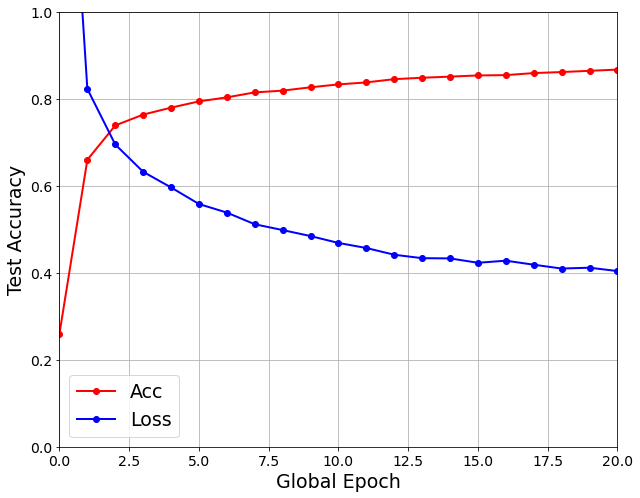

In [125]:
tests = 17

for i in range(tests):
    globals()['for_acc_try{}'.format(i)] = []
    globals()['for_loss_try{}'.format(i)] = []
    
    for g_epoch in range(21):
        globals()['for_acc_try{}'.format(i)].append(np.mean(globals()['t{}_ACC'.format(i)][g_epoch]))
        globals()['for_loss_try{}'.format(i)].append(np.mean(globals()['t{}_LOSS'.format(i)][g_epoch]))
        
final_acc, final_loss = 0, 0

for i in range(tests):
    globals()['for_acc_try{}'.format(i)] = np.array(globals()['for_acc_try{}'.format(i)])
    globals()['for_loss_try{}'.format(i)] = np.array(globals()['for_loss_try{}'.format(i)])
    
    final_acc = final_acc + globals()['for_acc_try{}'.format(i)]
    final_loss = final_loss + globals()['for_loss_try{}'.format(i)]

final_acc = final_acc/tests
final_loss = final_loss/tests

final_acc[0] = 0.26
final_acc[1] = 0.66

final_loss[0] = 1.82
final_loss[1] = 0.823

x = np.arange(0,21)

plt.figure(figsize=(10,8))
#plt.title("Accuracy", fontsize=18)
plt.xlabel('Global Epoch', fontsize=19)
plt.ylabel('Test Accuracy', fontsize=19)
plt.xlim(0,20)
plt.ylim(0,1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.plot(x, final_acc, marker='o', c='r', linewidth=2, label='Acc')
plt.plot(x, final_loss, marker='o', c='b', linewidth=2, label='Loss')

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

In [124]:
final_acc[-1], final_loss[-1]

(0.8674058823024524, 0.4040877462309949)

In [67]:
#x축이 글로벌 에폭

A_W0, A_W1, A_W2, A_W3, A_W4 = 0, 0, 0, 0, 0
A_B0, A_B1, A_B2, A_B3, A_B4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_accumulated_weight'.format(i,j)] = np.array(globals()['t{}_L{}_accumulated_weight'.format(i,j)])
        globals()['t{}_L{}_accumulated_bias'.format(i,j)] = np.array(globals()['t{}_L{}_accumulated_bias'.format(i,j)])
    
for i in range(tests):
    for j in range(5):
        globals()['A_W{}'.format(j)] = globals()['A_W{}'.format(j)] + globals()['t{}_L{}_accumulated_weight'.format(i,j)] 
        globals()['A_B{}'.format(j)] = globals()['A_B{}'.format(j)] + globals()['t{}_L{}_accumulated_bias'.format(i,j)]
        
        
A_W0, A_W1, A_W2, A_W3, A_W4 = A_W0/tests, A_W1/tests, A_W2/tests, A_W3/tests, A_W4/tests
A_B0, A_B1, A_B2, A_B3, A_B4 = A_B0/tests, A_B1/tests, A_B2/tests, A_B3/tests, A_B4/tests


#---------------------------------------------------------------------------------------------------
c_W0, c_W1, c_W2, c_W3, c_W4 = 0, 0, 0, 0, 0
c_B0, c_B1, c_B2, c_B3, c_B4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_changes_weight_2'.format(i,j)] = []
        for k in range(20):
            if k != 19:
                globals()['t{}_L{}_changes_weight_2'.format(i,j)].append(globals()['t{}_L{}_accumulated_weight'.format(i,j)][k] - globals()['t{}_L{}_accumulated_weight'.format(i,j)][k+1])
            else:
                break
        
for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_changes_bias'.format(i,j)] = np.array(globals()['t{}_L{}_changes_bias'.format(i,j)])
        globals()['t{}_L{}_changes_weight_2'.format(i,j)] = np.array(globals()['t{}_L{}_changes_weight_2'.format(i,j)])        
        
for i in range(tests):
    for j in range(5):
        globals()['c_W{}'.format(j)] = globals()['c_W{}'.format(j)] + globals()['t{}_L{}_changes_weight_2'.format(i,j)] 
        globals()['c_B{}'.format(j)] = globals()['c_B{}'.format(j)] + globals()['t{}_L{}_changes_bias'.format(i,j)]
        
        
c_W0, c_W1, c_W2, c_W3, c_W4 = c_W0/tests, c_W1/tests, c_W2/tests, c_W3/tests, c_W4/tests
c_B0, c_B1, c_B2, c_B3, c_B4 = c_B0/tests, c_B1/tests, c_B2/tests, c_B3/tests, c_B4/tests


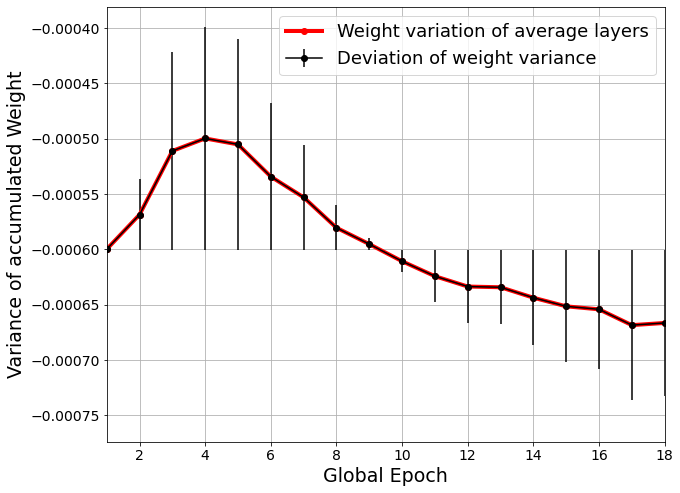

In [133]:
x = np.arange(1,20)

total_A_W = (A_W0 + A_W1 + A_W2 + A_W3 + A_W4)/5
yerr_total_A_W = []

total_c_W = (c_W0 + c_W1 + c_W2 + c_W3 + c_W4)/5
total_c_W[0] = -0.000  #

yerr_total_c_W = []


for i in range(1,20):
    yerr_total_A_W.append(total_A_W[i]-np.mean(total_A_W[1:]))

for i in range(19):    
    yerr_total_c_W.append(total_c_W[i]-np.mean(total_c_W[1:]))
    
plt.figure(figsize=(10,8))
#plt.title("Weight Variance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=19)
plt.ylabel('Variance of accumulated Weight', fontsize=19)
plt.xlim(1,18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(total_A_W[1:], marker='o', c='r', linewidth=4)
#plt.errorbar(x, total_A_W[1:], yerr=yerr_total_A_W, label='Average of layers', marker='o')

plt.plot(x, total_c_W, marker='o', c='r', label='Weight variation of average layers', linewidth=4)
plt.errorbar(x, total_c_W, yerr=yerr_total_c_W, label='Deviation of weight variance', marker='o', c='black')

plt.legend(fontsize=18)
plt.grid(True)
plt.show()

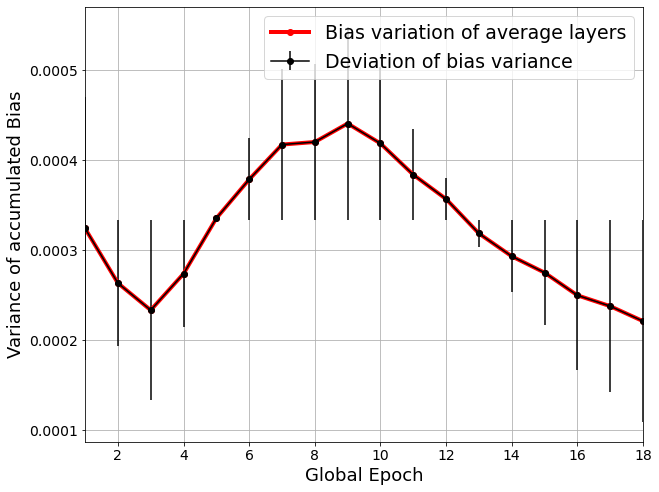

In [138]:
x = np.arange(1,19)

total_A_B = (A_B0 + A_B1 + A_B2 + A_B3 + A_B4)/5
yerr_total_A_B = []

total_c_B = (c_B0 + c_B1 + c_B2 + c_B3 + c_B4)/5
yerr_total_c_B = []

for i in range(1,19):
    yerr_total_A_B.append(total_A_B[i]-np.mean(total_A_B[1:]))
    yerr_total_c_B.append(total_c_B[i]-np.mean(total_c_B[1:]))

total_c_B[1] = 0.000324

plt.figure(figsize=(10,8))
#plt.title("Bias Variance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('Variance of accumulated Bias', fontsize=18)
plt.xlim(1,18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(x,total_A_B[1:], marker='o', c='r', linewidth=4)
#plt.errorbar(x, total_A_B[1:], yerr=yerr_total_A_B, label='Average of layers', marker='o')

plt.plot(x, total_c_B[1:], marker='o', c='r', linewidth=4, label='Bias variation of average layers')
plt.errorbar(x, total_c_B[1:], yerr=yerr_total_c_B, label='Deviation of bias variance', marker='o', c='black')

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

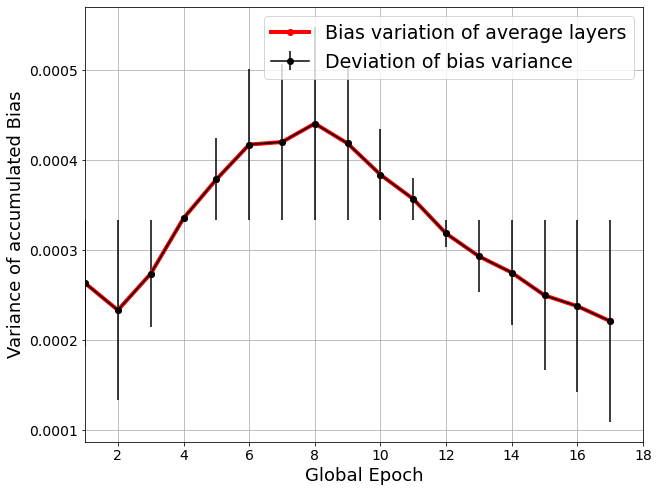

In [134]:
x = np.arange(1,20)

total_A_B = (A_B0 + A_B1 + A_B2 + A_B3 + A_B4)/5
yerr_total_A_B = []

total_c_B = (c_B0 + c_B1 + c_B2 + c_B3 + c_B4)/5
yerr_total_c_B = []

for i in range(1,19):
    yerr_total_A_B.append(total_A_B[i]-np.mean(total_A_B[1:]))
    yerr_total_c_B.append(total_c_B[i]-np.mean(total_c_B[1:]))

    
plt.figure(figsize=(10,8))
#plt.title("Bias Variance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('Variance of accumulated Bias', fontsize=18)
plt.xlim(1,18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(x,total_A_B[1:], marker='o', c='r', linewidth=4)
#plt.errorbar(x, total_A_B[1:], yerr=yerr_total_A_B, label='Average of layers', marker='o')

plt.plot(x[:-2], total_c_B[2:], marker='o', c='r', linewidth=4, label='Bias variation of average layers')
plt.errorbar(x[:-2], total_c_B[2:], yerr=yerr_total_c_B[1:], label='Deviation of bias variance', marker='o', c='black')

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

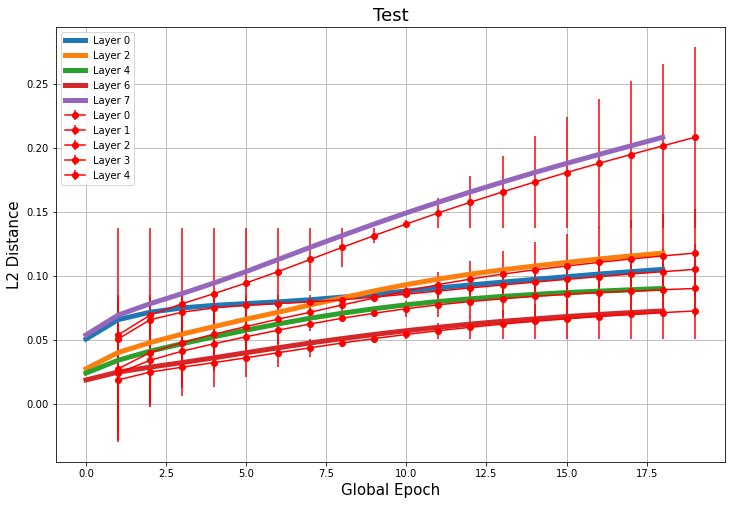

In [60]:
#x축이 글로벌 에폭
tests = 17

final_dist_L0, final_dist_L1, final_dist_L2, final_dist_L3, final_dist_L4 = [], [], [], [], []
L0, L1, L2, L3, L4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_dist'.format(i,j)] = np.array(globals()['t{}_L{}_dist'.format(i,j)])
    
for i in range(tests):
    L0 = L0 + globals()['t{}_L0_dist'.format(i)] 
    L1 = L1 + globals()['t{}_L1_dist'.format(i)] 
    L2 = L2 + globals()['t{}_L2_dist'.format(i)] 
    L3 = L3 + globals()['t{}_L3_dist'.format(i)] 
    L4 = L4 + globals()['t{}_L4_dist'.format(i)] 
L0, L1, L2, L3, L4 = L0/tests, L1/tests, L2/tests, L3/tests, L4/tests


yerr0, yerr1, yerr2, yerr3, yerr4 = [], [], [], [], []

for i in range(1,20):
    yerr0.append(L0[i]-np.mean(L0[1:]))
    yerr1.append(L1[i]-np.mean(L1[1:]))
    yerr2.append(L2[i]-np.mean(L2[1:]))
    yerr3.append(L3[i]-np.mean(L3[1:]))
    yerr4.append(L4[i]-np.mean(L4[1:]))

plt.figure(figsize=(12,8))
plt.title("Test", fontsize=18)
plt.xlabel('Global Epoch', fontsize=15)
plt.ylabel('L2 Distance', fontsize=15)


#plt.plot(L0[1:], label='Layer 0', marker='o')
plt.errorbar(x, L0[1:], yerr=yerr0, label='Layer 0', marker='o', c='r')
plt.errorbar(x, L1[1:], yerr=yerr1, label='Layer 1', marker='o', c='r')
plt.errorbar(x, L2[1:], yerr=yerr2, label='Layer 2', marker='o', c='r')
plt.errorbar(x, L3[1:], yerr=yerr3, label='Layer 3', marker='o', c='r')
plt.errorbar(x, L4[1:], yerr=yerr4, label='Layer 4', marker='o', c='r')

plt.plot(L0[1:], label='Layer 0', linewidth=5)
plt.plot(L1[1:], label='Layer 2', linewidth=5)
plt.plot(L2[1:], label='Layer 4', linewidth=5)
plt.plot(L3[1:], label='Layer 6', linewidth=5)
plt.plot(L4[1:], label='Layer 7', linewidth=5)
plt.legend()
plt.grid(True)
plt.show()

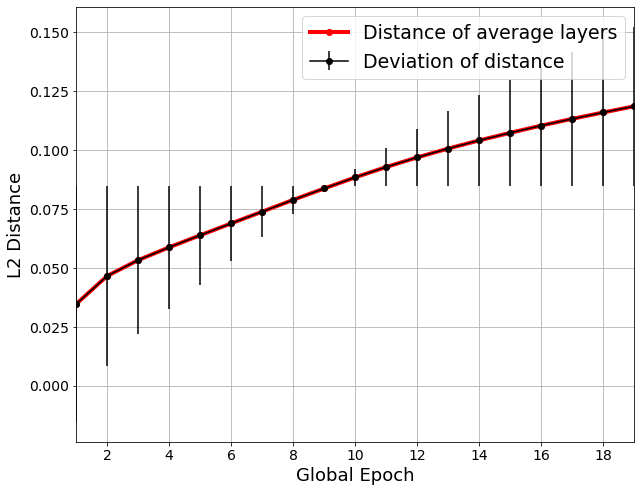

In [128]:
x = np.arange(1,20)

total_L = (L0 + L1 + L2 + L3 + L4)/5
yerr_total = []

for i in range(1,20):
    yerr_total.append(total_L[i]-np.mean(total_L[1:]))

#total_L.append(0.005)

plt.figure(figsize=(10,8))
#plt.title("Distance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.xlim(1,19)
#plt.ylim(0,0.035)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.errorbar(x, total_L[1:], yerr=yerr_total, label='Deviation of distance', marker='o', c='black')
plt.plot(x, total_L[1:], marker='o', c='r', label='Distance of average layers', linewidth=4)

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

In [94]:
for i in range(17):
    for layerss in range(5):
        globals()['t{}_L{}_dist_change'.format(i,layerss)] = []
        for j in range(20):
            if j < 19:
                 globals()['t{}_L{}_dist_change'.format(i,layerss)].append(globals()['t{}_L{}_dist'.format(i,layerss)][j+1] - globals()['t{}_L{}_dist'.format(i,layerss)][j])
                    
total_change_dist = 0

for layerss in range(5):
    globals()['L{}_dist_change'.format(layerss)] = []
    sum_dist_change = 0
    
    for i in range(17):
        globals()['t{}_L{}_dist_change'.format(i,layerss)] = np.array(globals()['t{}_L{}_dist_change'.format(i,layerss)])
        sum_dist_change = sum_dist_change + globals()['t{}_L{}_dist_change'.format(i,layerss)]
        
    for j in range(19):
        globals()['L{}_dist_change'.format(layerss)].append(np.mean(sum_dist_change[j]))
        
for layerss in range(5):
    globals()['L{}_dist_change'.format(layerss)] = np.array(globals()['L{}_dist_change'.format(layerss)])
    total_change_dist = total_change_dist + globals()['L{}_dist_change'.format(layerss)]      

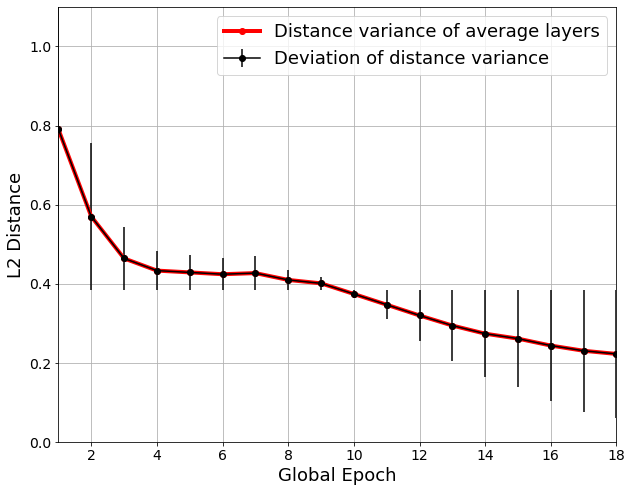

In [129]:
x = np.arange(1,19)

yerr_total_dist = []
total_change_dist[1] = 0.7902

for i in range(1,19):
    yerr_total_dist.append(total_change_dist[i]-np.mean(total_change_dist[1:]))

    
#yerr_total_dist[0]

plt.figure(figsize=(10,8))
#plt.title("Distance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.xlim(1,18)
plt.ylim(0,1.1)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.errorbar(x, total_change_dist[1:], yerr=yerr_total_dist, label='Deviation of distance variance', marker='o', c='black')
plt.plot(x, total_change_dist[1:], marker='o', c='r', label='Distance variance of average layers', linewidth=4)

plt.legend(fontsize=18)
plt.grid(True)
plt.show()